# Exploratory Data Analysis (Project 1, Group 2)
---


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import hvplot.pandas

from scipy import stats
from scipy.stats import linregress

import holoviews as hv
# from holoviews import opts
# hv.extension('matplotlib')

from config import geoapify_key

import requests
import json
from pprint import pprint


## Data Read and Clean
---

### IMD DATA
IMD = Index of Multiple Deprivation
Source: https://www.gov.uk/government/statistics/english-indices-of-deprivation-2019

In [3]:
#Read in UK IMD Data as a Pandas DataFrame

IMD_data = pd.read_csv("Resources/IMD_Data/IMD.csv")
IMD_data.head()

LSOA code (2011)           LSOA name (2011)  \
0        E01000001        City of London 001A   
1        E01000002        City of London 001B   
2        E01000003        City of London 001C   
3        E01000005        City of London 001E   
4        E01000006  Barking and Dagenham 016A   

  Local Authority District code (2019) Local Authority District name (2019)  \
0                            E09000001                       City of London   
1                            E09000001                       City of London   
2                            E09000001                       City of London   
3                            E09000001                       City of London   
4                            E09000002                 Barking and Dagenham   

   Index of Multiple Deprivation (IMD) Score  \
0                                      6.208   
1                                      5.143   
2                                     19.402   
3                                     28.652   
4                                     19.837   

   Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)  \
0                                              29199                     
1                                              30379                     
2                                              14915                     
3                                               8678                     
4                                              14486                     

   Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)  \
0                                                  9                                    
1                                                 10                                    
2                                                  5                                    
3                                                  3                                    
4                                                  5                                    

   Income Score (rate)  Income Rank (where 1 is most deprived)  \
0                0.007                                   32831   
1                0.034                                   29901   
2                0.086                                   18510   
3                0.211                                    6029   
4                0.117                                   14023   

   Income Decile (where 1 is most deprived 10% of LSOAs)  ...  \
0                                                 10      ...   
1                                                 10      ...   
2                                                  6      ...   
3                                                  2      ...   
4                                                  5      ...   

   Indoors Sub-domain Rank (where 1 is most deprived)  \
0                                              16364    
1                                              22676    
2                                              17318    
3                                              25218    
4                                              14745    

   Indoors Sub-domain Decile (where 1 is most deprived 10% of LSOAs)  \
0                                                  5                   
1                                                  7                   
2                                                  6                   
3                                                  8                   
4                                                  5                   

   Outdoors Sub-domain Score  \
0                      1.503   
1                      1.196   
2                      2.207   
3                      1.769   
4                      0.969   

   Outdoors Sub-domain Rank (where 1 is most deprived)  \
0                                               1615     
1                                               2969     
2                               

In [4]:
# Analyse and reduce this DataFrame for the purpose of our analysis

print(f'UK IMD Data has {len(IMD_data.columns)} columns and {len(IMD_data)} rows\n')

# Reduce this DataFrame to Local Authority = Birmingham

IMD_Bham = IMD_data.loc[IMD_data["Local Authority District name (2019)"] == "Birmingham",:]

print(f'Birmingham IMD Data has {len(IMD_Bham.columns)} columns and {len(IMD_Bham)} rows\n\nTherefore the total number of LSOAs in Birmingham = {len(IMD_Bham)}\n')

# Reduce the DataFrame to include first 7 series only

IMD_Bham = IMD_Bham.iloc[:, [0,1,2,3,4,5,6,7,52]]

# Rename LSOA column title in preparation for a merge

IMD_Bham = IMD_Bham.rename(columns={"LSOA code (2011)":"LSOA code", "LSOA name (2011)":"LSOA name"}).sort_values("LSOA name").reset_index(drop=True)

# Prepare a separate DataFrame with just Birmingham LSOA code and name

LSOA_Bham = IMD_Bham[["LSOA name","LSOA code"]].sort_values("LSOA code").reset_index(drop=True)


IMD_Bham.head()


UK IMD Data has 57 columns and 32844 rows

Birmingham IMD Data has 57 columns and 639 rows

Therefore the total number of LSOAs in Birmingham = 639



LSOA code        LSOA name Local Authority District code (2019)  \
0  E01009417  Birmingham 001A                            E08000025   
1  E01009418  Birmingham 001B                            E08000025   
2  E01009419  Birmingham 001C                            E08000025   
3  E01009433  Birmingham 001D                            E08000025   
4  E01009415  Birmingham 002A                            E08000025   

  Local Authority District name (2019)  \
0                           Birmingham   
1                           Birmingham   
2                           Birmingham   
3                           Birmingham   
4                           Birmingham   

   Index of Multiple Deprivation (IMD) Score  \
0                                     12.652   
1                                     19.086   
2                                     17.512   
3                                      5.935   
4                                      6.040   

   Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)  \
0                                              21433                     
1                                              15161                     
2                                              16545                     
3                                              29541                     
4                                              29422                     

   Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)  \
0                                                  7                                    
1                                                  5                                    
2                                                  6                                    
3                                                  9                                    
4                                                  9                                    

   Income Score (rate)  Total population: mid 2015 (excluding prisoners)  
0                0.088                                              1529  
1                0.124                                              1519  
2                0.104                                              1384  
3                0.026                                              1777  
4                0.039                                              1677

In [5]:
IMD_Bham.describe()

Index of Multiple Deprivation (IMD) Score  \
count                                 639.000000   
mean                                   37.608263   
std                                    16.949958   
min                                     3.431000   
25%                                    22.942500   
50%                                    38.311000   
75%                                    51.872500   
max                                    78.083000   

       Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)  \
count                                         639.000000                     
mean                                         7752.449139                     
std                                          7404.626407                     
min                                            45.000000                     
25%                                          1891.000000                     
50%                                          4791.000000                     
75%                                         12095.500000                     
max                                         31954.000000                     

       Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)  \
count                                         639.000000                                    
mean                                            2.890454                                    
std                                             2.250856                                    
min                                             1.000000                                    
25%                                             1.000000                                    
50%                                             2.000000                                    
75%                                             4.000000                                    
max                                            10.000000                                    

       Income Score (rate)  Total population: mid 2015 (excluding prisoners)  
count           639.000000                                        639.000000  
mean              0.218200                                       1740.696401  
std               0.115392                                        405.333647  
min               0.013000                                       1003.000000  
25%               0.114500                                       1529.000000  
50%               0.224000                                       1653.000000  
75%               0.313000                                       1826.000000  
max               0.558000                                       5701.000000

In [6]:
IMD_Bham.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 9 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   LSOA code                                                                           639 non-null    object 
 1   LSOA name                                                                           639 non-null    object 
 2   Local Authority District code (2019)                                                639 non-null    object 
 3   Local Authority District name (2019)                                                639 non-null    object 
 4   Index of Multiple Deprivation (IMD) Score                                           639 non-null    float64
 5   Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)                 639 non-null    

### Police Data
36 Months of Street Crime Police Data taken from https://data.police.uk/data/
2020-08 TO 2023-07

In [7]:
# Read in 36 months of West Midlands Police data from Resources file as a DataFrame

# months_list = [
#     "2020-08",
#     "2020-09",
#     "2020-10",
#     "2020-11",
#     "2020-12",
#     "2021-01",
#     "2021-02",
#     "2021-03",
#     "2021-04",
#     "2021-05",
#     "2021-06",
#     "2021-07",
#     "2021-08",
#     "2021-09",
#     "2021-10",
#     "2021-11",
#     "2021-12",
#     "2022-01",
#     "2022-02",
#     "2022-03",
#     "2022-04",
#     "2022-05",
#     "2022-06",
#     "2022-07",
#     "2022-08",
#     "2022-09",
#     "2022-10",
#     "2022-11",
#     "2022-12",
#     "2023-01",
#     "2023-02",
#     "2023-03",
#     "2023-04",
#     "2023-05",
#     "2023-06",
#     "2023-07",
# ]

months_dict = {
    "2020-08":"Aug 2020",
    "2020-09":"Sep 2020",
    "2020-10":"Oct 2020",
    "2020-11":"Nov 2020",
    "2020-12":"Dec 2020",
    "2021-01":"Jan 2021",
    "2021-02":"Feb 2021",
    "2021-03":"Mar 2021",
    "2021-04":"Apr 2021",
    "2021-05":"May 2021",
    "2021-06":"Jun 2021",
    "2021-07":"Jul 2021",
    "2021-08":"Aug 2021",
    "2021-09":"Sep 2021",
    "2021-10":"Oct 2021",
    "2021-11":"Nov 2021",
    "2021-12":"Dec 2021",
    "2022-01":"Jan 2022",
    "2022-02":"Feb 2022",
    "2022-03":"Mar 2022",
    "2022-04":"Apr 2022",
    "2022-05":"May 2022",
    "2022-06":"Jun 2022",
    "2022-07":"Jul 2022",
    "2022-08":"Aug 2022",
    "2022-09":"Sep 2022",
    "2022-10":"Oct 2022",
    "2022-11":"Nov 2022",
    "2022-12":"Dec 2022",
    "2023-01":"Jan 2023",
    "2023-02":"Feb 2023",
    "2023-03":"Mar 2023",
    "2023-04":"Apr 2023",
    "2023-05":"May 2023",
    "2023-06":"Jun 2023",
    "2023-07":"Jul 2023"
}

for x in range(len(months_dict)):

    month = list(months_dict.keys())[x]

    df_current = pd.read_csv(f"Resources/PoliceData/{month}/{month}-west-midlands-street.csv")

    if x == 0:
        police_df = df_current

    if x != 0:
        police_df = pd.concat([police_df,df_current])


police_df.head()

Crime ID    Month  \
0  5e70cb1ff89df7fb6f4579a18cef84ab0529c9e077c229...  2020-08   
1  b70a6e6bb122531fb9e87fedb6ab19115364b97ba3adab...  2020-08   
2  4a4a7f67480a71be7bc6028c68b9b33fee5a75a0ffb20a...  2020-08   
3  7aeed0fbd880da12ee8a6ae698bf2785a94aec8c28084e...  2020-08   
4  9f50cd3c8c235cbf8b4cb27d379e3dcabfcb7957d0ac32...  2020-08   

            Reported by          Falls within  Longitude   Latitude  \
0  West Midlands Police  West Midlands Police  -0.195929  51.668072   
1  West Midlands Police  West Midlands Police  -0.192425  51.640933   
2  West Midlands Police  West Midlands Police  -0.195913  51.621132   
3  West Midlands Police  West Midlands Police  -0.195812  51.589451   
4  West Midlands Police  West Midlands Police  -0.199223  51.568533   

                            Location  LSOA code    LSOA name    Crime type  \
0         On or near Greenacre Close  E01000254  Barnet 001D  Public order   
1  On or near Sports/Recreation Area  E01000279  Barnet 007C  Public order   
2               On or near Shortgate  E01000276  Barnet 020A       Robbery   
3            On or near Falloden Way  E01000211  Barnet 035C       Robbery   
4            On or near Dunstan Road  E01000146  Barnet 038D  Public order   

                           Last outcome category  Context  
0                    Unable to prosecute suspect      NaN  
1  Investigation complete; no suspect identified      NaN  
2  Investigation complete; no suspect identified      NaN  
3                    Unable to prosecute suspect      NaN  
4  Investigation complete; no suspect identified      NaN

In [8]:
# Analyse and reduce this DataFrame for the purpose of our analysis

print(f'West Midlands Police Data has {len(police_df.columns)} columns and {len(police_df)} rows\n')

# Filter this DataFrame to Local Authority = Birmingham by performing an inner merge on IMD_Bham["LSOA code"] Series

Bham_Police_df = pd.merge(IMD_Bham["LSOA code"],police_df,on="LSOA code")

print(f'Bham_Police_df has {len(Bham_Police_df.columns)} columns and {len(Bham_Police_df)} rows\n\nTherefore the total number of Incidents in Birmingham police data = {len(Bham_Police_df)}\n')

# Check how many types of crime occured in the past 36 Months data

print(f'Types of street crime in past 36 months = {Bham_Police_df["Crime type"].nunique()}\n')


# Check that "West Midlands Police" is the only police force listed in the "Reported by" and "Falls within" series (Unique value = 1)
print(f'Unique value = {Bham_Police_df["Reported by"].nunique()}')
print(f'Unique value = {Bham_Police_df["Falls within"].nunique()}\n')


# Check for columsn with null values
print(Bham_Police_df.isnull().sum())

Bham_Police_df.head()


West Midlands Police Data has 12 columns and 1133634 rows

Bham_Police_df has 12 columns and 498057 rows

Therefore the total number of Incidents in Birmingham police data = 498057

Types of street crime in past 36 months = 14

Unique value = 1
Unique value = 1

LSOA code                     0
Crime ID                  40962
Month                         0
Reported by                   0
Falls within                  0
Longitude                     0
Latitude                      0
Location                      0
LSOA name                     0
Crime type                    0
Last outcome category     40962
Context                  498057
dtype: int64


LSOA code                                           Crime ID    Month  \
0  E01009417                                                NaN  2020-08   
1  E01009417  0a4afbc9ff2ace70427b0d0695d91a5b285e1c6e016c0e...  2020-08   
2  E01009417                                                NaN  2020-09   
3  E01009417  cbc42e308e574637d340417a967bd4a357a0200b8be135...  2020-12   
4  E01009417  6d8e509448855dfdf261ac3ecda7fdb2b7d2f43cc15b02...  2020-12   

            Reported by          Falls within  Longitude   Latitude  \
0  West Midlands Police  West Midlands Police  -1.850056  52.591108   
1  West Midlands Police  West Midlands Police  -1.851038  52.593177   
2  West Midlands Police  West Midlands Police  -1.850772  52.588691   
3  West Midlands Police  West Midlands Police  -1.850056  52.591108   
4  West Midlands Police  West Midlands Police  -1.845290  52.590509   

                     Location        LSOA name                 Crime type  \
0     On or near Walsall Road  Birmingham 001A      Anti-social behaviour   
1    On or near Longdon Drive  Birmingham 001A              Vehicle crime   
2  On or near Seymour Gardens  Birmingham 001A      Anti-social behaviour   
3     On or near Walsall Road  Birmingham 001A                   Burglary   
4  On or near Heathfield Road  Birmingham 001A  Criminal damage and arson   

                           Last outcome category  Context  
0                                            NaN      NaN  
1  Investigation complete; no suspect identified      NaN  
2                                            NaN      NaN  
3                      Status update unavailable      NaN  
4                      Status update unavailable      NaN

In [9]:
# Reduce the DataFrame to include only relevant Series and remove ones with Null values (as data not required)

Bham_police_cleaned = Bham_Police_df.loc[:,["LSOA code","LSOA name","Month","Longitude","Latitude","Crime type"]].copy()

Bham_police_cleaned.head()


LSOA code        LSOA name    Month  Longitude   Latitude  \
0  E01009417  Birmingham 001A  2020-08  -1.850056  52.591108   
1  E01009417  Birmingham 001A  2020-08  -1.851038  52.593177   
2  E01009417  Birmingham 001A  2020-09  -1.850772  52.588691   
3  E01009417  Birmingham 001A  2020-12  -1.850056  52.591108   
4  E01009417  Birmingham 001A  2020-12  -1.845290  52.590509   

                  Crime type  
0      Anti-social behaviour  
1              Vehicle crime  
2      Anti-social behaviour  
3                   Burglary  
4  Criminal damage and arson

### LSOA Map plot
Take the LSOA central geocorodinates and plot on map to visualise. This can be used to view location of specificc LSOAs of interest.

In [10]:
LSOA_UK_lat_lon = pd.read_csv("Resources/Census_Data/lsoa_latlong.csv")

LSOA_UK_lat_lon = LSOA_UK_lat_lon.rename(columns={"lsoa11cd":"LSOA code"})


LSOA__Bham_lat_lon = pd.merge(LSOA_Bham,LSOA_UK_lat_lon,on="LSOA code")
print(LSOA__Bham_lat_lon)

LSOA = "E01033557"

''' 
E01033557 52.475543  -1.908713
E01033617 52.484558  -1.892899
E01033561 52.485012  -1.884991
E01033615 52.475054  -1.895817
E01033620 52.480647  -1.899039
'''


# specific_LSOA = LSOA__Bham_lat_lon.loc[LSOA__Bham_lat_lon["LSOA code"] == LSOA]
# print(specific_LSOA)

# map_plot = specific_LSOA.hvplot.points(
#     "longitude",
#     "latitude",
#     geo=True,
#     tiles = "OSM"
# )

map_plot = LSOA__Bham_lat_lon.hvplot.points(
    "longitude",
    "latitude",
    geo=True,
    tiles = "EsriNatGeo",
    frame_width = 800,
    frame_height = 600,
    color = "LSOA name",
    size = 75
)


map_plot

           LSOA name  LSOA code     LSOACD   latitude  longitude
0    Birmingham 067A  E01008881  E01008881  52.467331  -1.814266
1    Birmingham 066A  E01008882  E01008882  52.466360  -1.828883
2    Birmingham 078A  E01008883  E01008883  52.463228  -1.822689
3    Birmingham 078B  E01008884  E01008884  52.461092  -1.835955
4    Birmingham 076A  E01008885  E01008885  52.460640  -1.807253
..               ...        ...        ...        ...        ...
634  Birmingham 031I  E01033646  E01033646  52.518458  -1.850591
635  Birmingham 058E  E01033647  E01033647  52.479923  -1.847693
636  Birmingham 084F  E01033648  E01033648  52.451622  -1.880321
637  Birmingham 058F  E01033649  E01033649  52.482072  -1.846187
638  Birmingham 077F  E01033650  E01033650  52.462104  -1.864970

[639 rows x 5 columns]


c:\Users\smmr8\anaconda3\envs\dev\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longitude,latitude]   (LSOA name)

### Summary data: 
---
- What are the street crime types? (Bar Chart/Pie Chart)

Month
2020-08    12524
2020-09    12443
2020-10    13429
2020-11    13789
2020-12    13316
Name: LSOA code, dtype: int64


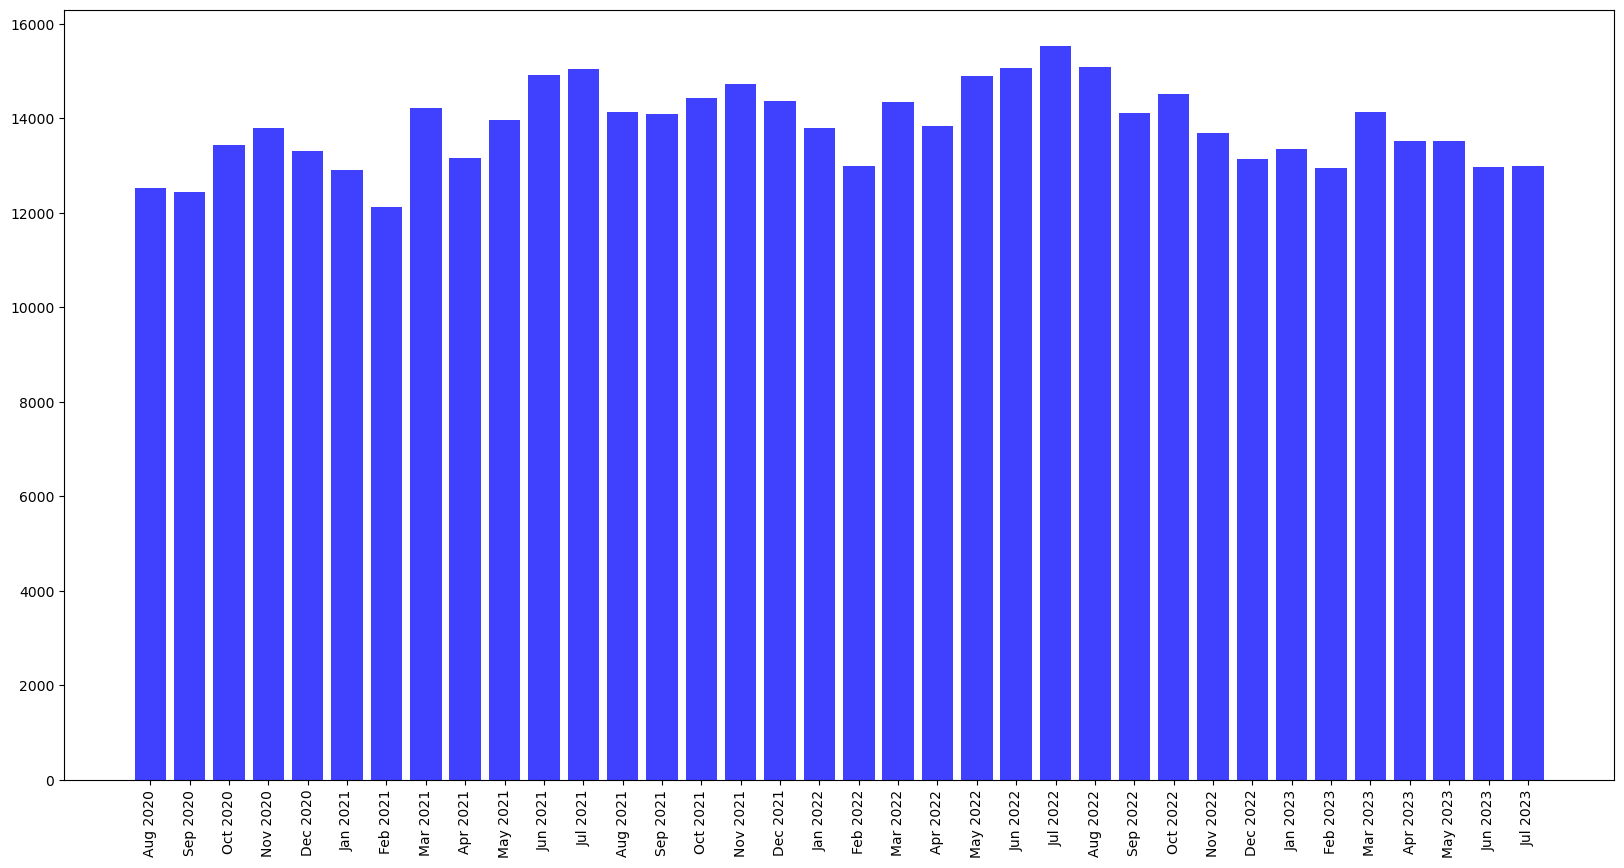

In [11]:
# Overall data from Police data
Monthly_crime_count = Bham_police_cleaned.groupby(["Month"])["LSOA code"].count()
print(Monthly_crime_count.head())

plt.figure(figsize=(20,10))
plt.bar(months_dict.values(), Monthly_crime_count, color='b', alpha=0.75, align="center")
plt.xticks(rotation="vertical")
plt.savefig("output/01.png")
plt.show()


Month    Crime type                  
2020-08  Violence and sexual offences    4742
         Anti-social behaviour           2257
         Public order                    1005
         Criminal damage and arson        911
         Vehicle crime                    893
                                         ... 
2023-07  Drugs                            301
         Possession of weapons            253
         Other crime                      189
         Theft from the person            157
         Bicycle theft                     76
Name: Crime type, Length: 504, dtype: int64


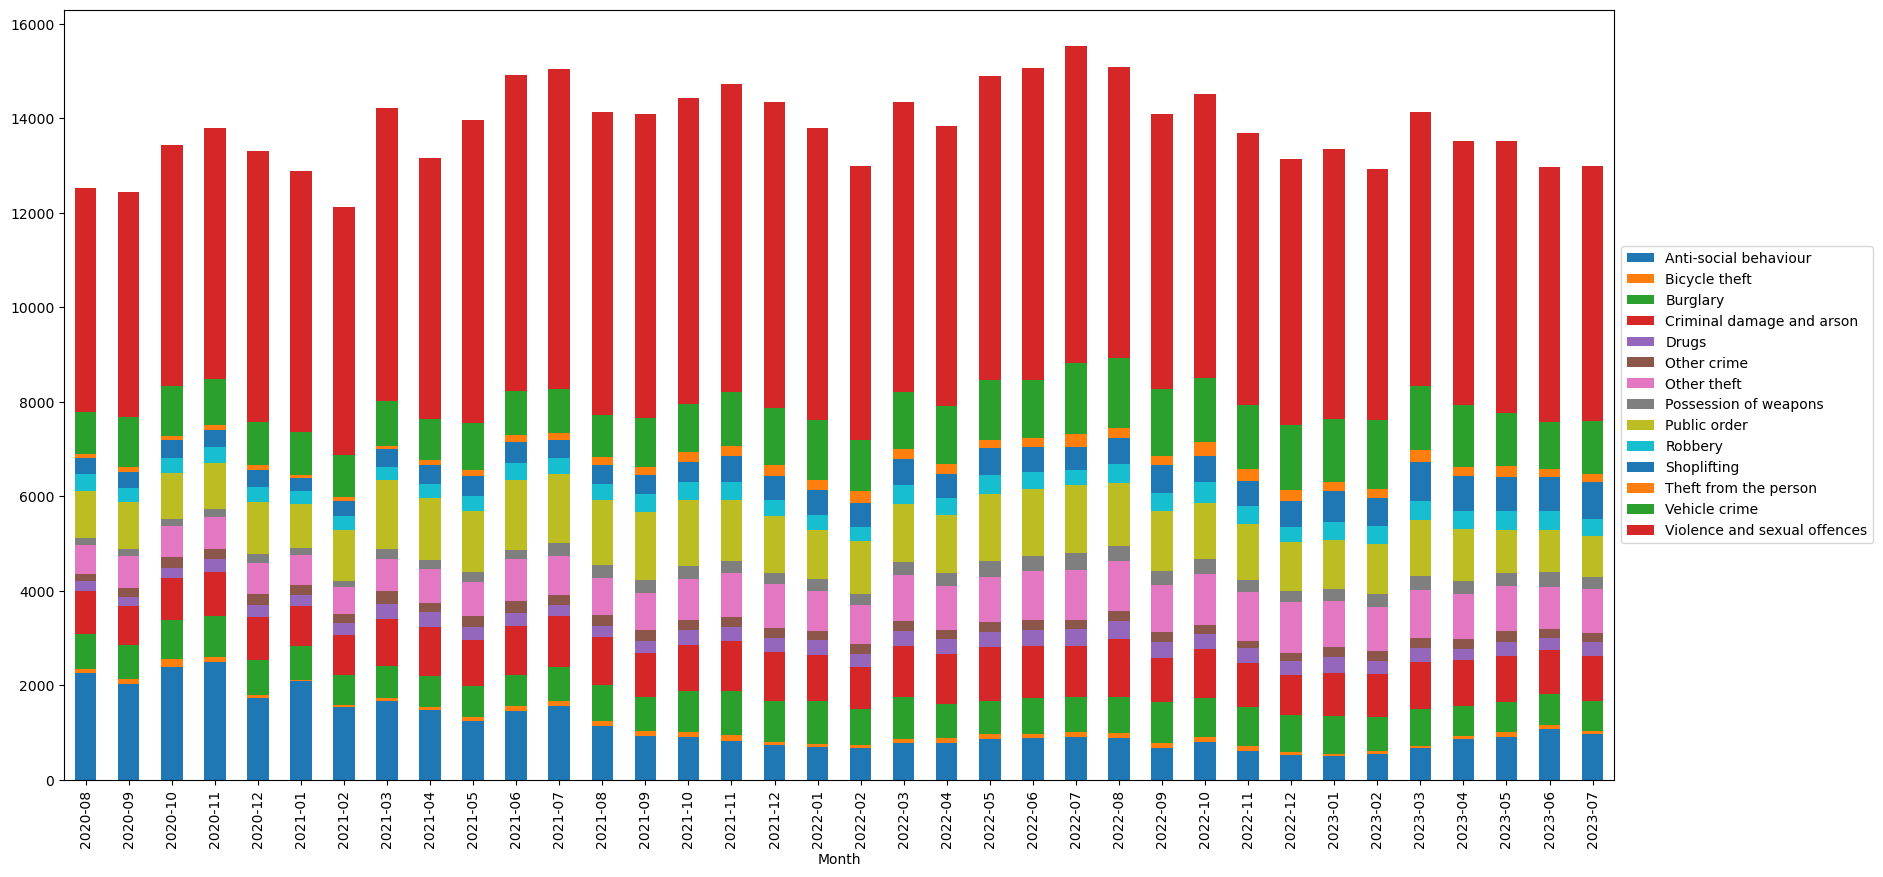

In [12]:
Crime_value_counts = Bham_police_cleaned.groupby(["Month"])["Crime type"].value_counts()
print(Crime_value_counts)


Crime_value_counts.unstack().plot.bar(stacked=True, figsize=(20,10))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig("output/02.png")
plt.show()


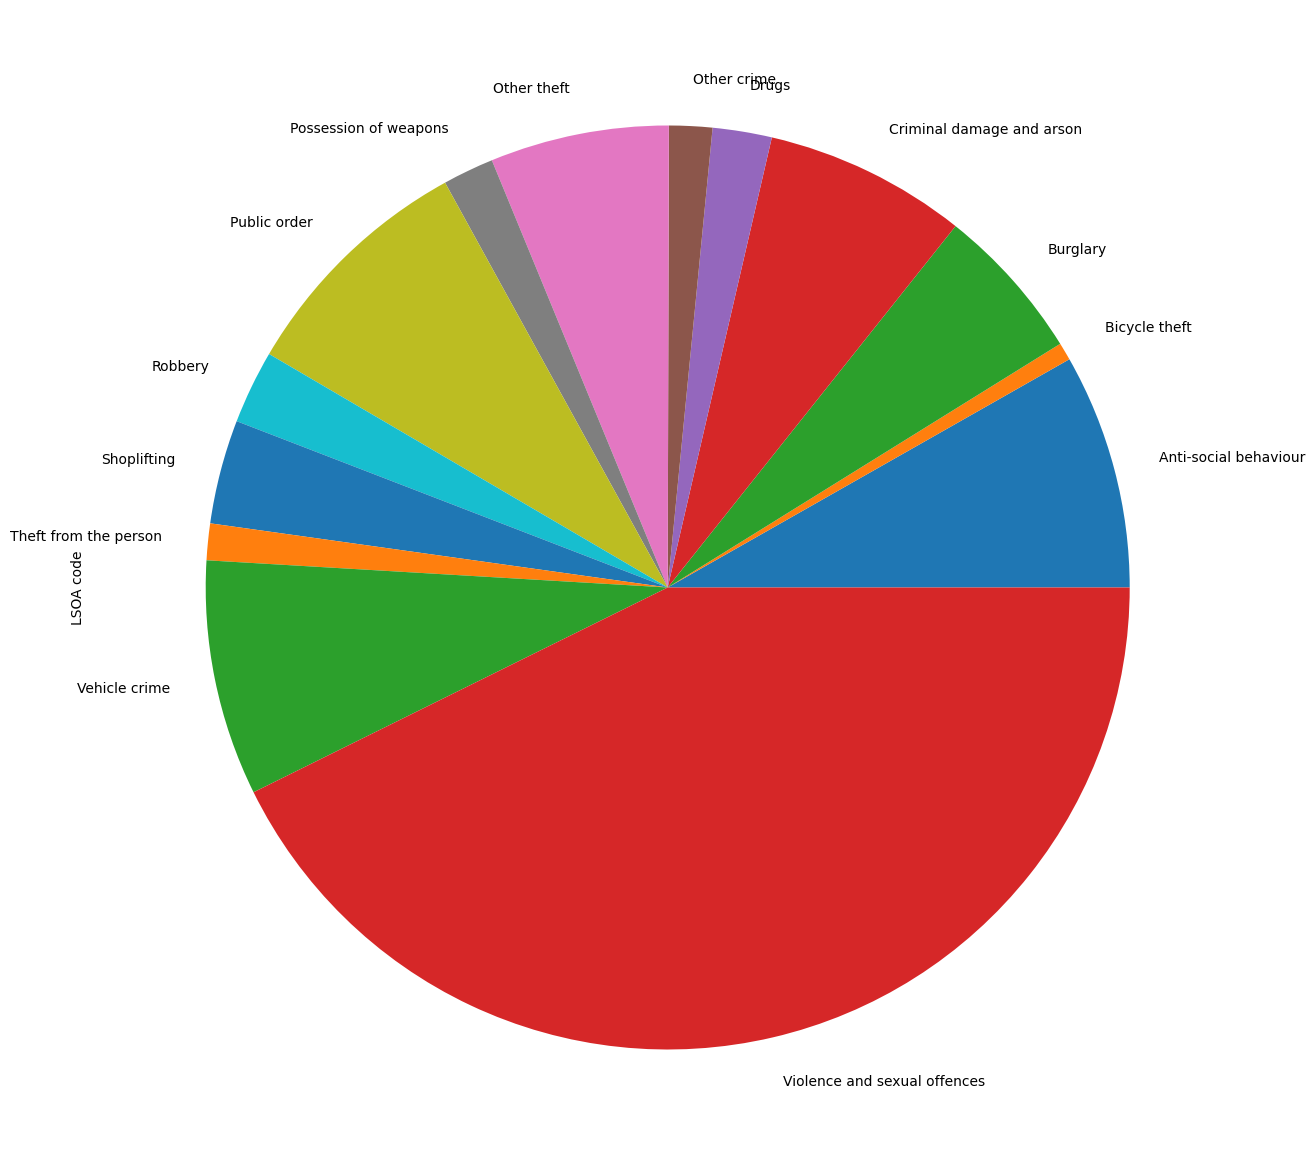

Index(['Anti-social behaviour', 'Bicycle theft', 'Burglary',
       'Criminal damage and arson', 'Drugs', 'Other crime', 'Other theft',
       'Possession of weapons', 'Public order', 'Robbery', 'Shoplifting',
       'Theft from the person', 'Vehicle crime',
       'Violence and sexual offences'],
      dtype='object', name='Crime type')

In [13]:
Crime_type_count = Bham_police_cleaned.groupby(["Crime type"])["LSOA code"].count()
Crime_type_count.plot.pie(subplots=True,figsize=(15,15))

plt.savefig("output/03.png")
plt.show()
# Crime_type_count

Crime_type_count.index


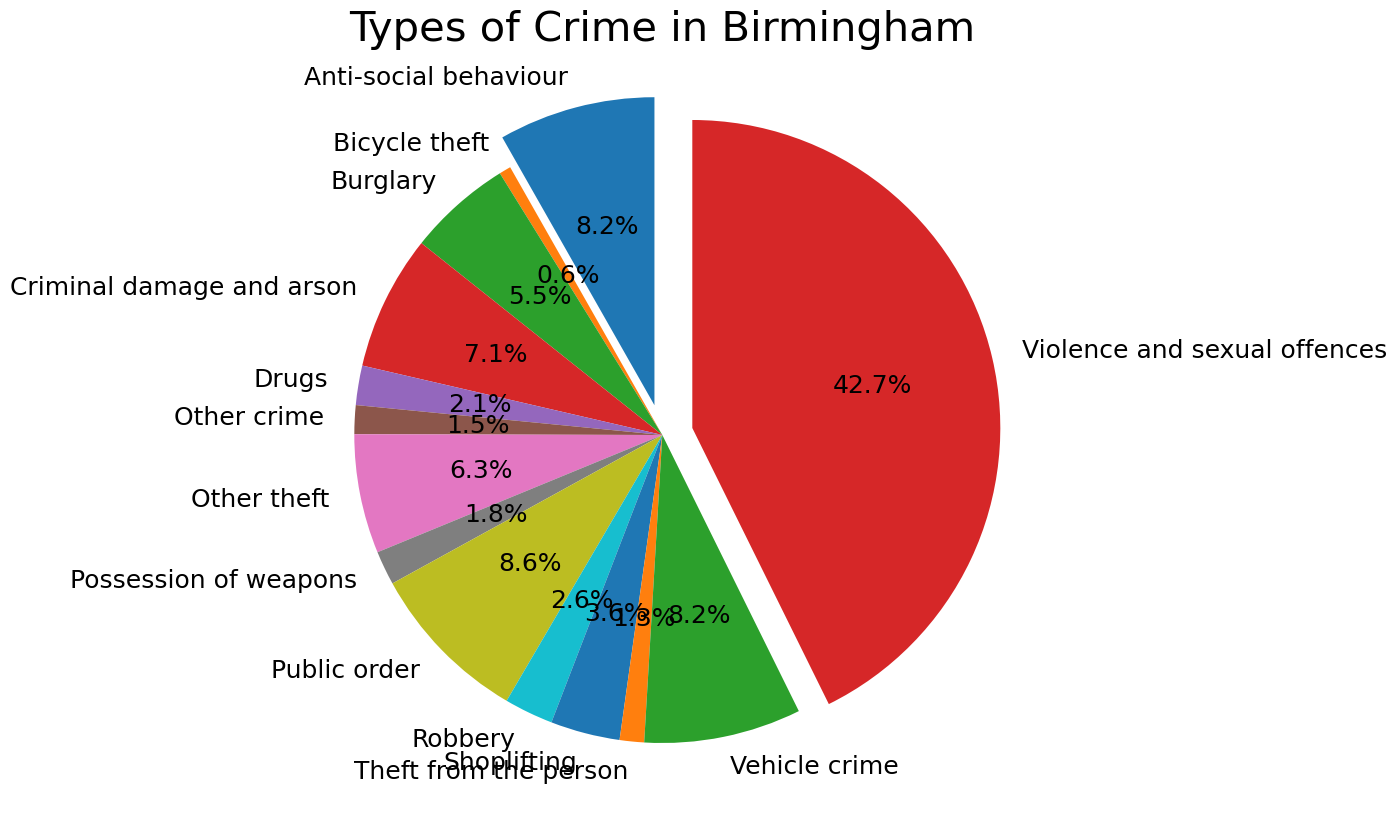

In [14]:
# Labels for the sections of our pie chart
labels = Crime_type_count.index

# The values of each section of the pie chart
sizes = Crime_type_count

# The colors of each section of the pie chart
# colors = ["red", "orange", "lightcoral", "lightskyblue"]

# Tells matplotlib to separate the "Humans" section from the others
explode = (0.1,0,0,0,0,0,0,0,0,0,0,0,0,0.1)
plt.figure(figsize=(20,10))
plt.title("Types of Crime in Birmingham", fontsize=30)


plt.pie(sizes, labels=labels,explode=explode,
        autopct="%1.1f%%", startangle=90,textprops={'fontsize': 18})


plt.savefig("output/04.png")
plt.show()

In [15]:
'''
Months List: print(Bham_police_cleaned["Month"].unique()) 
['2020-08' '2020-09' '2020-12' '2021-01' '2021-03' '2021-06' '2021-07'
 '2021-08' '2021-09' '2021-10' '2021-11' '2021-12' '2022-01' '2022-02'
 '2022-03' '2022-04' '2022-05' '2022-06' '2022-07' '2022-08' '2022-09'
 '2022-10' '2022-11' '2022-12' '2023-01' '2023-02' '2023-03' '2023-04'
 '2023-05' '2023-06' '2023-07' '2020-10' '2020-11' '2021-02' '2021-04'
 '2021-05']
 '''

'''
Crime type list: print(Bham_police_cleaned["Crime type"].unique())
['Anti-social behaviour' 'Vehicle crime' 'Burglary'
 'Criminal damage and arson' 'Violence and sexual offences'
 'Possession of weapons' 'Public order' 'Robbery' 'Other theft'
 'Other crime' 'Bicycle theft' 'Drugs' 'Theft from the person'
 'Shoplifting']
 '''

select_month = '2020-08'
select_crime = 'Anti-social behaviour'

test = Bham_police_cleaned.loc[(Bham_police_cleaned["Crime type"] == select_crime) & (Bham_police_cleaned["Month"] == select_month)]


map_plot = test.hvplot.points(
    "Longitude",
    "Latitude",
    geo=True,
    tiles = "OSM",
    frame_width = 1200,
    frame_height = 900,
    color = "LSOA code"
)

# Display the map

map_plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (LSOA code)

In [16]:
# Read in rural and urban classification

rural_urban_df = pd.read_csv("Resources/Census_Data/rural_urban_classification.csv")


LSOA_Bham

rural_urban_df = rural_urban_df.rename(columns={"LSOA11CD":"LSOA code"})
rural_urban_df.head()

rural_urban_bham = pd.merge(rural_urban_df,LSOA_Bham,on="LSOA code")
rural_urban_bham = rural_urban_bham.iloc[:,[1,3,4,5]]
rural_urban_bham

rural_urban_bham["RUC11CD"].unique()


array(['A1'], dtype=object)

There's only A1 type of rural/urban classification in the 639 LSOAs in Birmingham.

### Research Question 1
- What is crime count vs IMD score correlation?
- What is crime type count vs IMD score correlation? (Plot all, and then select 2 for the ppt)


In [17]:
# Merge IMD with Police Data

Police_IMD_Merge = pd.merge(IMD_Bham,Bham_police_cleaned,on="LSOA code")

LSOA_count = Police_IMD_Merge.groupby("LSOA code")["Index of Multiple Deprivation (IMD) Score"].count()


print(LSOA_count)
Police_IMD_Merge.head()


# Police_IMD_Merge = pd.merge(Police_IMD_Merge,LSOA_count,on="LSOA code",how="outer")
# Police_IMD_Merge = Police_IMD_Merge.rename(columns={"Index of Multiple Deprivation (IMD) Score_y":"Crime Count"})

# Police_IMD_Merge["Crime Rate"] = 100 * (Police_IMD_Merge["Crime Count"] / Police_IMD_Merge["Total population: mid 2015 (excluding prisoners)"])
# Police_IMD_Merge


LSOA code
E01008881    1145
E01008882     722
E01008883     936
E01008884    1118
E01008885     371
             ... 
E01033646    1458
E01033647     487
E01033648     965
E01033649     366
E01033650     750
Name: Index of Multiple Deprivation (IMD) Score, Length: 639, dtype: int64


LSOA code      LSOA name_x Local Authority District code (2019)  \
0  E01009417  Birmingham 001A                            E08000025   
1  E01009417  Birmingham 001A                            E08000025   
2  E01009417  Birmingham 001A                            E08000025   
3  E01009417  Birmingham 001A                            E08000025   
4  E01009417  Birmingham 001A                            E08000025   

  Local Authority District name (2019)  \
0                           Birmingham   
1                           Birmingham   
2                           Birmingham   
3                           Birmingham   
4                           Birmingham   

   Index of Multiple Deprivation (IMD) Score  \
0                                     12.652   
1                                     12.652   
2                                     12.652   
3                                     12.652   
4                                     12.652   

   Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)  \
0                                              21433                     
1                                              21433                     
2                                              21433                     
3                                              21433                     
4                                              21433                     

   Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)  \
0                                                  7                                    
1                                                  7                                    
2                                                  7                                    
3                                                  7                                    
4                                                  7                                    

   Income Score (rate)  Total population: mid 2015 (excluding prisoners)  \
0                0.088                                              1529   
1                0.088                                              1529   
2                0.088                                              1529   
3                0.088                                              1529   
4                0.088                                              1529   

       LSOA name_y    Month  Longitude   Latitude                 Crime type  
0  Birmingham 001A  2020-08  -1.850056  52.591108      Anti-social behaviour  
1  Birmingham 001A  2020-08  -1.851038  52.593177              Vehicle crime  
2  Birmingham 001A  2020-09  -1.850772  52.588691      Anti-social behaviour  
3  Birmingham 001A  2020-12  -1.850056  52.591108                   Burglary  
4  Birmingham 001A  2020-12  -1.845290  52.590509  Criminal damage and arson

In [18]:
# Groupby LSOA

f = {"LSOA name_x": "first","LSOA code": "count", "Index of Multiple Deprivation (IMD) Score":'first',\
     "Longitude": "first", "Latitude": "first"}
LSOA_crime_count_df = Police_IMD_Merge.groupby(["LSOA code"]).agg(f)


LSOA_crime_count_df


LSOA name_x  LSOA code  \
LSOA code                               
E01008881  Birmingham 067A       1145   
E01008882  Birmingham 066A        722   
E01008883  Birmingham 078A        936   
E01008884  Birmingham 078B       1118   
E01008885  Birmingham 076A        371   
...                    ...        ...   
E01033646  Birmingham 031I       1458   
E01033647  Birmingham 058E        487   
E01033648  Birmingham 084F        965   
E01033649  Birmingham 058F        366   
E01033650  Birmingham 077F        750   

           Index of Multiple Deprivation (IMD) Score  Longitude   Latitude  
LSOA code                                                                   
E01008881                                     41.179  -1.809133  52.466198  
E01008882                                     59.693  -1.827175  52.467071  
E01008883                                     38.636  -1.823928  52.461987  
E01008884                                     44.315  -1.826609  52.464966  
E01008885                                     22.921  -1.807720  52.462690  
...                                              ...        ...        ...  
E01033646                                     64.138  -1.851777  52.513888  
E01033647                                     53.340  -1.850267  52.481117  
E01033648                                     55.778  -1.879837  52.452779  
E01033649                                     52.028  -1.846514  52.480618  
E01033650                                     52.488  -1.866826  52.463652  

[639 rows x 5 columns]

The Pearson Coerrelation Coefficient, r = 0.20661304850852644
The Coefficient of Determination r-saqured = 0.0426889518139867


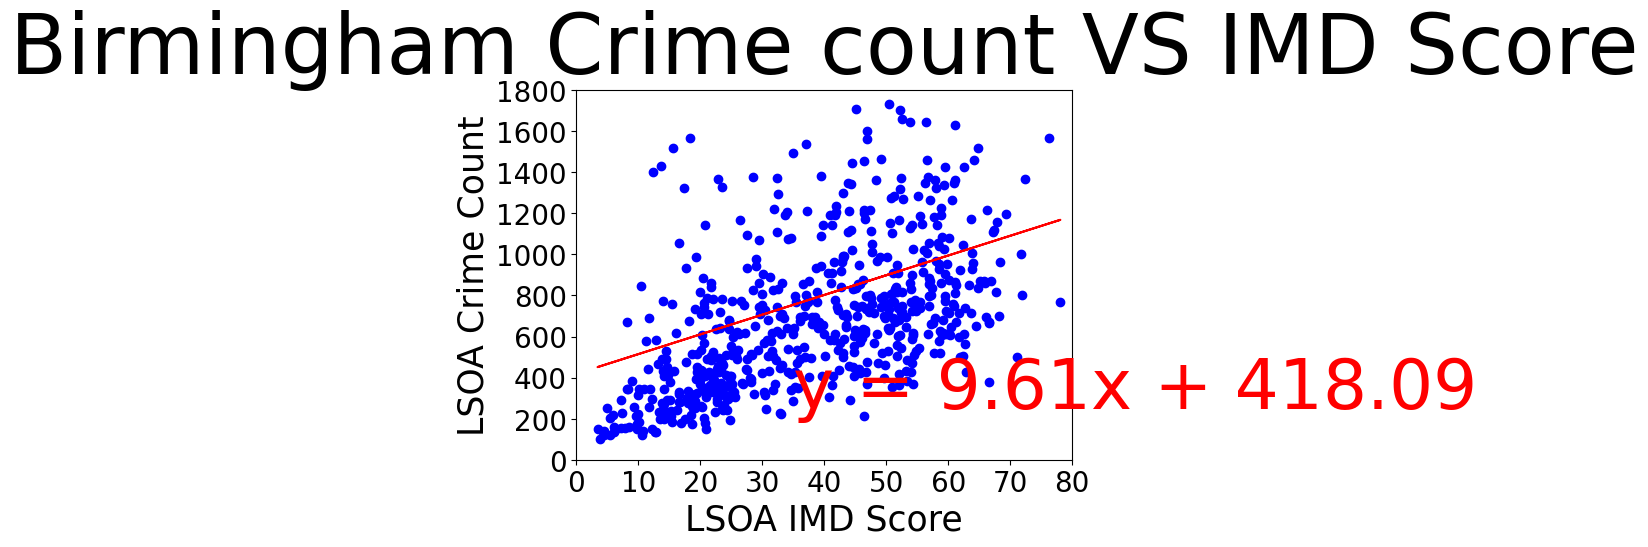

In [19]:

y_axis = LSOA_crime_count_df["LSOA code"]
x_axis = LSOA_crime_count_df["Index of Multiple Deprivation (IMD) Score"]
# Create a function to create Linear Regression plots
def plot_linear_regression(x_axis, y_axis, title, text_coordinates):
    
    # Run the regresson
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.plot(x_axis,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=50,color="red")
    print(f'The Pearson Coerrelation Coefficient, r = {rvalue}\nThe Coefficient of Determination r-saqured = {rvalue**2}')


plt.title("Birmingham Crime count VS IMD Score", fontsize=60)
plt.scatter(x_axis, y_axis, marker="o", color="blue")
#plt.plot(x_axis, y_fit)
plt.rcParams["figure.figsize"] = (50,30)
plt.xlim(0,80)
plt.ylim(0, 1800)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("LSOA IMD Score", fontsize=25)
plt.ylabel("LSOA Crime Count", fontsize=25)
plot_linear_regression(x_axis, y_axis, 'LSOA Crime Count',(35,250))
plt.savefig("output/05.png")
plt.show()



Correlation coeff r is 0.21 which shows a very weak positive correlation

In [20]:
# Groupby Crime Type


f = {"Crime type":"count", "Index of Multiple Deprivation (IMD) Score":'count'}
crime_type_groupby = Police_IMD_Merge.groupby(["Crime type"]).agg(f)


crime_type_groupby



Crime type  \
Crime type                                 
Anti-social behaviour              40962   
Bicycle theft                       3084   
Burglary                           27151   
Criminal damage and arson          35288   
Drugs                              10309   
Other crime                         7523   
Other theft                        31153   
Possession of weapons               8902   
Public order                       42659   
Robbery                            12807   
Shoplifting                        18143   
Theft from the person               6376   
Vehicle crime                      41073   
Violence and sexual offences      212627   

                              Index of Multiple Deprivation (IMD) Score  
Crime type                                                               
Anti-social behaviour                                             40962  
Bicycle theft                                                      3084  
Burglary                                                          27151  
Criminal damage and arson                                         35288  
Drugs                                                             10309  
Other crime                                                        7523  
Other theft                                                       31153  
Possession of weapons                                              8902  
Public order                                                      42659  
Robbery                                                           12807  
Shoplifting                                                       18143  
Theft from the person                                              6376  
Vehicle crime                                                     41073  
Violence and sexual offences                                     212627

The Pearson Coerrelation Coefficient, r = 0.23543382259306486
The Coefficient of Determination r-saqured = 0.05542908482078274


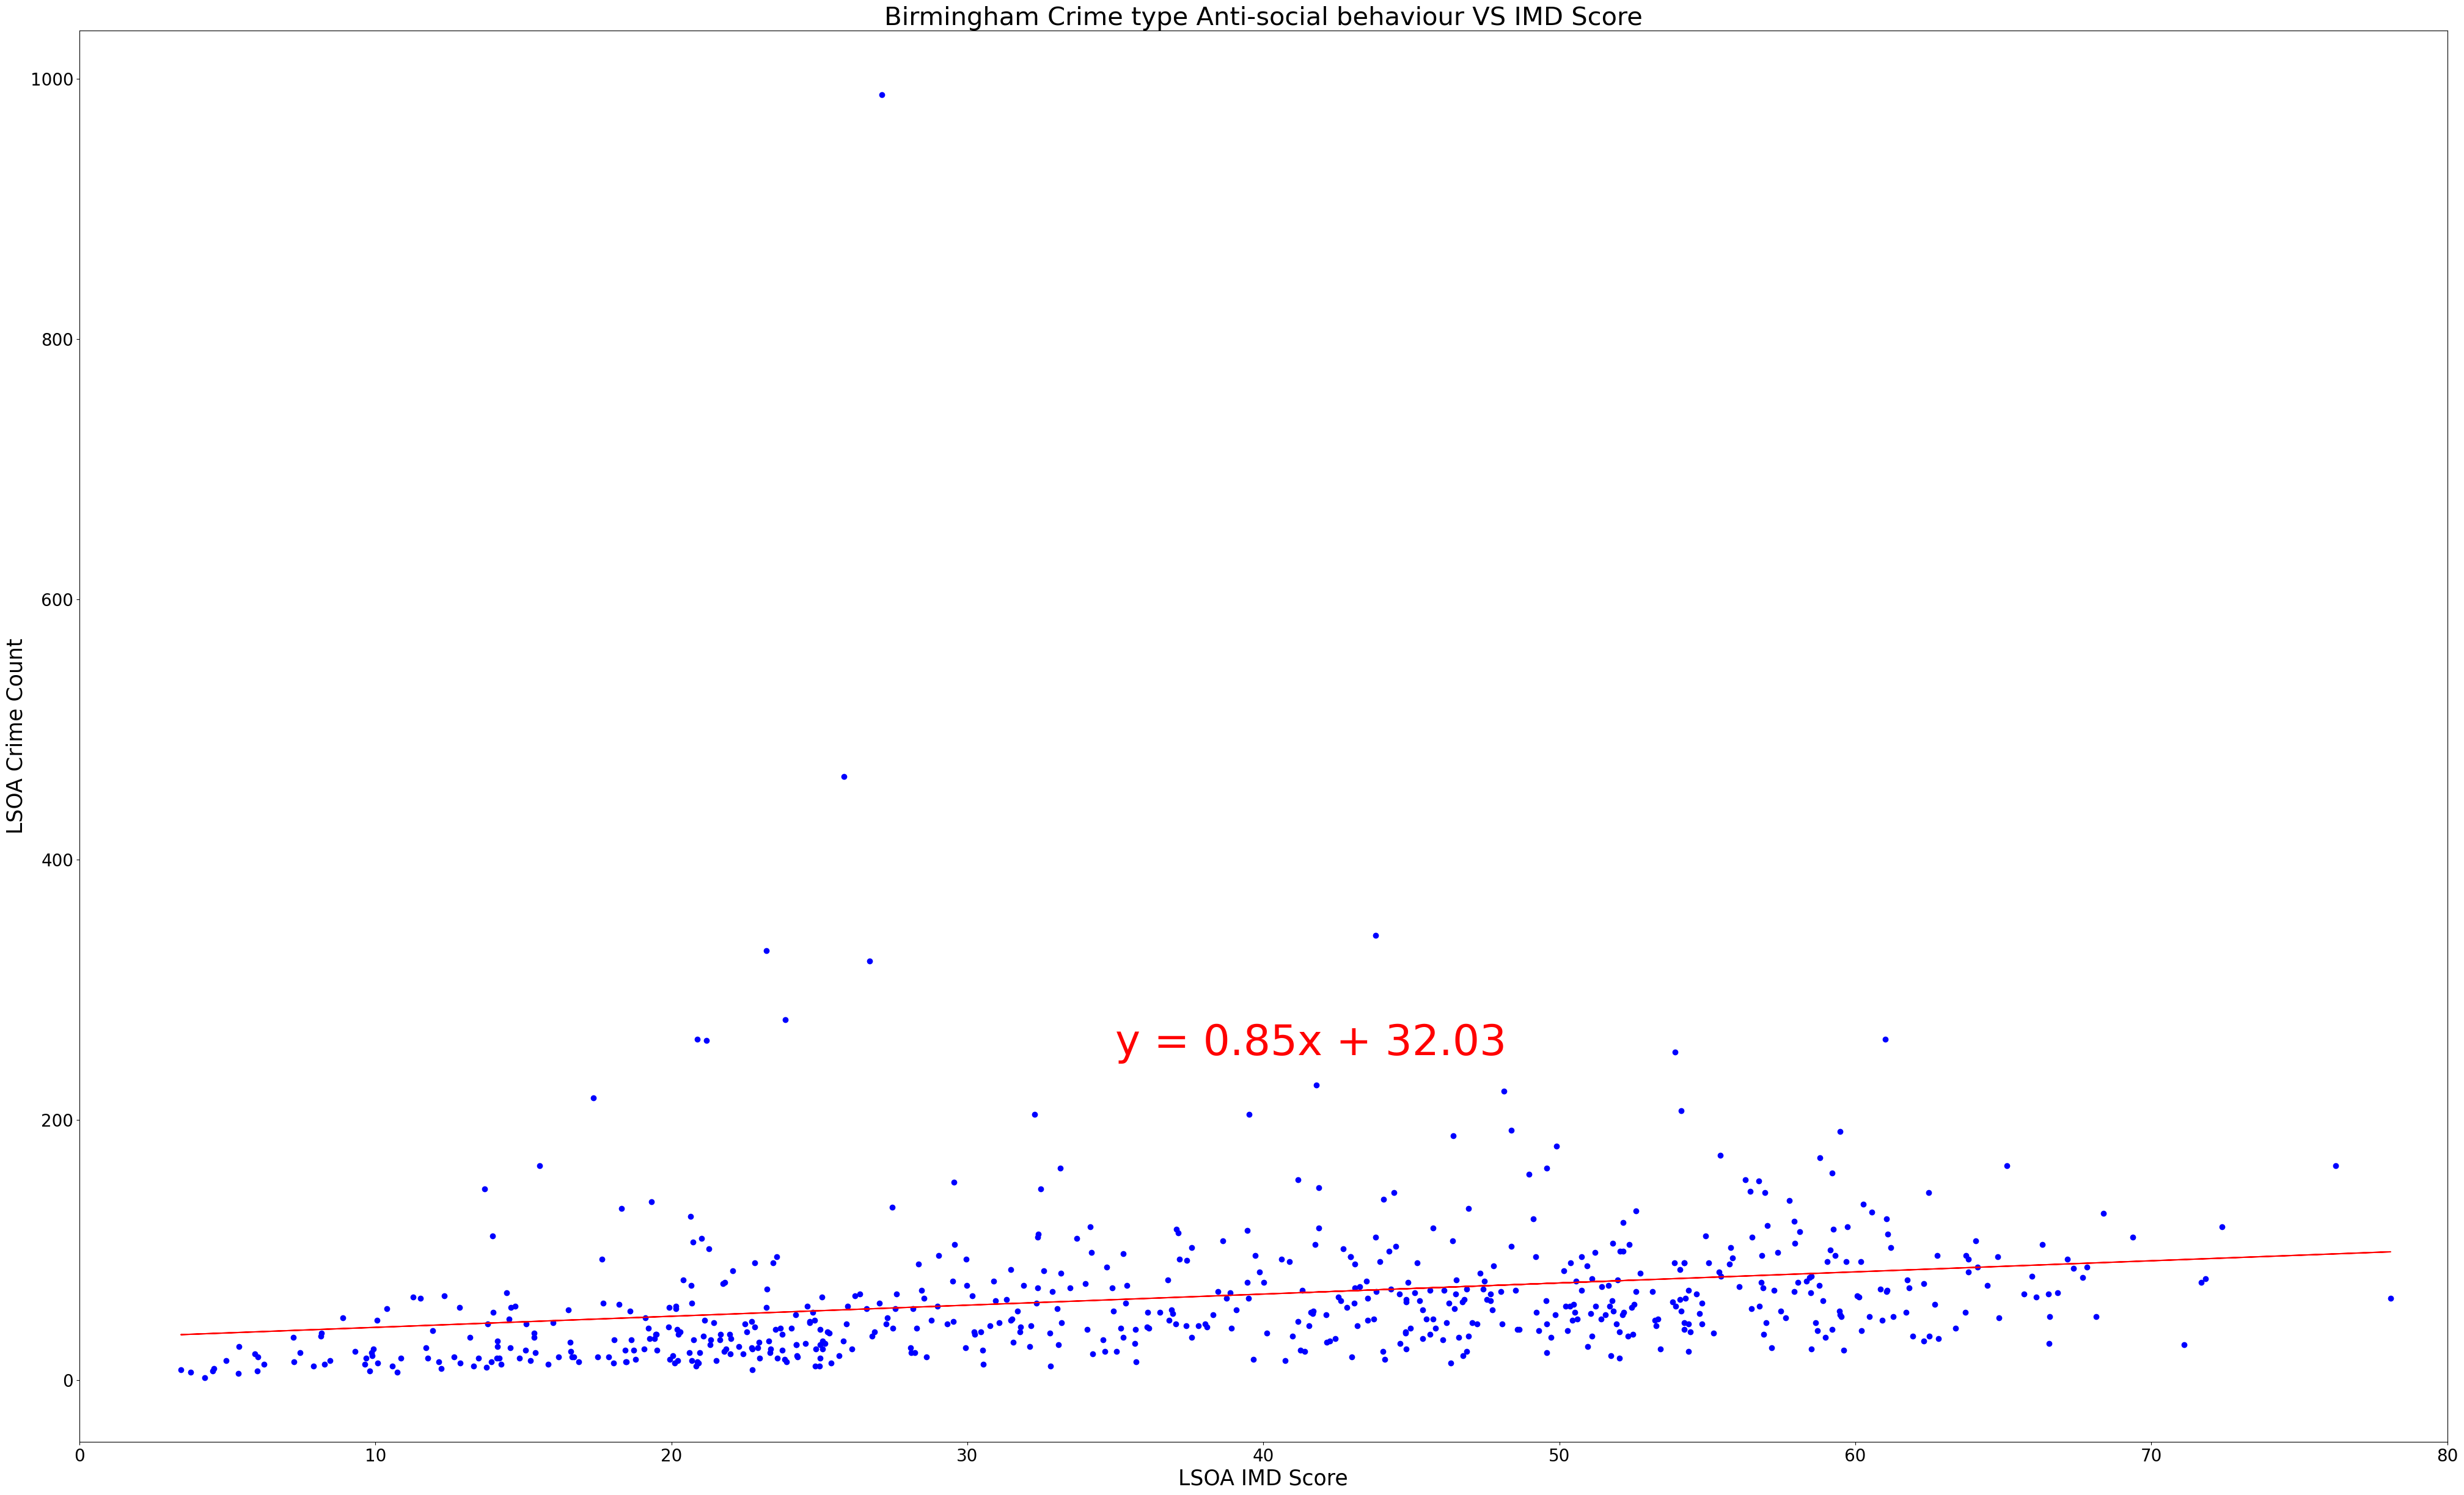

The Pearson Coerrelation Coefficient, r = 0.038084245544912916
The Coefficient of Determination r-saqured = 0.0014504097587252193


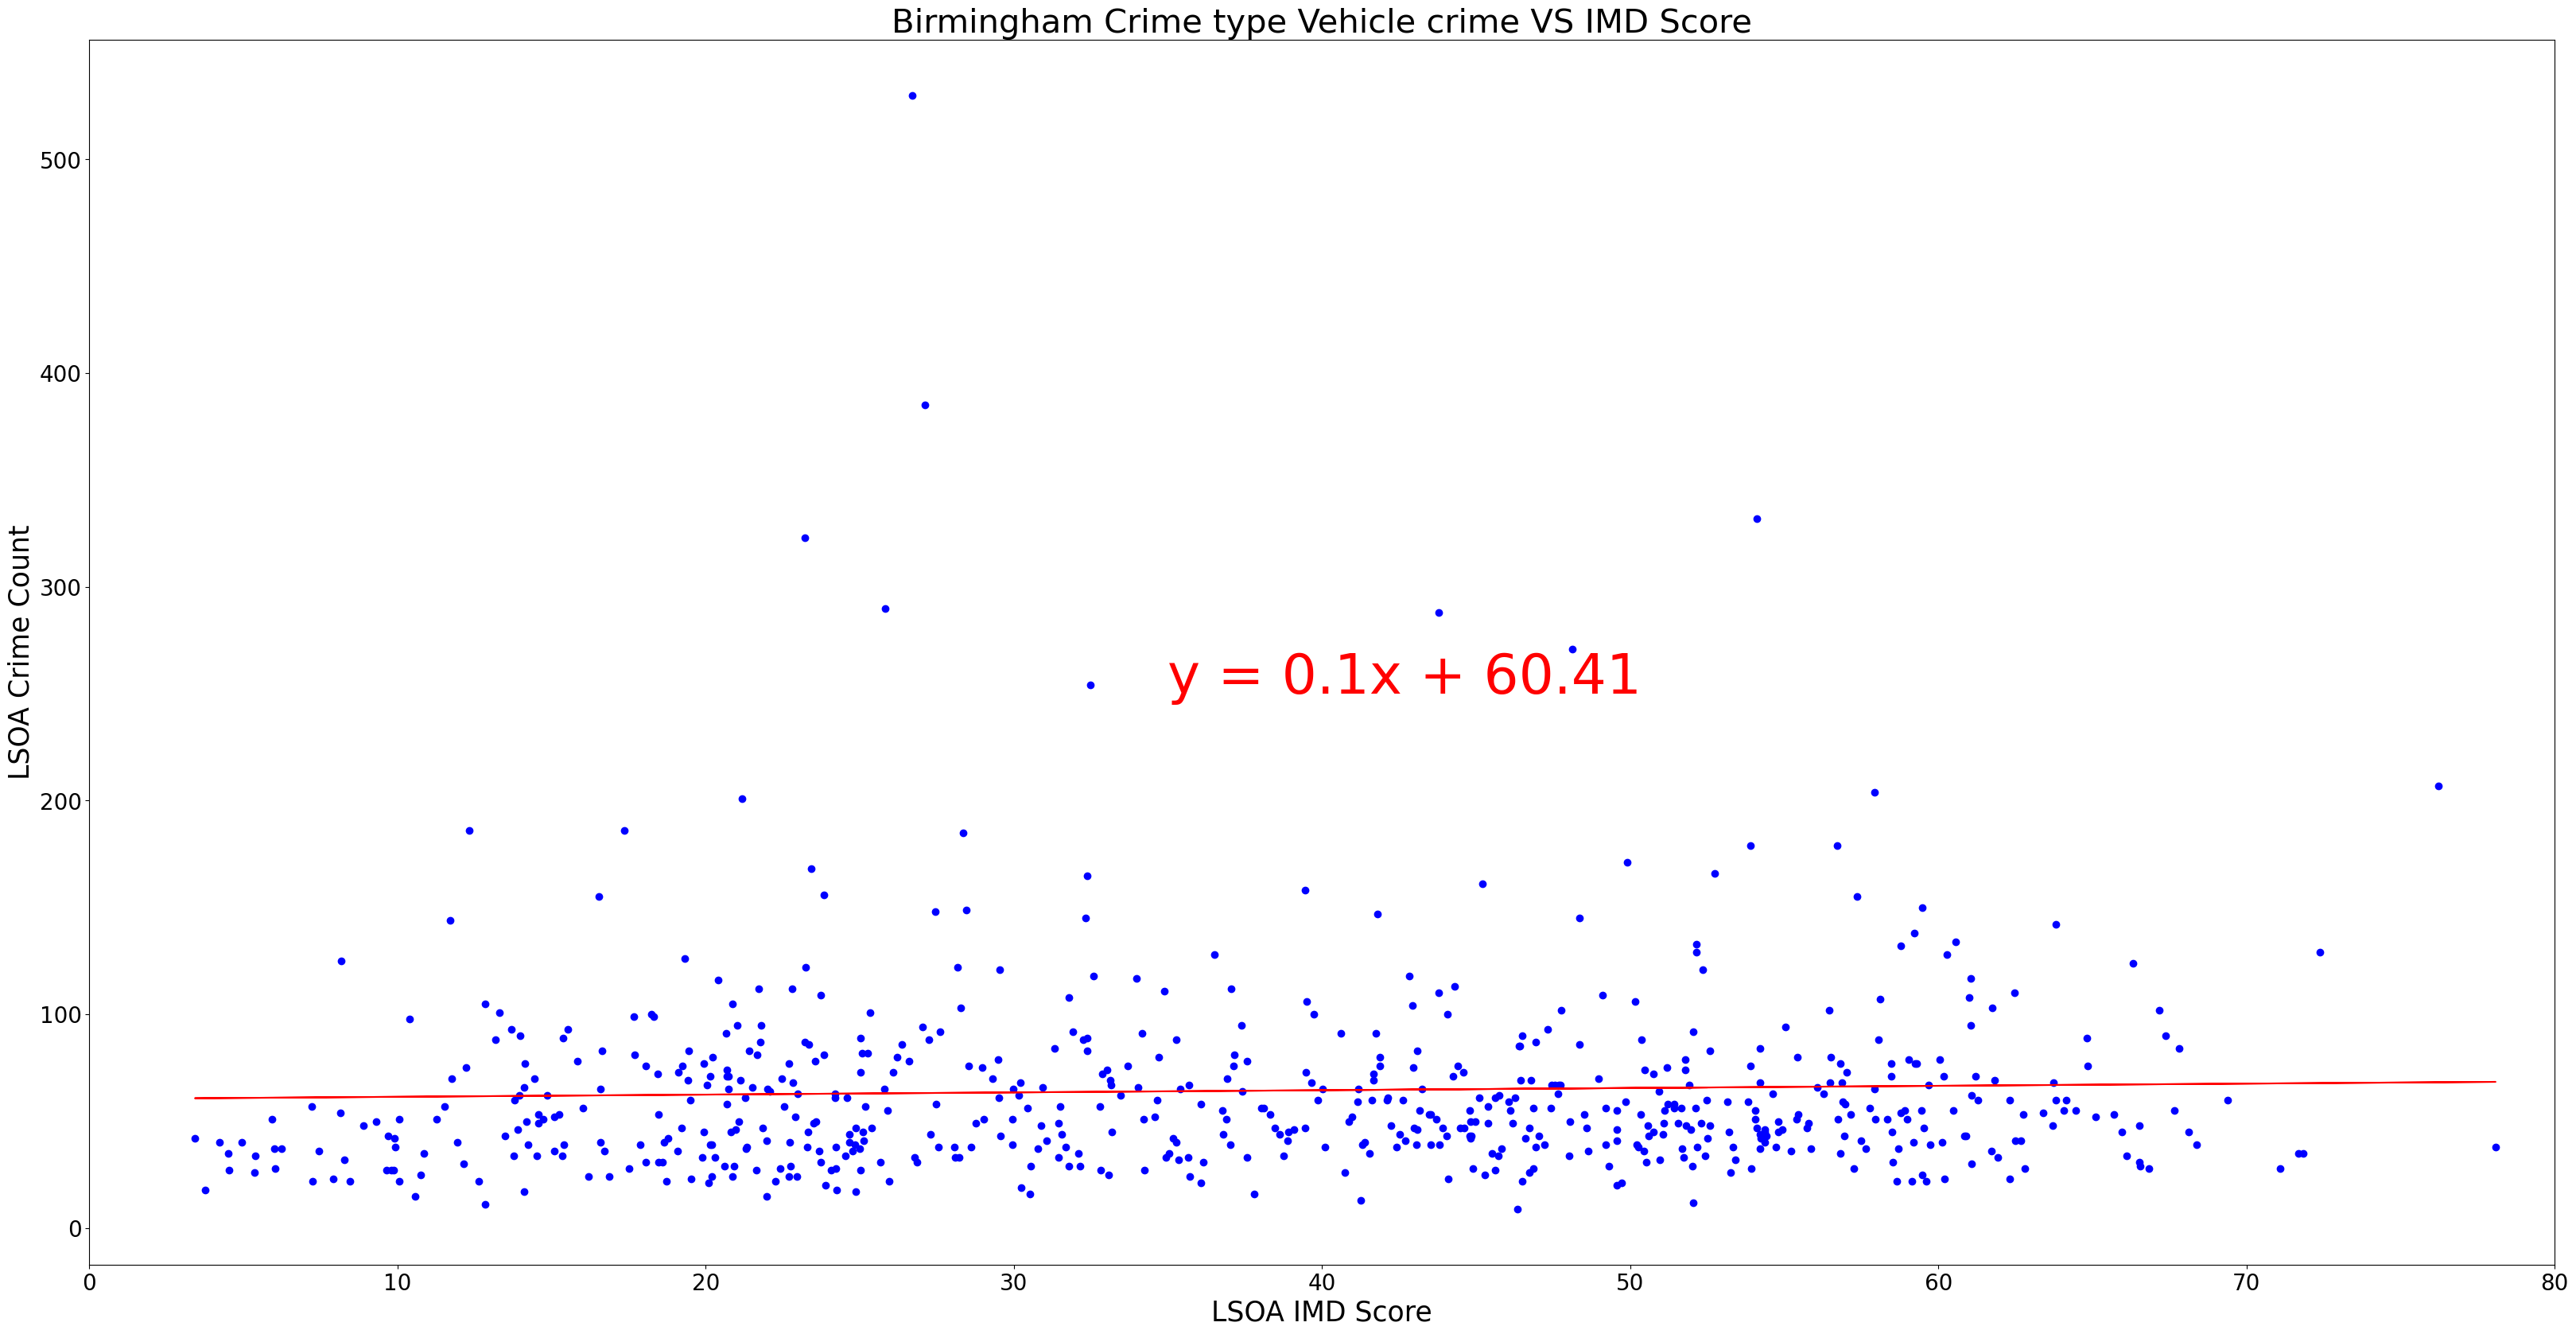

The Pearson Coerrelation Coefficient, r = 0.10278871372101155
The Coefficient of Determination r-saqured = 0.010565519668420066


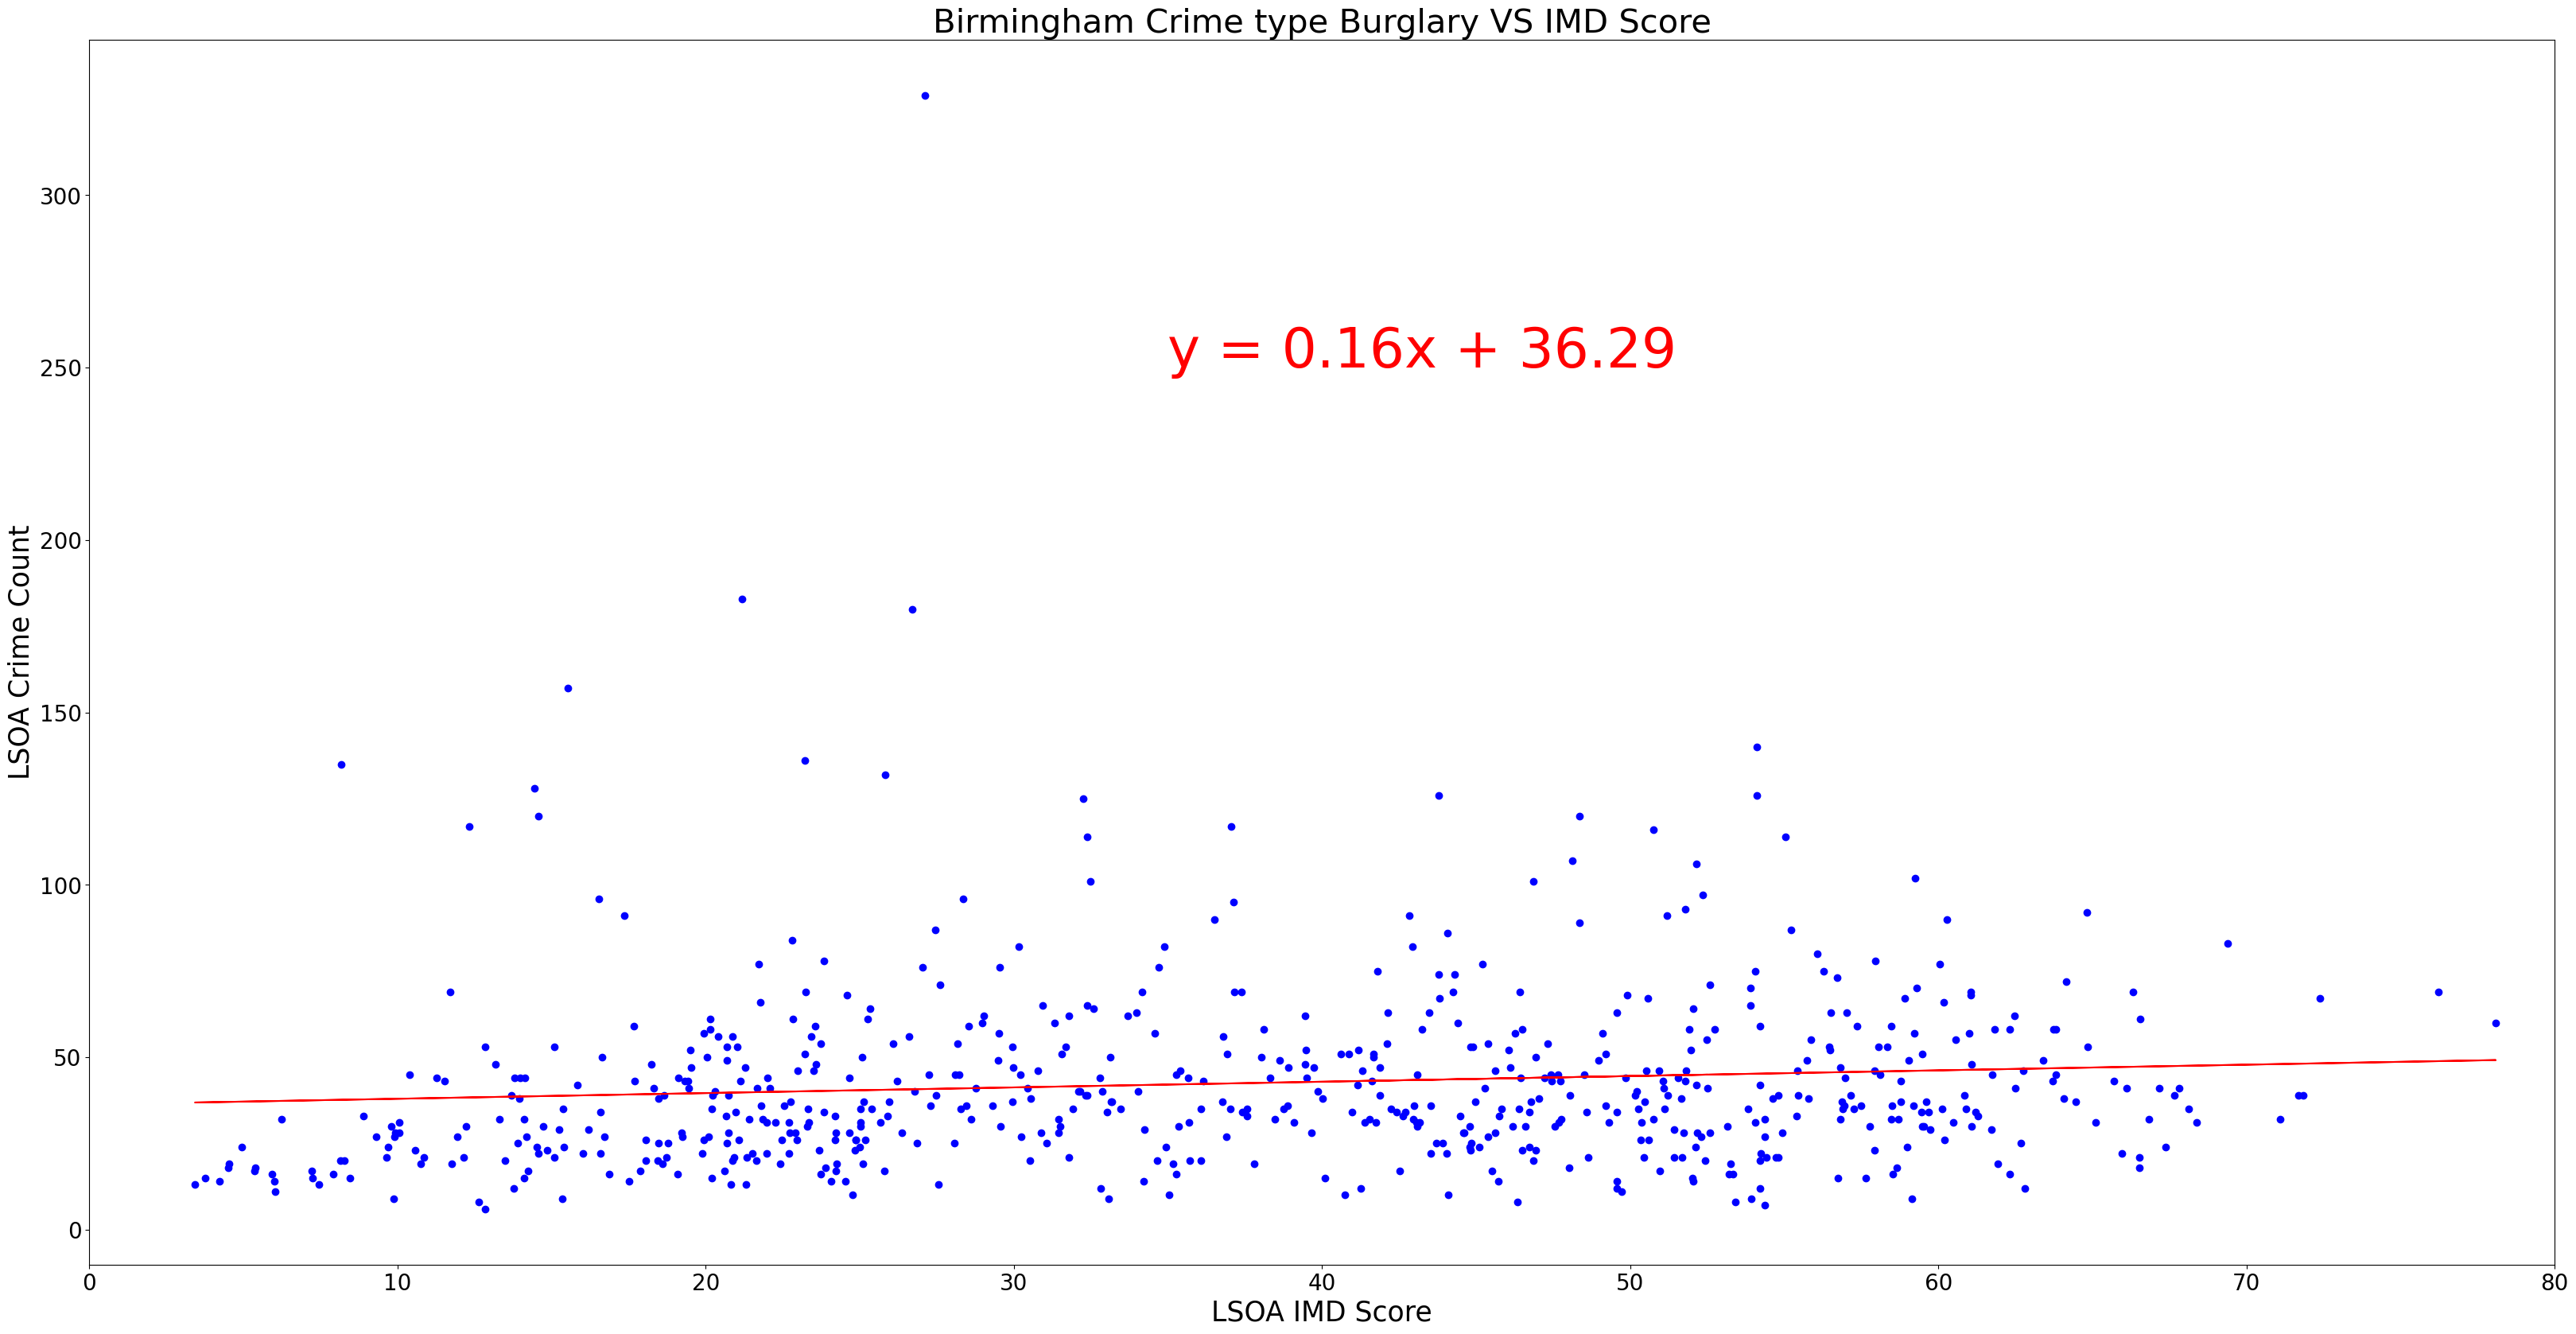

The Pearson Coerrelation Coefficient, r = 0.40201546282763867
The Coefficient of Determination r-saqured = 0.16161643235252052


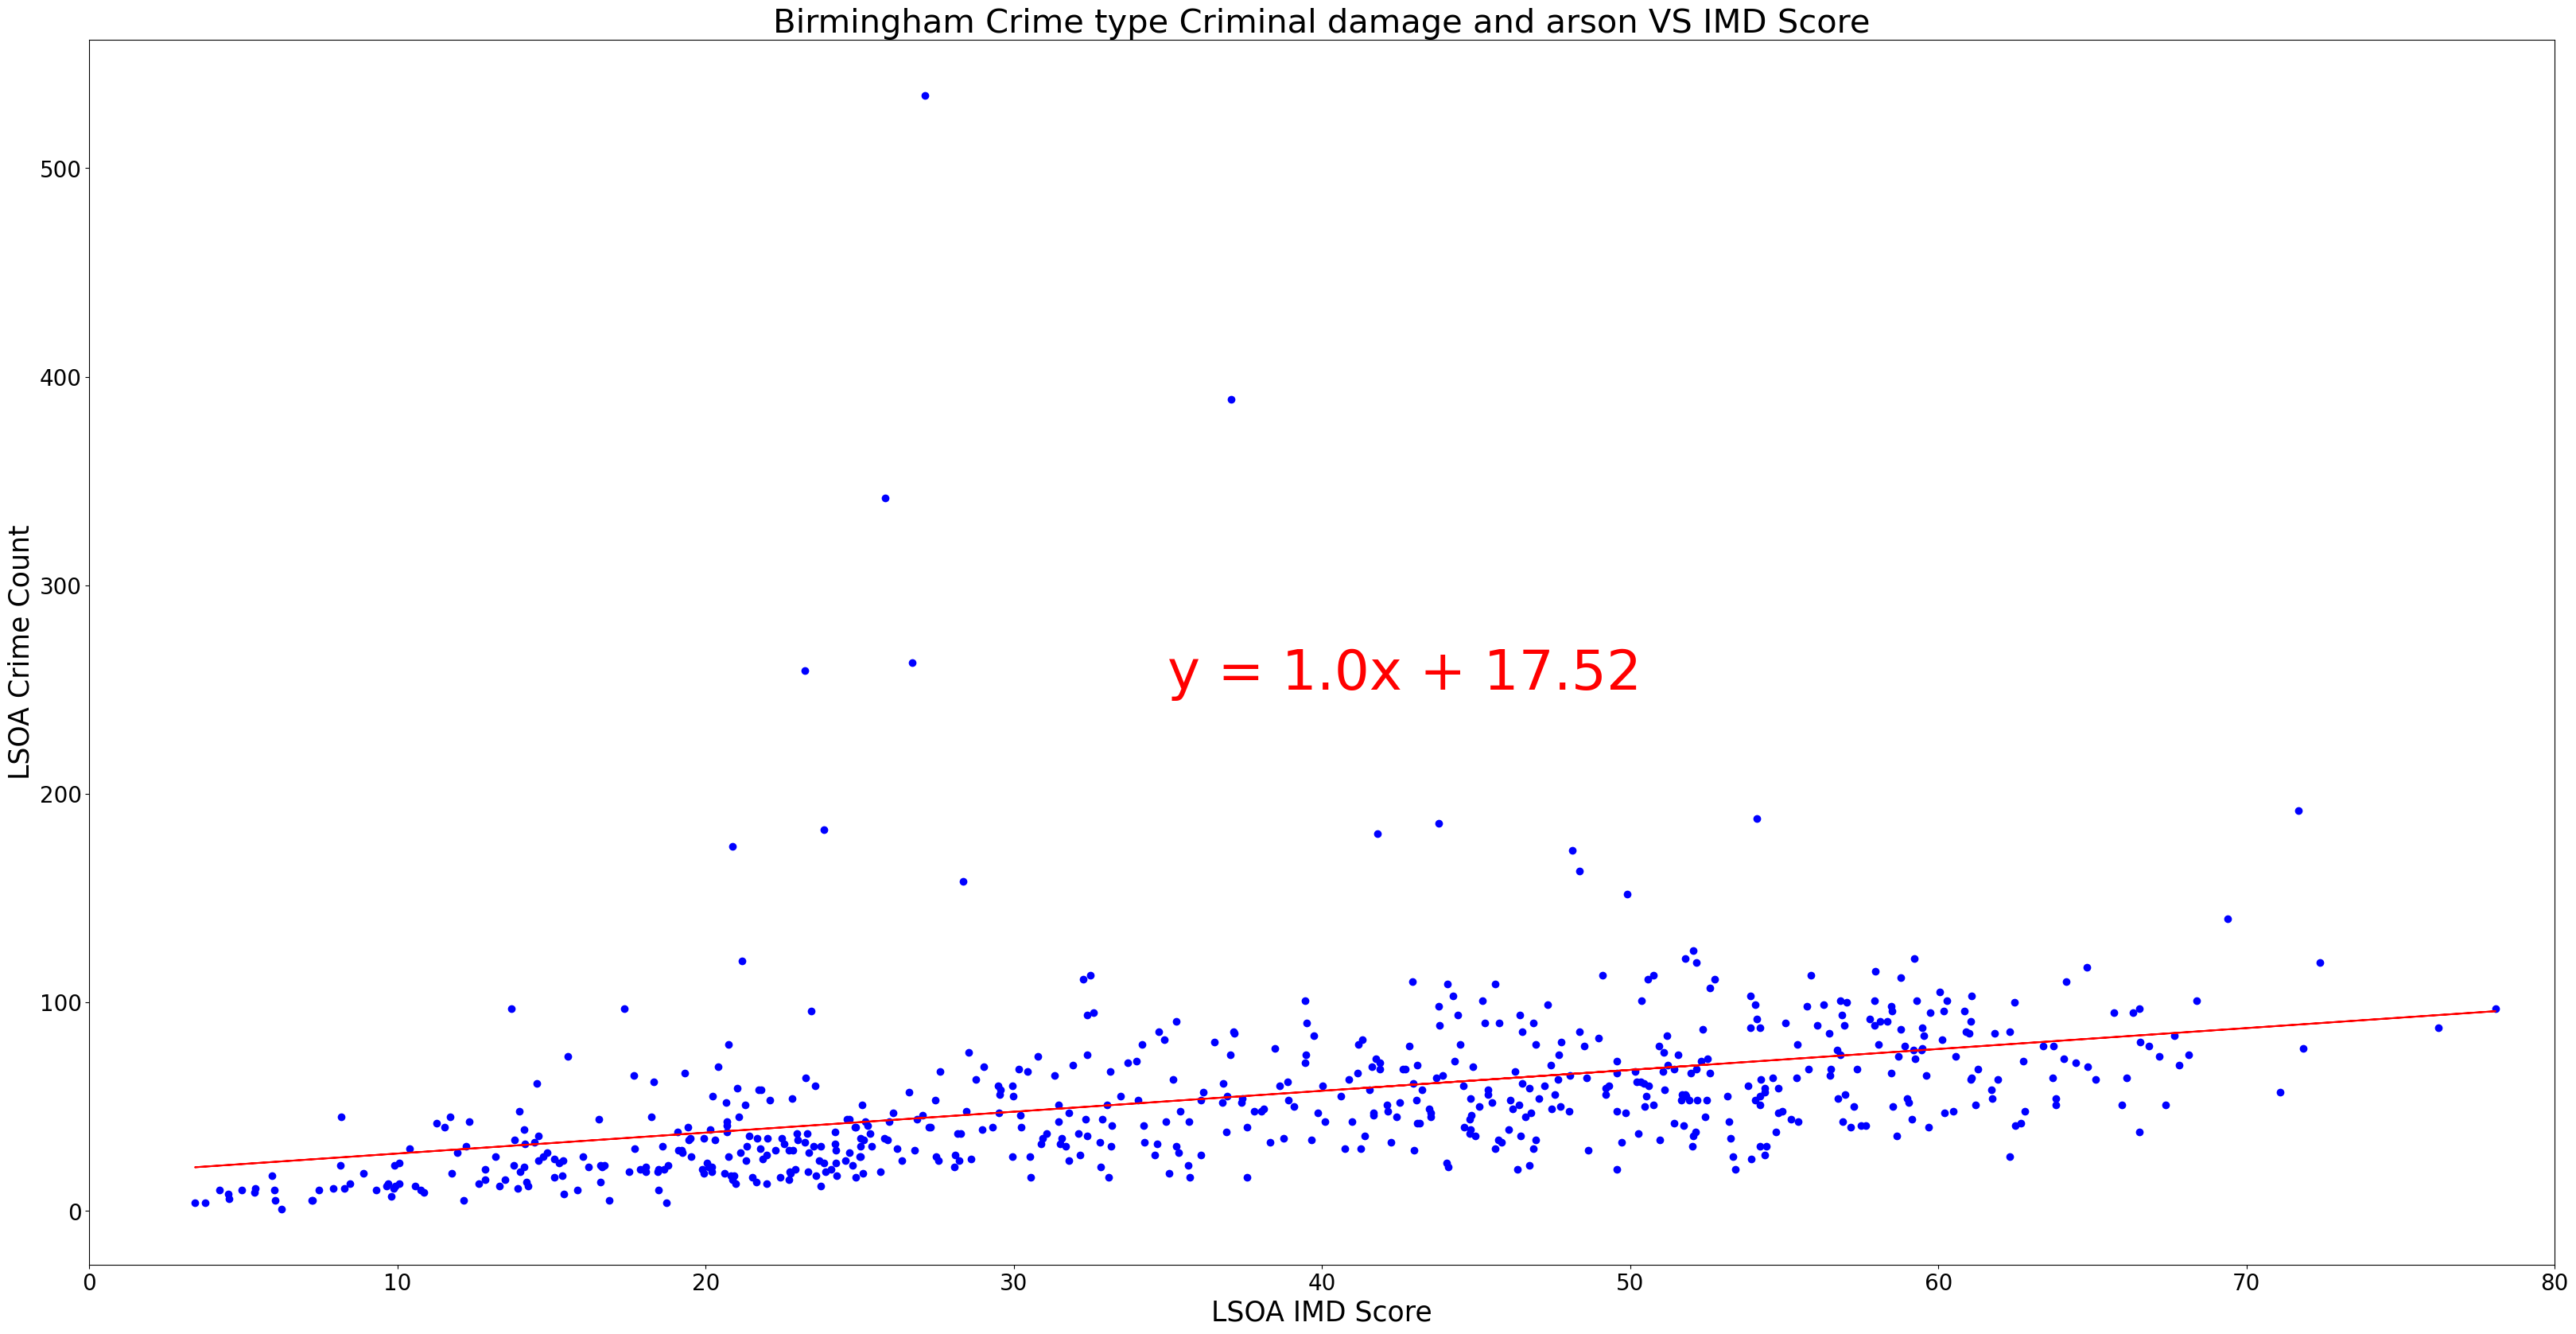

The Pearson Coerrelation Coefficient, r = 0.3511650689683292
The Coefficient of Determination r-saqured = 0.12331690566353141


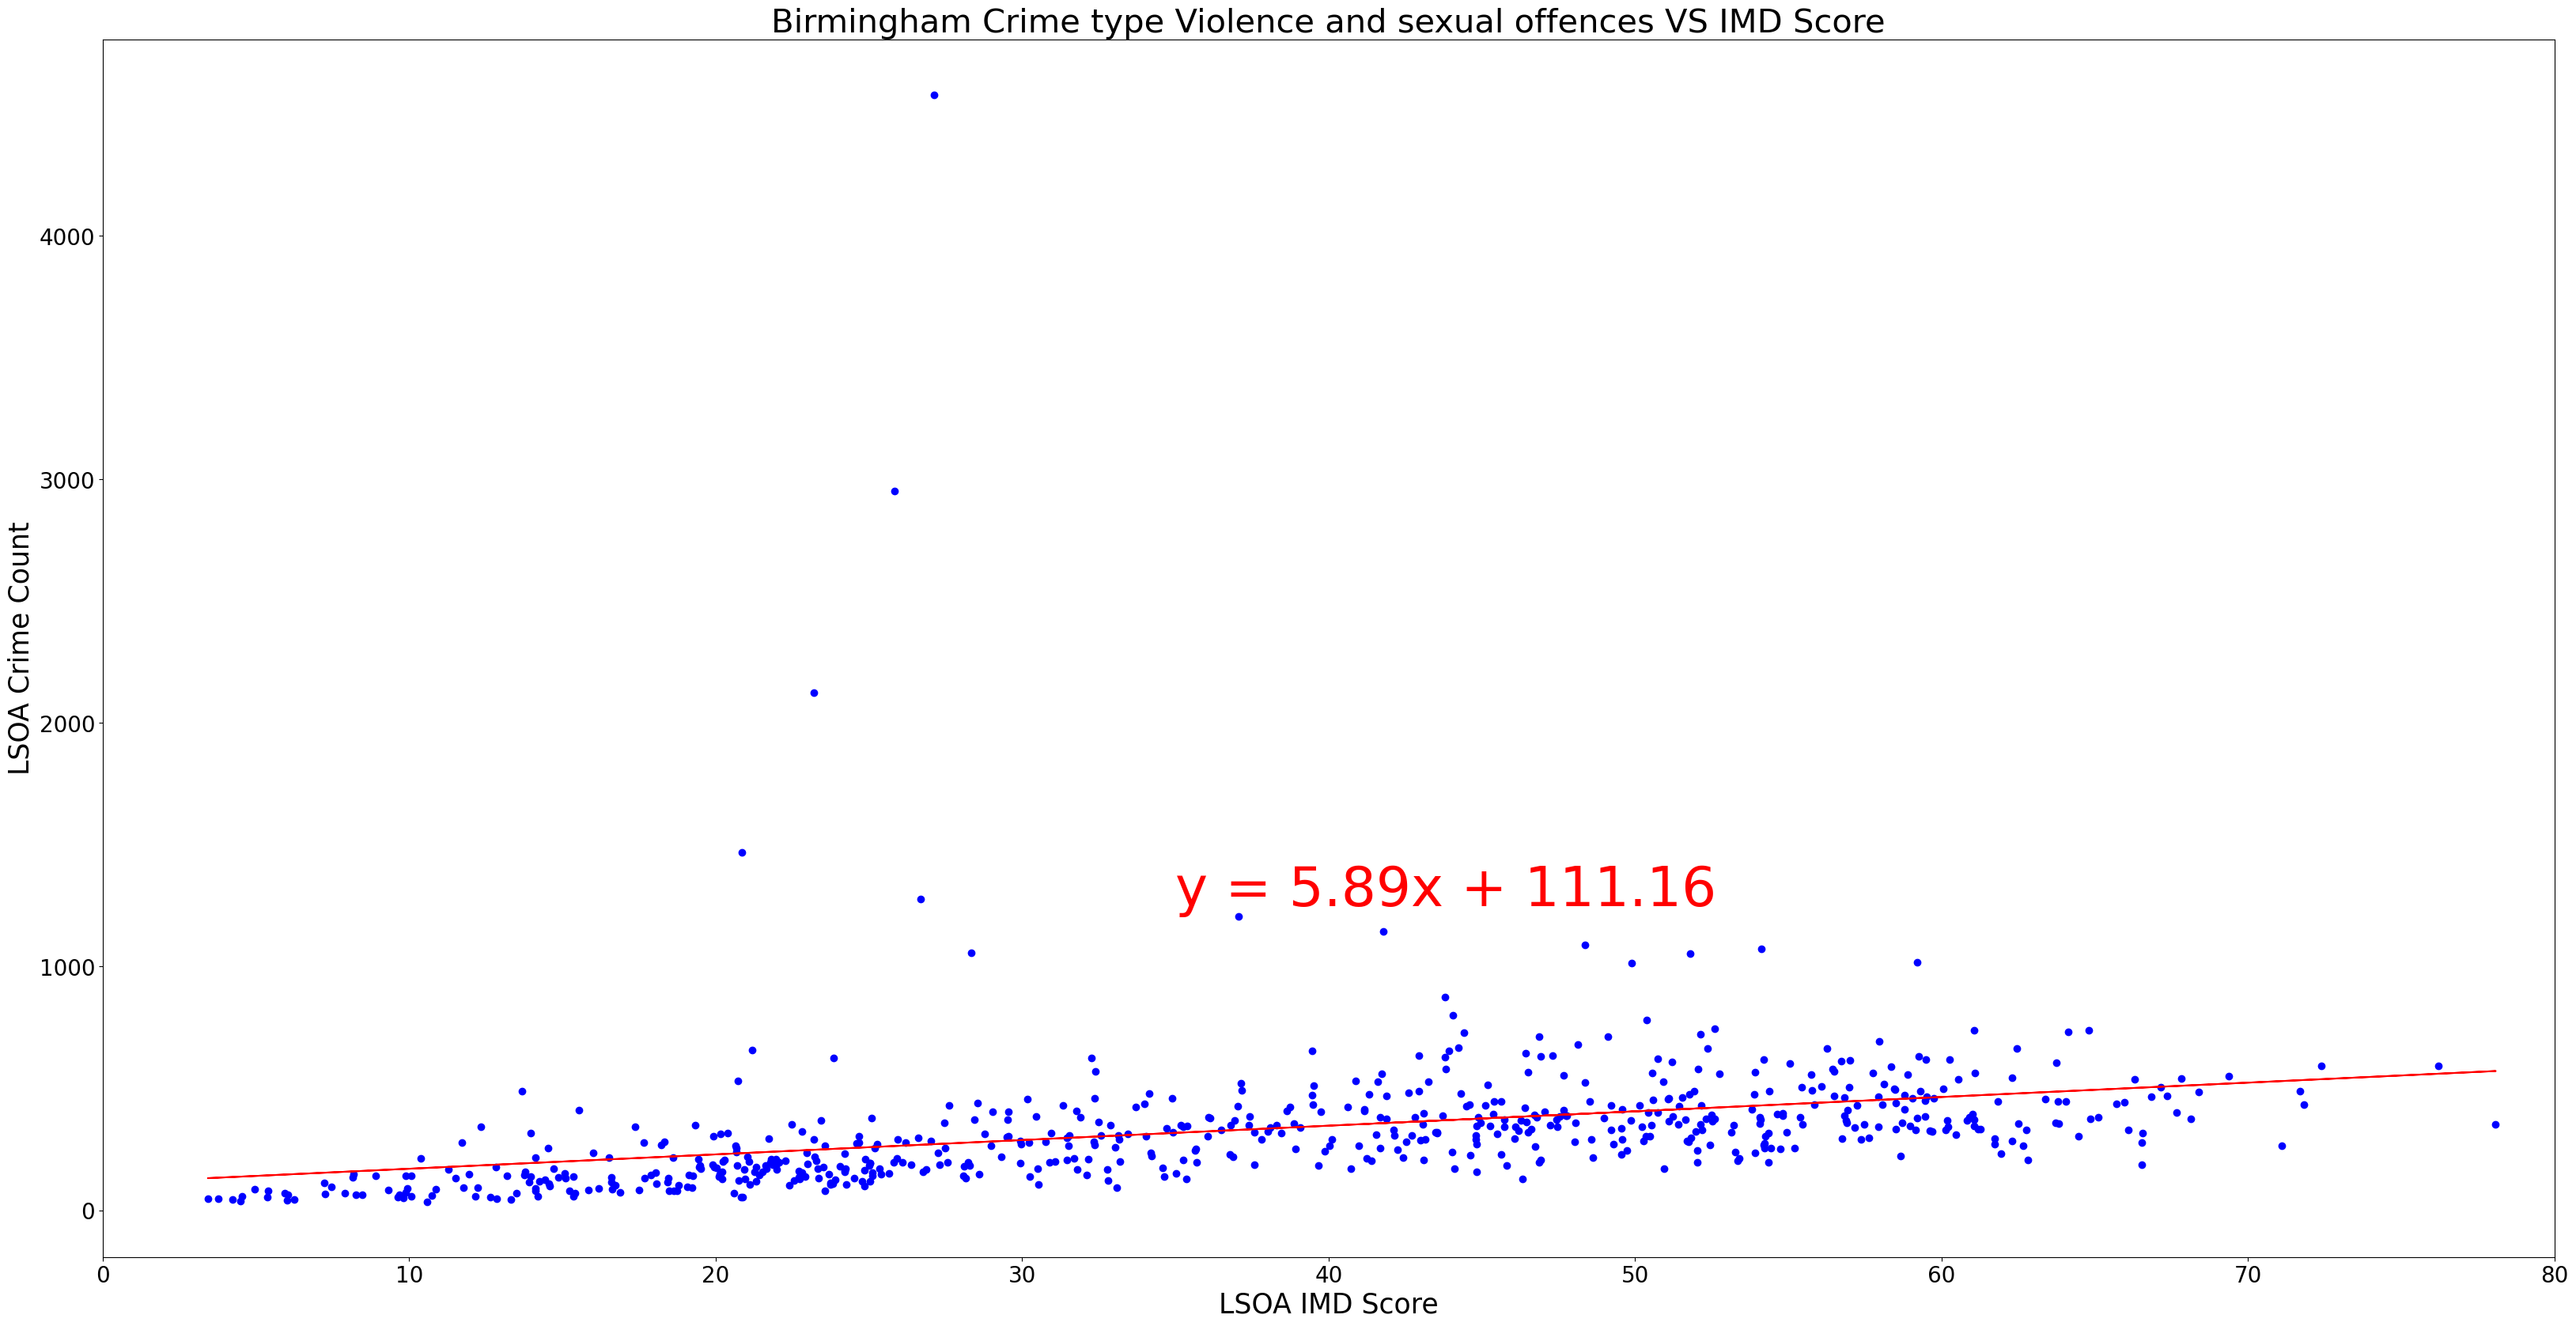

The Pearson Coerrelation Coefficient, r = 0.22116468873550407
The Coefficient of Determination r-saqured = 0.0489138195434724


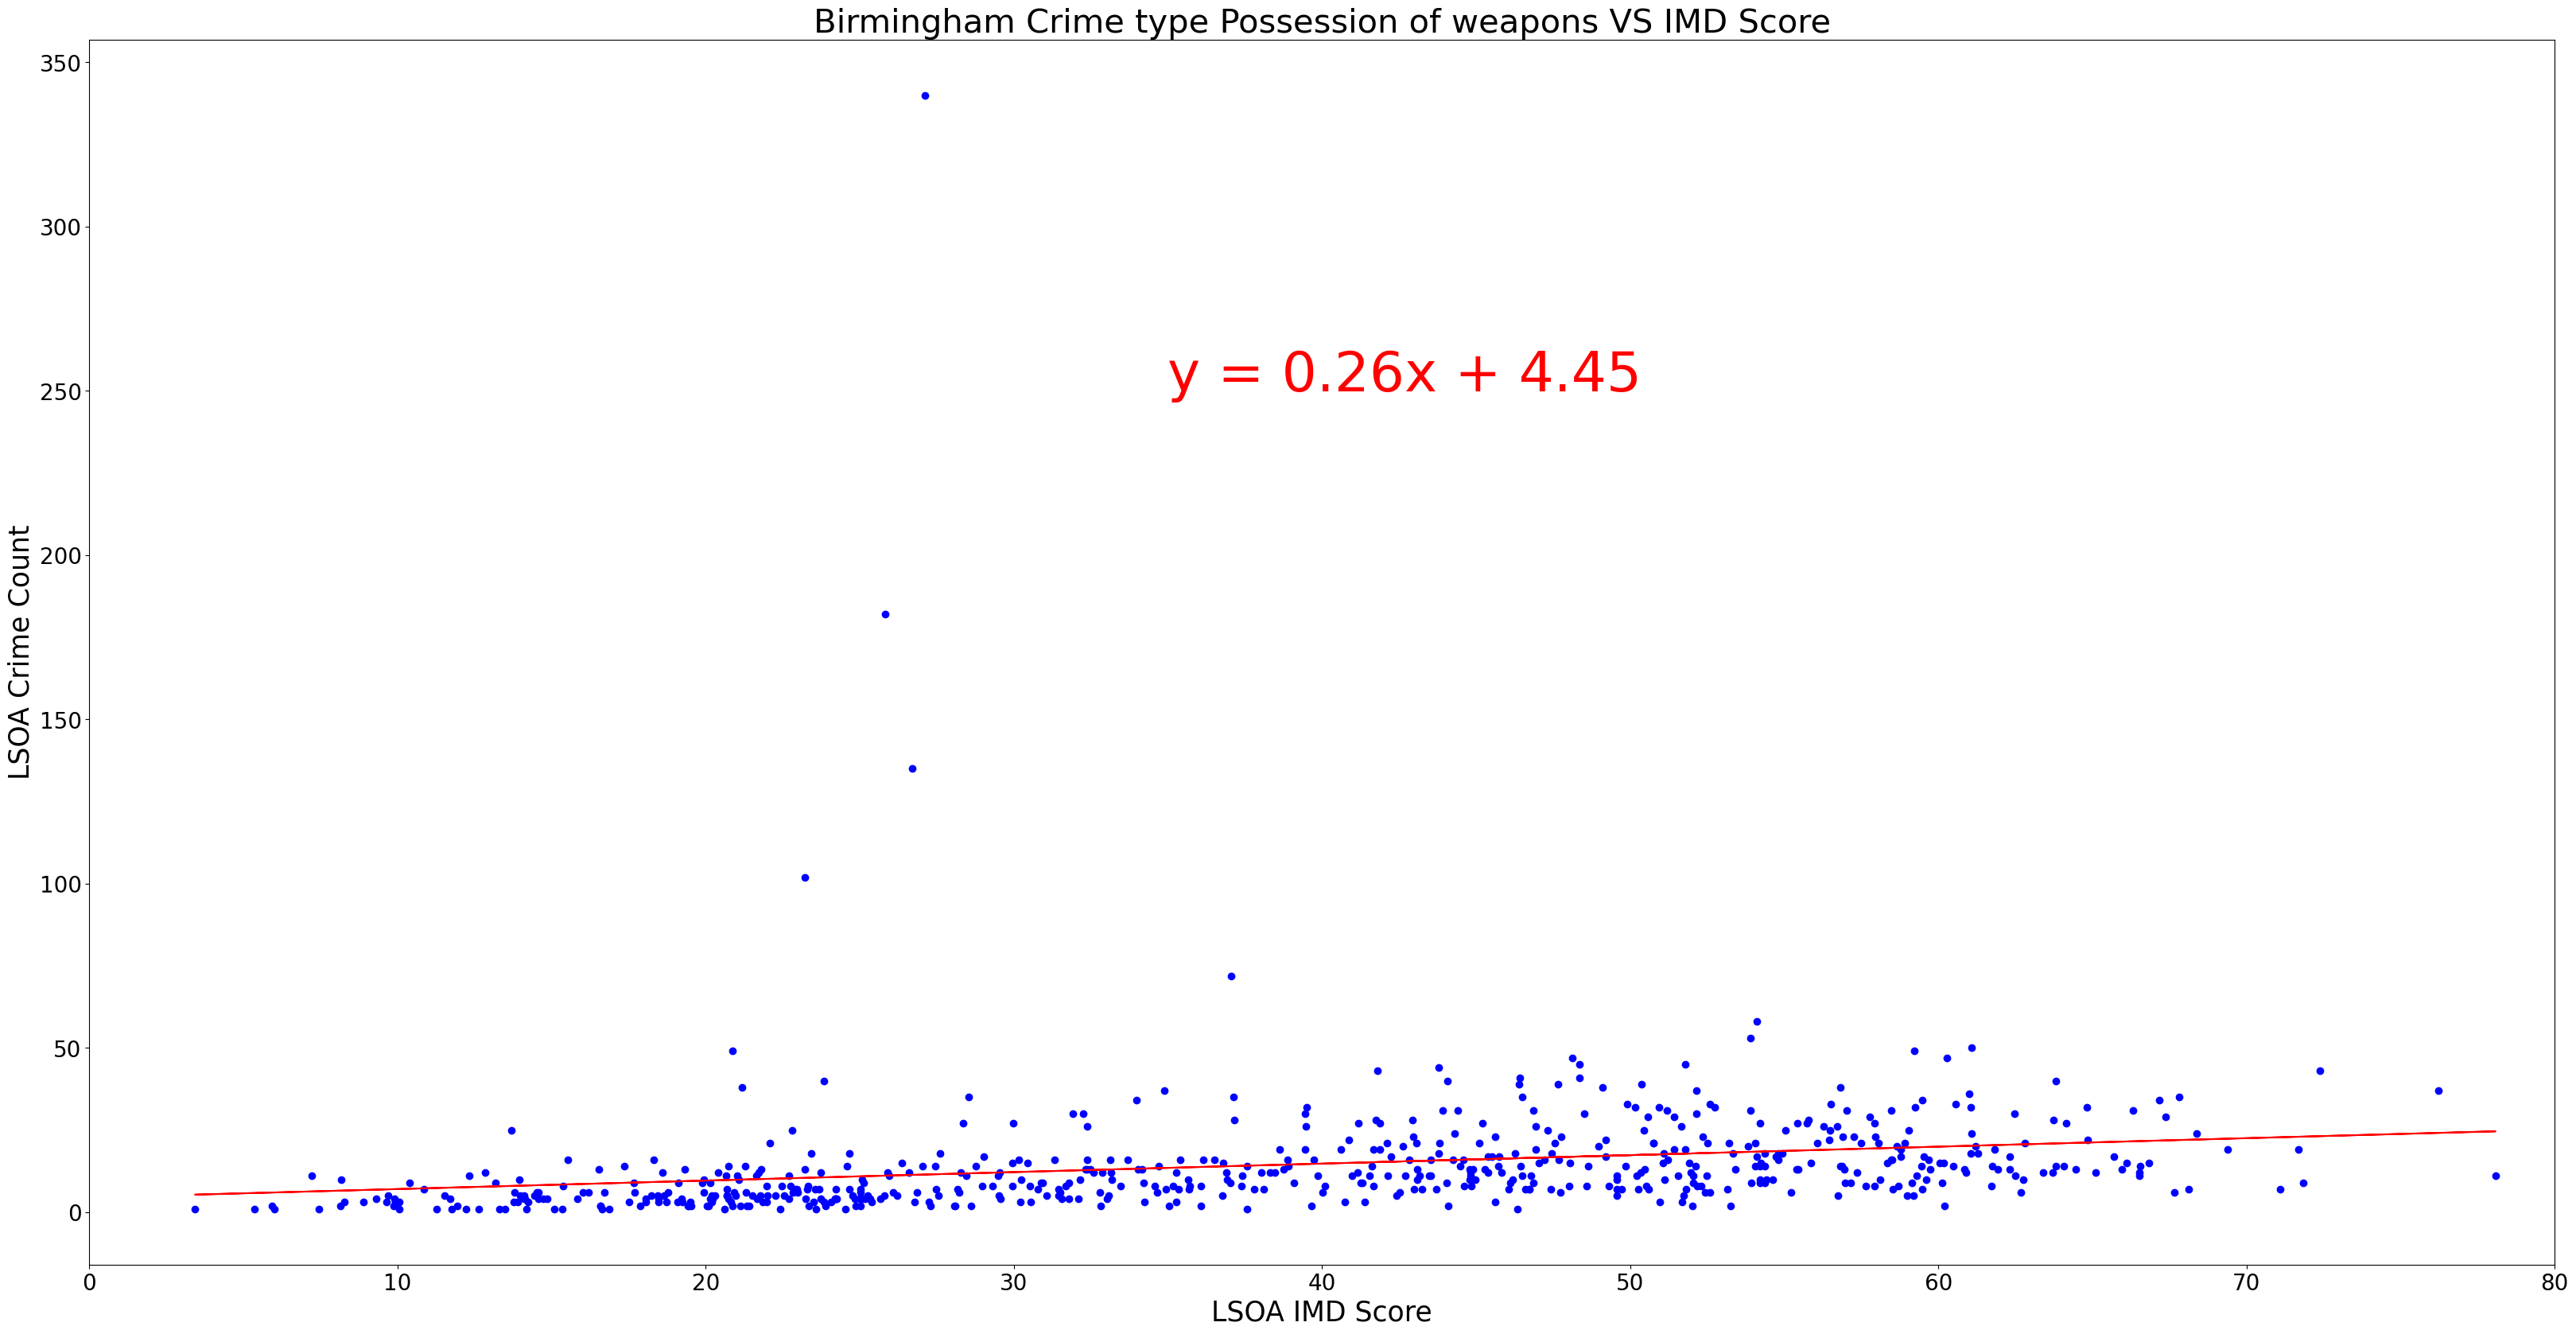

The Pearson Coerrelation Coefficient, r = 0.18987433388656721
The Coefficient of Determination r-saqured = 0.03605226266886761


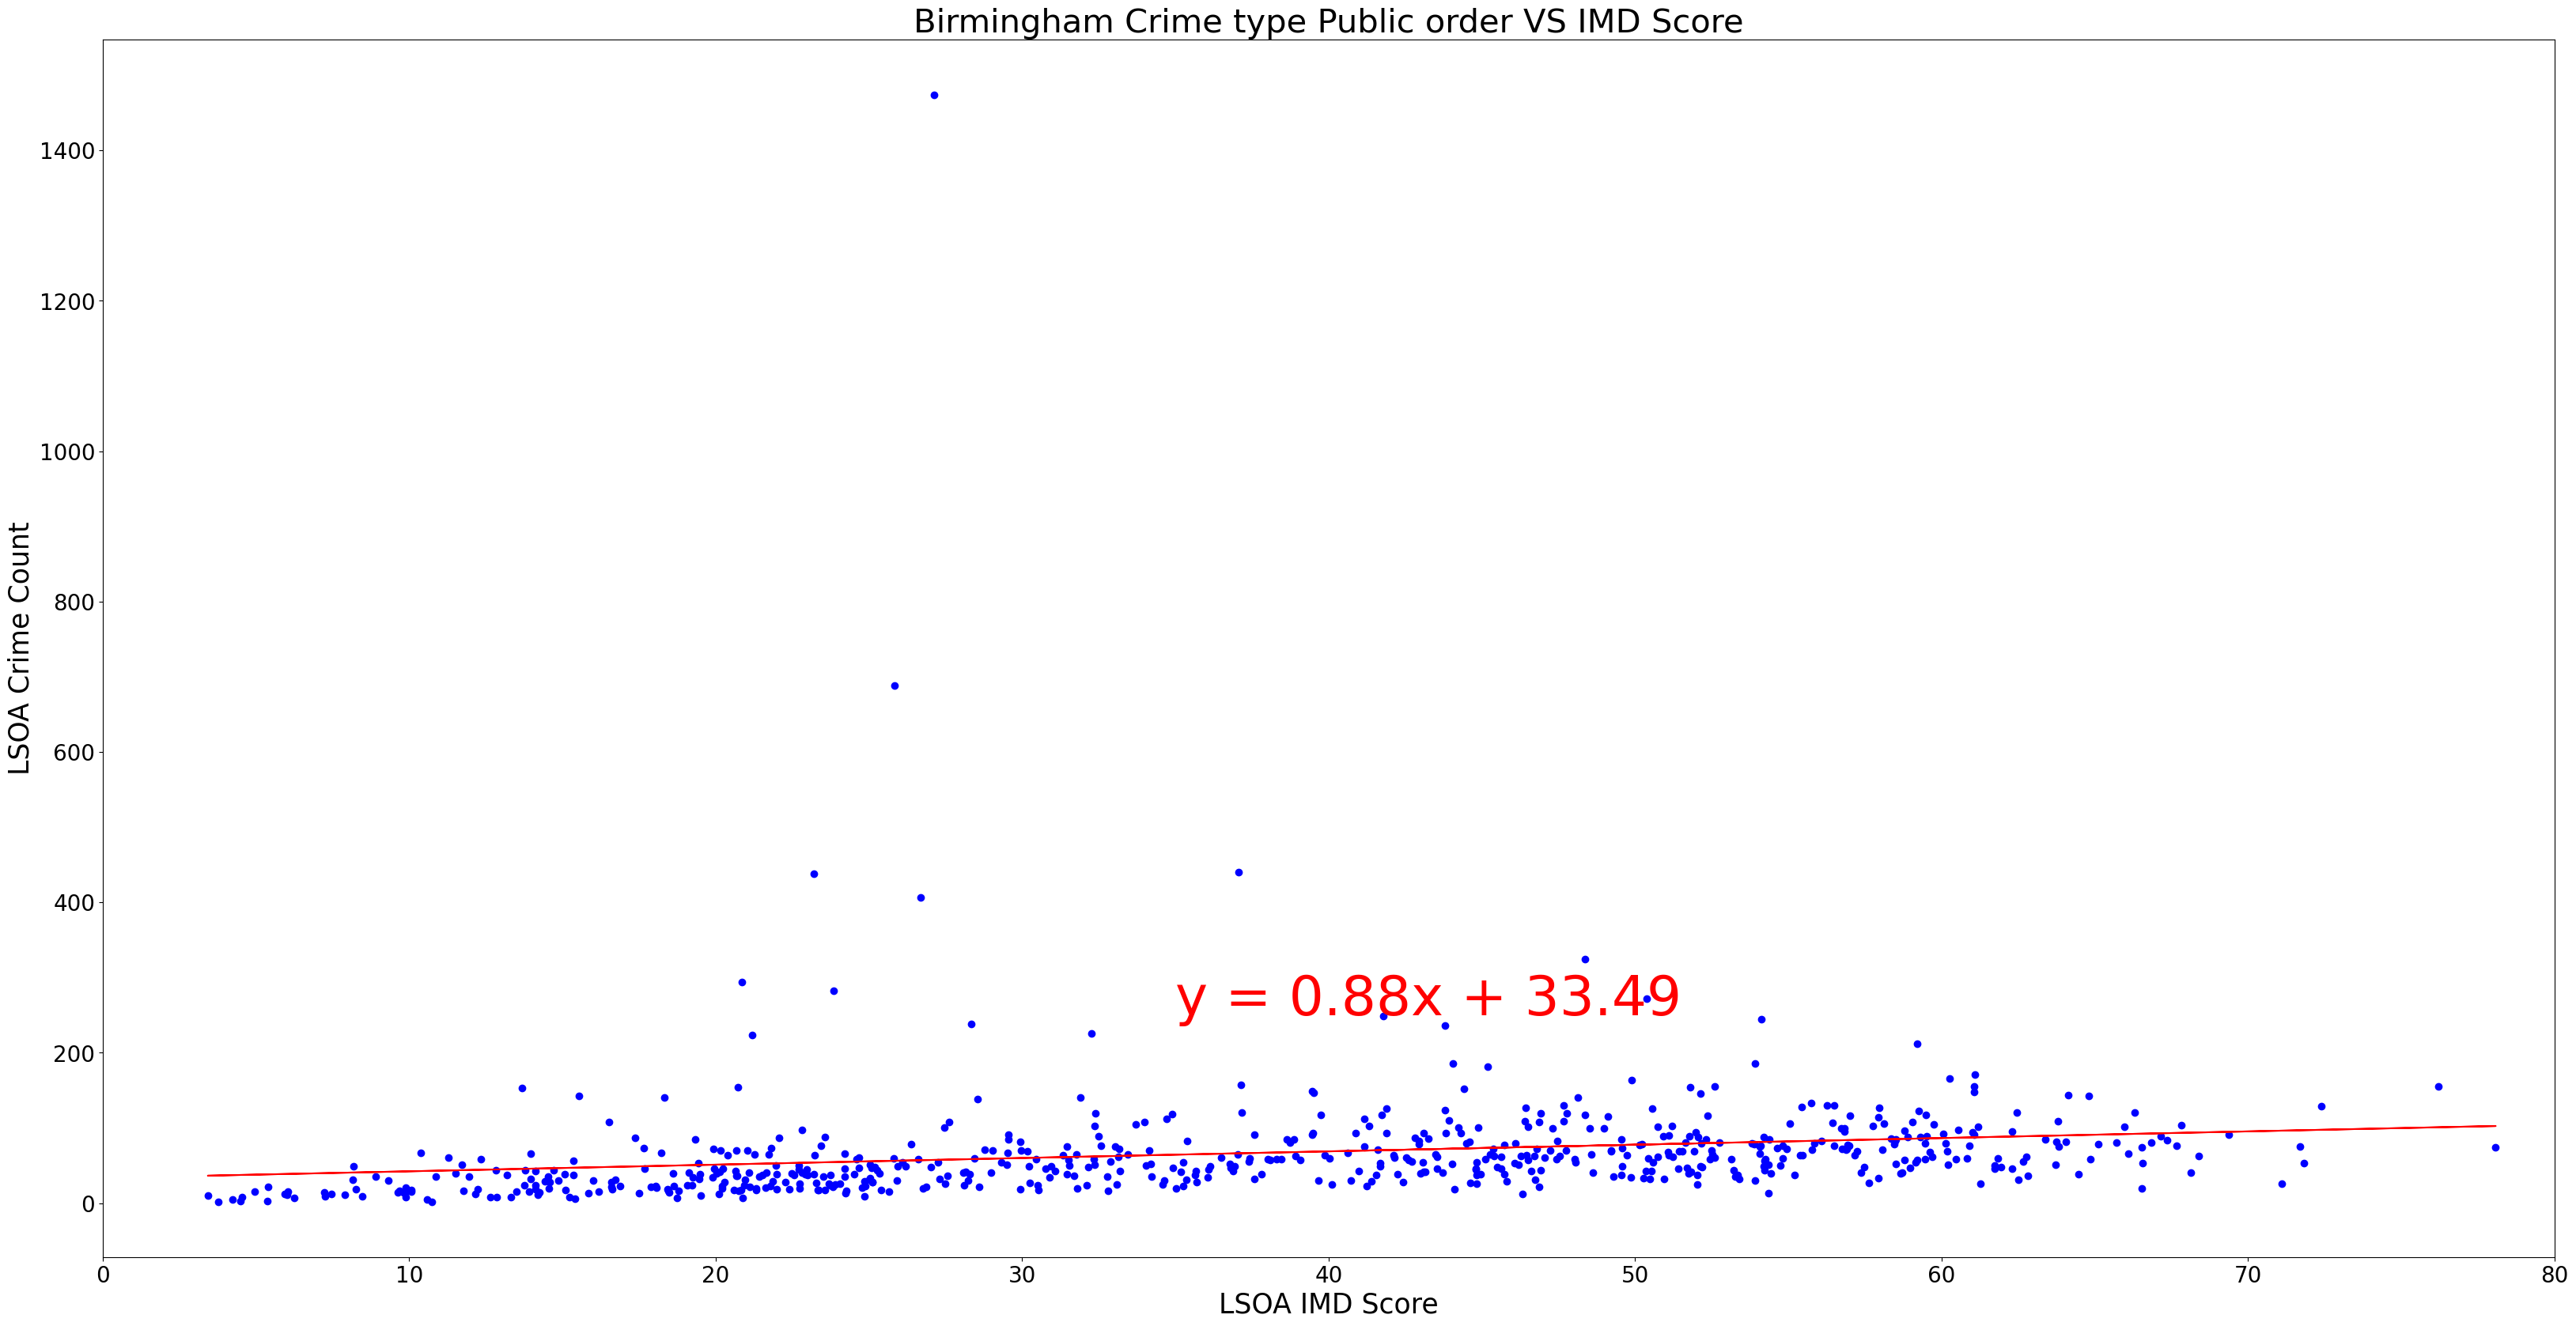

The Pearson Coerrelation Coefficient, r = 0.11363938641240458
The Coefficient of Determination r-saqured = 0.012913910144187803


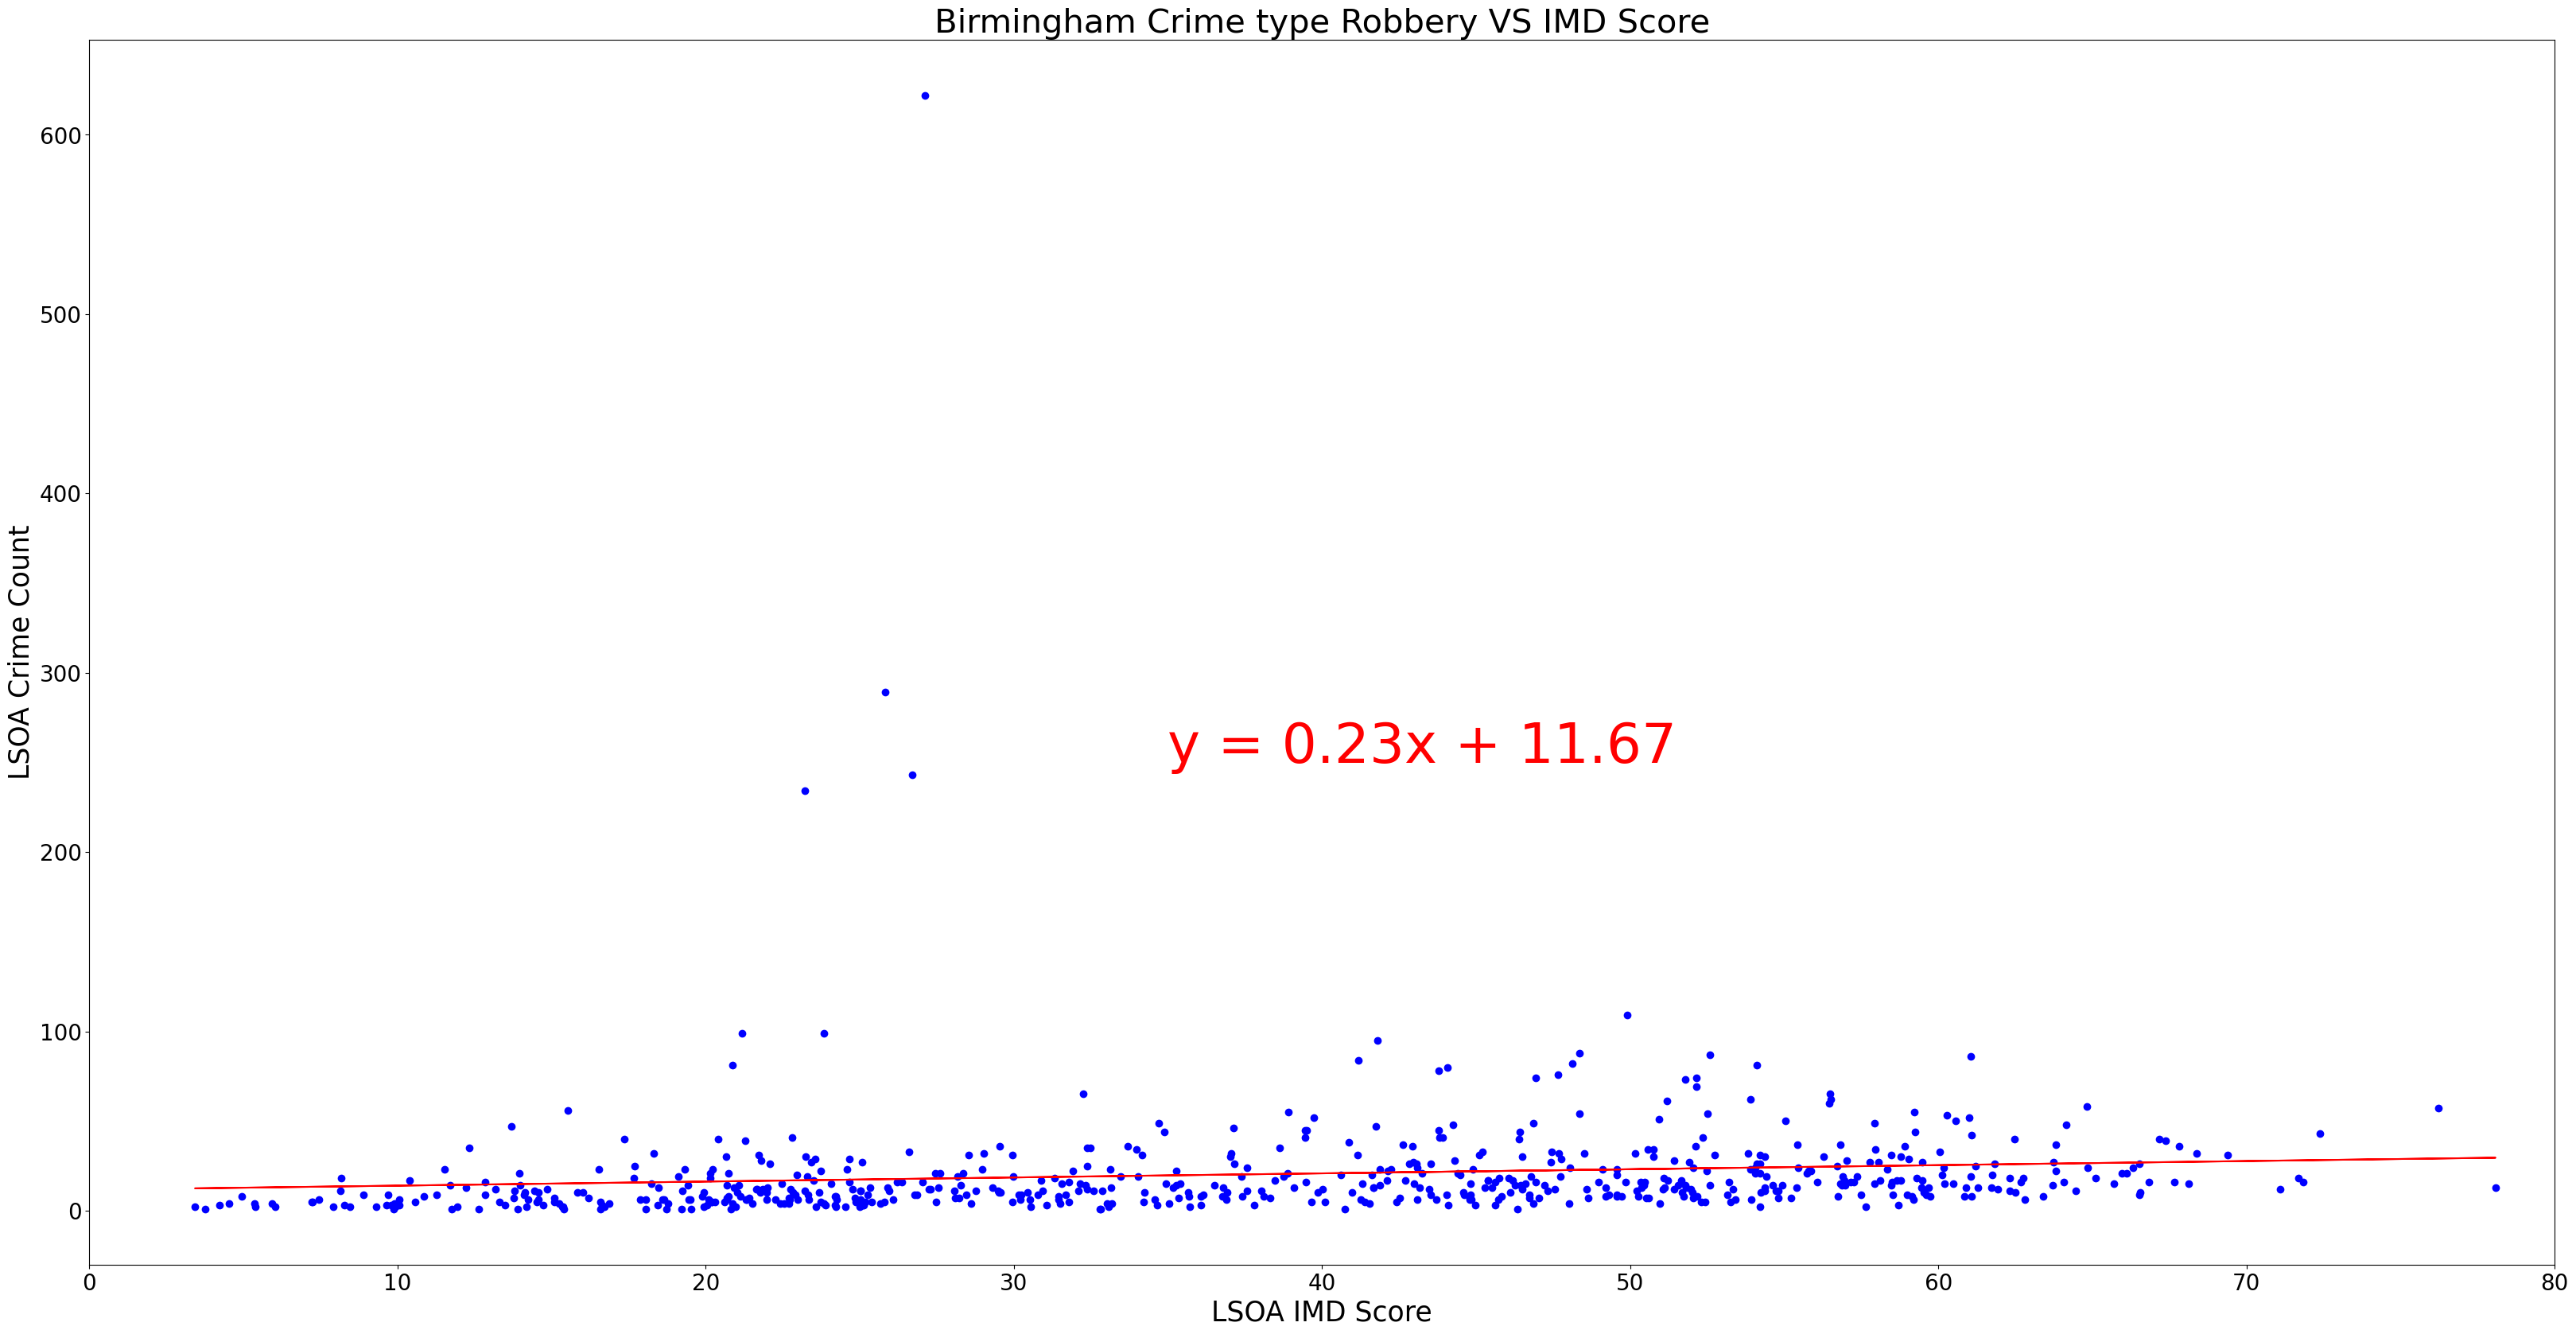

The Pearson Coerrelation Coefficient, r = 0.046815116085546574
The Coefficient of Determination r-saqured = 0.0021916550941032016


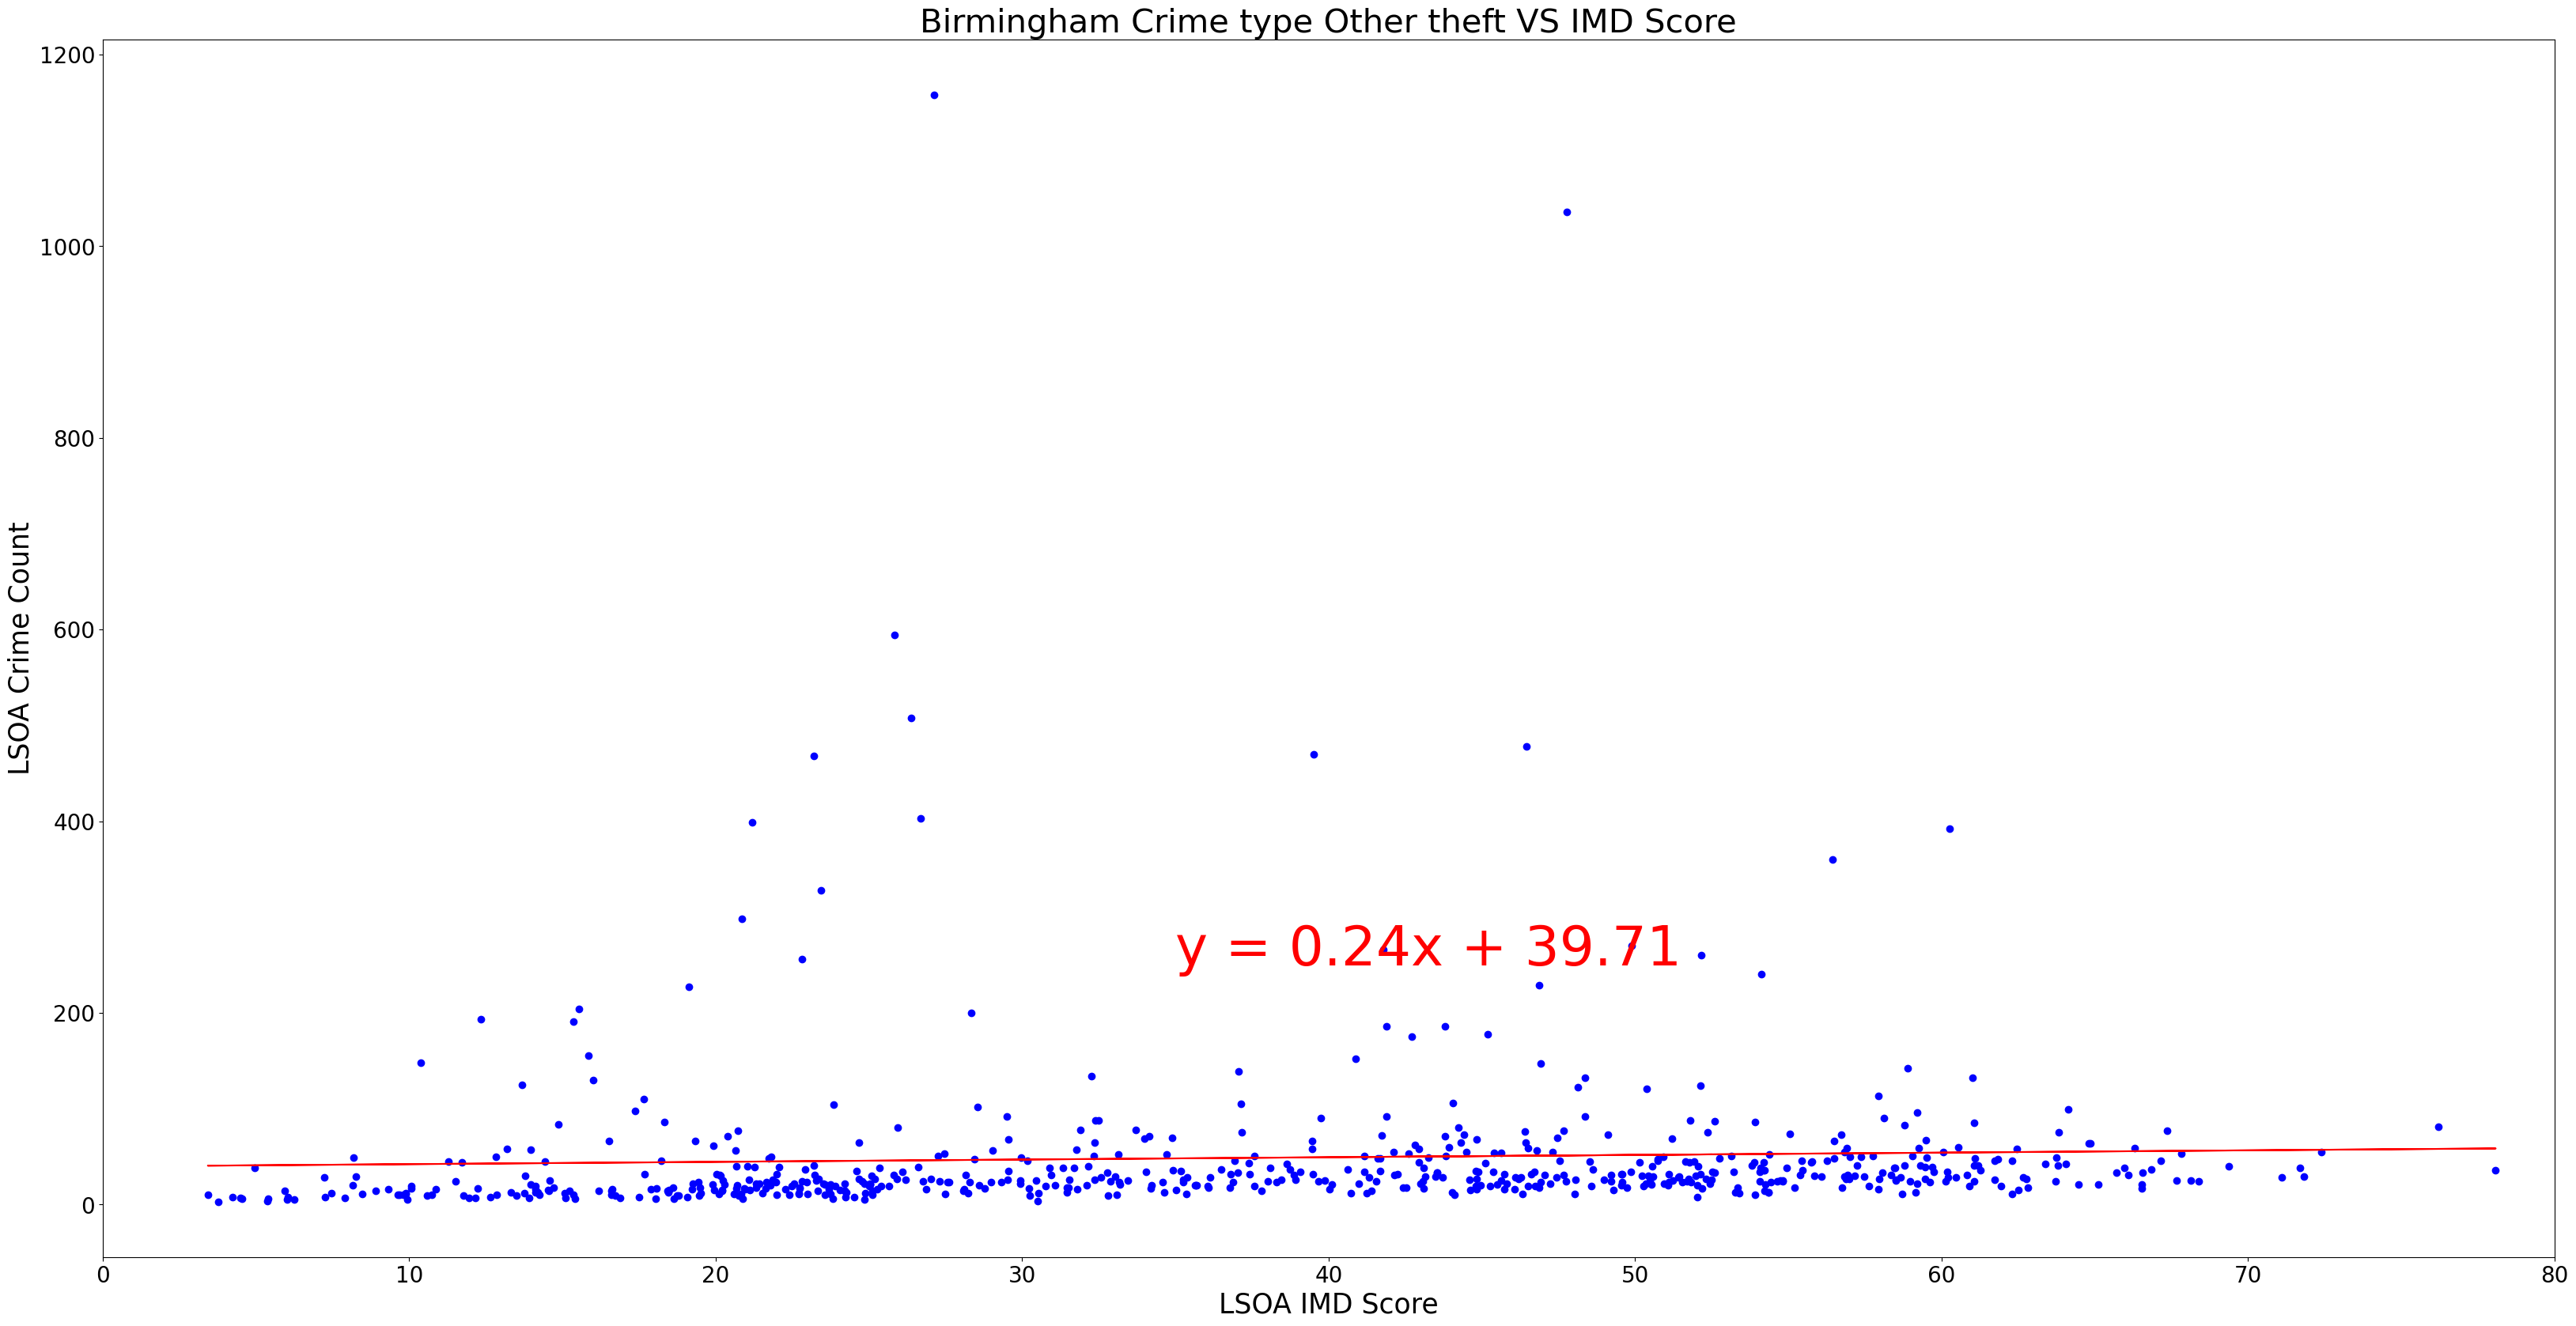

The Pearson Coerrelation Coefficient, r = 0.38658741059025886
The Coefficient of Determination r-saqured = 0.1494498260268814


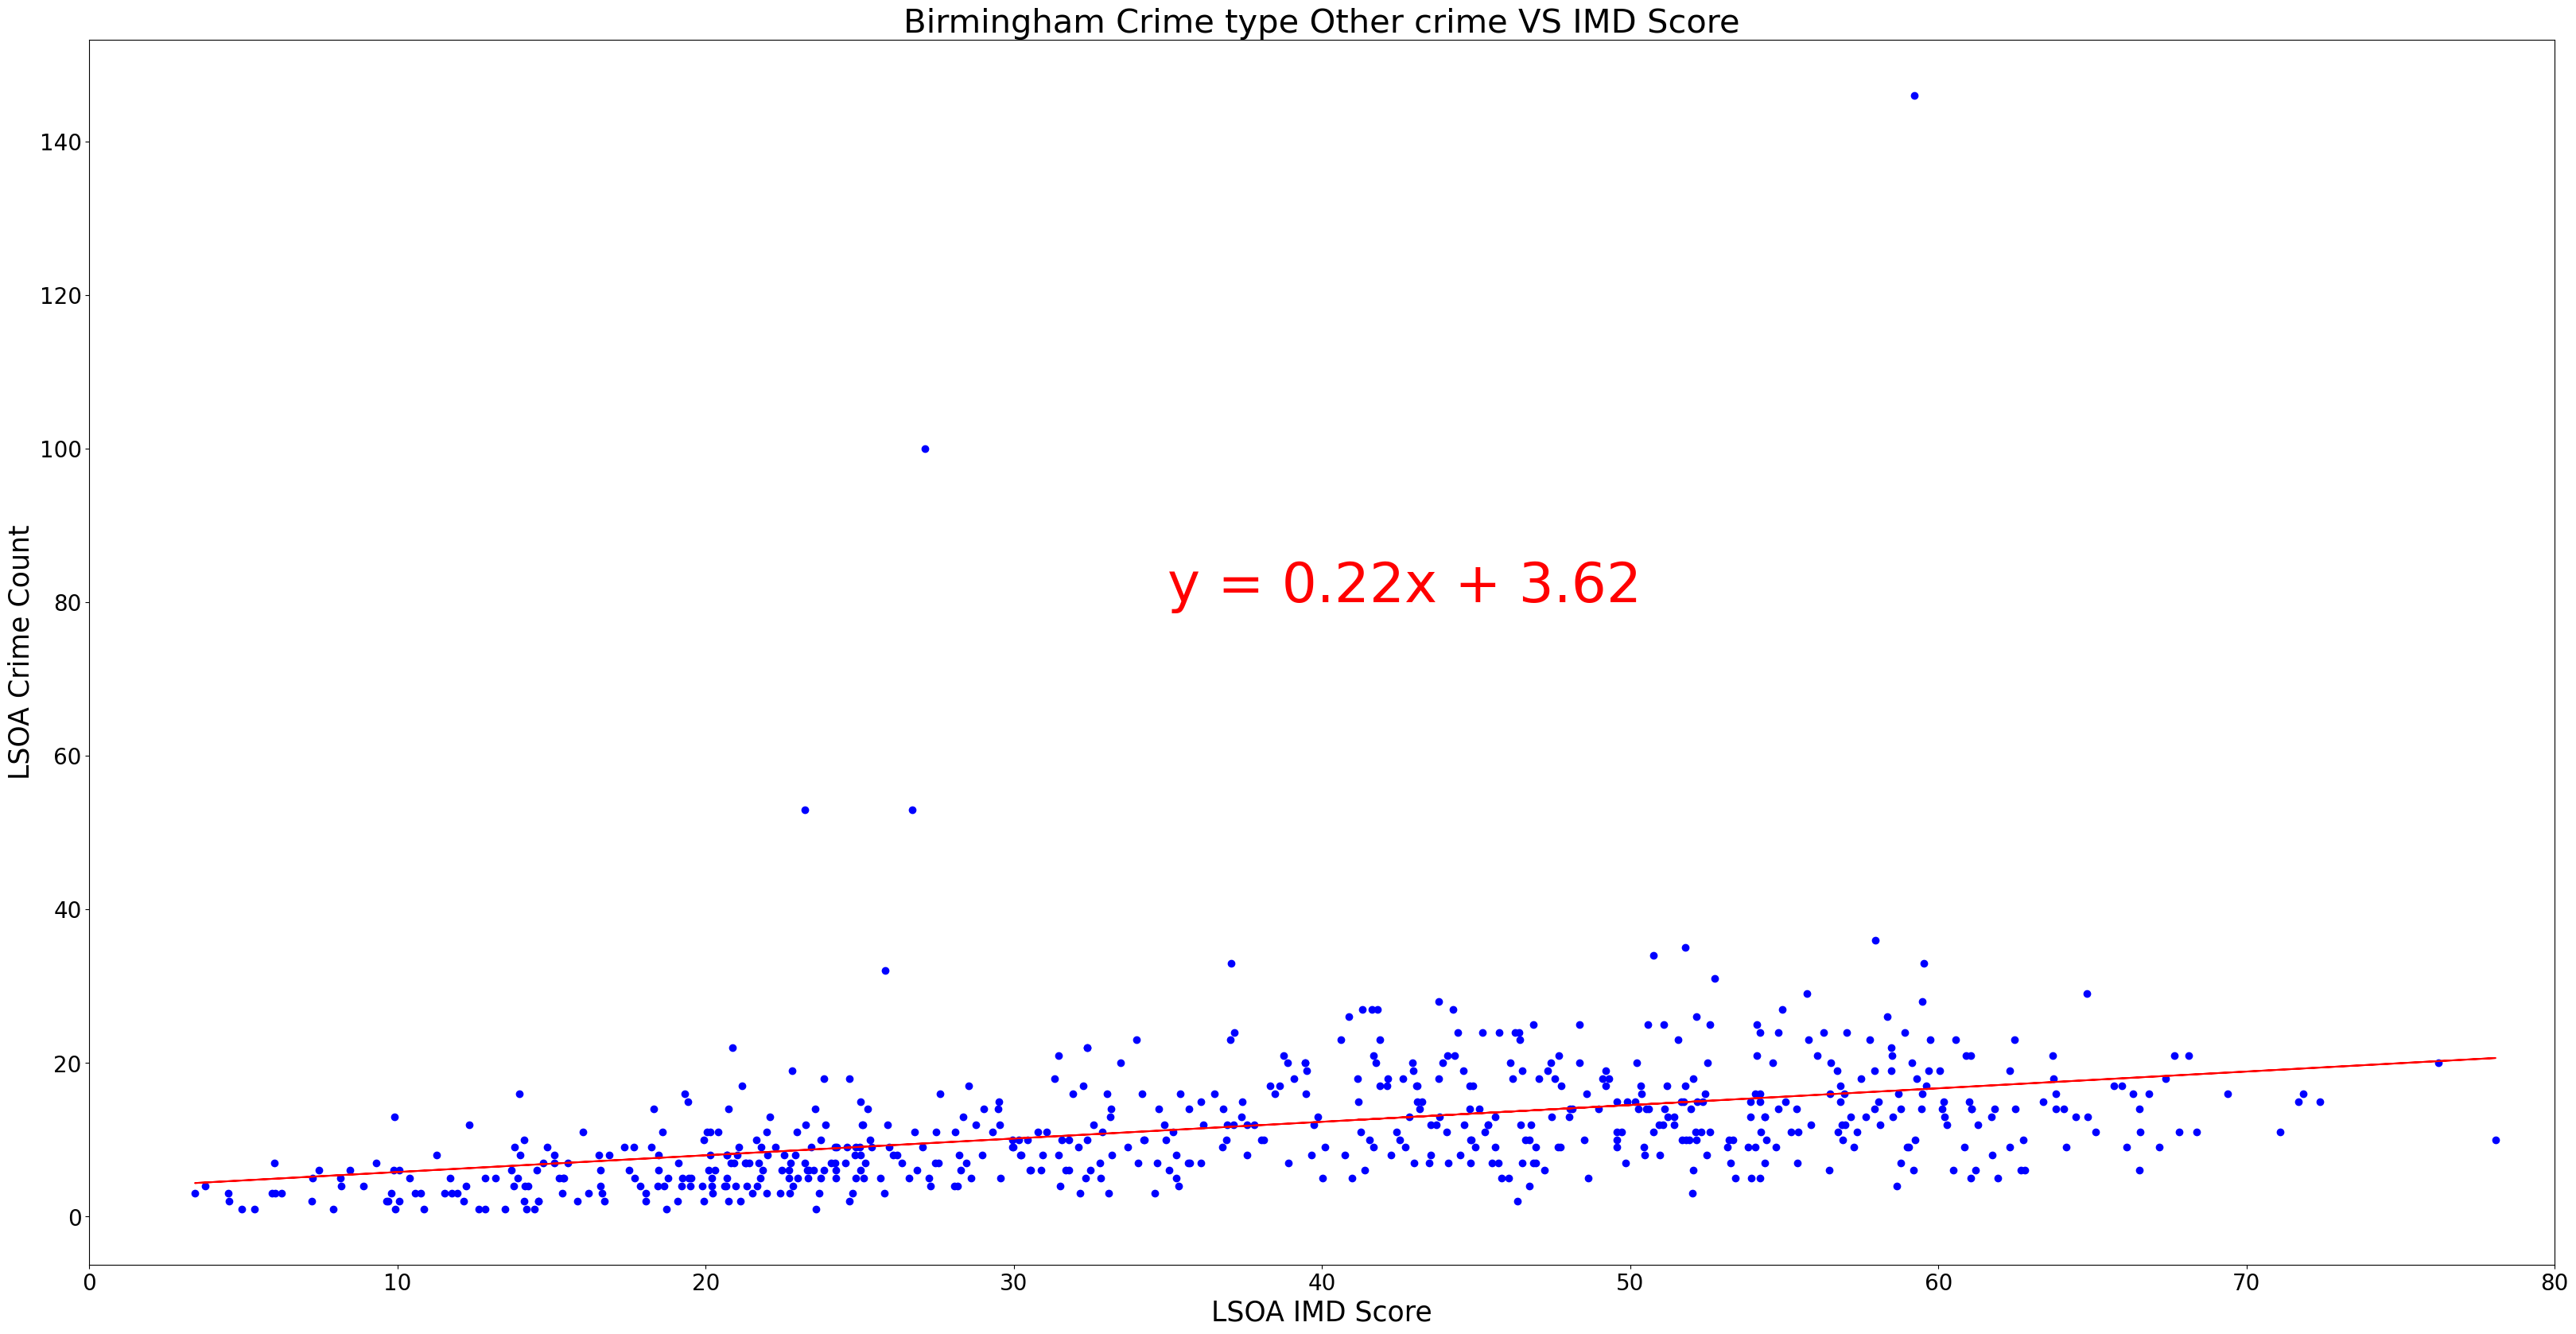

The Pearson Coerrelation Coefficient, r = -0.12221353711966973
The Coefficient of Determination r-saqured = 0.014936148655300891


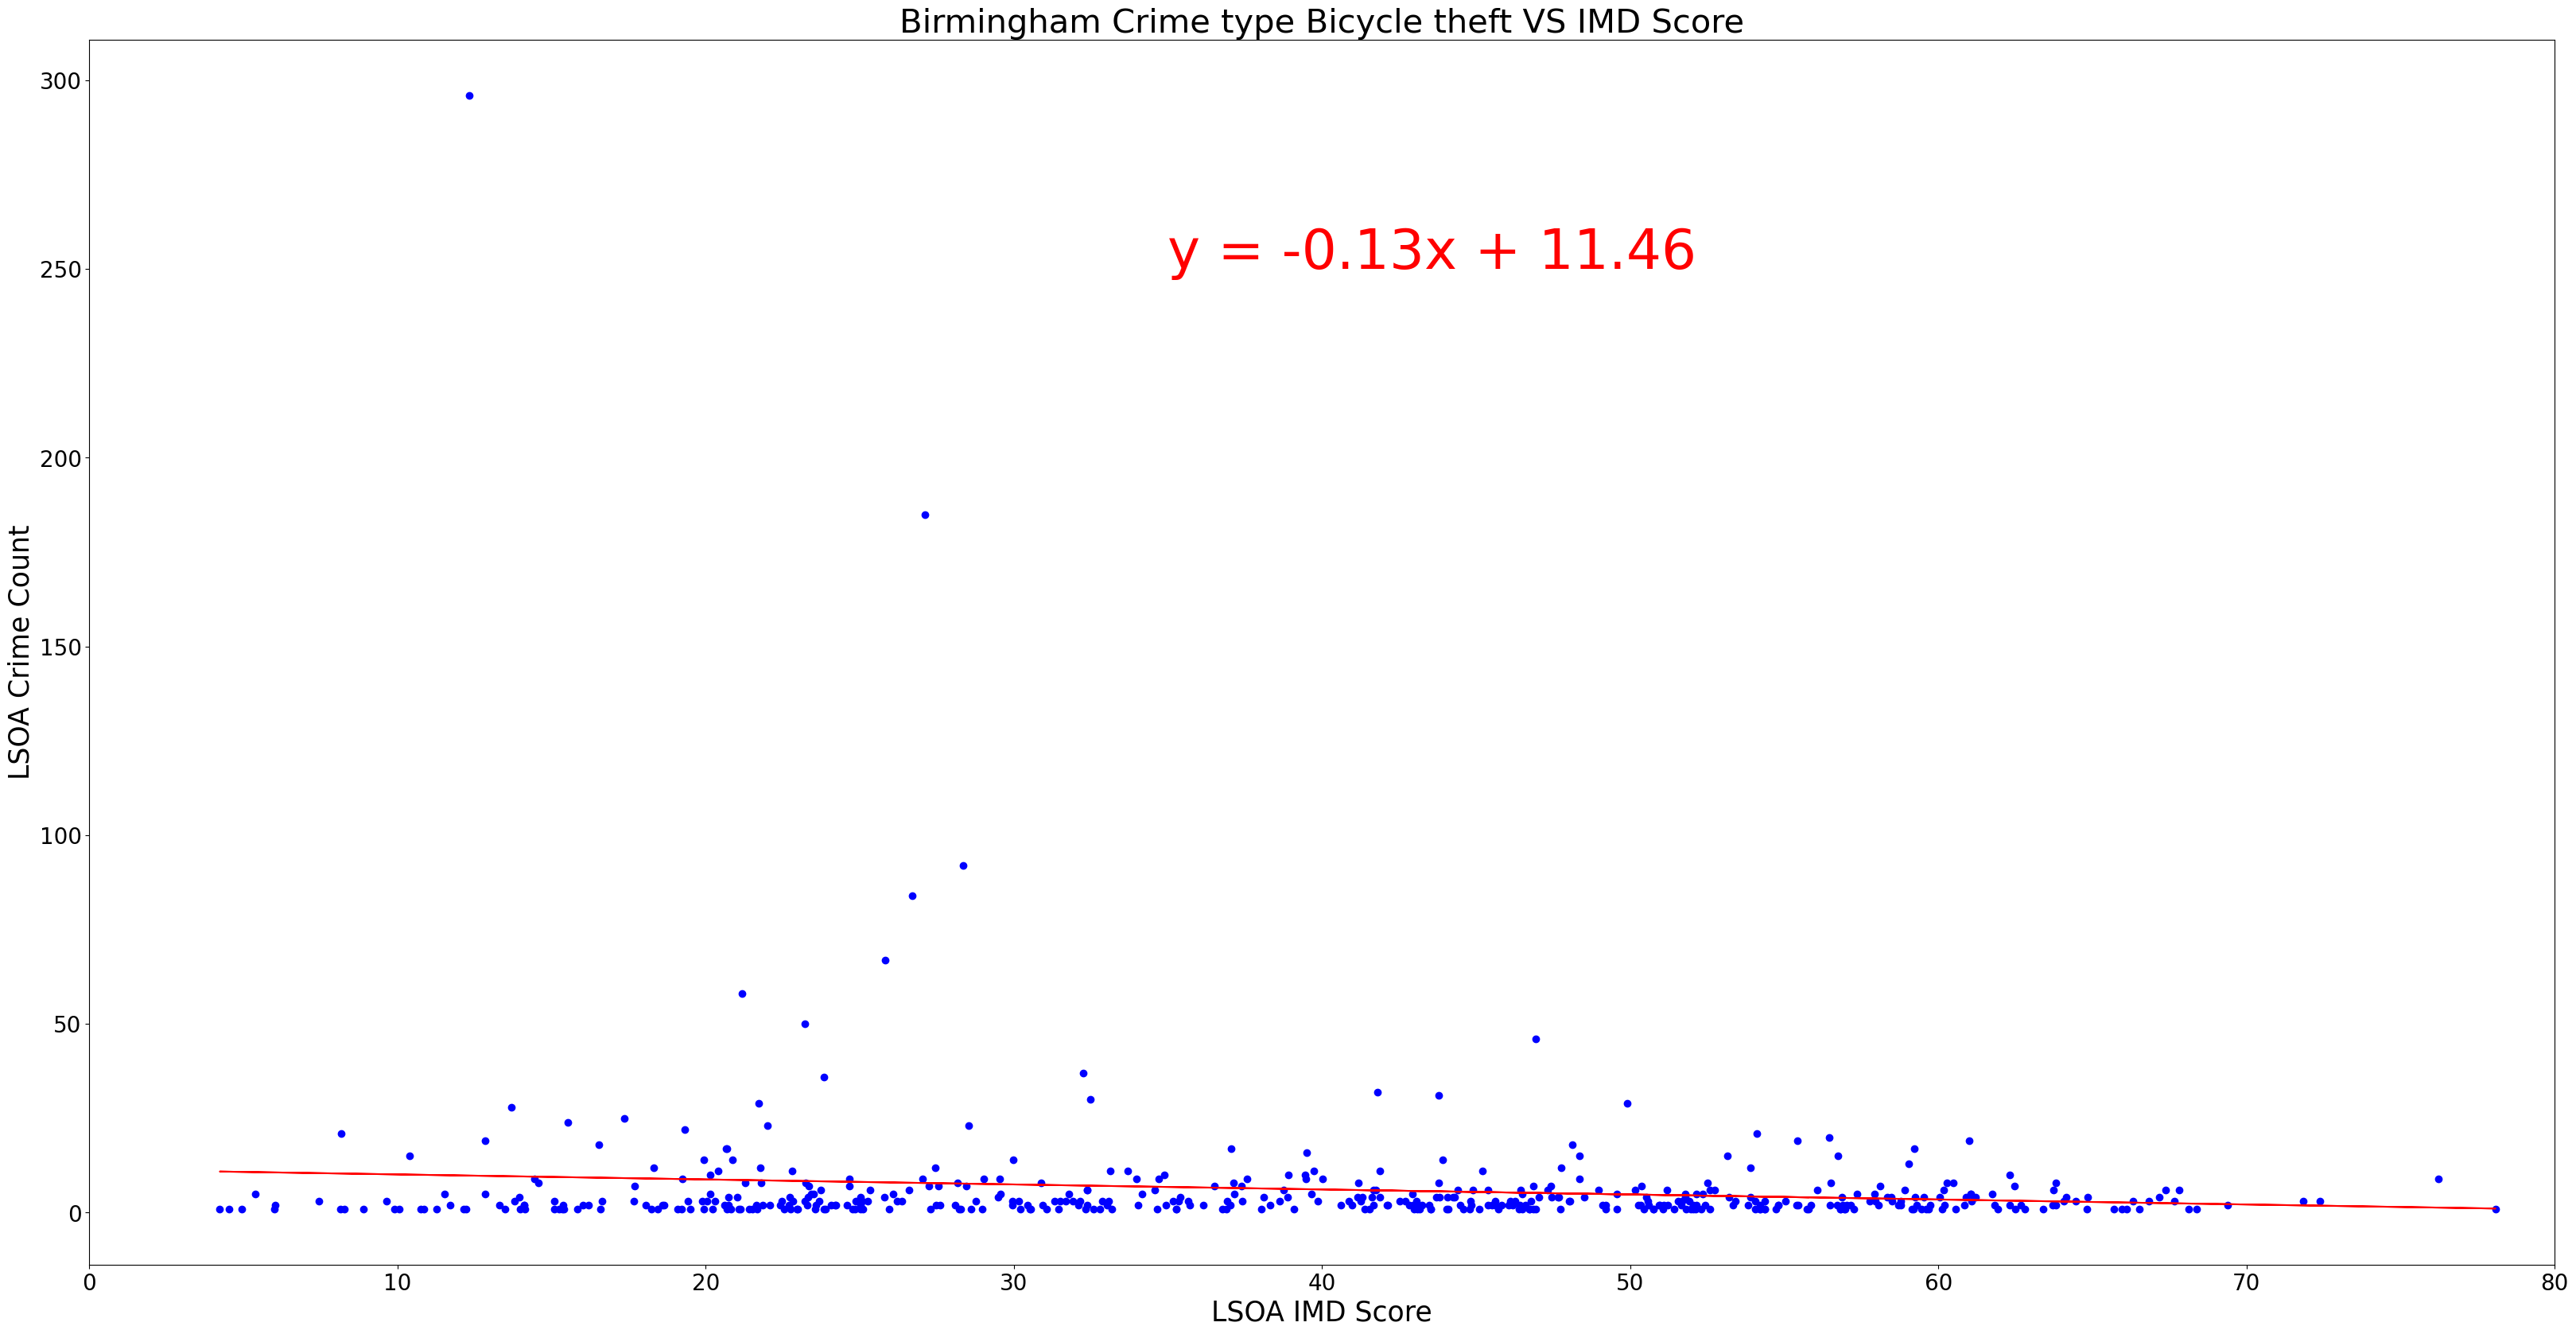

The Pearson Coerrelation Coefficient, r = 0.12533527957502322
The Coefficient of Determination r-saqured = 0.015708932306149233


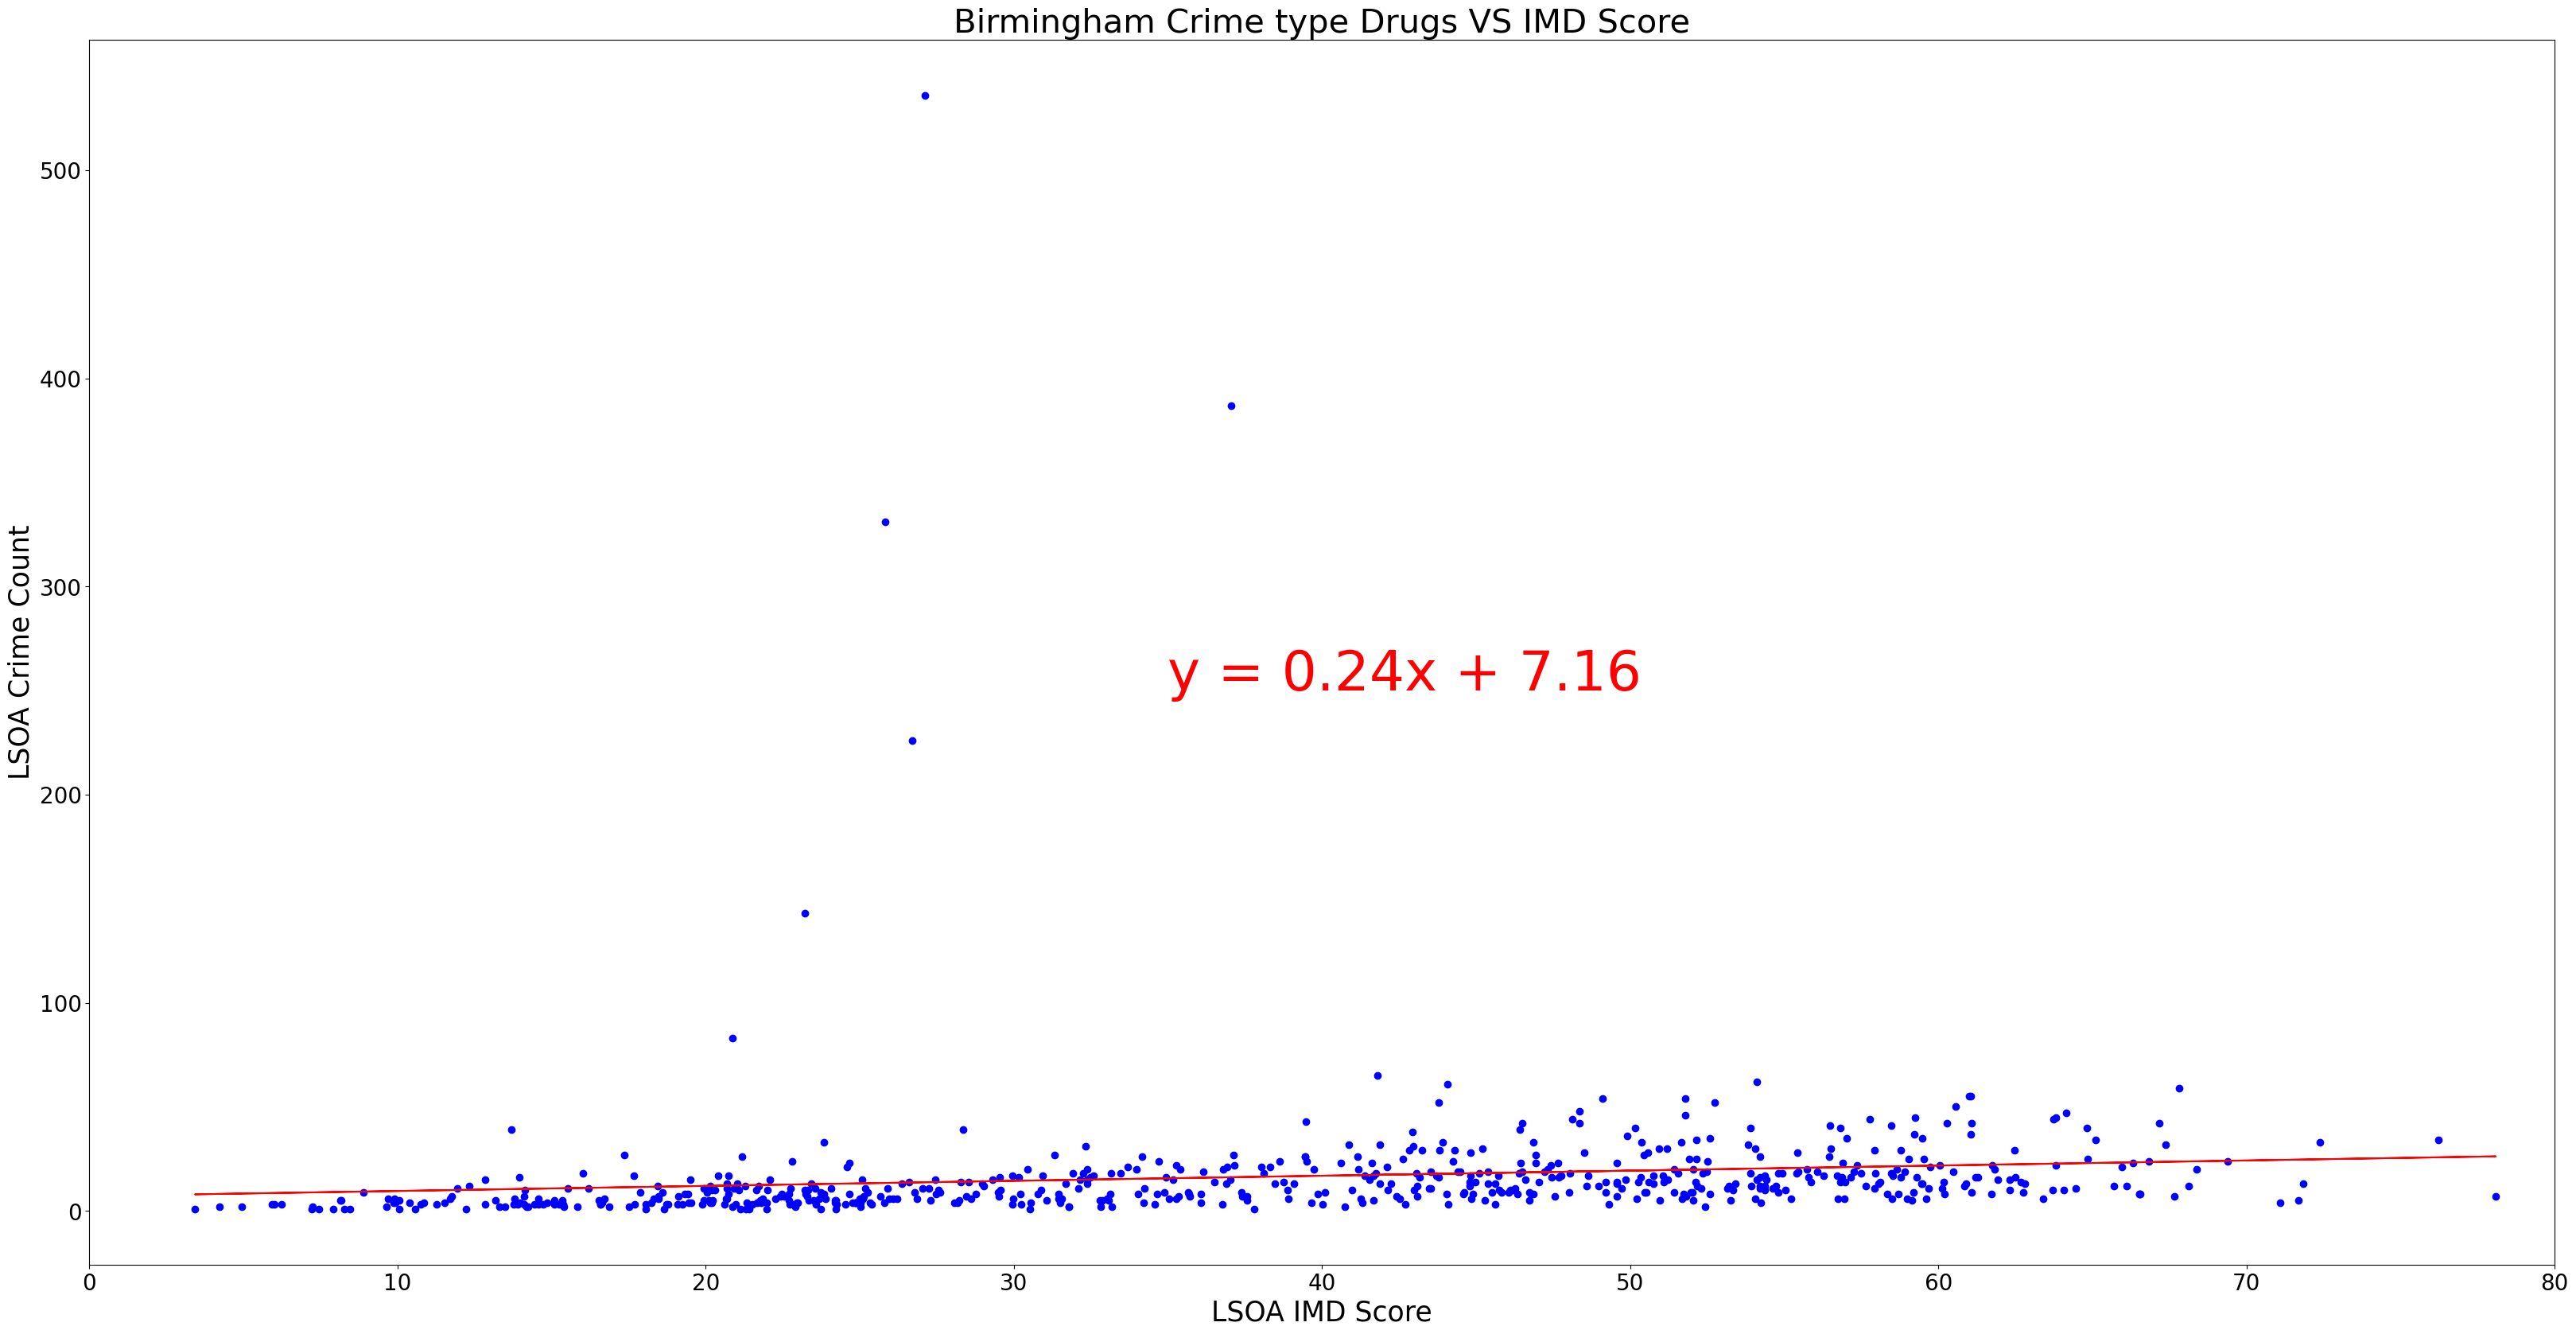

The Pearson Coerrelation Coefficient, r = -0.0438327605769602
The Coefficient of Determination r-saqured = 0.0019213108997971162


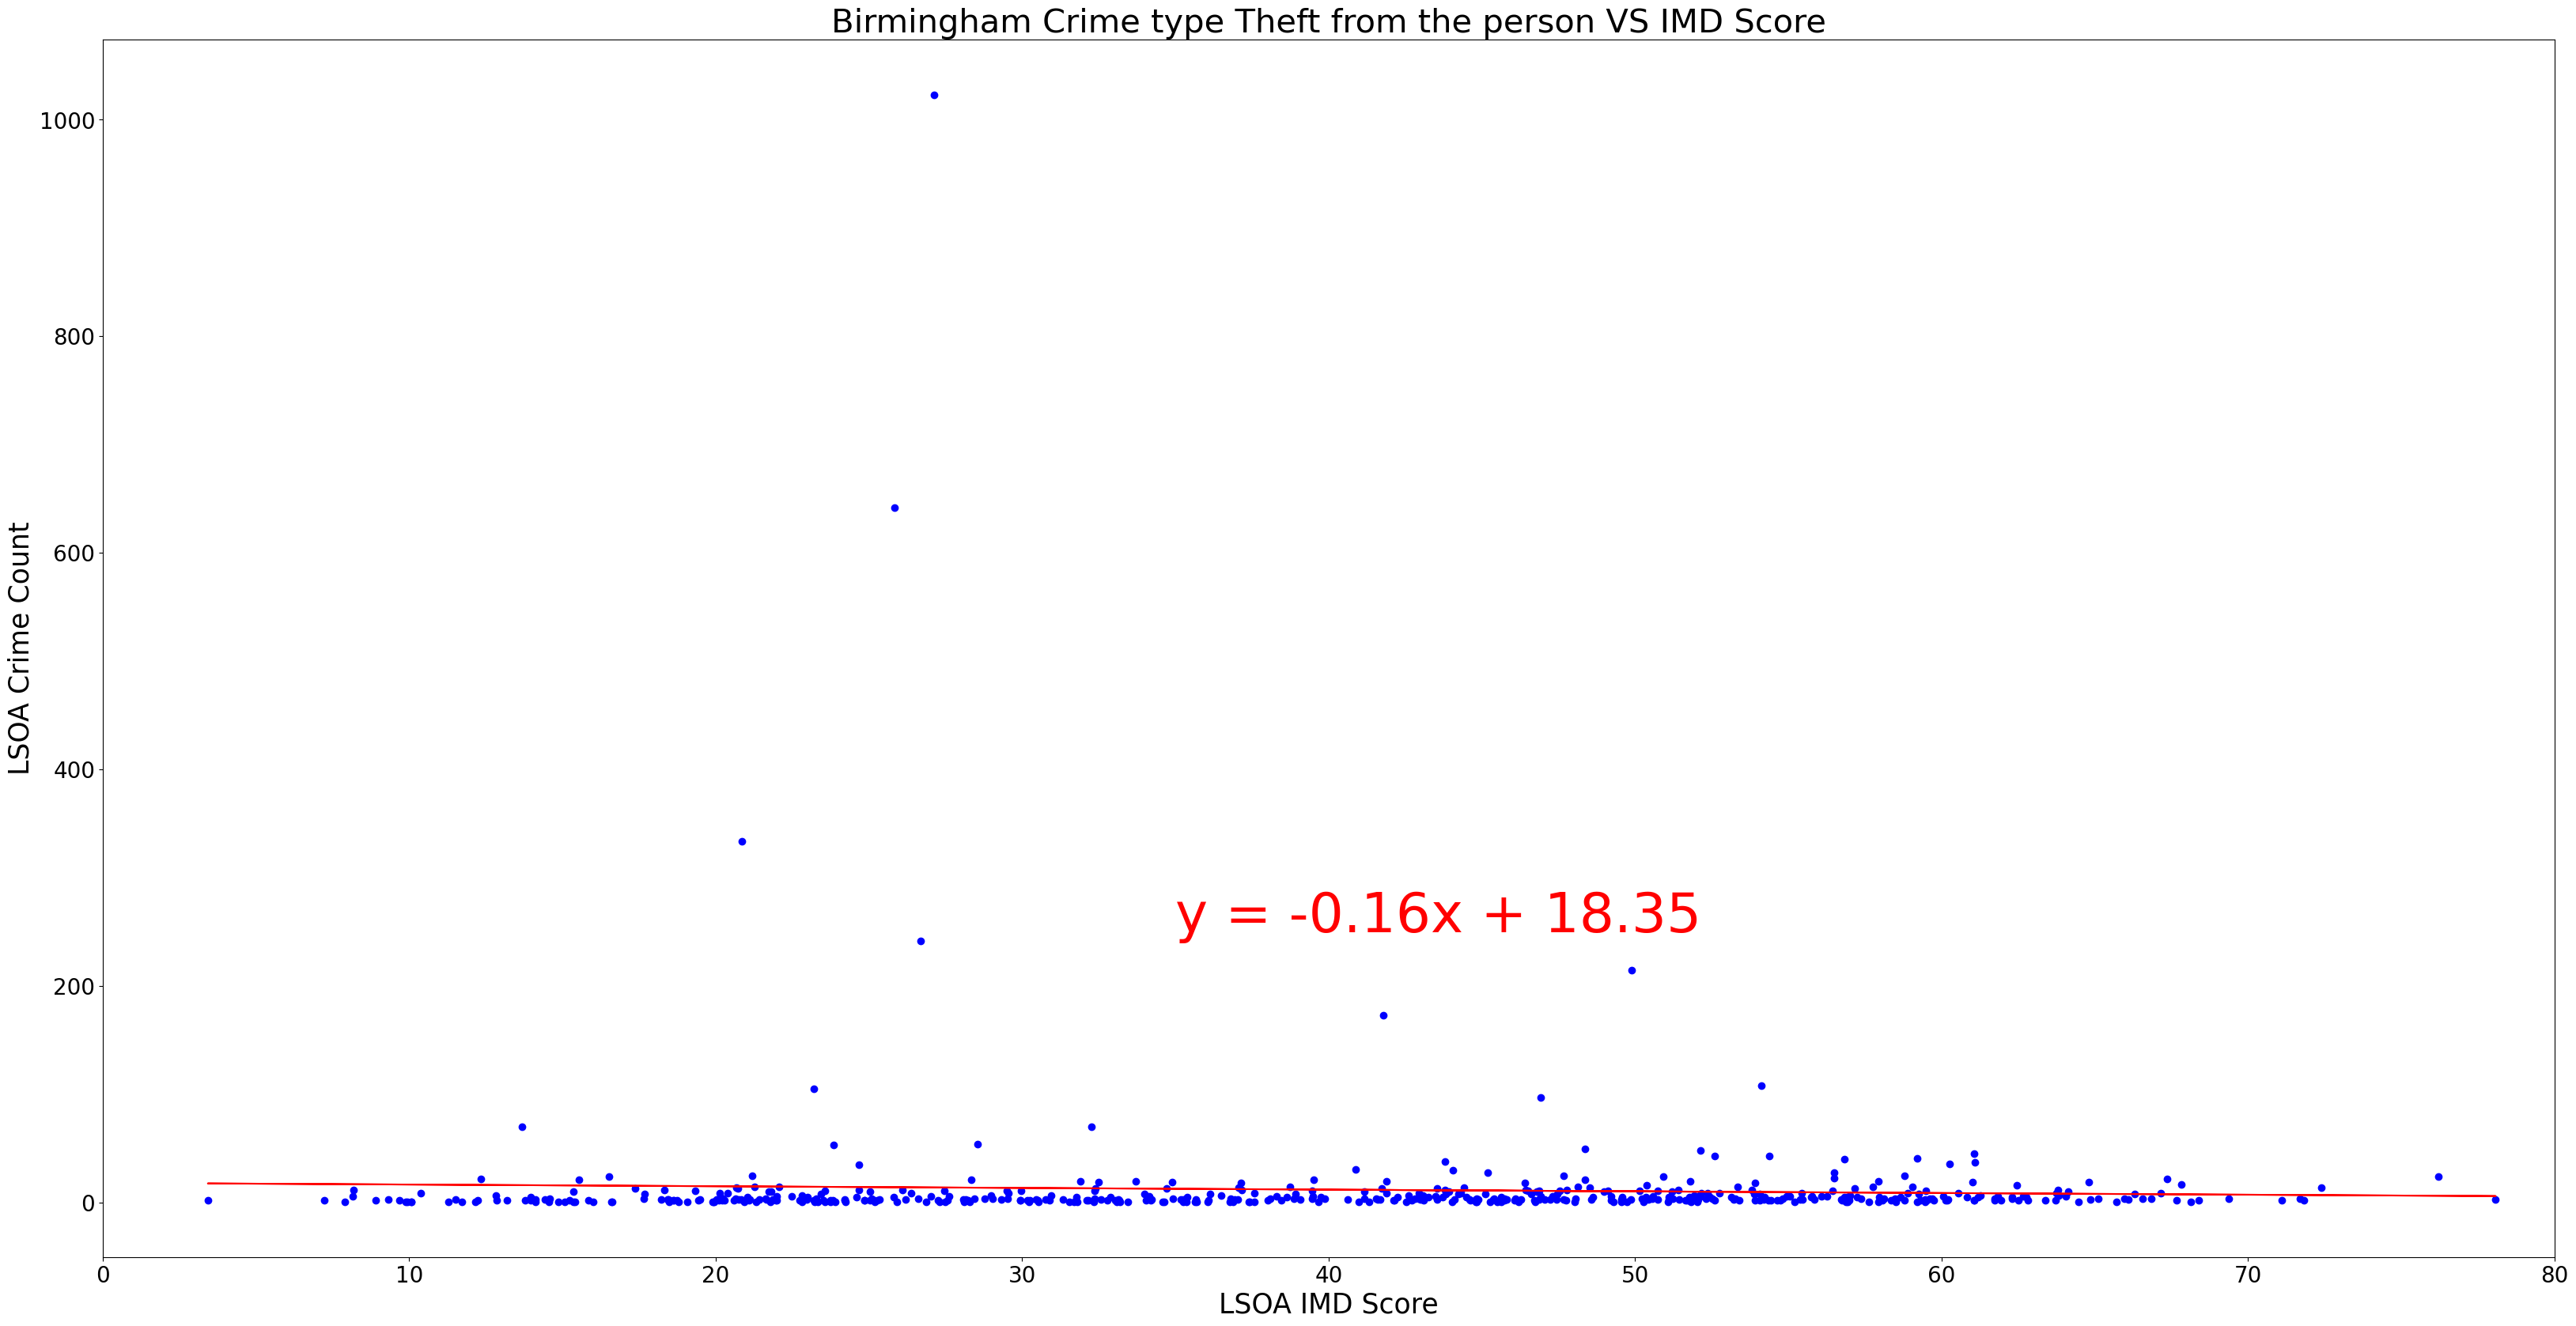

The Pearson Coerrelation Coefficient, r = -0.11551608011569527
The Coefficient of Determination r-saqured = 0.013343964765295728


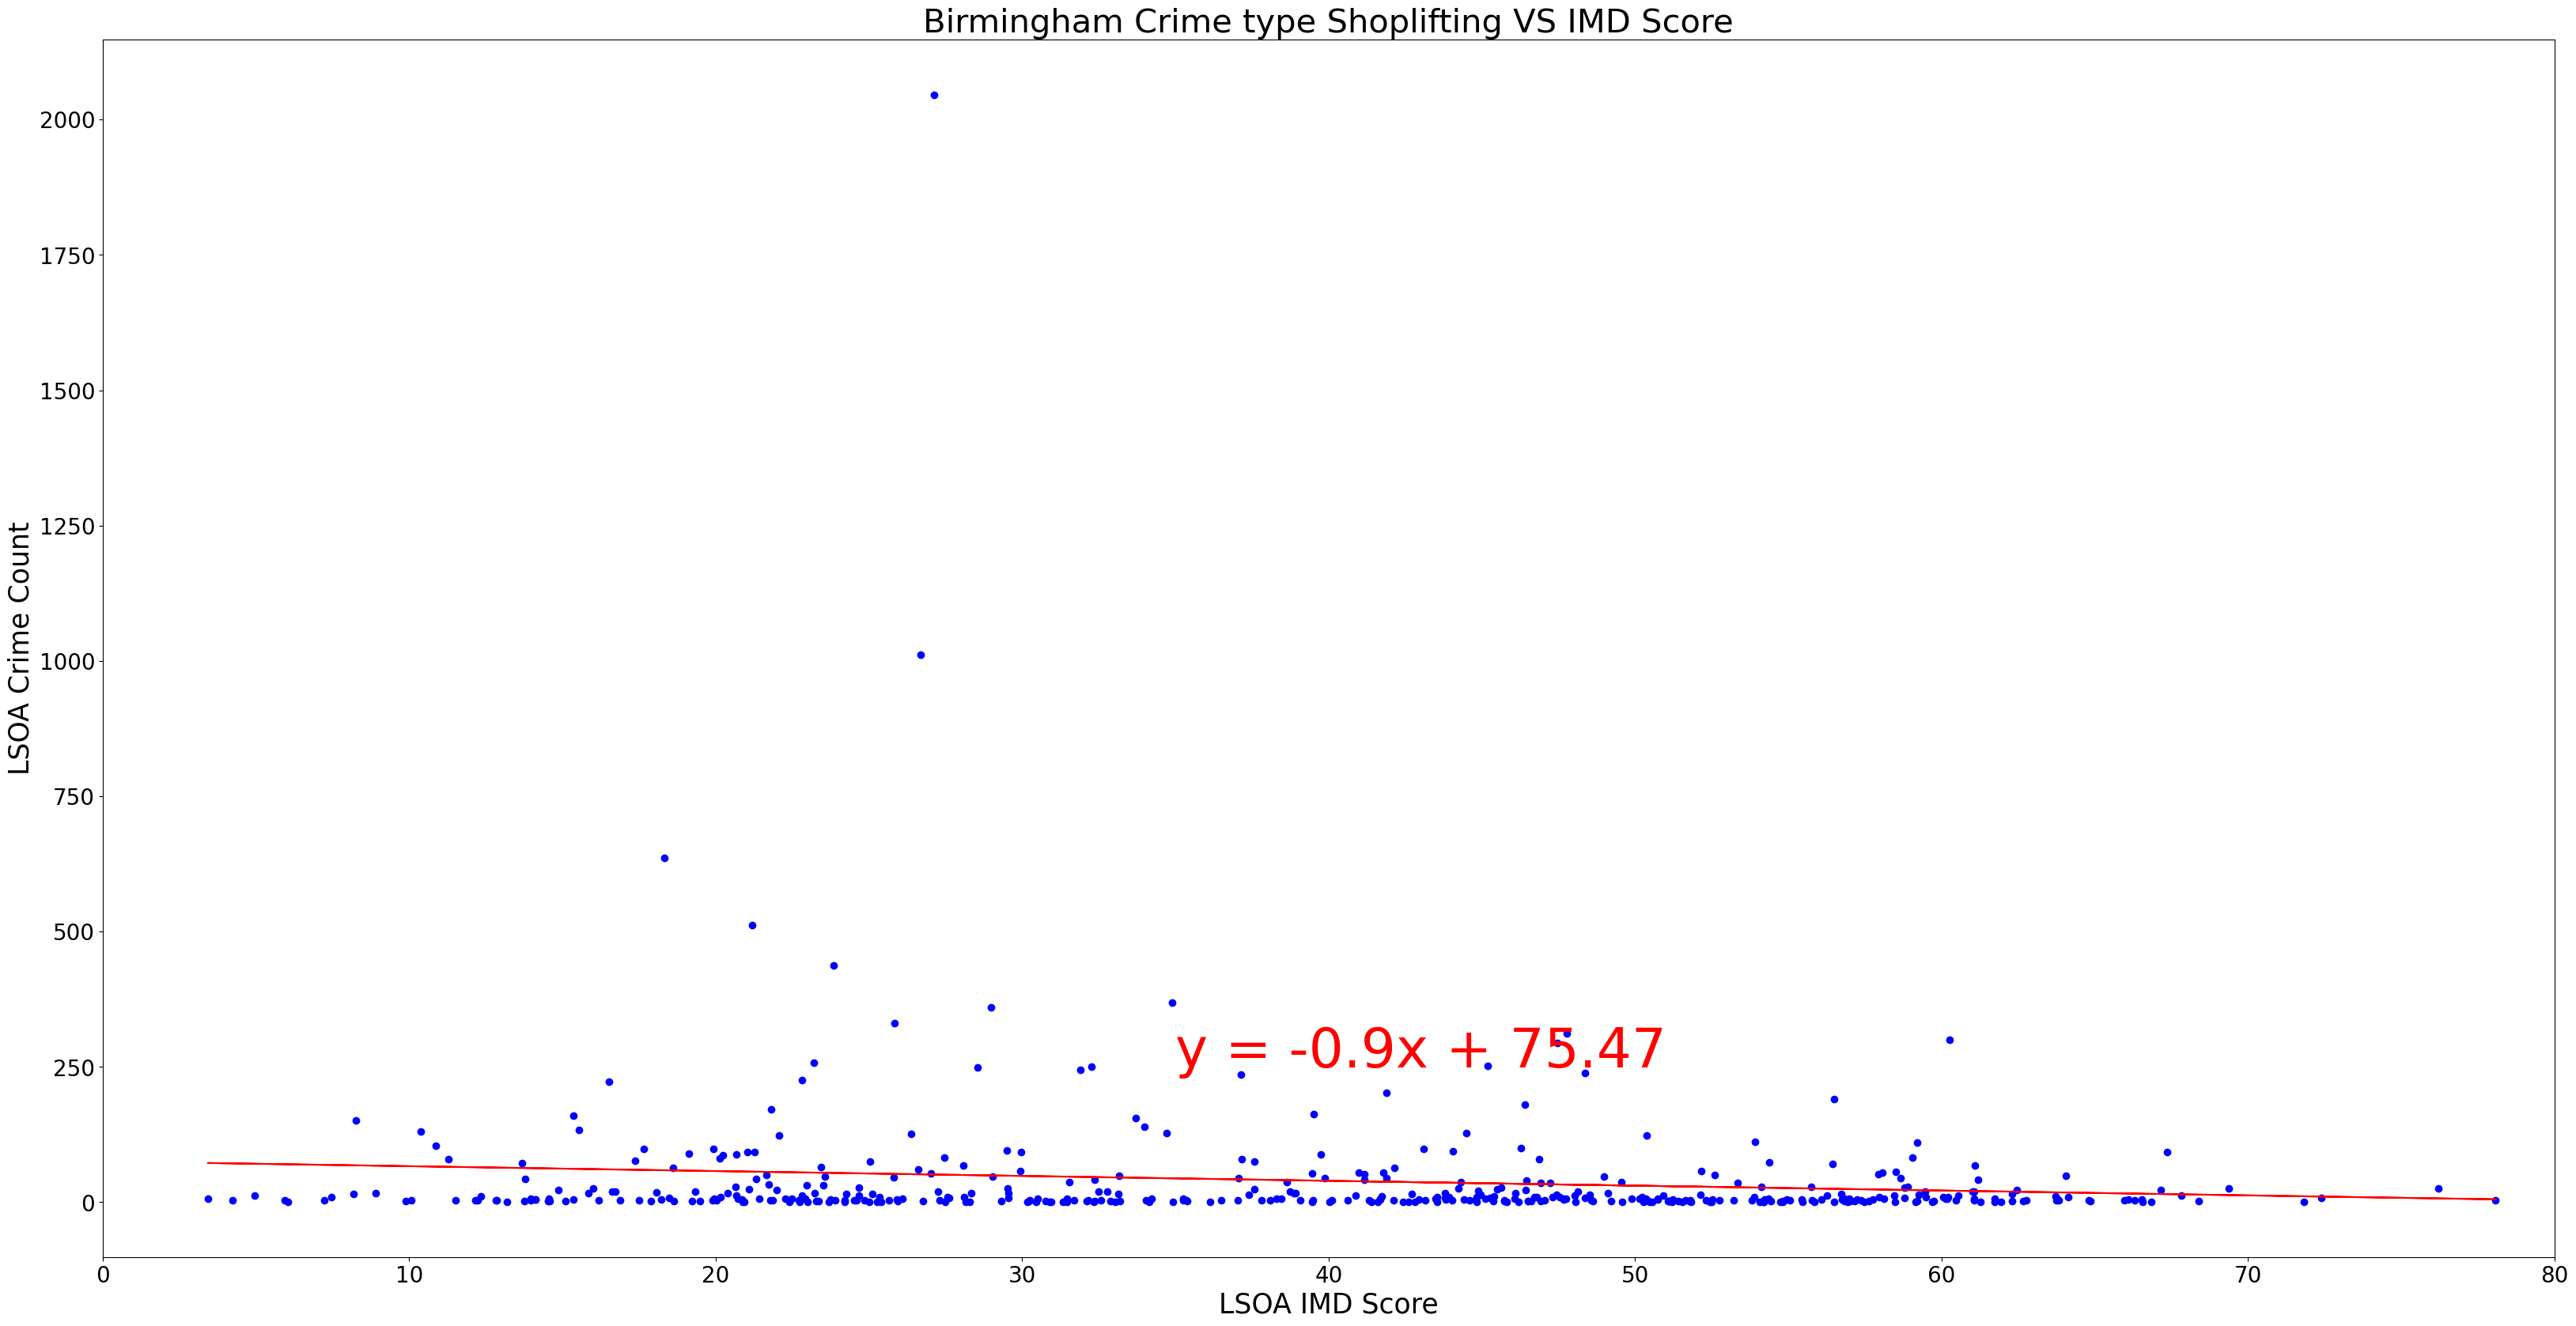

In [21]:
# Groupby LSOA


crime_type = ['Anti-social behaviour','Vehicle crime','Burglary','Criminal damage and arson','Violence and sexual offences',\
               'Possession of weapons','Public order','Robbery','Other theft','Other crime','Bicycle theft','Drugs',\
                'Theft from the person','Shoplifting']

for crime in crime_type:
     
     crime_df = Police_IMD_Merge.loc[Police_IMD_Merge["Crime type"]==crime]
     f = {"LSOA name_x": "first","LSOA code": "count", "Index of Multiple Deprivation (IMD) Score":'first'}
     LSOA_crime_type_df = crime_df.groupby(["LSOA code"]).agg(f)
     
     x_axis = LSOA_crime_type_df["Index of Multiple Deprivation (IMD) Score"]
     y_axis = LSOA_crime_type_df["LSOA code"]
     plt.title(f"Birmingham Crime type {crime} VS IMD Score", fontsize=30)
     plt.scatter(x_axis, y_axis, marker="o", color="blue")
     #plt.plot(x_axis, y_fit)
     plt.rcParams["figure.figsize"] = (40,20)
     plt.xlim(0,80)
     # plt.ylim(0, 400)
     plt.xticks(fontsize=20)
     plt.yticks(fontsize=20)
     plt.xlabel("LSOA IMD Score", fontsize=25)
     plt.ylabel("LSOA Crime Count", fontsize=25)
     if crime == 'Violence and sexual offences':
               plot_linear_regression(x_axis, y_axis, 'LSOA Crime Count',(35,1250))
     elif crime == 'Other crime':
               plot_linear_regression(x_axis, y_axis, 'LSOA Crime Count',(35,80))
     else:
               plot_linear_regression(x_axis, y_axis, 'LSOA Crime Count',(35,250))              
     plt.savefig(f"output/correlation_{crime}_vs_IMD.png")
     plt.show()




Maximum r value was for graph:
Minimum r value was for graph:

### Research Question 2
- Where are the top 10 crime count locations and what are their IMD Scores?
- Where are the least 10 crime count locations and what are their IMD scores?


In [90]:
LSOA_crime_count_df = LSOA_crime_count_df.rename(columns={"LSOA code":"Crime count"})
LSOA_crime_count_df

LSOA_crime_count_df = LSOA_crime_count_df.sort_values("Crime count",ascending=False)
LSOA_crime_count_df.head(20)

LSOA_max_counts = LSOA_crime_count_df.iloc[0:20,:]
LSOA_max_counts

LSOA name_x  Crime count  \
LSOA code                                 
E01033620  Birmingham 138A        14301   
E01033615  Birmingham 135C         7337   
E01033561  Birmingham 050E         5375   
E01033617  Birmingham 050F         5023   
E01033557  Birmingham 134B         3248   
E01009239  Birmingham 033F         3120   
E01009284  Birmingham 096A         2819   
E01009200  Birmingham 139A         2794   
E01009146  Birmingham 136B         2777   
E01009007  Birmingham 023D         2605   
E01009378  Birmingham 135A         2519   
E01033639  Birmingham 136D         2464   
E01009449  Birmingham 009A         2421   
E01009101  Birmingham 029D         2266   
E01009345  Birmingham 053D         2256   
E01033562  Birmingham 087F         2252   
E01009332  Birmingham 139E         2129   
E01009178  Birmingham 104C         1999   
E01008914  Birmingham 050C         1954   
E01009412  Birmingham 030C         1930   

           Index of Multiple Deprivation (IMD) Score  Longitude   Latitude  
LSOA code                                                                   
E01033620                                     27.122  -1.894661  52.481417  
E01033615                                     25.827  -1.892331  52.476614  
E01033561                                     26.700  -1.885831  52.479395  
E01033617                                     23.217  -1.892825  52.485614  
E01033557                                     20.868  -1.906265  52.473857  
E01009239                                     37.061  -1.895665  52.517503  
E01009284                                     21.191  -1.934776  52.437781  
E01009200                                     54.122  -1.886220  52.477058  
E01009146                                     41.792  -1.912109  52.473996  
E01009007                                     48.366  -1.836713  52.526903  
E01009378                                     43.802  -1.889804  52.468674  
E01033639                                     49.896  -1.924963  52.473313  
E01009449                                     23.843  -1.828553  52.563391  
E01009101                                     47.770  -1.787723  52.513628  
E01009345                                     59.211  -1.936677  52.487101  
E01033562                                     28.351  -1.946663  52.448512  
E01009332                                     60.271  -1.860380  52.472751  
E01009178                                     32.264  -1.892005  52.435395  
E01008914                                     48.135  -1.902579  52.489757  
E01009412                                     51.801  -1.858044  52.516952

In [92]:
map_plot = LSOA_max_counts.hvplot.points(
    "Longitude",
    "Latitude",
    geo=True,
    tiles = "EsriStreet",
    frame_width = 800,
    frame_height = 800,
    color = "LSOA name_x",
    size = "Crime count",
    scale = 0.3,
    hover_cols = ["Crime count","Index of Multiple Deprivation (IMD) Score"]
)

map_plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (LSOA name_x,Crime count,Index of Multiple Deprivation (IMD) Score)

In [24]:
LSOA_crime_count_df = LSOA_crime_count_df.sort_values("Crime count")
LSOA_crime_count_df.head(20)

LSOA_min_counts = LSOA_crime_count_df.iloc[0:20,:]
LSOA_min_counts



LSOA name_x  Crime count  \
LSOA code                                 
E01009428  Birmingham 004D          101   
E01009421  Birmingham 004A          119   
E01009459  Birmingham 015B          119   
E01009470  Birmingham 010C          122   
E01009426  Birmingham 003C          133   
E01009417  Birmingham 001A          134   
E01033618  Birmingham 137C          134   
E01009461  Birmingham 015C          135   
E01009436  Birmingham 012B          138   
E01009472  Birmingham 010D          138   
E01009457  Birmingham 015A          145   
E01009008  Birmingham 028A          148   
E01009429  Birmingham 003D          151   
E01009466  Birmingham 009D          151   
E01009453  Birmingham 009C          152   
E01009435  Birmingham 006B          153   
E01009438  Birmingham 012C          155   
E01009420  Birmingham 003B          157   
E01009415  Birmingham 002A          157   
E01009440  Birmingham 012D          162   

           Index of Multiple Deprivation (IMD) Score  Longitude   Latitude  
LSOA code                                                                   
E01009428                                      3.767  -1.815907  52.574843  
E01009421                                      4.507  -1.855768  52.595718  
E01009459                                     10.576  -1.824790  52.545280  
E01009470                                      5.369  -1.842706  52.553387  
E01009426                                      4.237  -1.819072  52.587487  
E01009417                                     12.652  -1.850056  52.591108  
E01033618                                     12.858  -1.916034  52.477514  
E01009461                                      6.013  -1.821445  52.533741  
E01009436                                      4.538  -1.796214  52.544784  
E01009472                                     10.745  -1.853232  52.545876  
E01009457                                      6.246  -1.819320  52.548660  
E01009008                                     20.881  -1.826636  52.522061  
E01009429                                      3.431  -1.820300  52.579434  
E01009466                                      9.810  -1.826794  52.549256  
E01009453                                     12.149  -1.822042  52.557502  
E01009435                                      7.257  -1.801568  52.554431  
E01009438                                      7.908  -1.785415  52.539848  
E01009420                                      8.468  -1.815040  52.591589  
E01009415                                      6.040  -1.833595  52.595419  
E01009440                                      9.641  -1.794514  52.533068

In [25]:
map_plot = LSOA_min_counts.hvplot.points(
    "Longitude",
    "Latitude",
    geo=True,
    tiles = "EsriStreet",
    frame_width = 800,
    frame_height = 800,
    color = "LSOA name_x",
    size = "Crime count",
    # scale = 0.3,
    hover_cols = ["Crime count","Index of Multiple Deprivation (IMD) Score"]
)

map_plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (LSOA name_x,Crime count,Index of Multiple Deprivation (IMD) Score)

## Research Question 3:
- Crime rates exhibit seasonal with lower street crime rates in Winter relative to others
- Winter months: Oct-Mar vs Summer: Apr-Sept


In [26]:

winter_months = [
    "2020-10","2020-11","2020-12","2021-01","2021-02","2021-03",\
                 "2021-10","2021-11","2021-12","2022-01","2022-02","2022-03",\
                    "2022-10","2022-11","2022-12","2023-01","2023-02","2023-03"
                    ]

summer_months = [
    "2020-08","2020-09",\
                 "2021-04","2021-05","2021-06","2021-07","2021-08","2021-09",\
                    "2022-04","2022-05","2022-06","2022-07","2022-08","2022-09",\
                        "2023-04","2023-05","2023-06","2023-07",
                        ]



winter_4months = [
    "2020-11","2020-12","2021-01","2021-02",\
                 "2021-11","2021-12","2022-01","2022-02",\
                    "2022-11","2022-12","2023-01","2023-02"
                    ]

summer_4months = [
    "2020-08",\
                 "2021-05","2021-06","2021-07","2021-08",\
                    "2022-05","2022-06","2022-07","2022-08",\
                        "2023-05","2023-06","2023-07",
                        ]


# for month in winter_months:
for month in winter_4months:


    df_month = Police_IMD_Merge.loc[Police_IMD_Merge["Month"] == month]

    if month == winter_4months[0]:
    # if month == winter_months[0]:

        Police_IMD_Winter = df_month
    else:
        Police_IMD_Winter = pd.concat([Police_IMD_Winter,df_month])

print(f'The {len(Police_IMD_Winter["Month"].unique())} Winter Months in the dataframe Police_IMD_Winter: {Police_IMD_Winter["Month"].unique()}\n')



# for month in summer_months:
for month in summer_4months:


    df_month = Police_IMD_Merge.loc[Police_IMD_Merge["Month"] == month]

    if month == summer_4months[0]:
    # if month == summer_months[0]:

        Police_IMD_Summer = df_month
    else:
        Police_IMD_Summer = pd.concat([Police_IMD_Summer,df_month])

print(f'The {len(Police_IMD_Summer["Month"].unique())} Summmer Months in the dataframe Police_IMD_Summer: {Police_IMD_Summer["Month"].unique()}')

Police_IMD_Winter

The 12 Winter Months in the dataframe Police_IMD_Winter: ['2020-11' '2020-12' '2021-01' '2021-02' '2021-11' '2021-12' '2022-01'
 '2022-02' '2022-11' '2022-12' '2023-01' '2023-02']

The 12 Summmer Months in the dataframe Police_IMD_Summer: ['2020-08' '2021-05' '2021-06' '2021-07' '2021-08' '2022-05' '2022-06'
 '2022-07' '2022-08' '2023-05' '2023-06' '2023-07']


LSOA code      LSOA name_x Local Authority District code (2019)  \
159     E01009418  Birmingham 001B                            E08000025   
160     E01009418  Birmingham 001B                            E08000025   
161     E01009418  Birmingham 001B                            E08000025   
162     E01009418  Birmingham 001B                            E08000025   
163     E01009418  Birmingham 001B                            E08000025   
...           ...              ...                                  ...   
497993  E01033641  Birmingham 140G                            E08000025   
497994  E01033641  Birmingham 140G                            E08000025   
497995  E01033641  Birmingham 140G                            E08000025   
497996  E01033641  Birmingham 140G                            E08000025   
497997  E01033641  Birmingham 140G                            E08000025   

       Local Authority District name (2019)  \
159                              Birmingham   
160                              Birmingham   
161                              Birmingham   
162                              Birmingham   
163                              Birmingham   
...                                     ...   
497993                           Birmingham   
497994                           Birmingham   
497995                           Birmingham   
497996                           Birmingham   
497997                           Birmingham   

        Index of Multiple Deprivation (IMD) Score  \
159                                        19.086   
160                                        19.086   
161                                        19.086   
162                                        19.086   
163                                        19.086   
...                                           ...   
497993                                     41.614   
497994                                     41.614   
497995                                     41.614   
497996                                     41.614   
497997                                     41.614   

        Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)  \
159                                                 15161                     
160                                                 15161                     
161                                                 15161                     
162                                                 15161                     
163                                                 15161                     
...                                                   ...                     
497993                                               3837                     
497994                                               3837                     
497995                                               3837                     
497996                                               3837                     
497997                                               3837                     

        Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)  \
159                                                     5                                    
160                                                     5                                    
161                                                     5                                    
162                                                     5                                    
163                                                     5                                    
...                                                   ...                                    
497993                                                  2                                    
497994                                                  2                                    
497995                                                  2                                    
497996          

### WINTER

In [27]:
# Groupby LSOA -- WINTER

f = {"LSOA name_x": "first","LSOA code": "count", "Index of Multiple Deprivation (IMD) Score":'first',\
     "Longitude": "first", "Latitude": "first"}
LSOA_crime_count_WINTER = Police_IMD_Winter.groupby(["LSOA code"]).agg(f)


LSOA_crime_count_WINTER

LSOA name_x  LSOA code  \
LSOA code                               
E01008881  Birmingham 067A        332   
E01008882  Birmingham 066A        240   
E01008883  Birmingham 078A        310   
E01008884  Birmingham 078B        375   
E01008885  Birmingham 076A        135   
...                    ...        ...   
E01033646  Birmingham 031I        509   
E01033647  Birmingham 058E        149   
E01033648  Birmingham 084F        336   
E01033649  Birmingham 058F        130   
E01033650  Birmingham 077F        251   

           Index of Multiple Deprivation (IMD) Score  Longitude   Latitude  
LSOA code                                                                   
E01008881                                     41.179  -1.813204  52.467661  
E01008882                                     59.693  -1.834664  52.464070  
E01008883                                     38.636  -1.825701  52.464003  
E01008884                                     44.315  -1.837671  52.462869  
E01008885                                     22.921  -1.807858  52.457961  
...                                              ...        ...        ...  
E01033646                                     64.138  -1.845056  52.522851  
E01033647                                     53.340  -1.848629  52.477834  
E01033648                                     55.778  -1.881102  52.453149  
E01033649                                     52.028  -1.846520  52.483180  
E01033650                                     52.488  -1.864974  52.462706  

[639 rows x 5 columns]

Month    Crime type                  
2020-11  Violence and sexual offences    5301
         Anti-social behaviour           2482
         Vehicle crime                    972
         Public order                     967
         Criminal damage and arson        926
                                         ... 
2023-02  Possession of weapons            284
         Drugs                            272
         Other crime                      209
         Theft from the person            196
         Bicycle theft                     45
Name: Crime type, Length: 168, dtype: int64


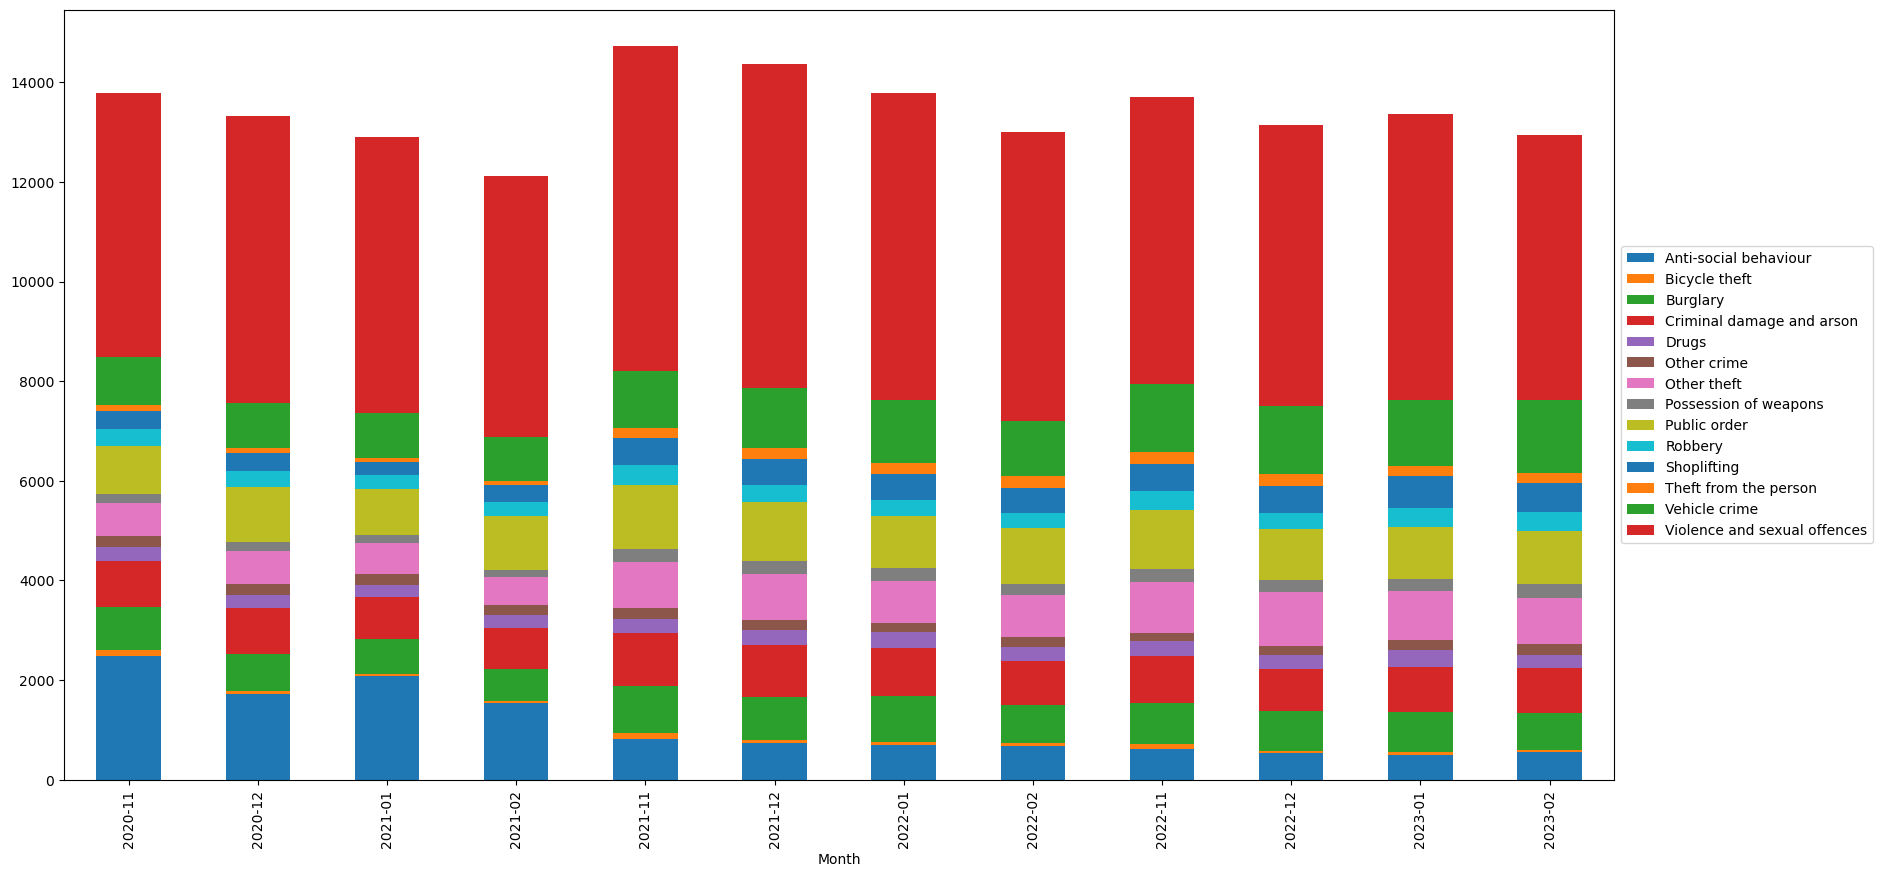

In [28]:
Winter_value_counts = Police_IMD_Winter.groupby(["Month"])["Crime type"].value_counts()
print(Winter_value_counts)


Winter_value_counts.unstack().plot.bar(stacked=True, figsize=(20,10))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig("output/Winter_value_counts.png")
plt.show()


The Pearson Coerrelation Coefficient, r = 0.2006130743453061
The Coefficient of Determination r-saqured = 0.04024560559827531


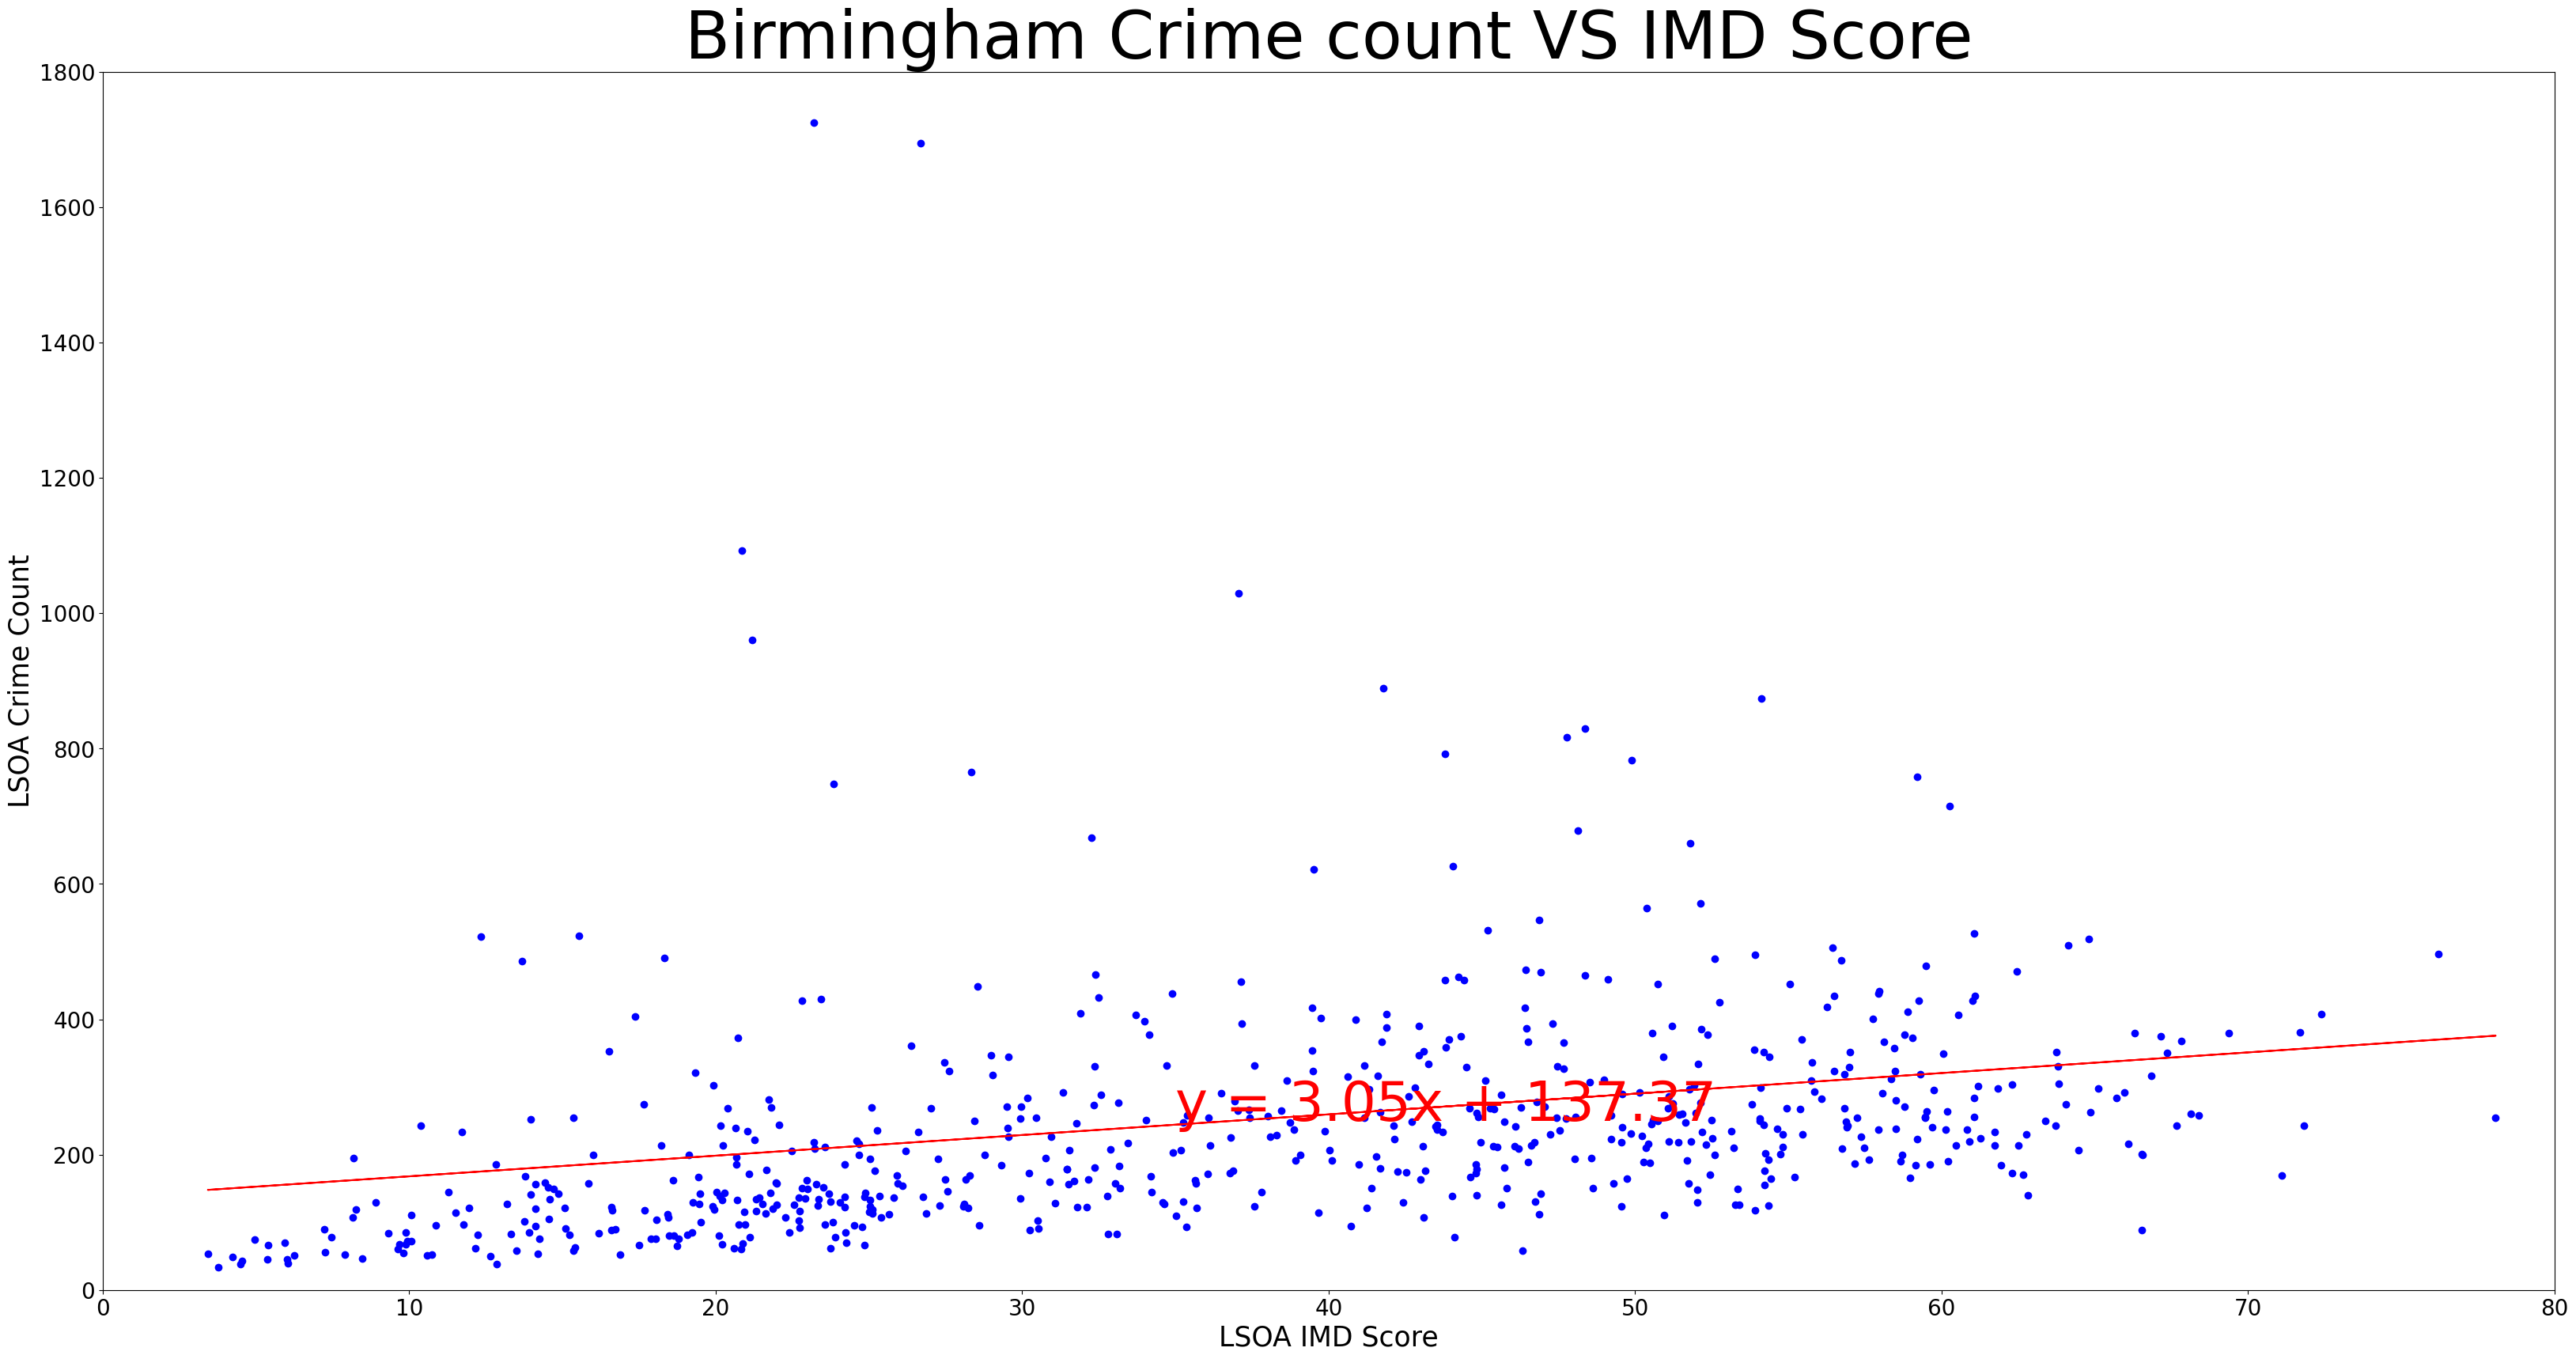

In [29]:

y_axis = LSOA_crime_count_WINTER["LSOA code"]
x_axis = LSOA_crime_count_WINTER["Index of Multiple Deprivation (IMD) Score"]

plt.title("Birmingham Crime count VS IMD Score", fontsize=60)
plt.scatter(x_axis, y_axis, marker="o", color="blue")
#plt.plot(x_axis, y_fit)
plt.rcParams["figure.figsize"] = (50,30)
plt.xlim(0,80)
plt.ylim(0, 1800)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("LSOA IMD Score", fontsize=25)
plt.ylabel("LSOA Crime Count", fontsize=25)
plot_linear_regression(x_axis, y_axis, 'LSOA Crime Count',(35,250))
plt.savefig("output/Winter_count.png")
plt.show()


The Pearson Coerrelation Coefficient, r = 0.244644263644438
The Coefficient of Determination r-saqured = 0.059850815734129294


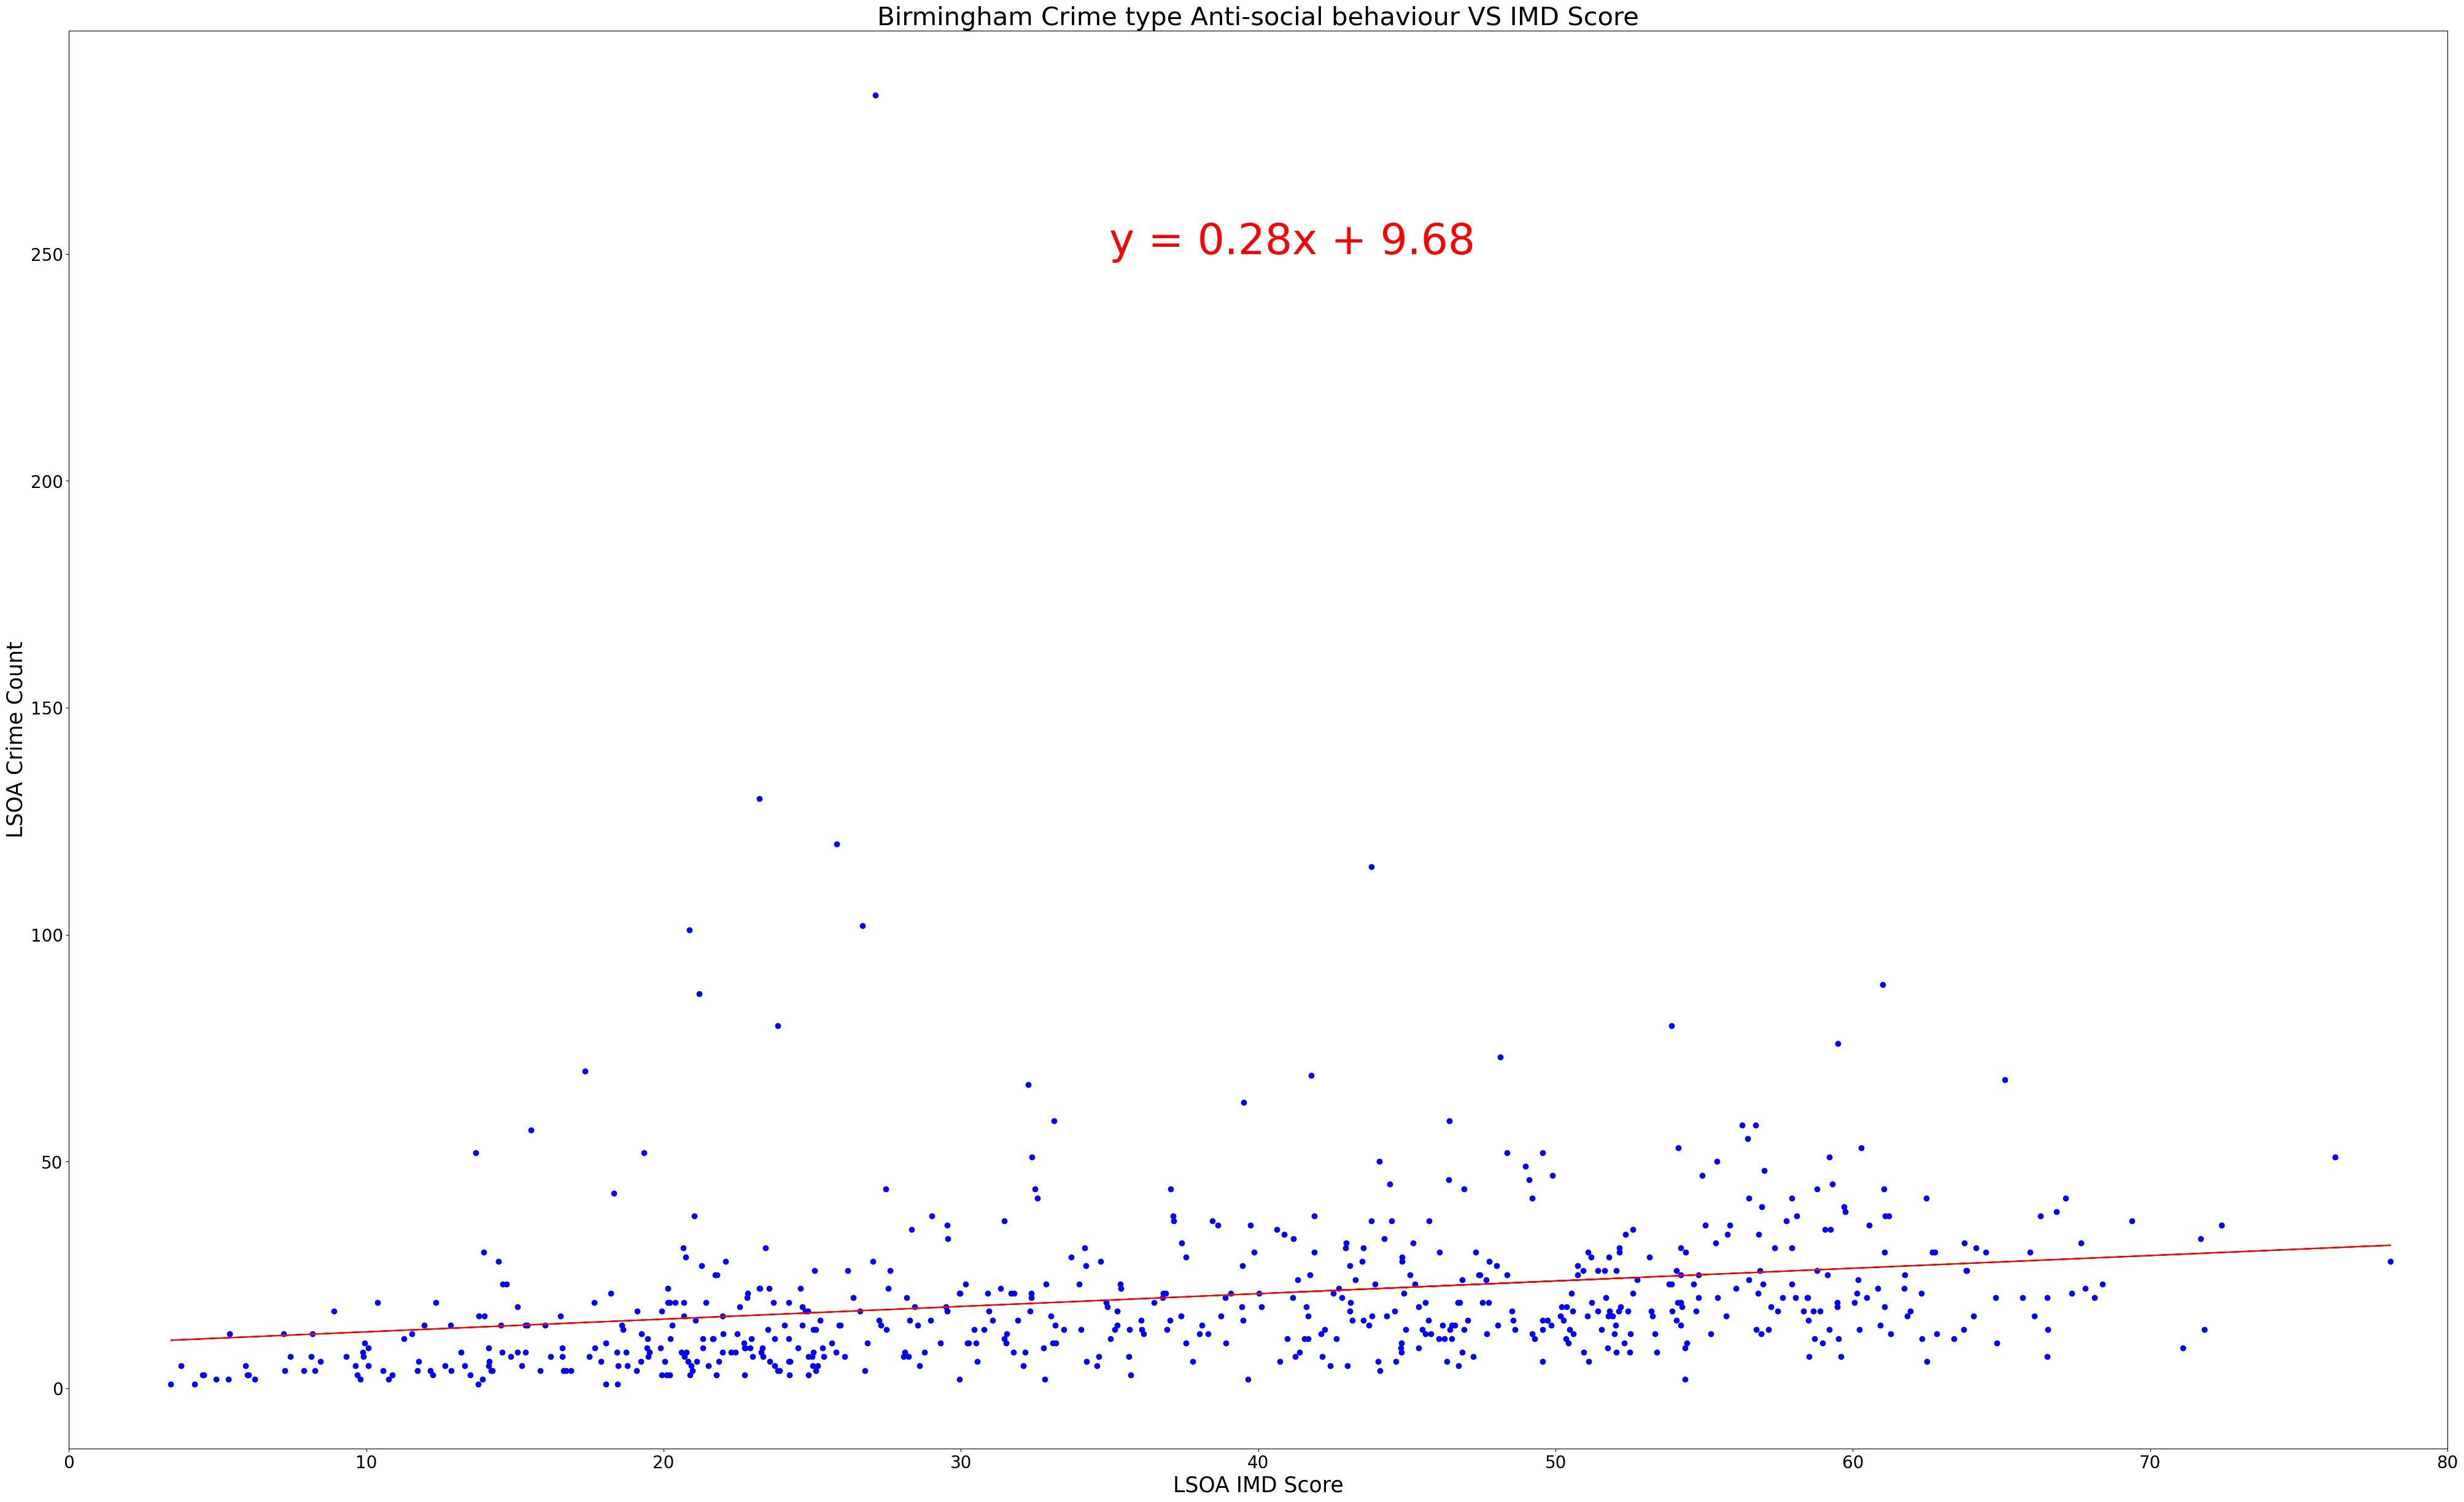

The Pearson Coerrelation Coefficient, r = 0.060409709967126295
The Coefficient of Determination r-saqured = 0.003649333058312318


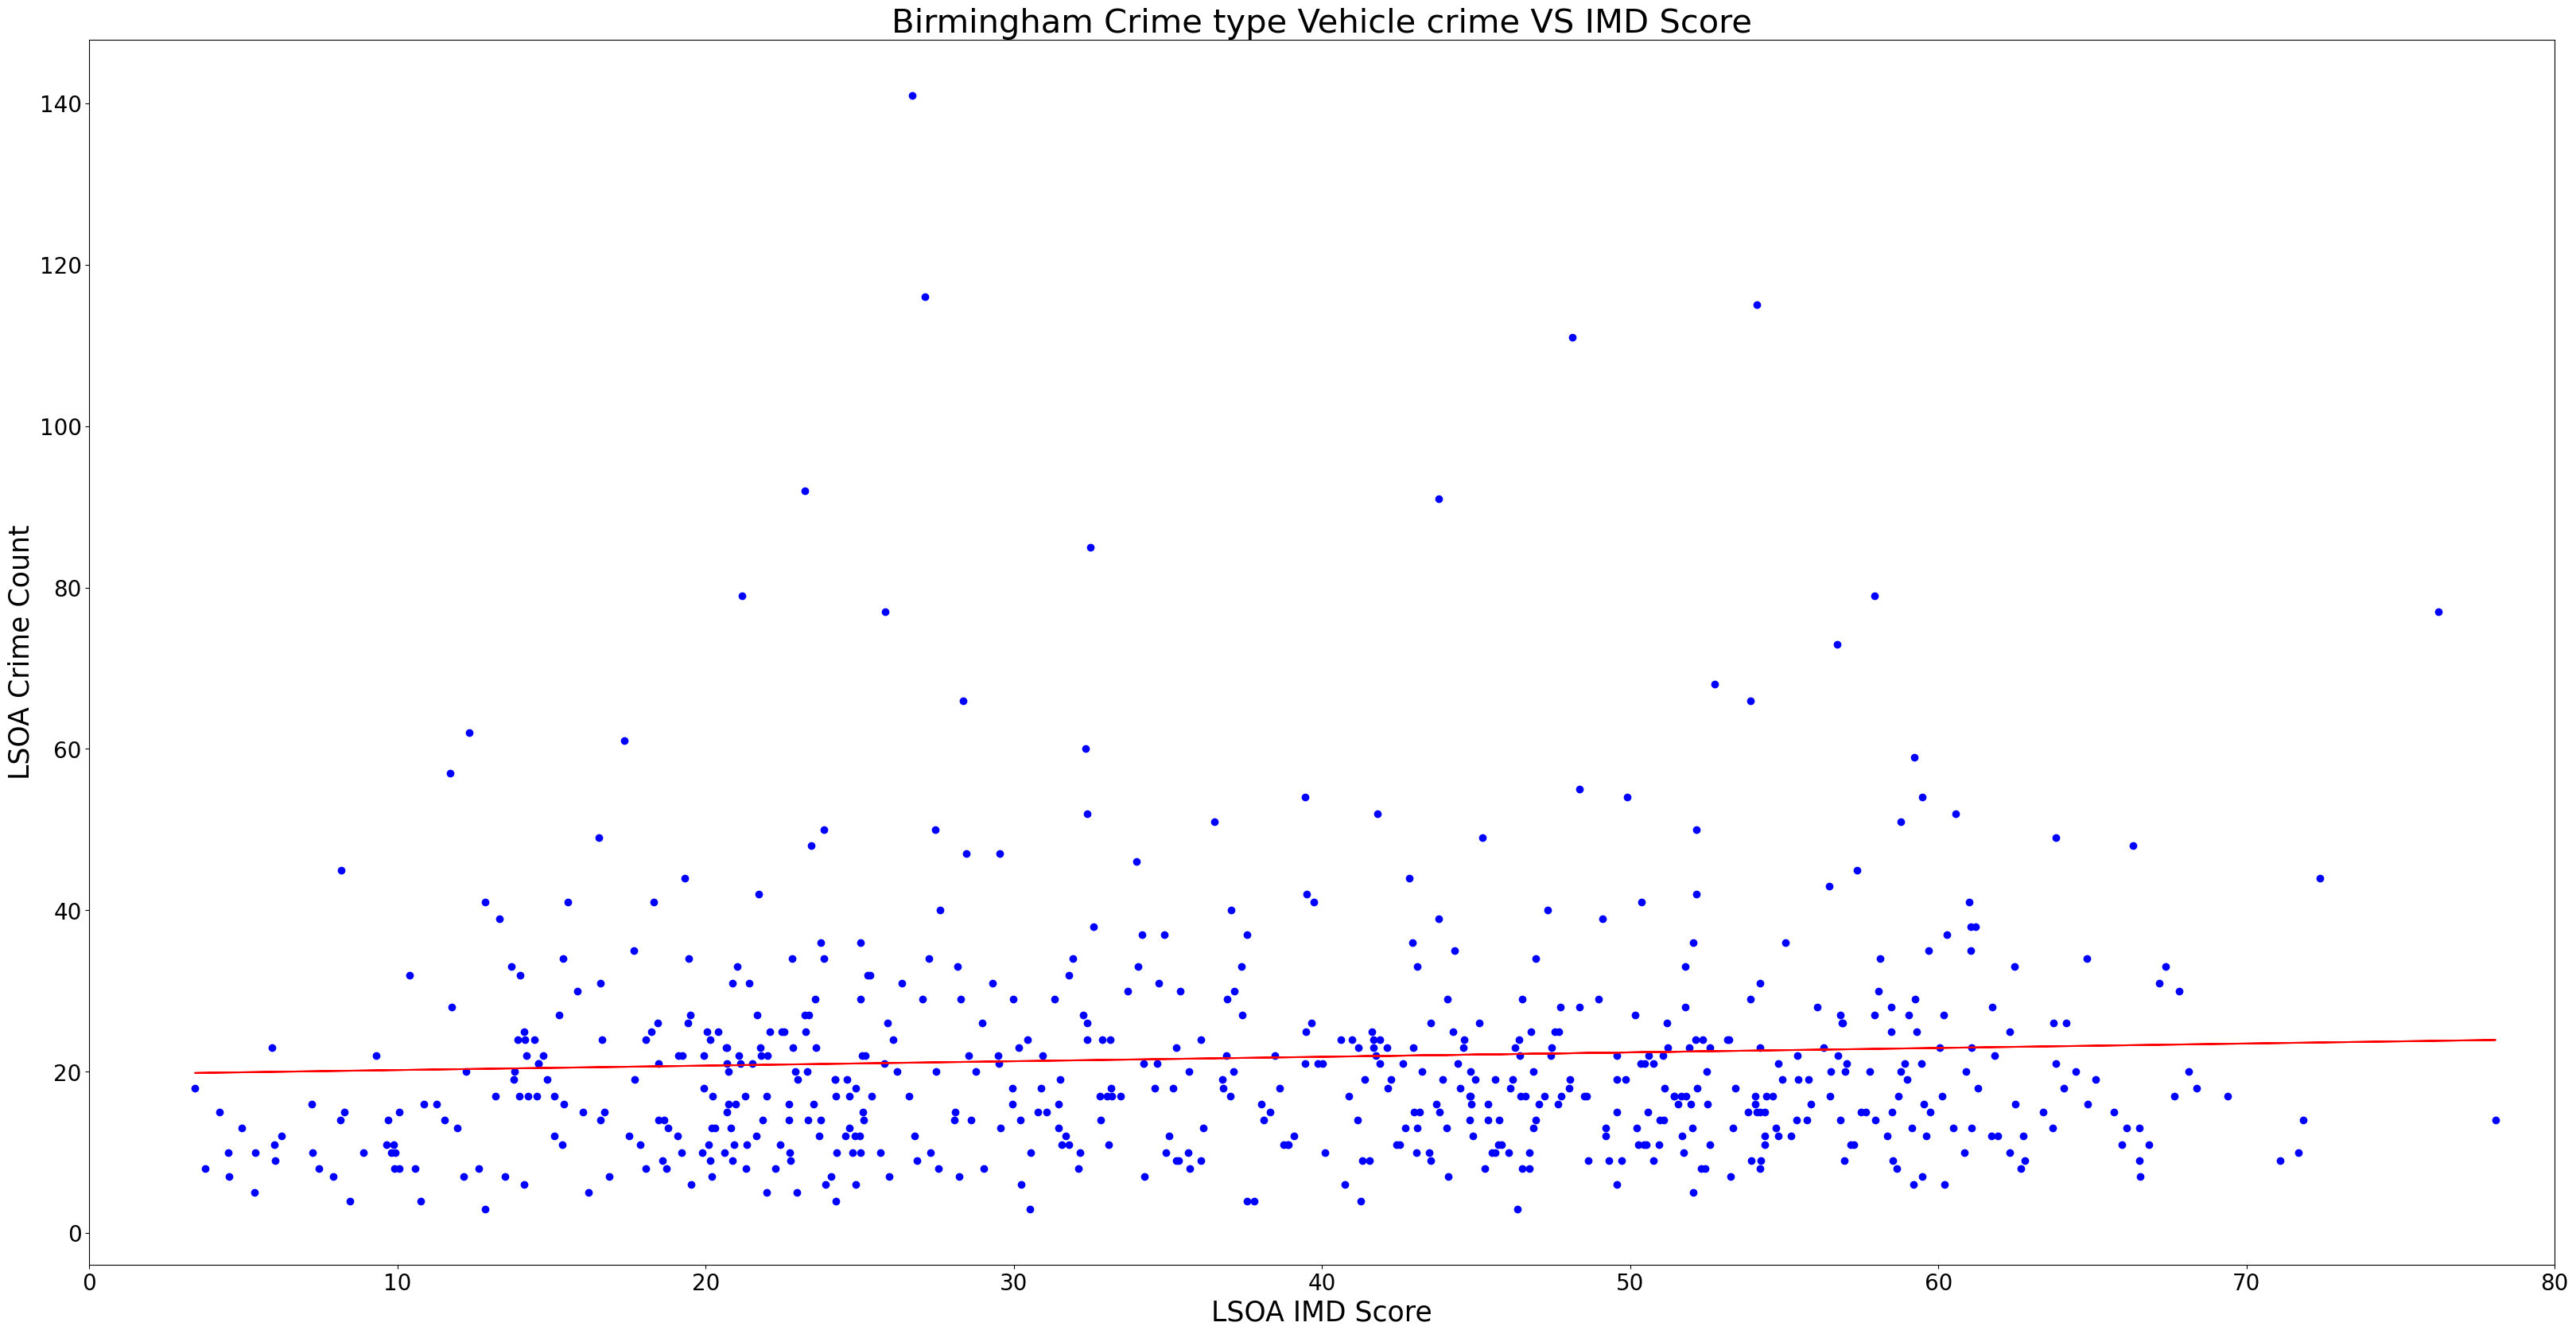

The Pearson Coerrelation Coefficient, r = 0.06866307621056324
The Coefficient of Determination r-saqured = 0.004714618034697615


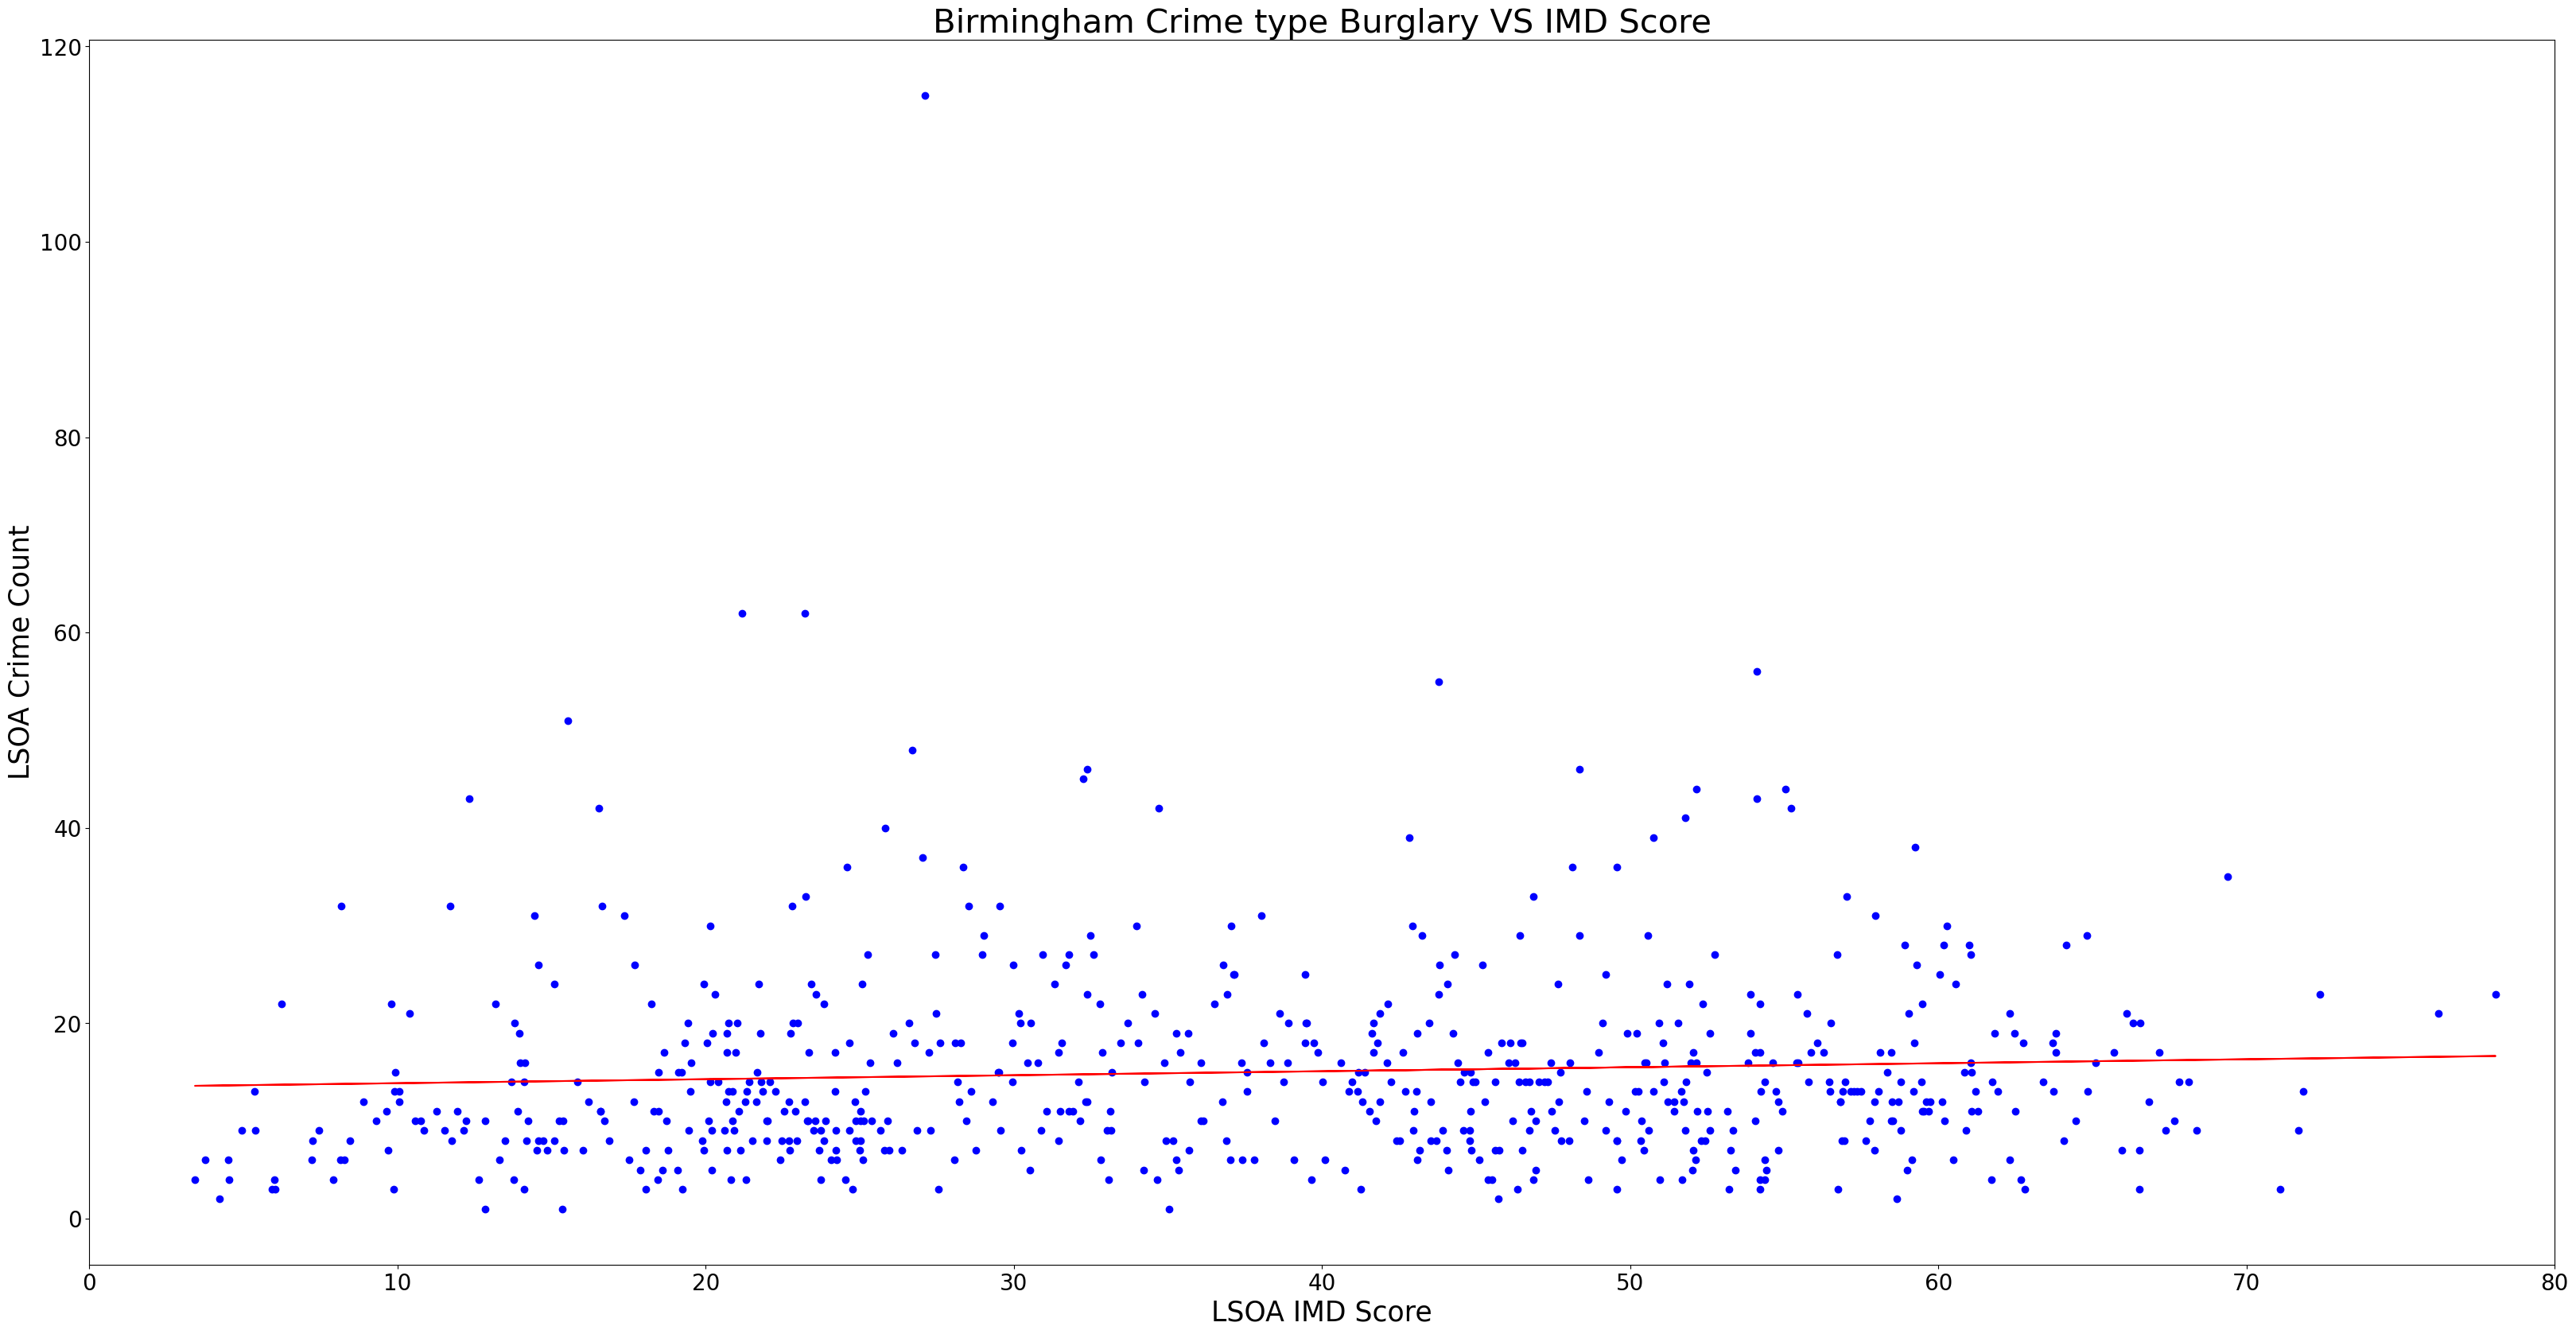

The Pearson Coerrelation Coefficient, r = 0.35786041807376195
The Coefficient of Determination r-saqured = 0.1280640788239277


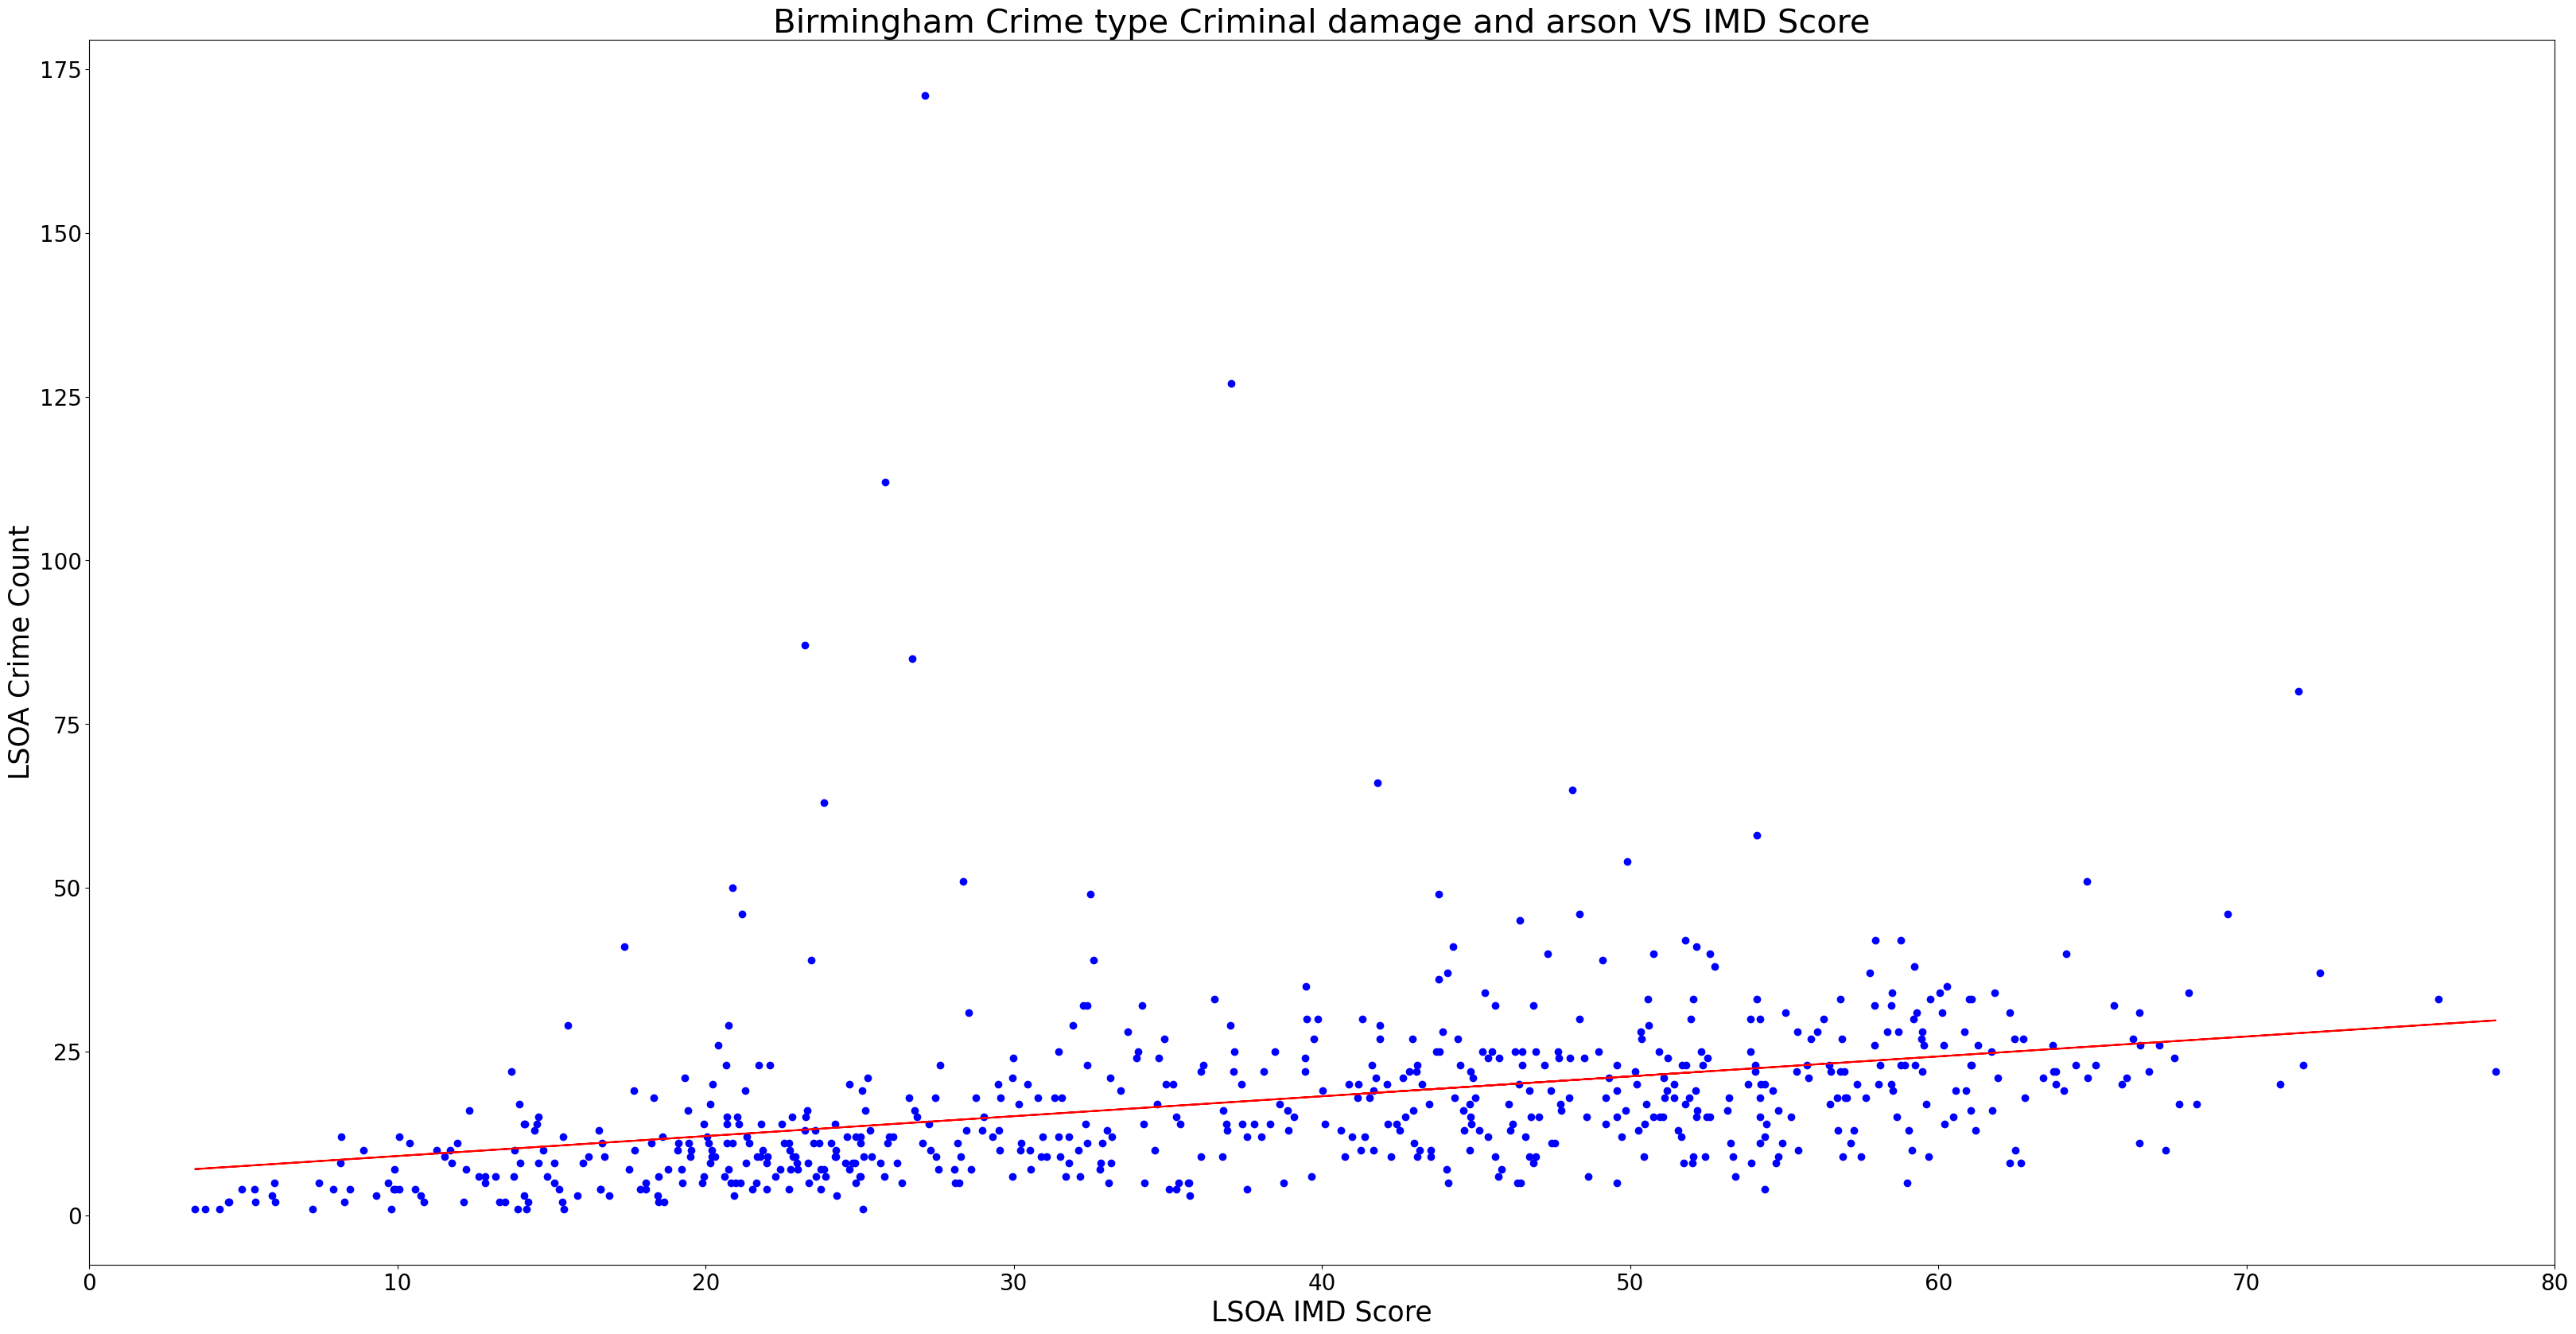

The Pearson Coerrelation Coefficient, r = 0.3436442937565606
The Coefficient of Determination r-saqured = 0.1180914006314453


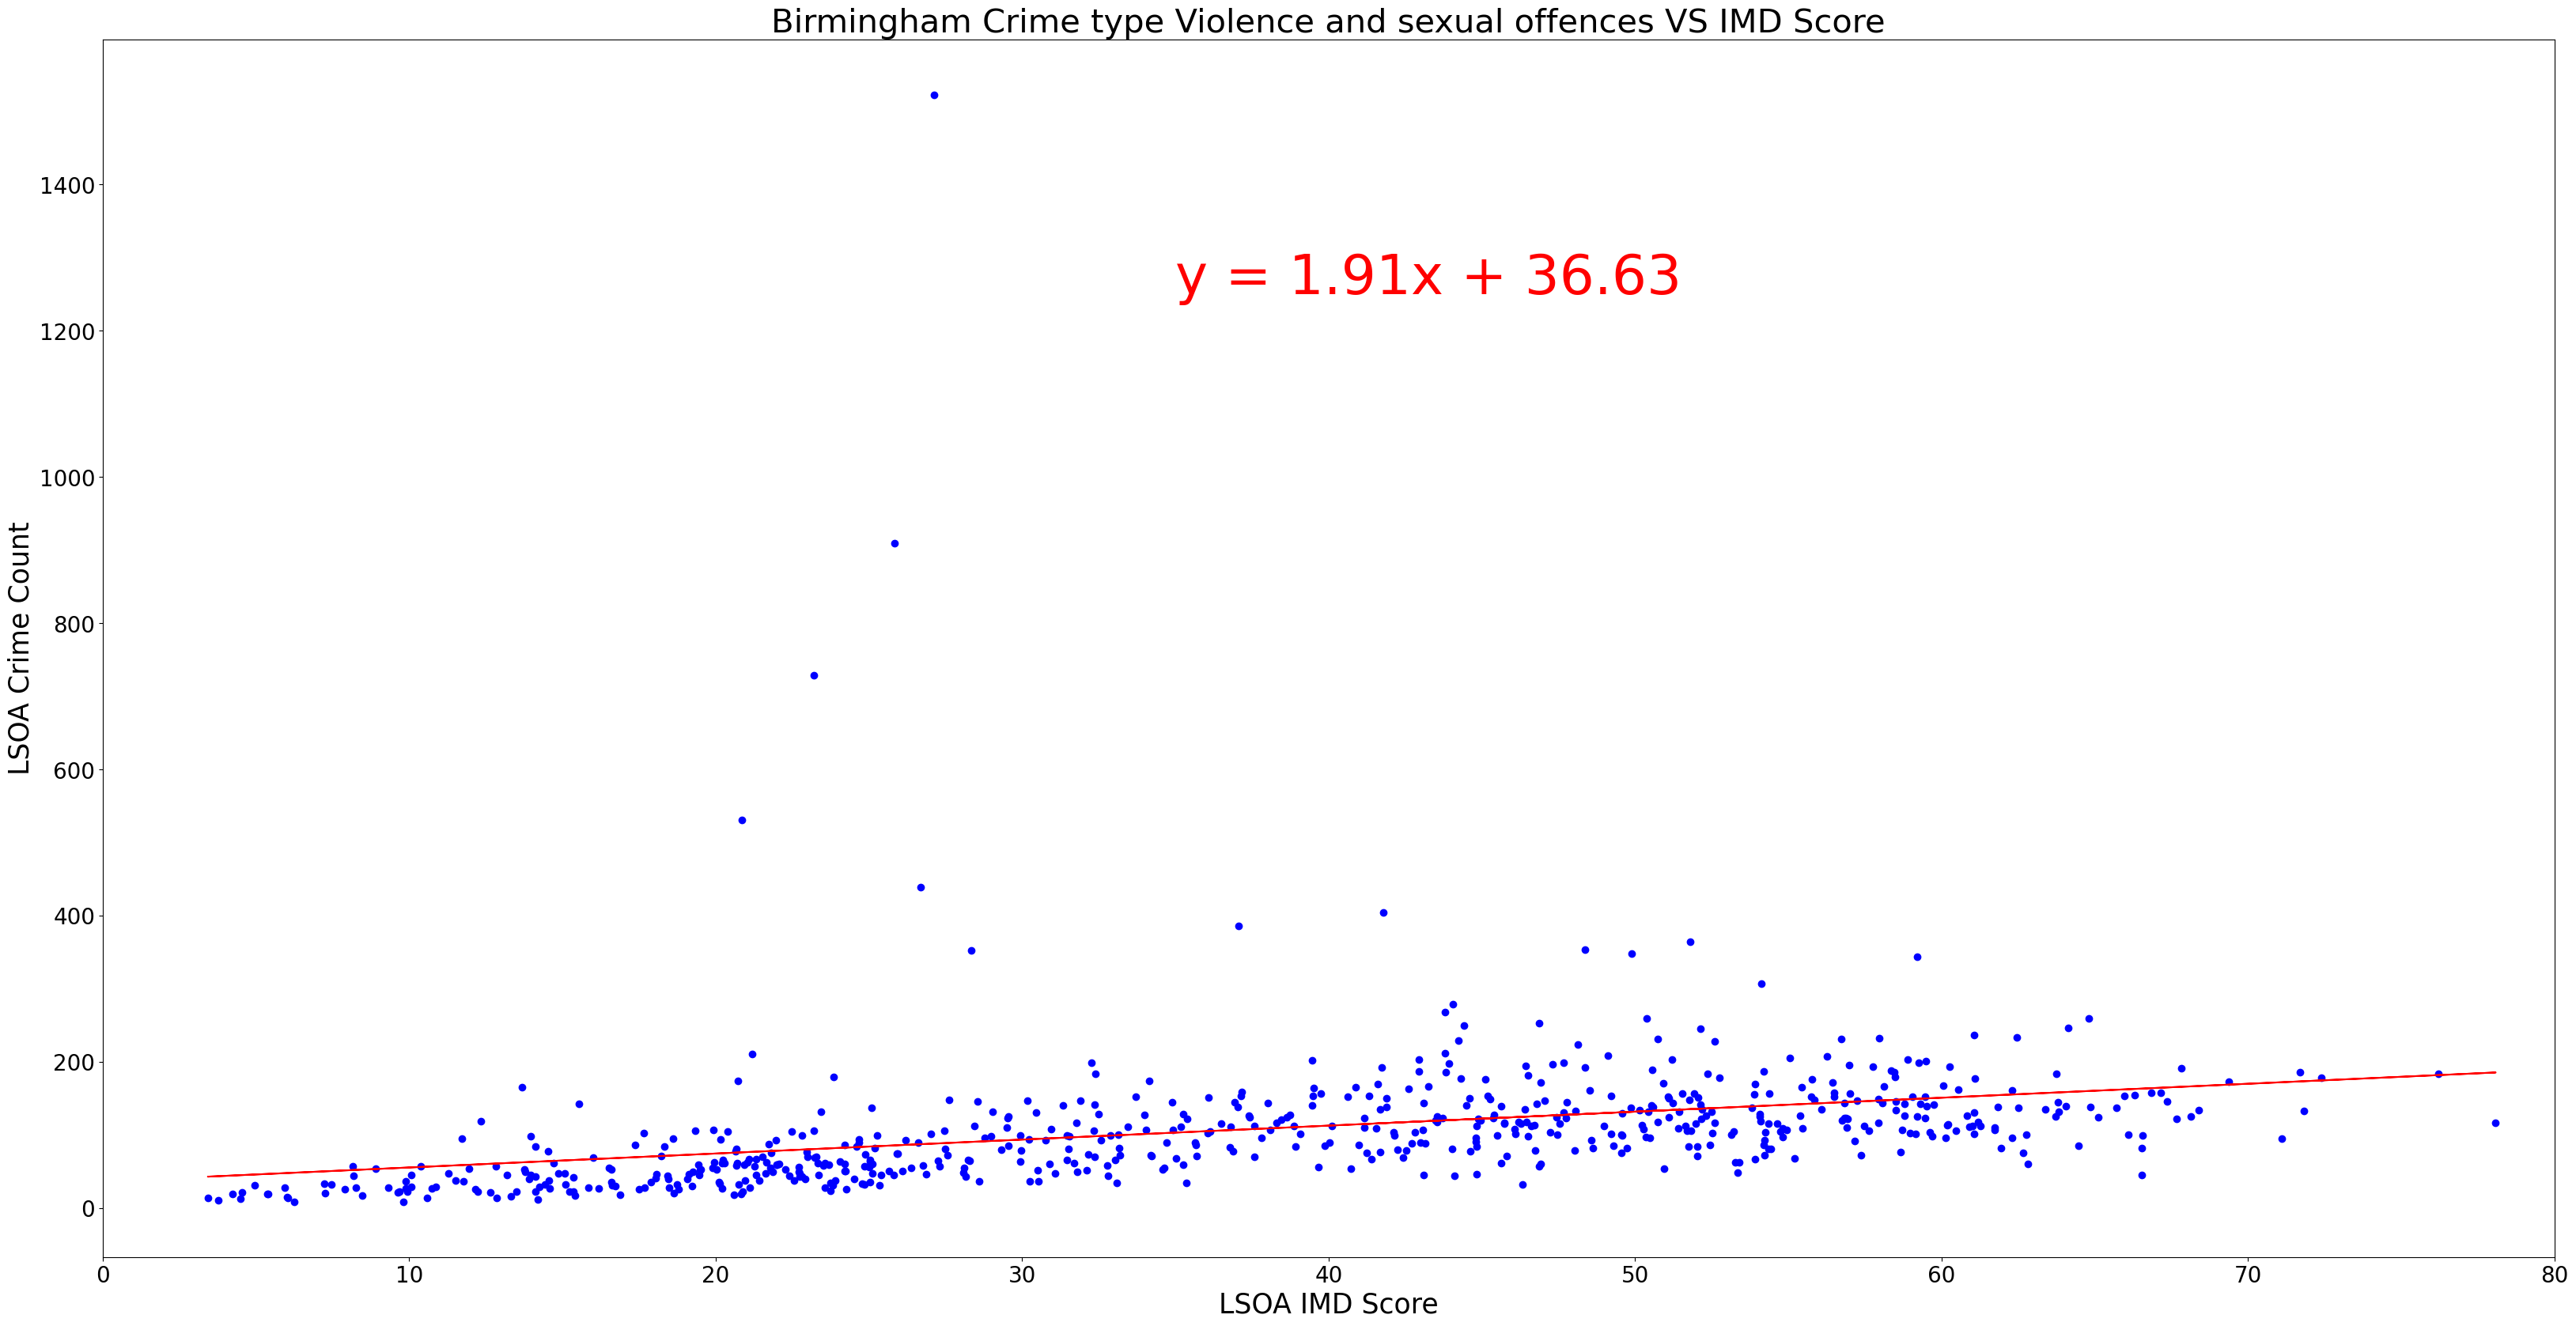

The Pearson Coerrelation Coefficient, r = 0.11312314127331059
The Coefficient of Determination r-saqured = 0.012796845091541387


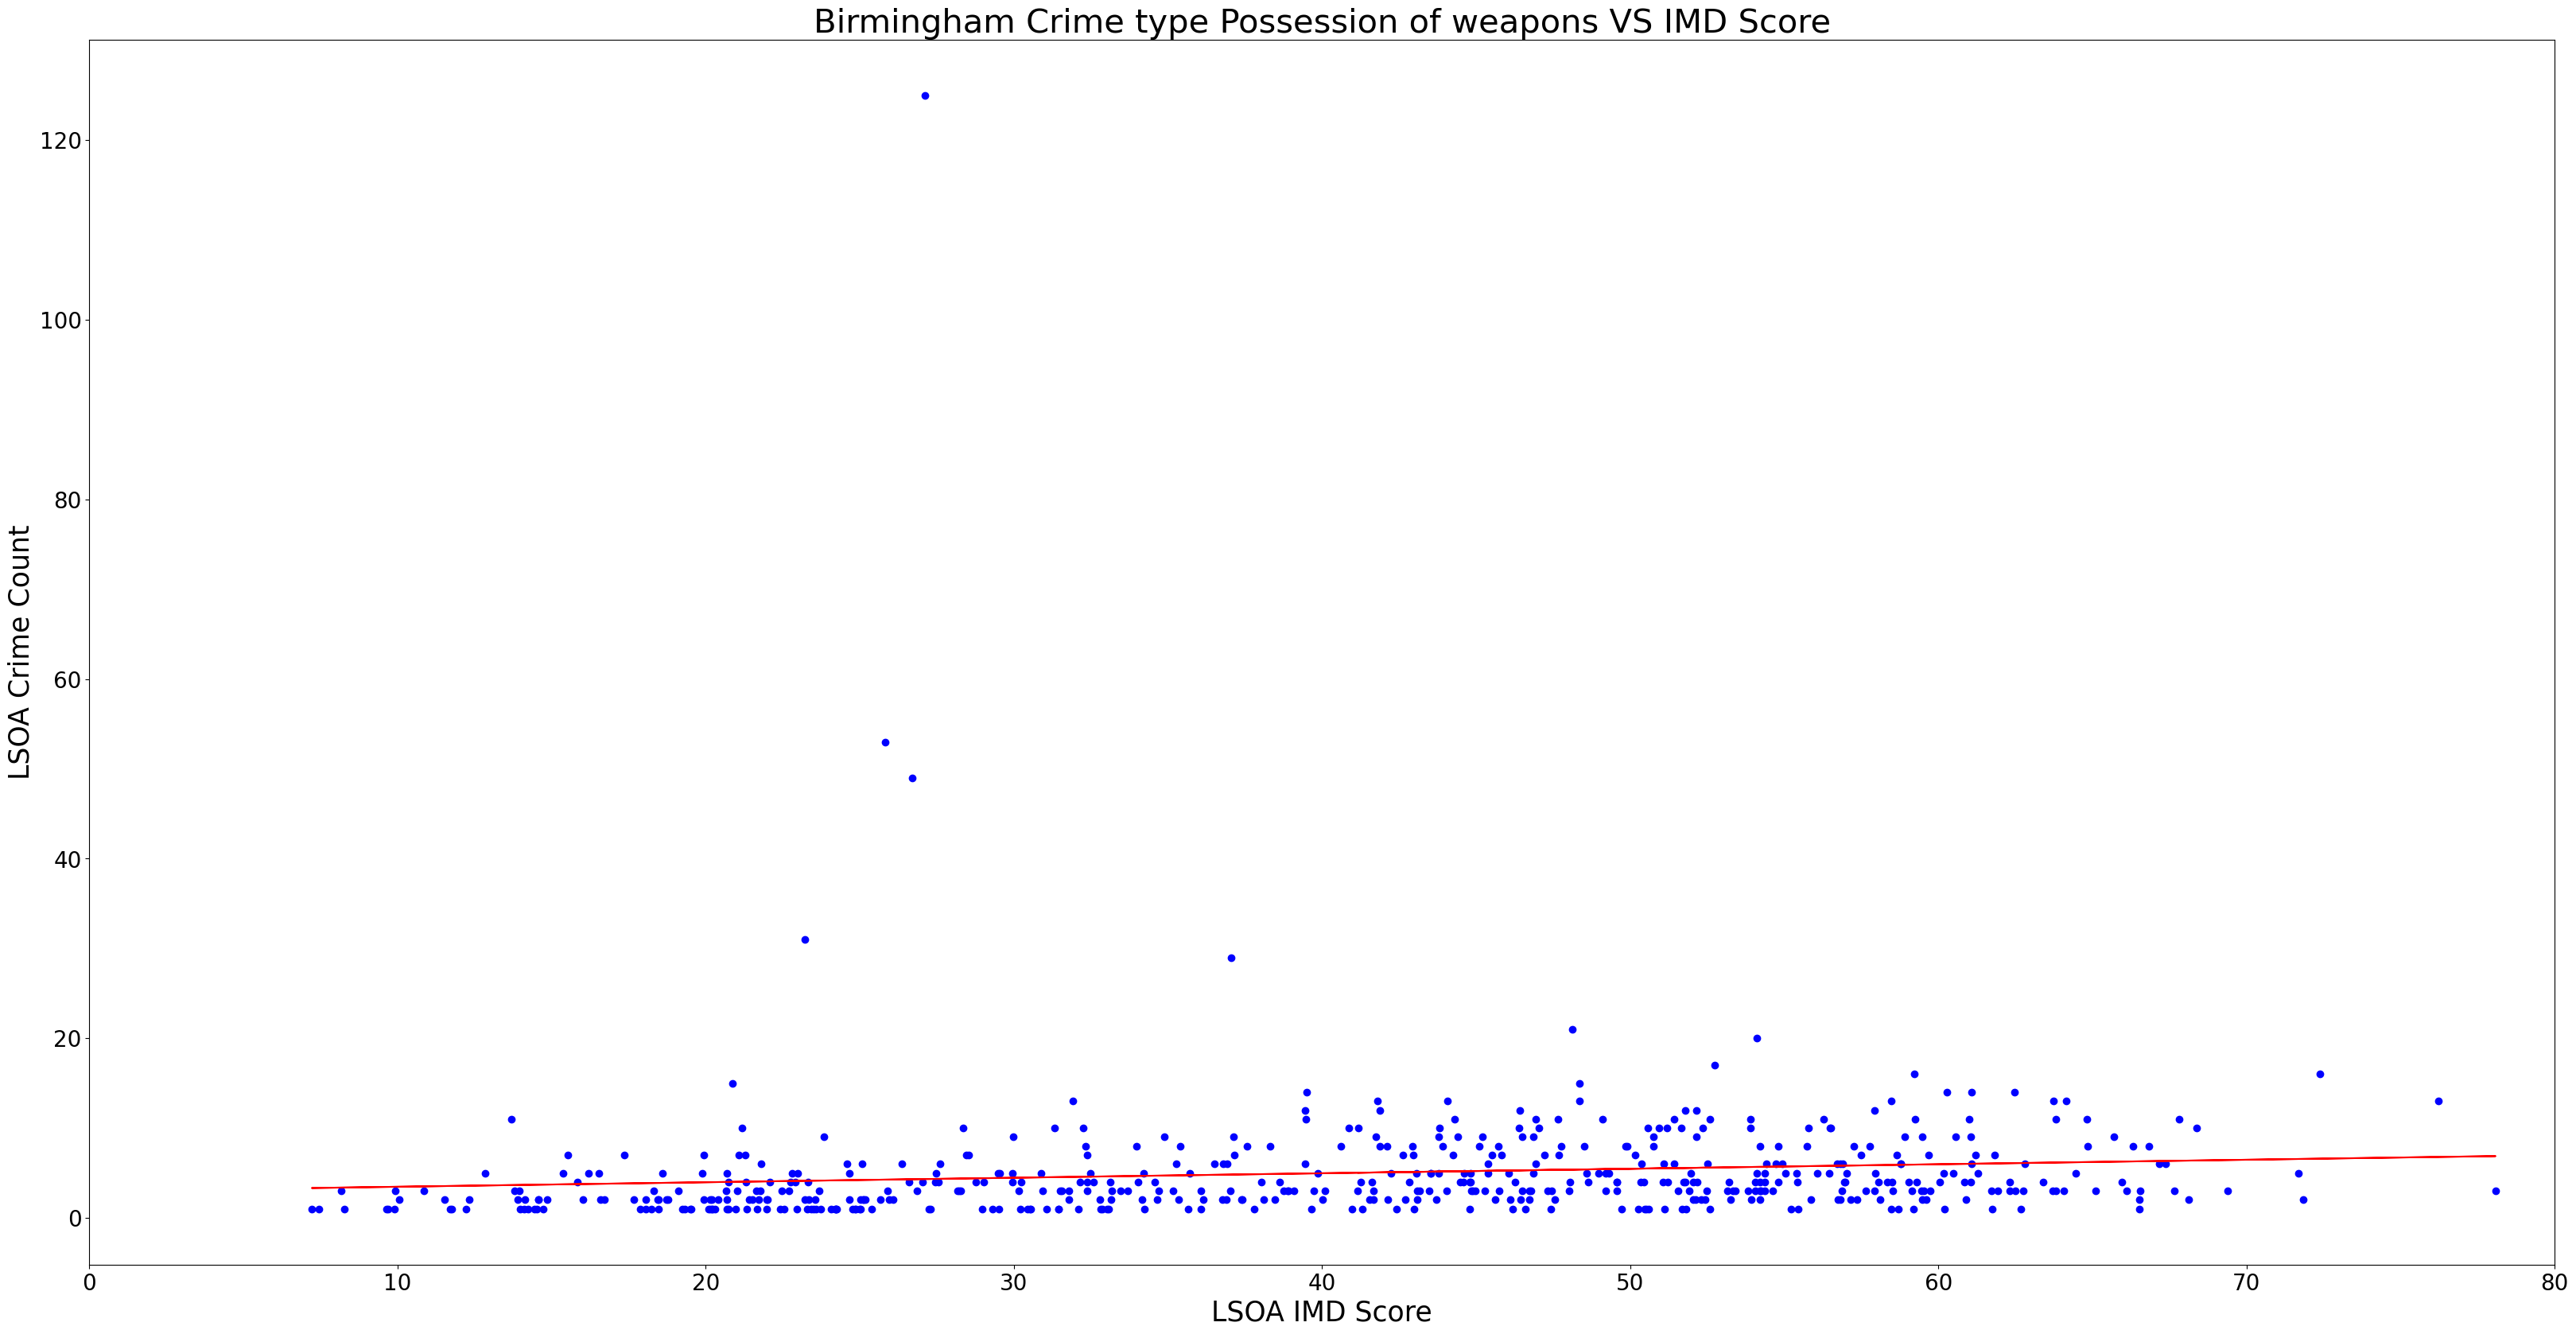

The Pearson Coerrelation Coefficient, r = 0.165203865214567
The Coefficient of Determination r-saqured = 0.02729231708183282


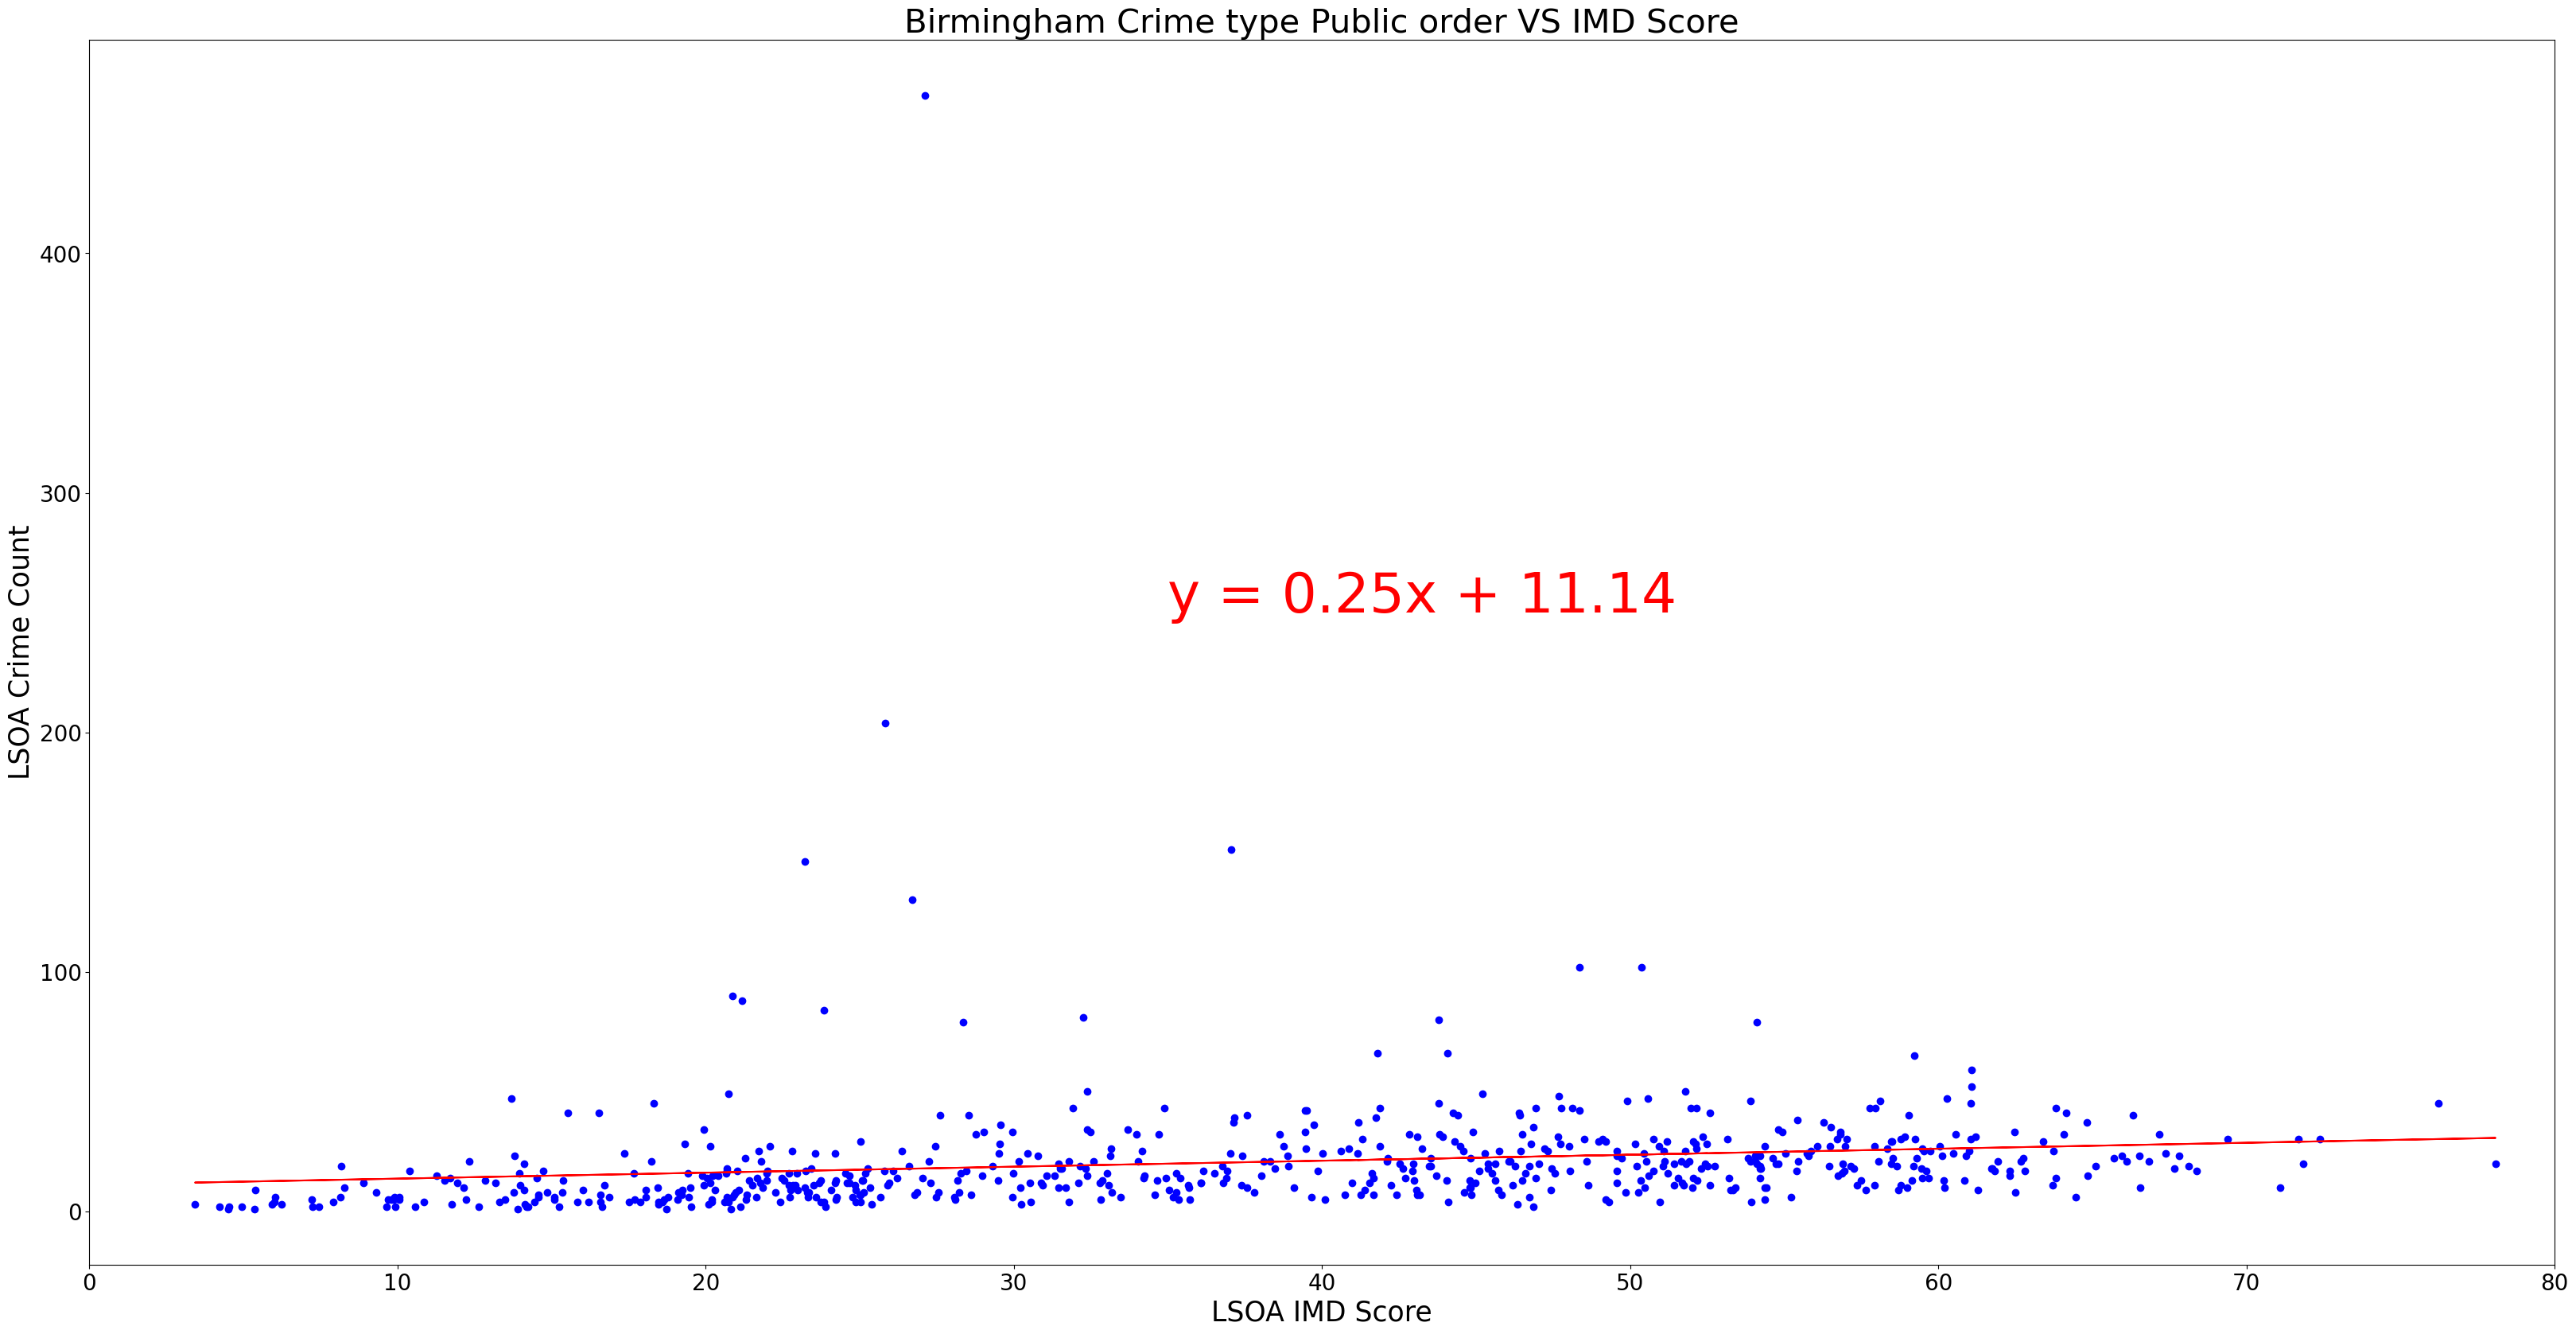

The Pearson Coerrelation Coefficient, r = 0.07606058529893264
The Coefficient of Determination r-saqured = 0.005785212636016208


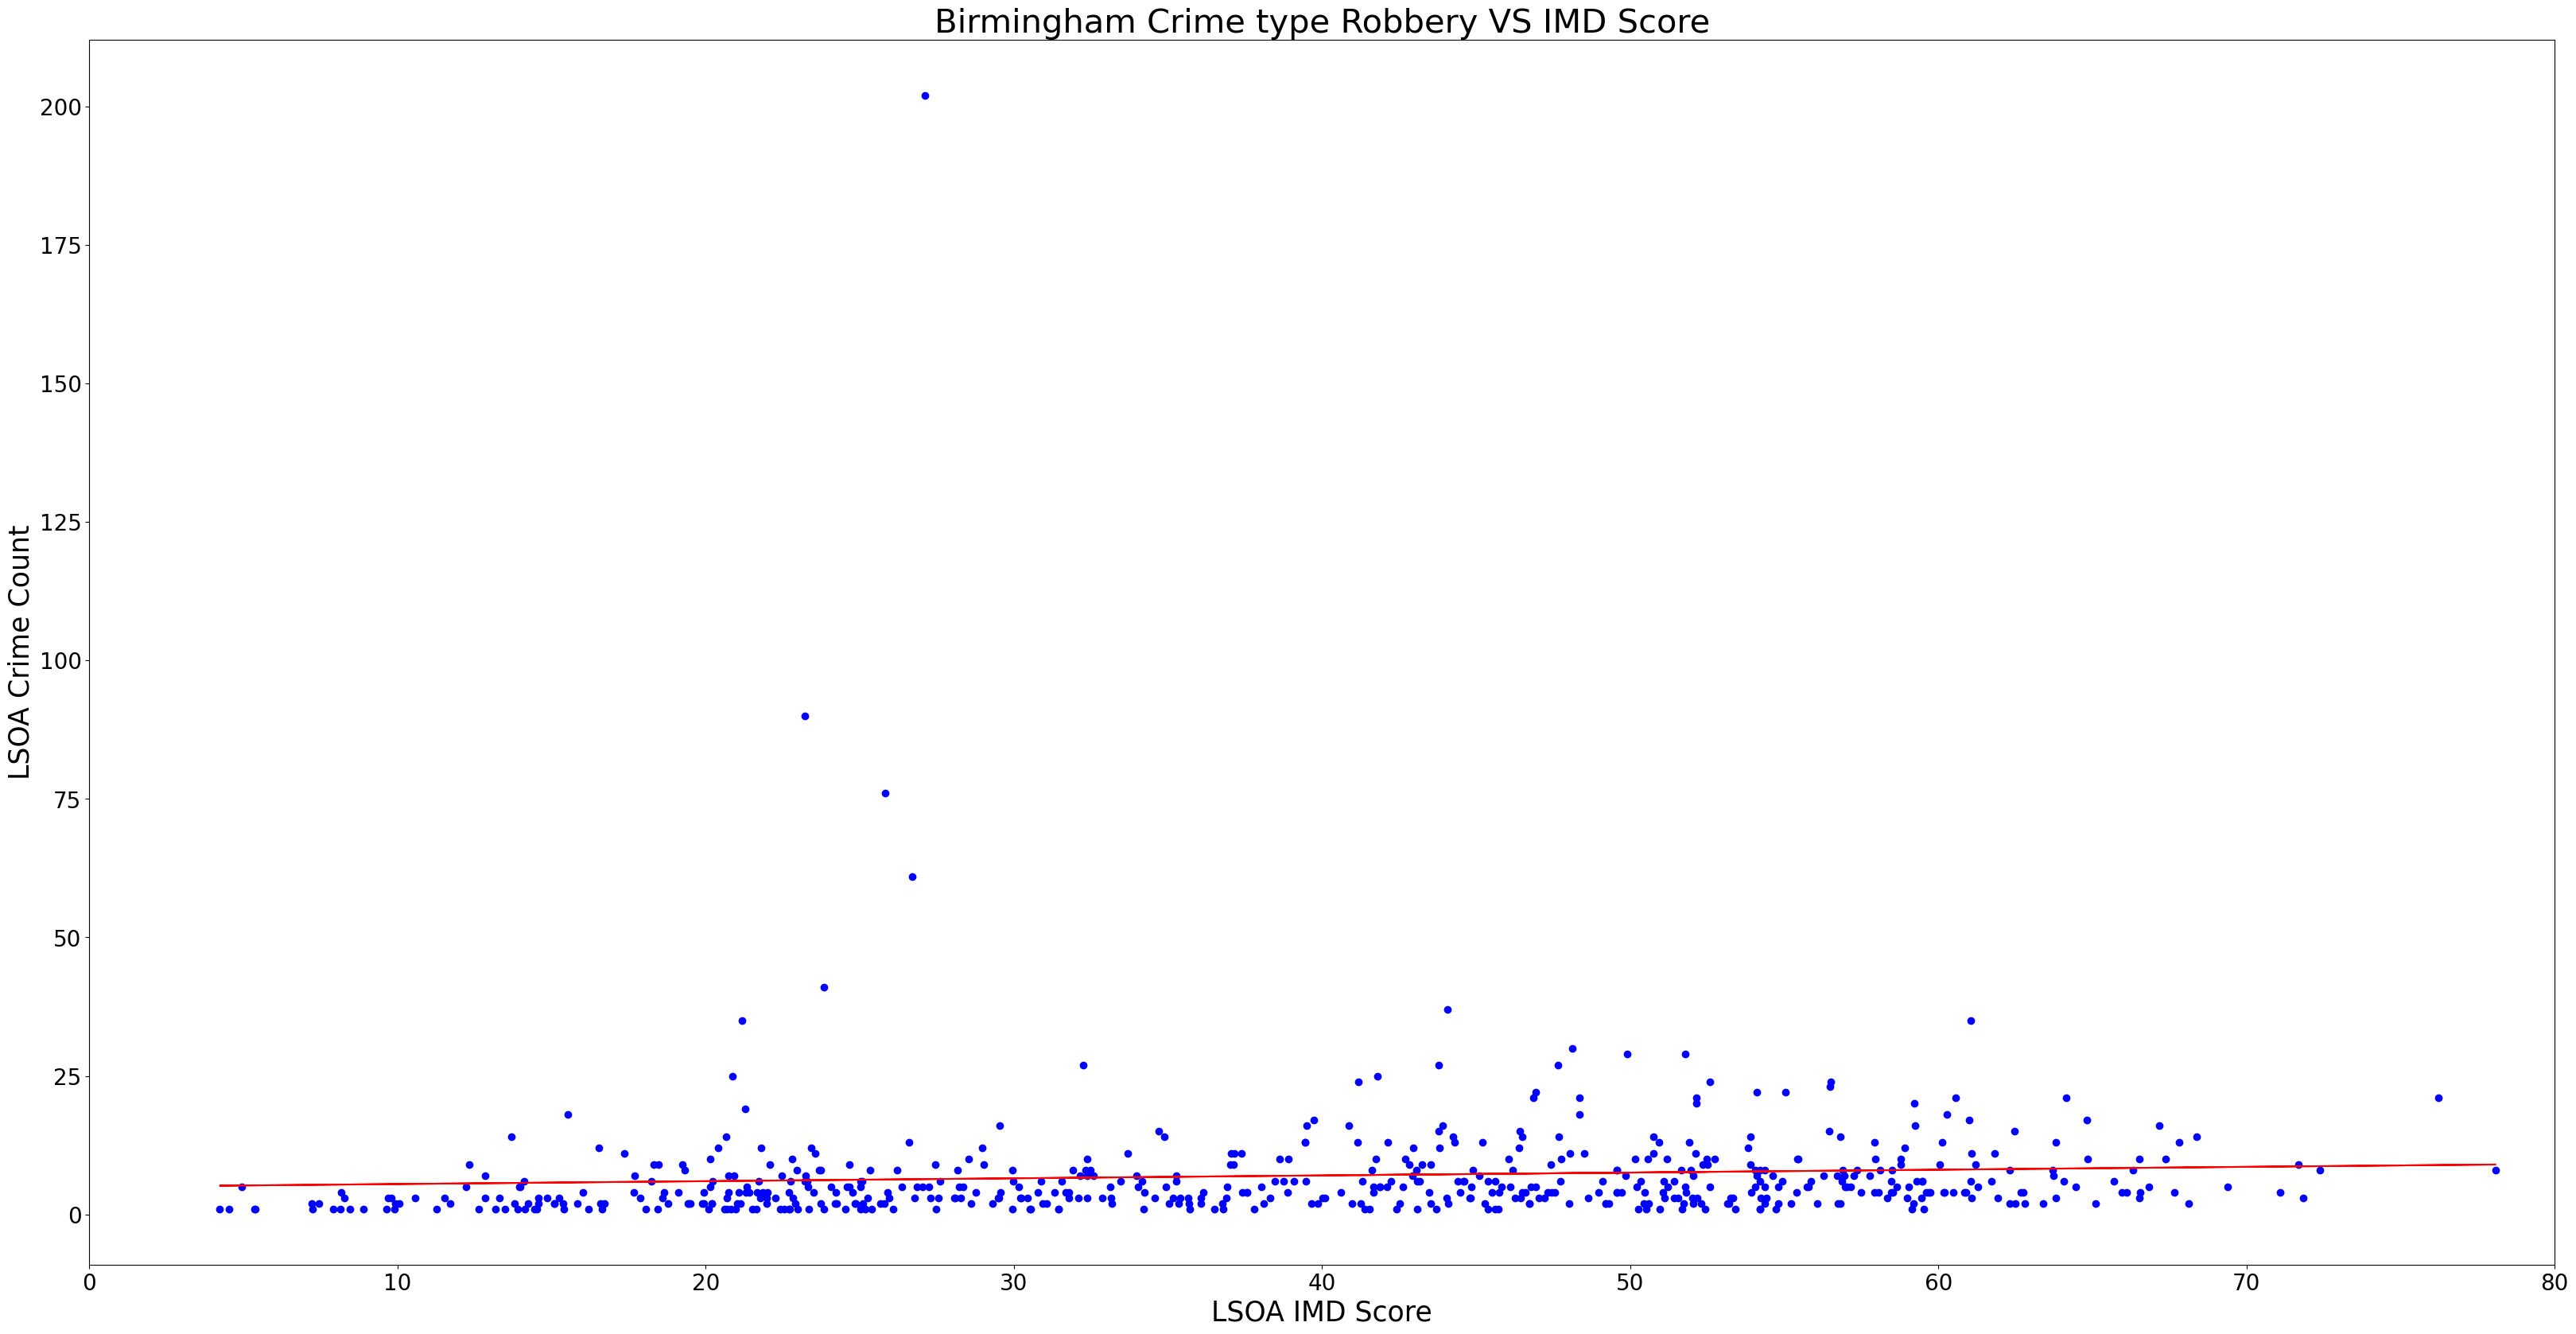

The Pearson Coerrelation Coefficient, r = 0.03610198778183144
The Coefficient of Determination r-saqured = 0.0013033535217995067


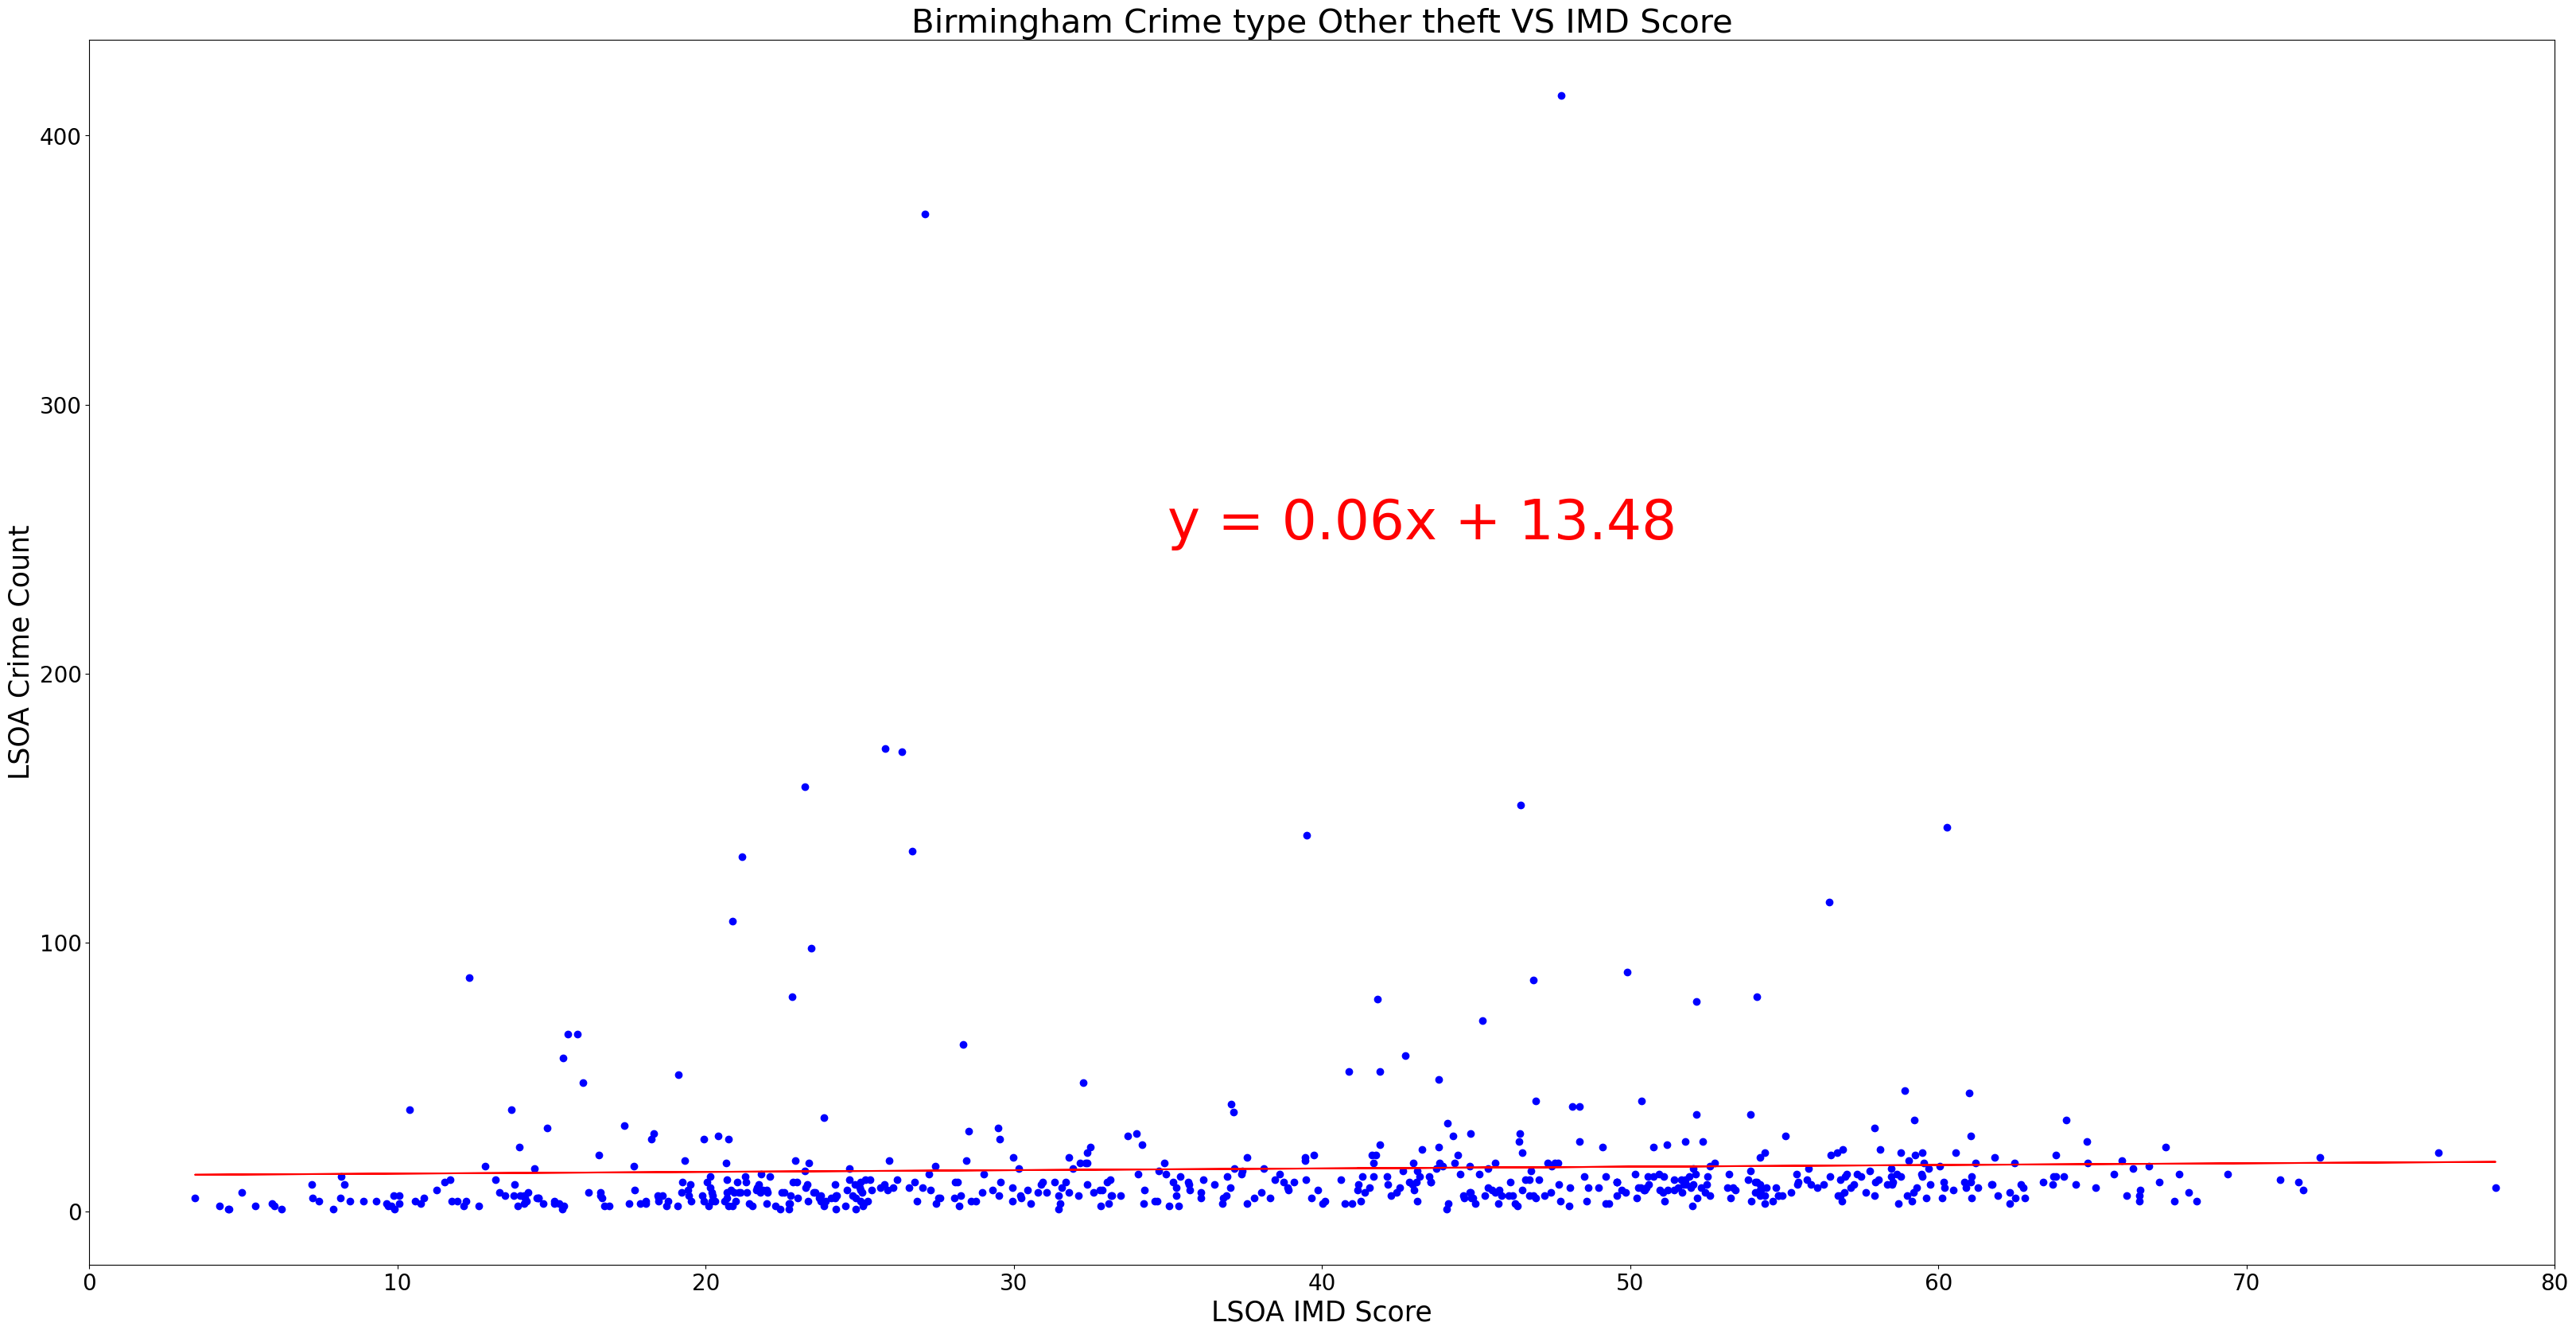

The Pearson Coerrelation Coefficient, r = 0.29427073218550404
The Coefficient of Determination r-saqured = 0.08659526382099264


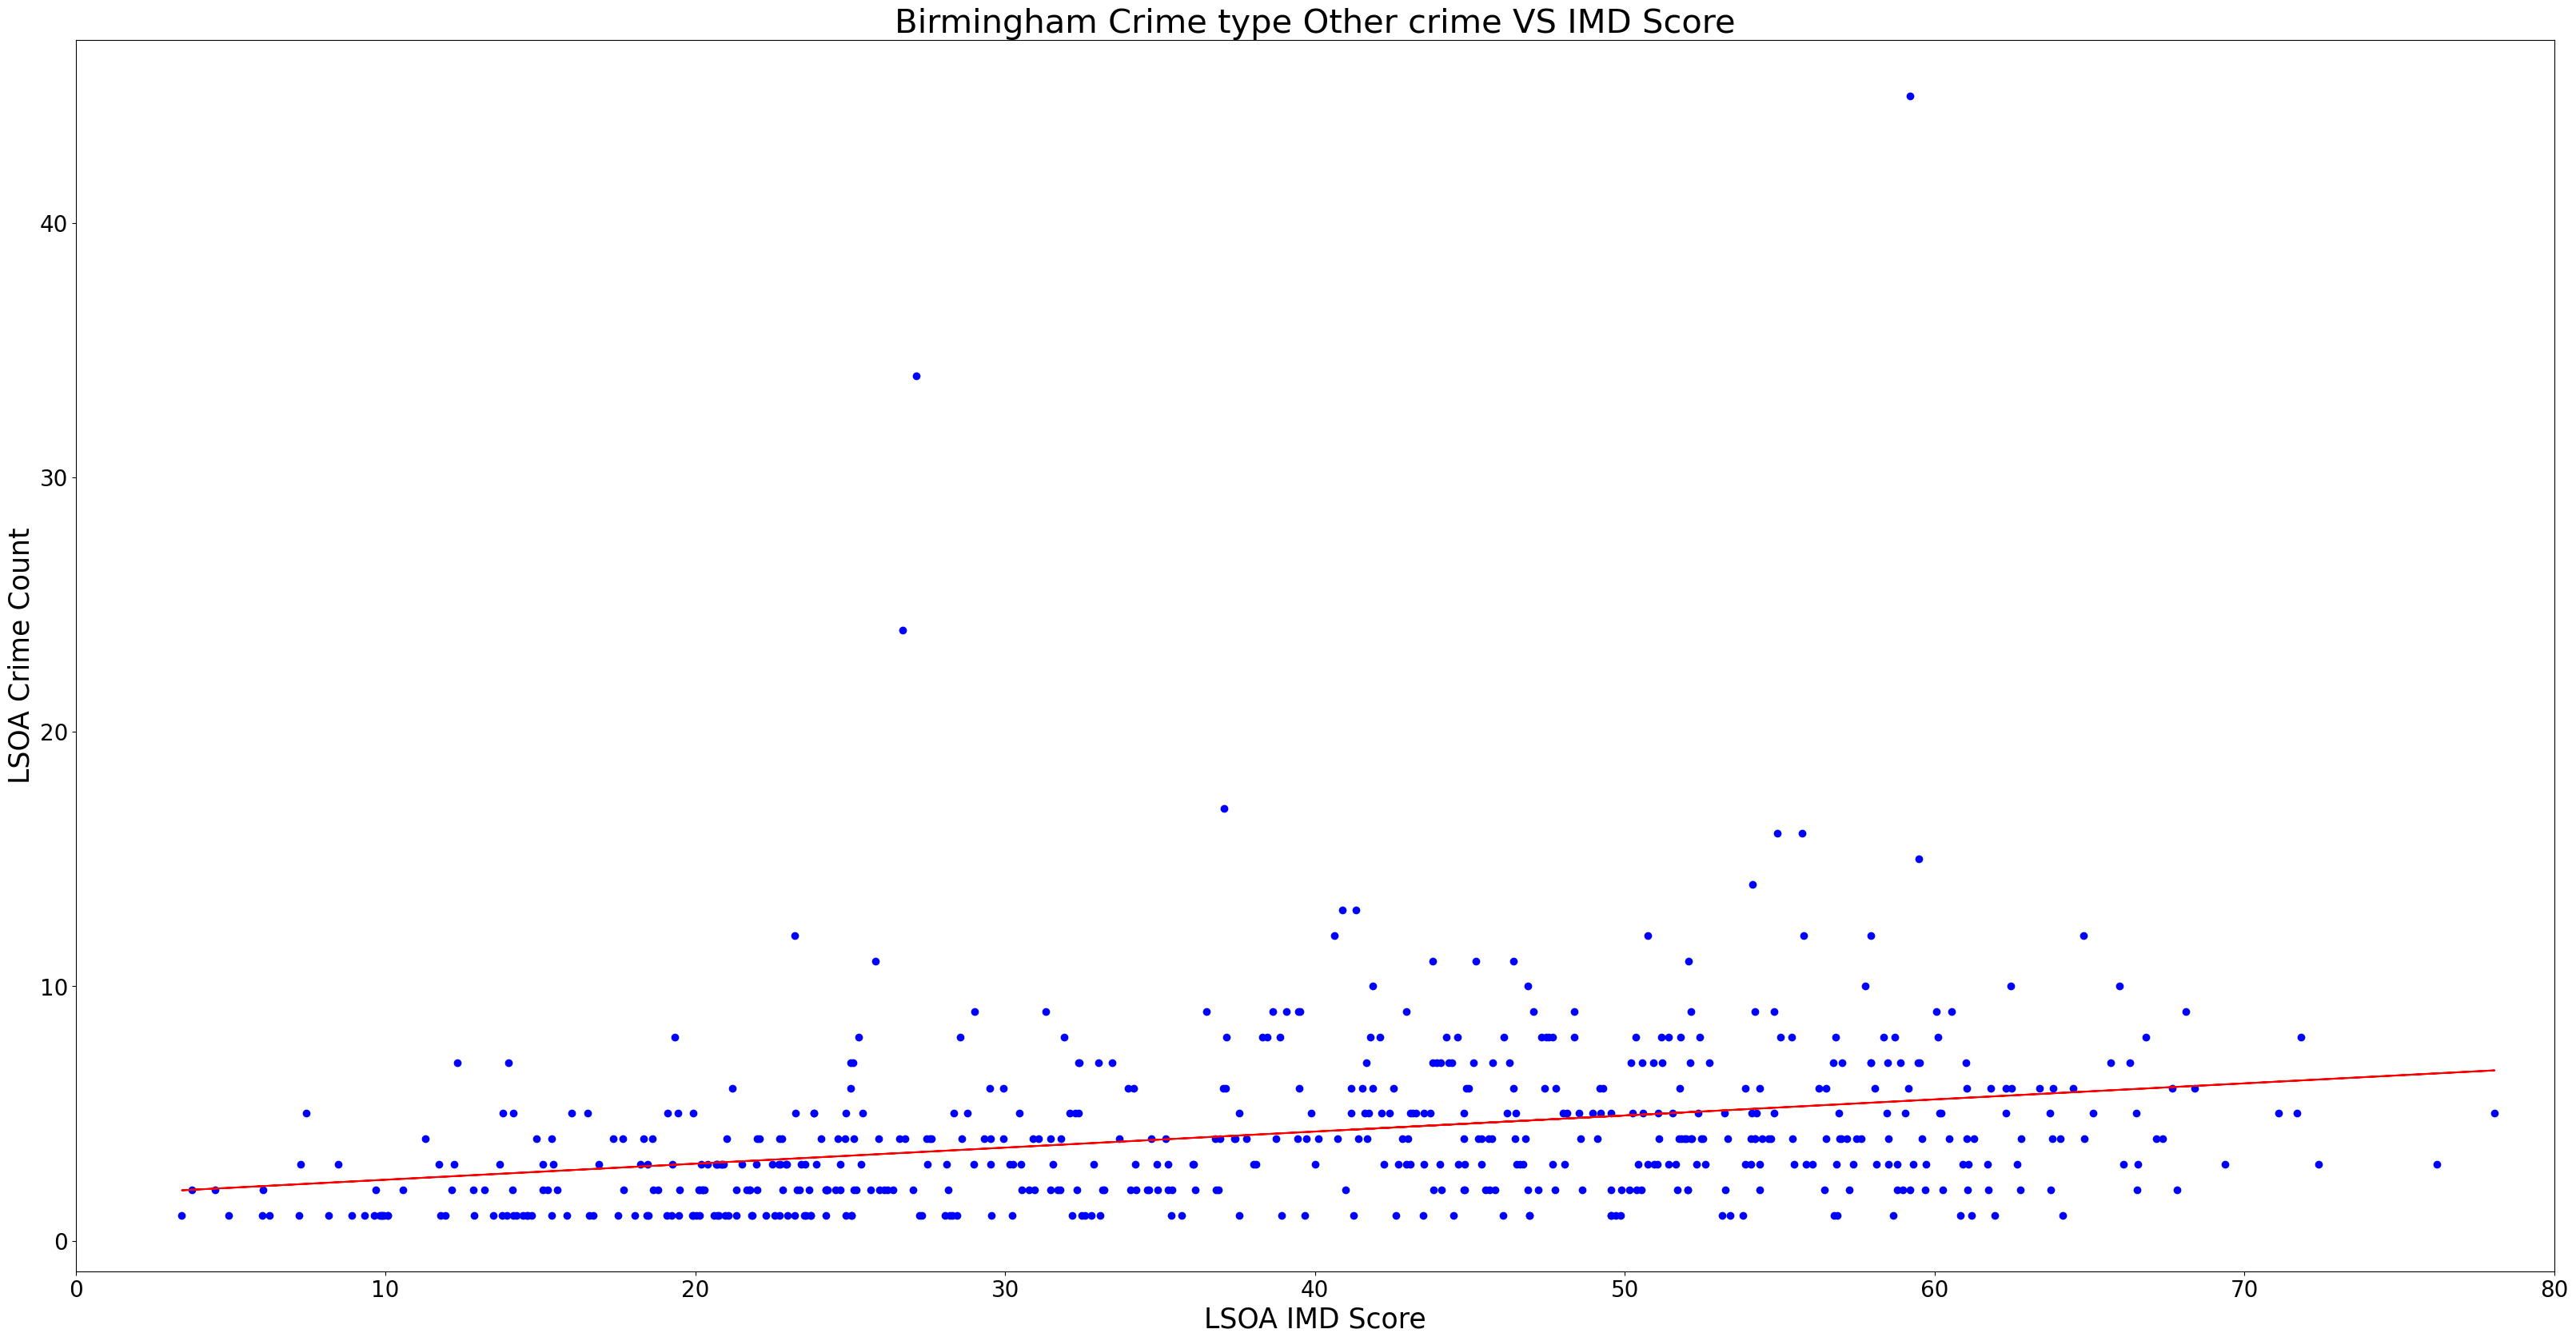

The Pearson Coerrelation Coefficient, r = -0.1603399039210714
The Coefficient of Determination r-saqured = 0.025708884789418403


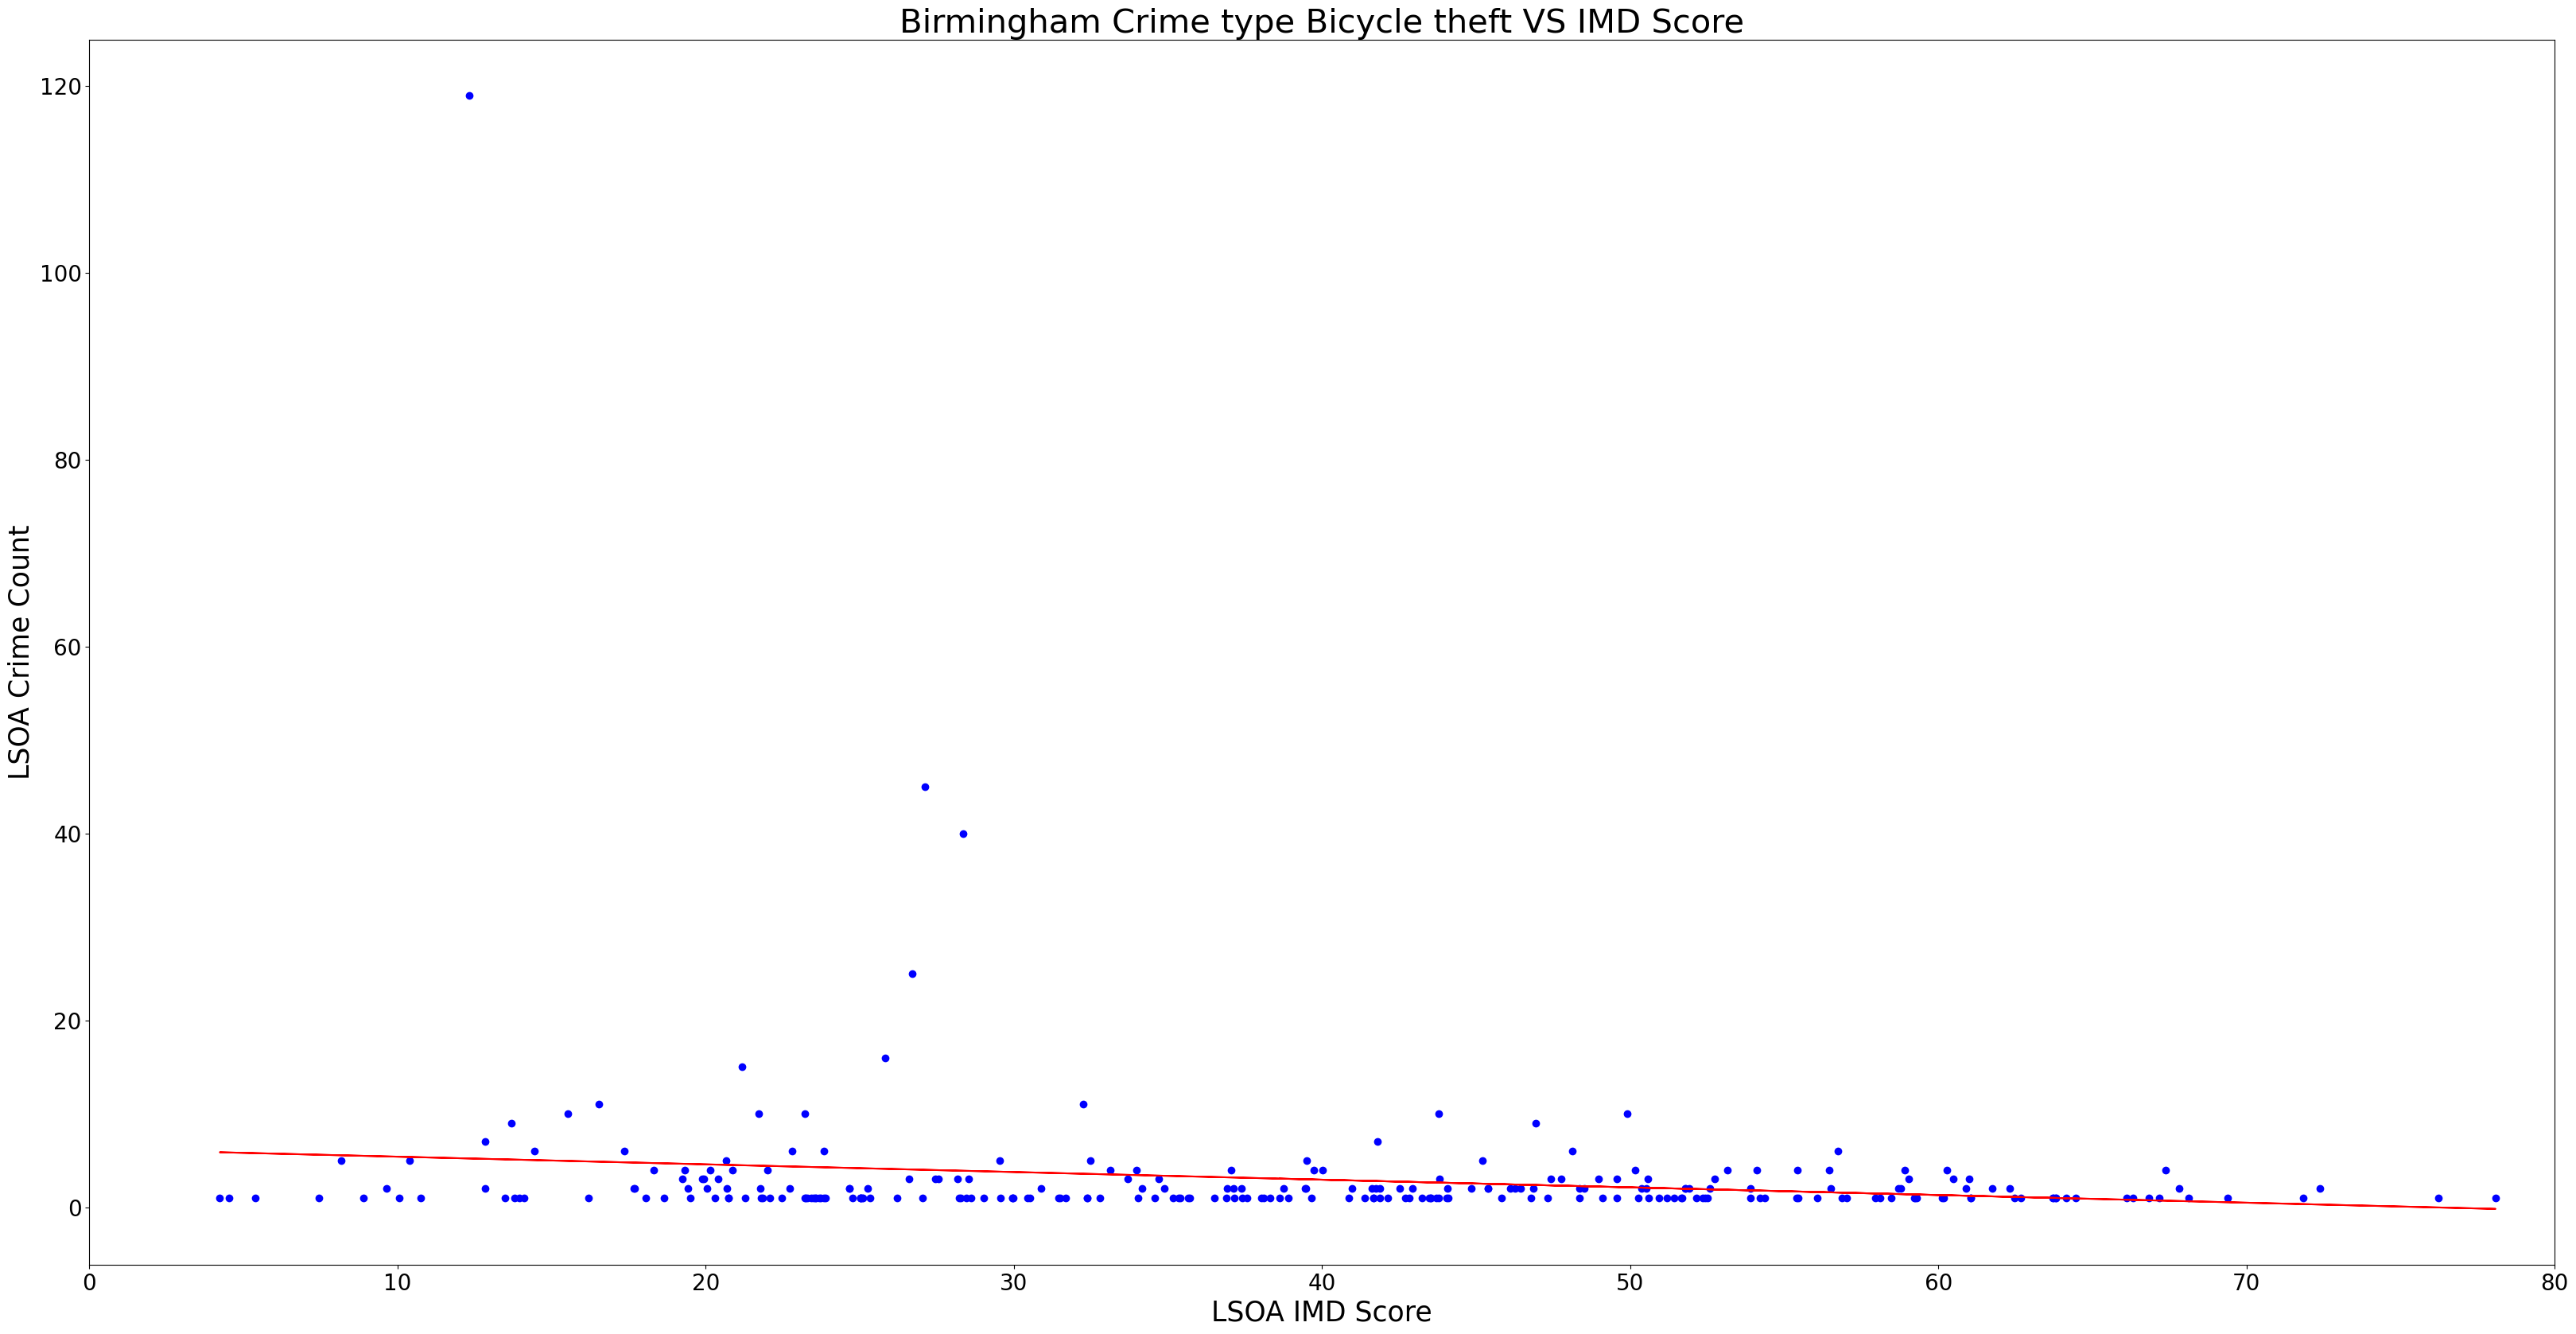

The Pearson Coerrelation Coefficient, r = 0.06848128252050978
The Coefficient of Determination r-saqured = 0.004689686055653878


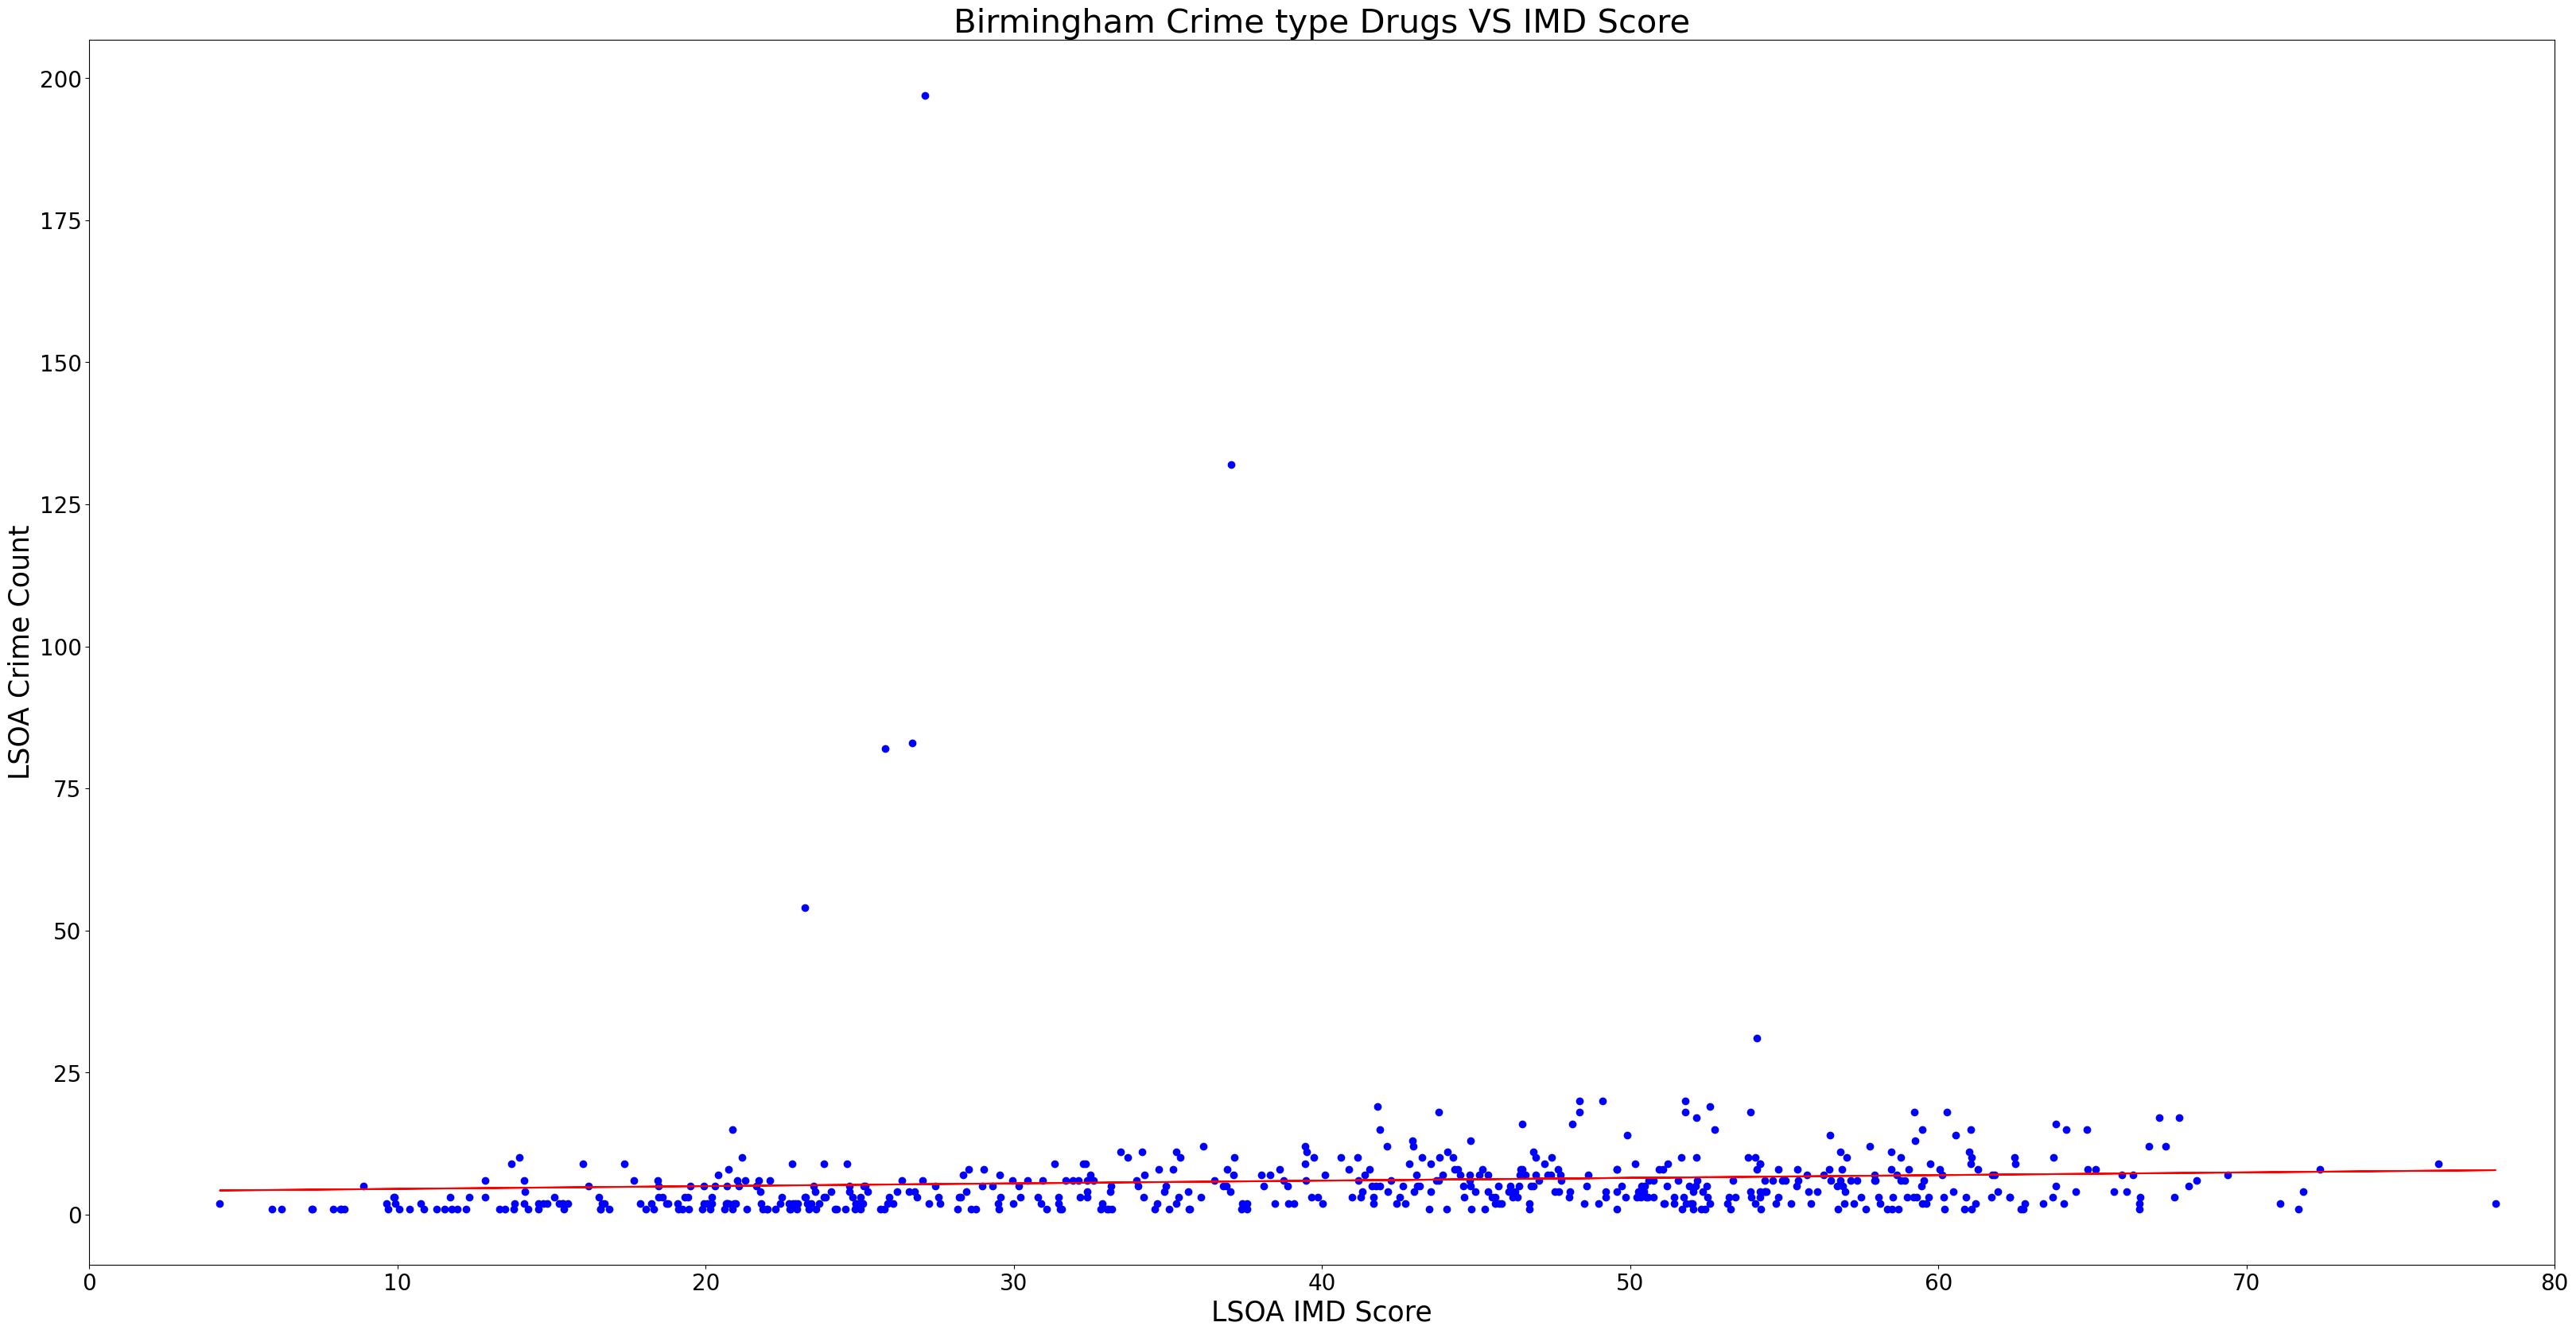

The Pearson Coerrelation Coefficient, r = -0.0726398649237411
The Coefficient of Determination r-saqured = 0.005276549976139352


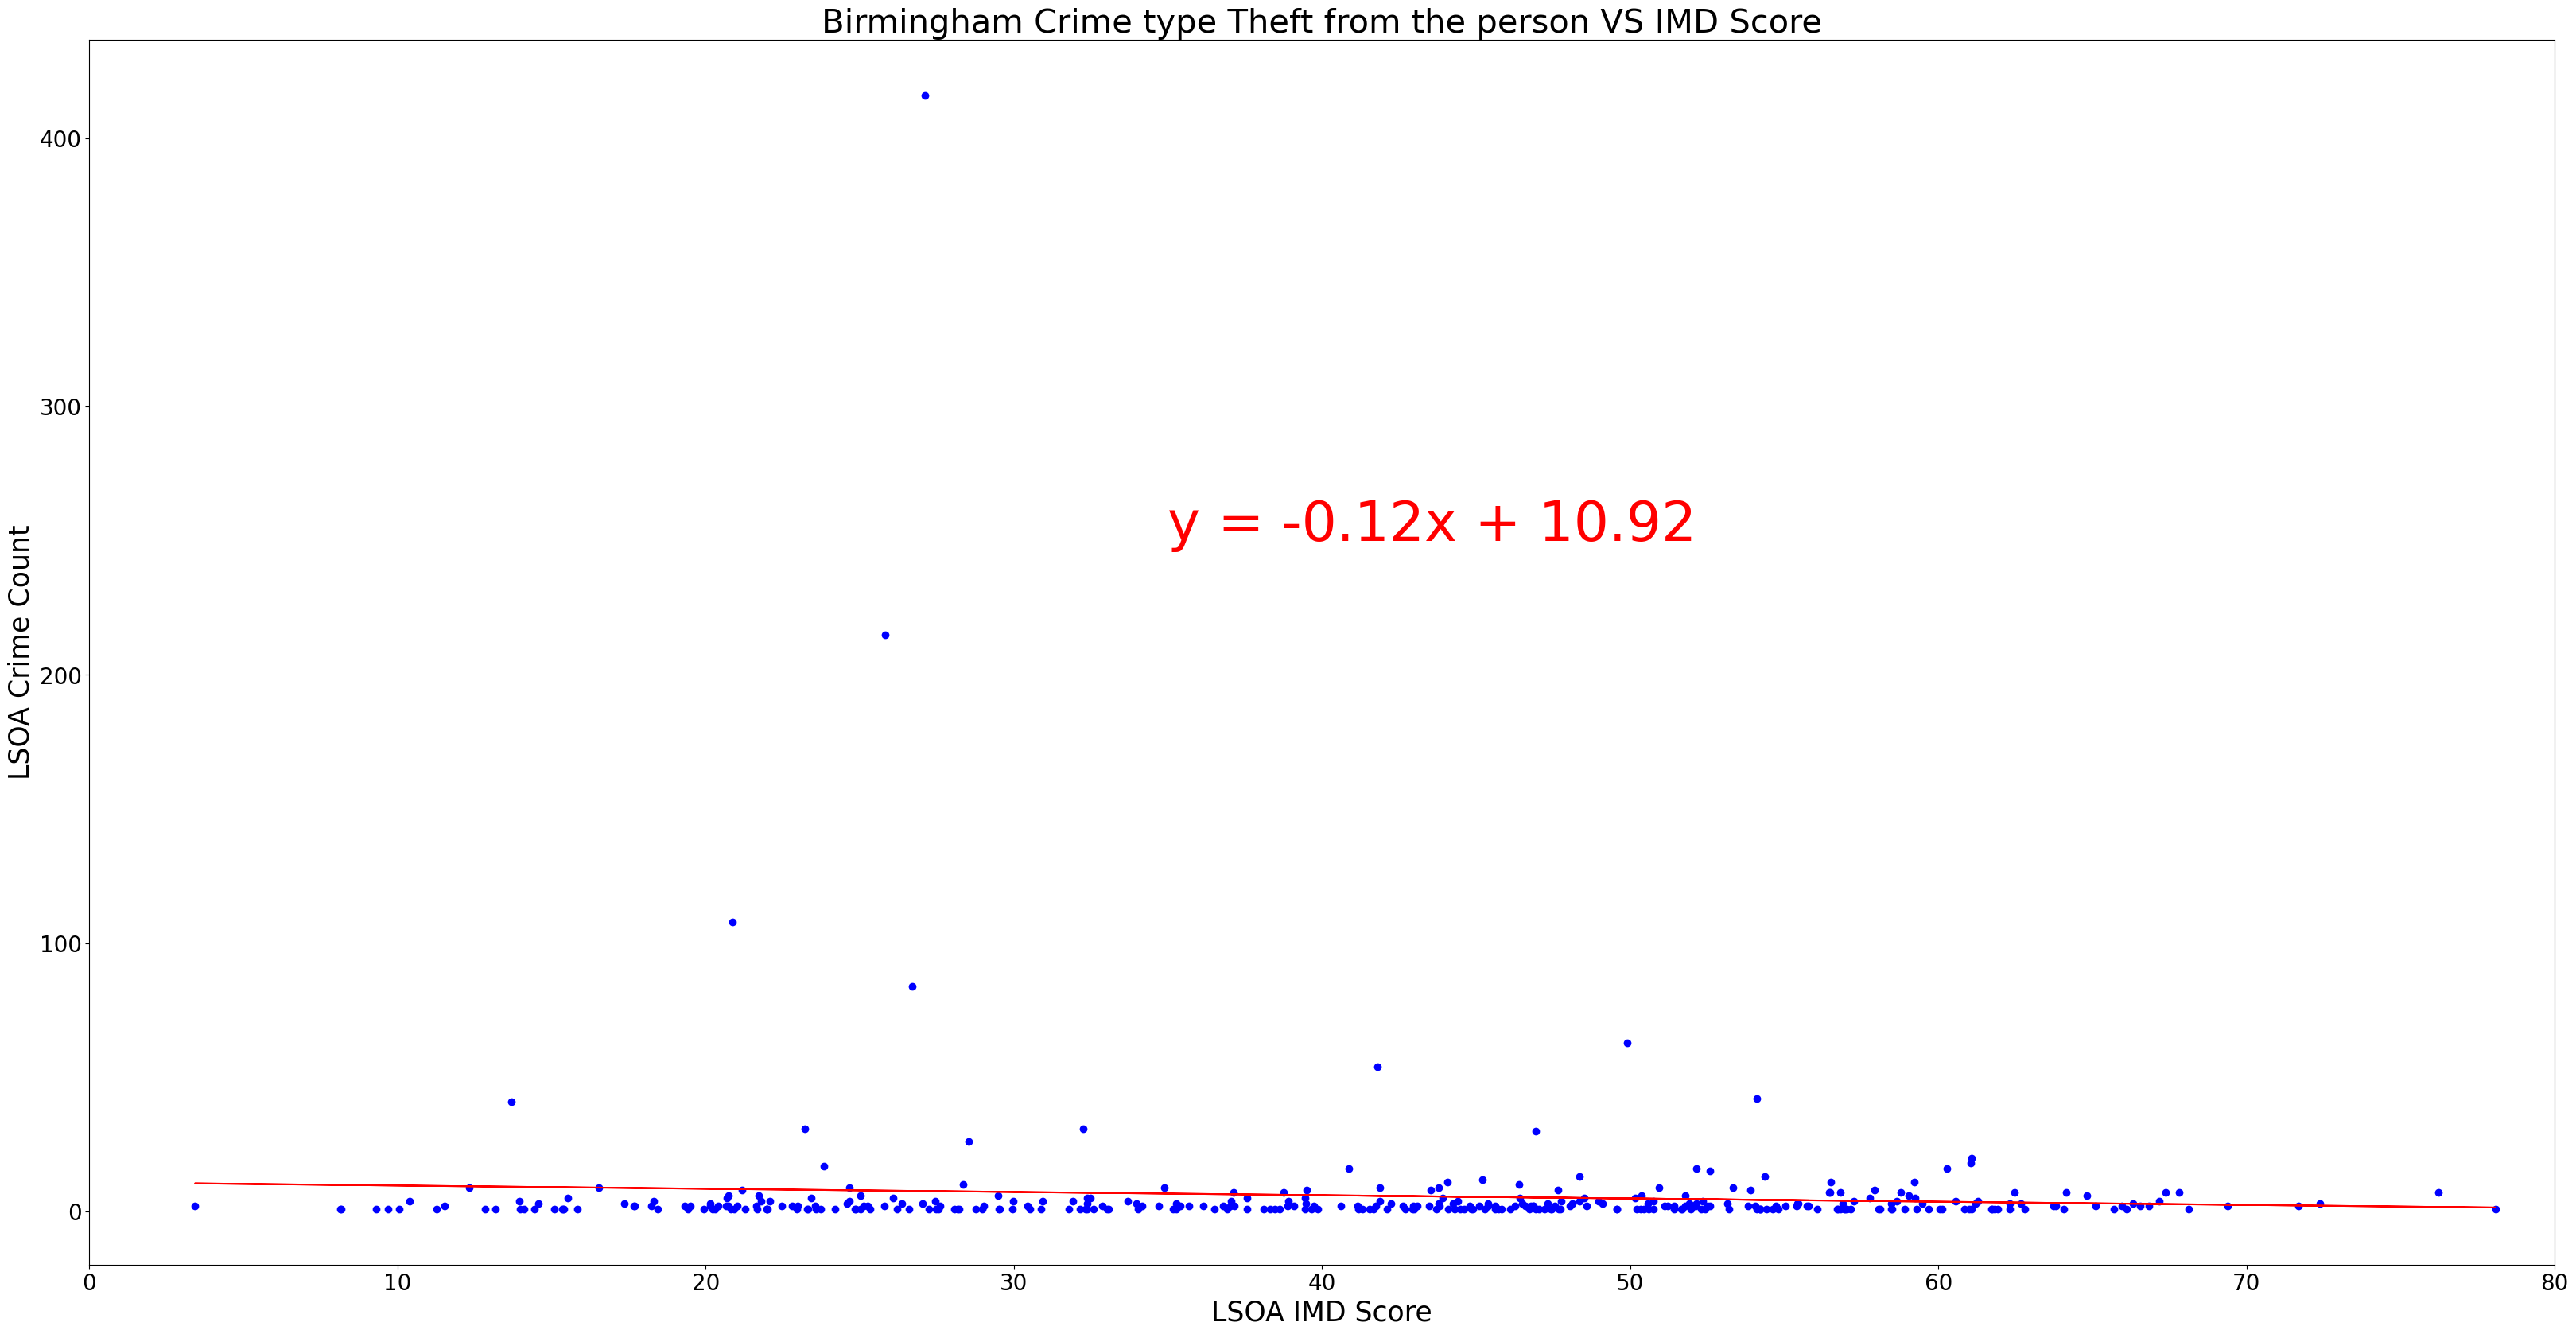

The Pearson Coerrelation Coefficient, r = -0.11263857364414184
The Coefficient of Determination r-saqured = 0.012687448272586766


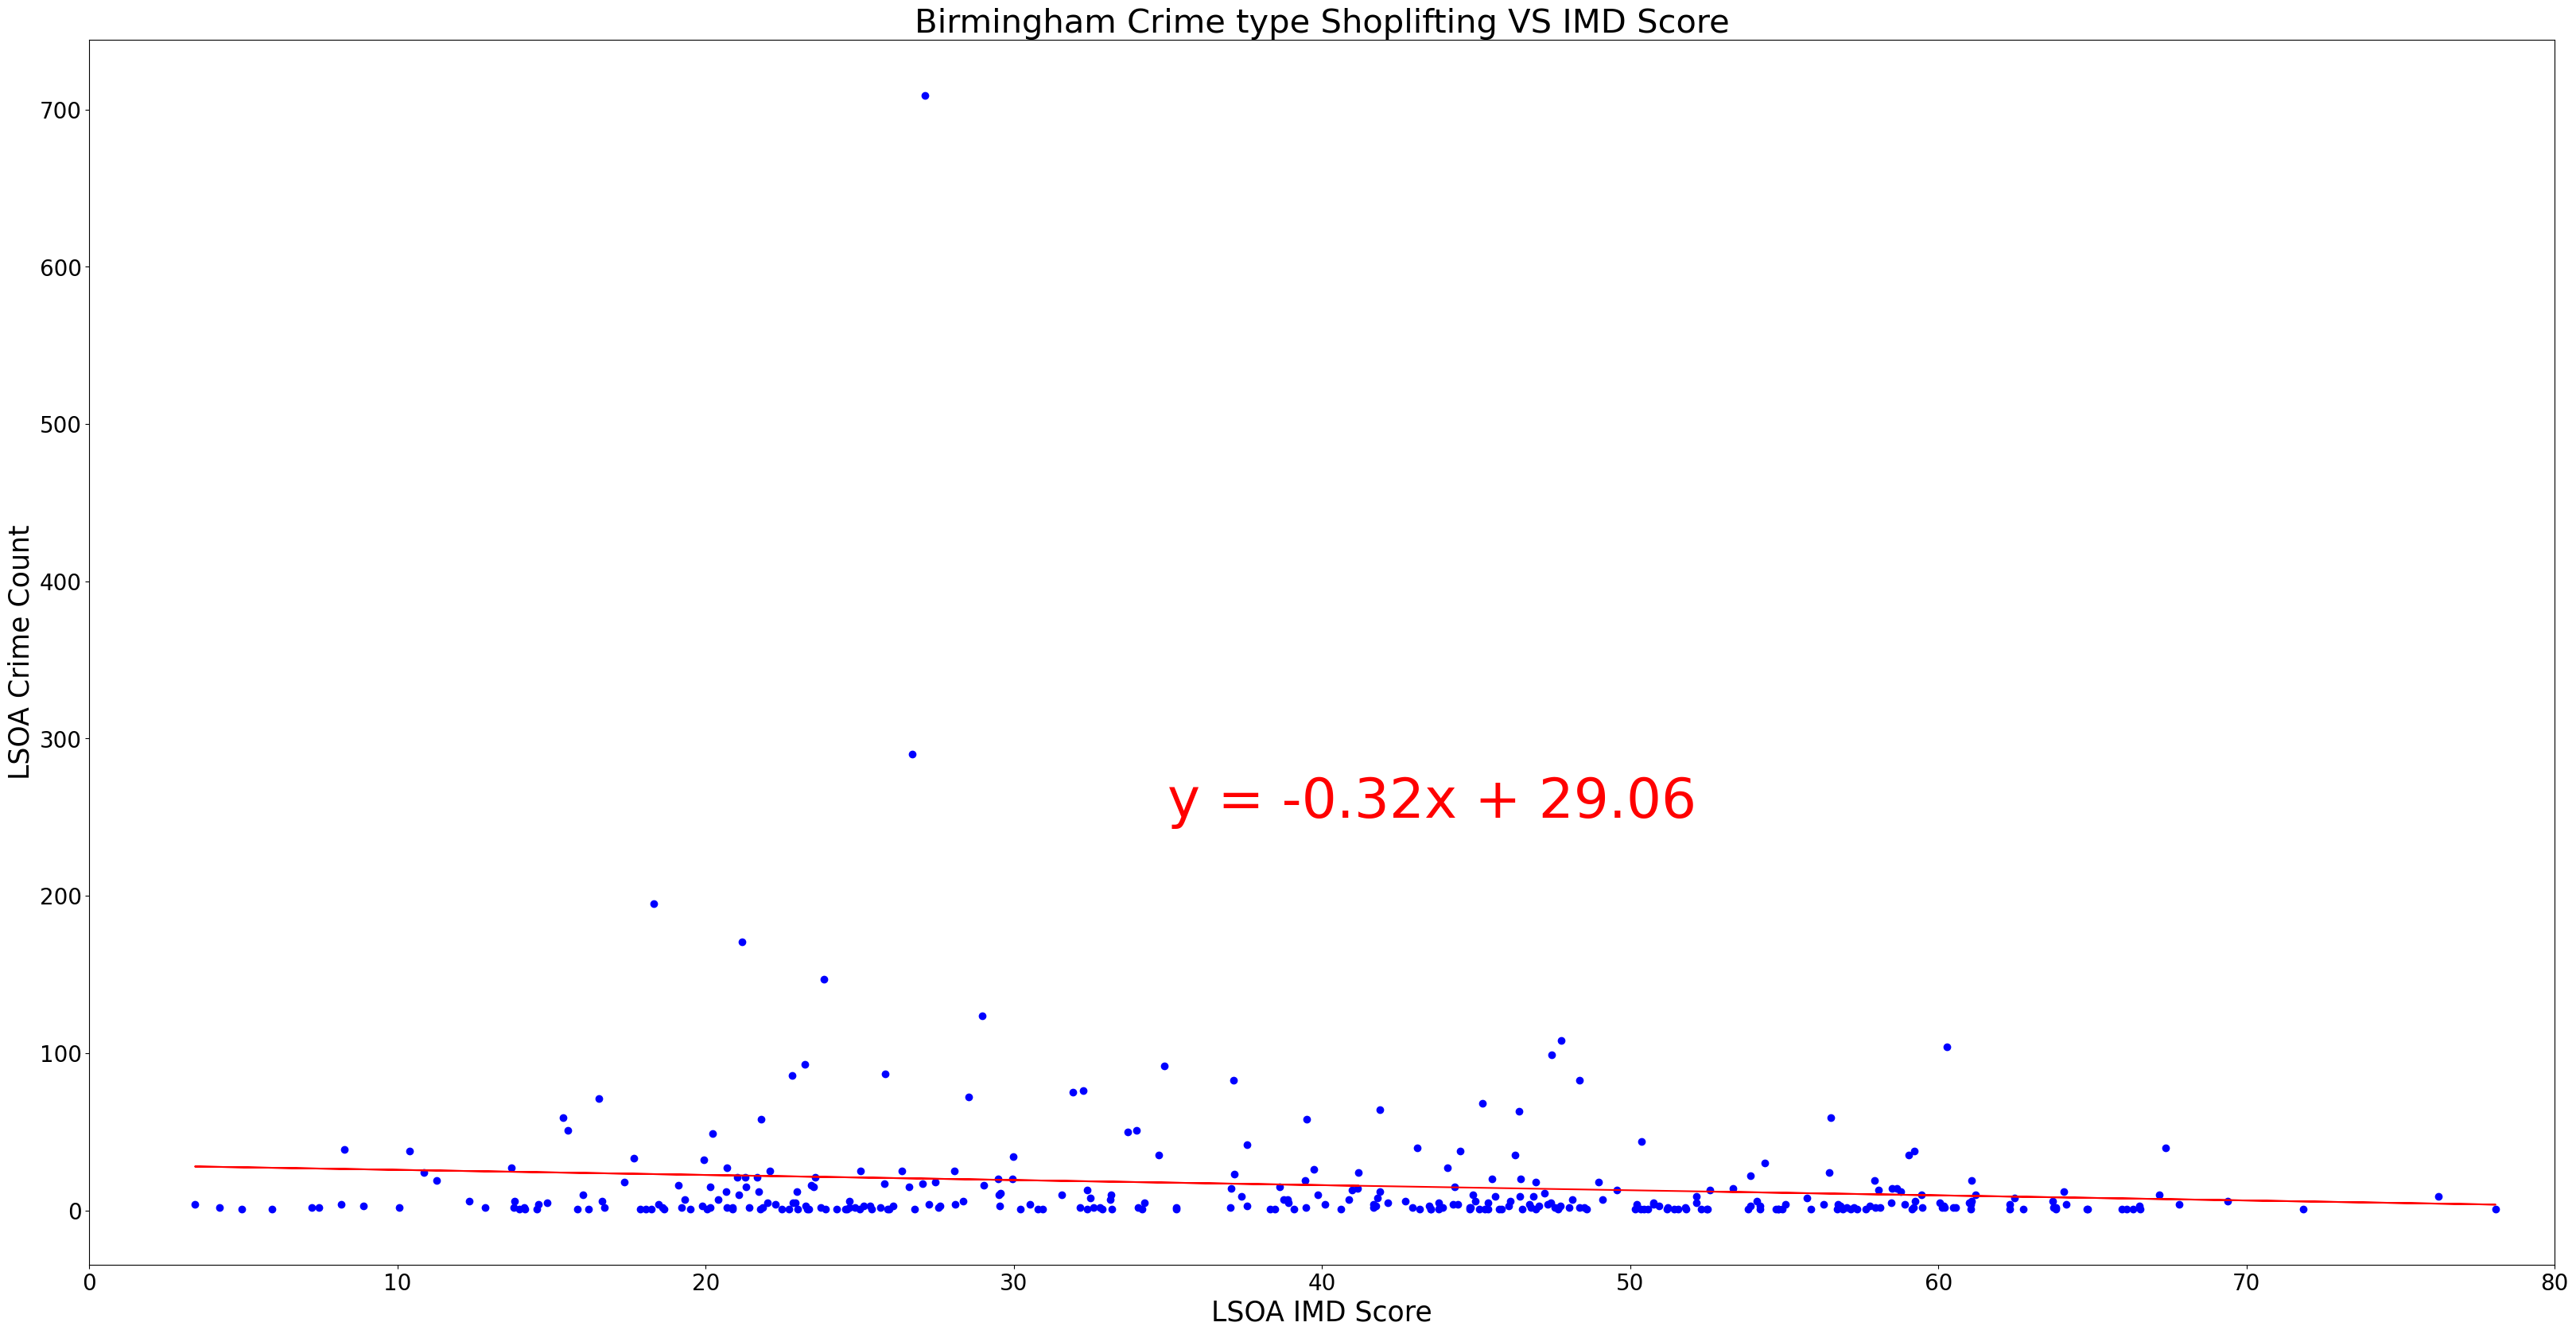

In [30]:

crime_type = ['Anti-social behaviour','Vehicle crime','Burglary','Criminal damage and arson','Violence and sexual offences',\
               'Possession of weapons','Public order','Robbery','Other theft','Other crime','Bicycle theft','Drugs',\
                'Theft from the person','Shoplifting']

for crime in crime_type:
     
     crime_df = Police_IMD_Winter.loc[Police_IMD_Winter["Crime type"]==crime]
     f = {"LSOA name_x": "first","LSOA code": "count", "Index of Multiple Deprivation (IMD) Score":'first'}
     LSOA_crime_type_df = crime_df.groupby(["LSOA code"]).agg(f)
     
     x_axis = LSOA_crime_type_df["Index of Multiple Deprivation (IMD) Score"]
     y_axis = LSOA_crime_type_df["LSOA code"]
     plt.title(f"Birmingham Crime type {crime} VS IMD Score", fontsize=30)
     plt.scatter(x_axis, y_axis, marker="o", color="blue")
     #plt.plot(x_axis, y_fit)
     plt.rcParams["figure.figsize"] = (40,20)
     plt.xlim(0,80)
     # plt.ylim(0, 400)
     plt.xticks(fontsize=20)
     plt.yticks(fontsize=20)
     plt.xlabel("LSOA IMD Score", fontsize=25)
     plt.ylabel("LSOA Crime Count", fontsize=25)
     if crime == 'Violence and sexual offences':
               plot_linear_regression(x_axis, y_axis, 'LSOA Crime Count',(35,1250))
     elif crime == 'Other crime':
               plot_linear_regression(x_axis, y_axis, 'LSOA Crime Count',(35,80))
     else:
               plot_linear_regression(x_axis, y_axis, 'LSOA Crime Count',(35,250))              
     plt.savefig(f"output/correlation_WINTER_{crime}_vs_IMD.png")
     plt.show()




### SUMMER

In [31]:
# Groupby LSOA -- SUMMER

f = {"LSOA name_x": "first","LSOA code": "count", "Index of Multiple Deprivation (IMD) Score":'first',\
     "Longitude": "first", "Latitude": "first"}
LSOA_crime_count_SUMMER = Police_IMD_Summer.groupby(["LSOA code"]).agg(f)


LSOA_crime_count_SUMMER

LSOA name_x  LSOA code  \
LSOA code                               
E01008881  Birmingham 067A        469   
E01008882  Birmingham 066A        242   
E01008883  Birmingham 078A        340   
E01008884  Birmingham 078B        377   
E01008885  Birmingham 076A        122   
...                    ...        ...   
E01033646  Birmingham 031I        487   
E01033647  Birmingham 058E        137   
E01033648  Birmingham 084F        352   
E01033649  Birmingham 058F        128   
E01033650  Birmingham 077F        251   

           Index of Multiple Deprivation (IMD) Score  Longitude   Latitude  
LSOA code                                                                   
E01008881                                     41.179  -1.809133  52.466198  
E01008882                                     59.693  -1.827175  52.467071  
E01008883                                     38.636  -1.823928  52.461987  
E01008884                                     44.315  -1.826609  52.464966  
E01008885                                     22.921  -1.807720  52.462690  
...                                              ...        ...        ...  
E01033646                                     64.138  -1.851777  52.513888  
E01033647                                     53.340  -1.850267  52.481117  
E01033648                                     55.778  -1.879837  52.452779  
E01033649                                     52.028  -1.846514  52.480618  
E01033650                                     52.488  -1.866826  52.463652  

[639 rows x 5 columns]

Month    Crime type                  
2020-08  Violence and sexual offences    4742
         Anti-social behaviour           2257
         Public order                    1005
         Criminal damage and arson        911
         Vehicle crime                    893
                                         ... 
2023-07  Drugs                            301
         Possession of weapons            253
         Other crime                      189
         Theft from the person            157
         Bicycle theft                     76
Name: Crime type, Length: 168, dtype: int64


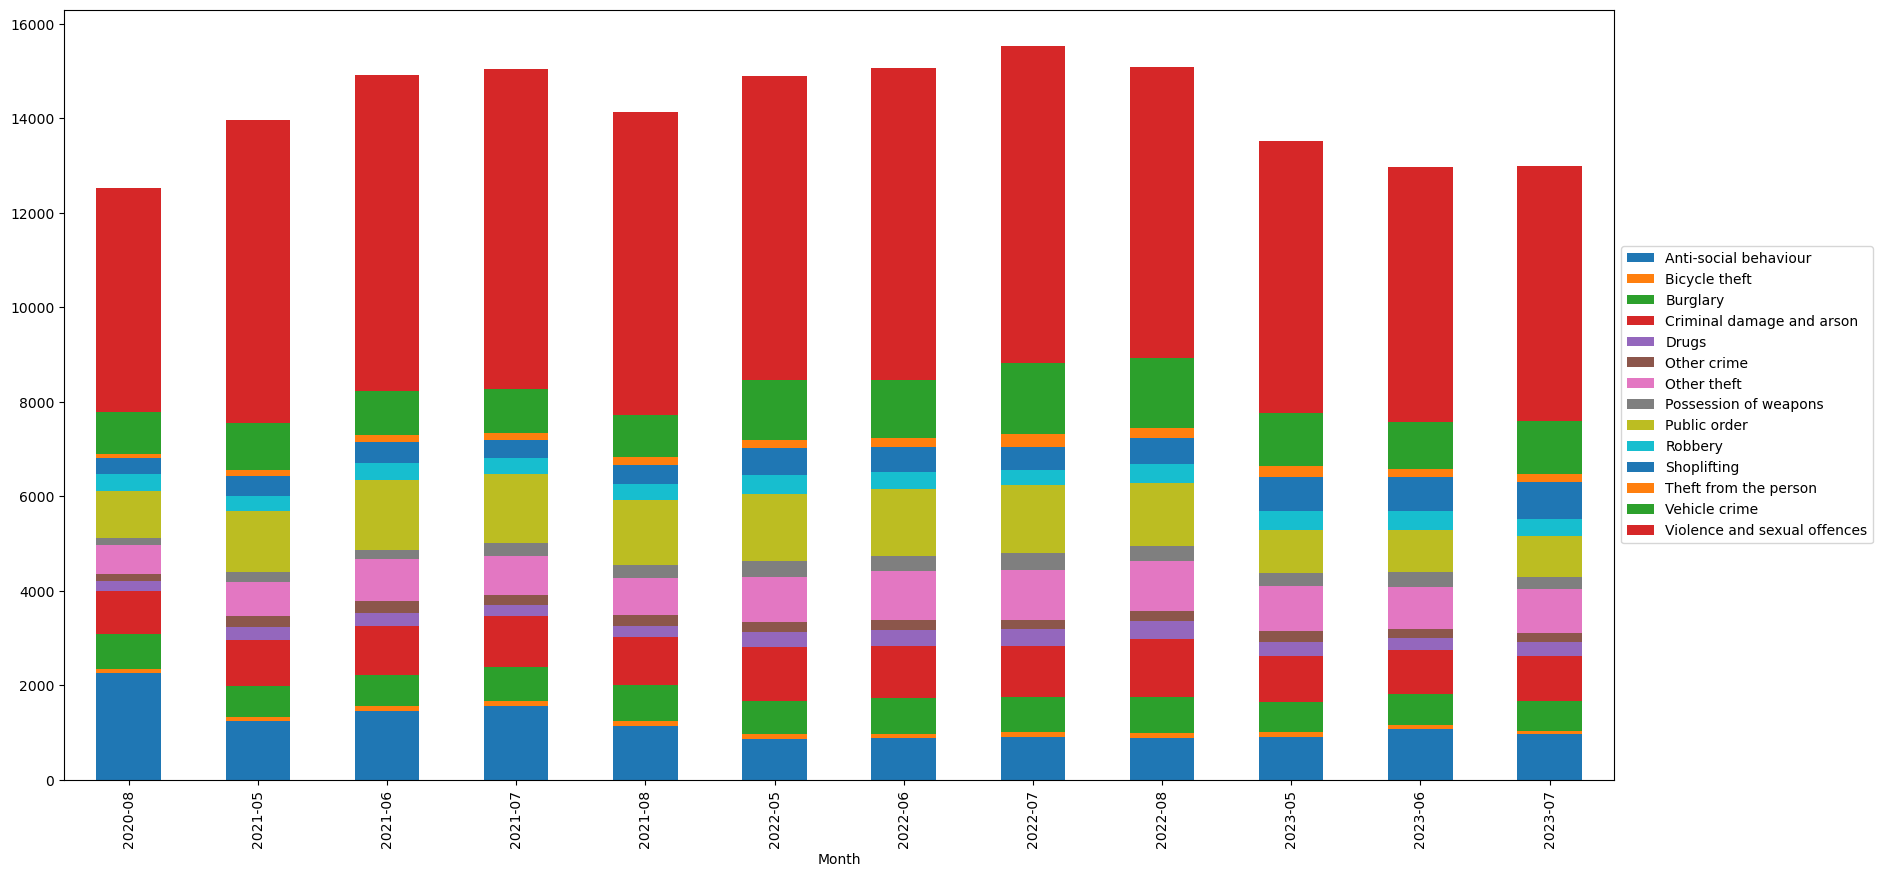

In [32]:
Summer_value_counts = Police_IMD_Summer.groupby(["Month"])["Crime type"].value_counts()
print(Summer_value_counts)


Summer_value_counts.unstack().plot.bar(stacked=True, figsize=(20,10))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig("output/Summer_value_counts.png")
plt.show()

The Pearson Coerrelation Coefficient, r = 0.20941407183954516
The Coefficient of Determination r-saqured = 0.04385425348441818


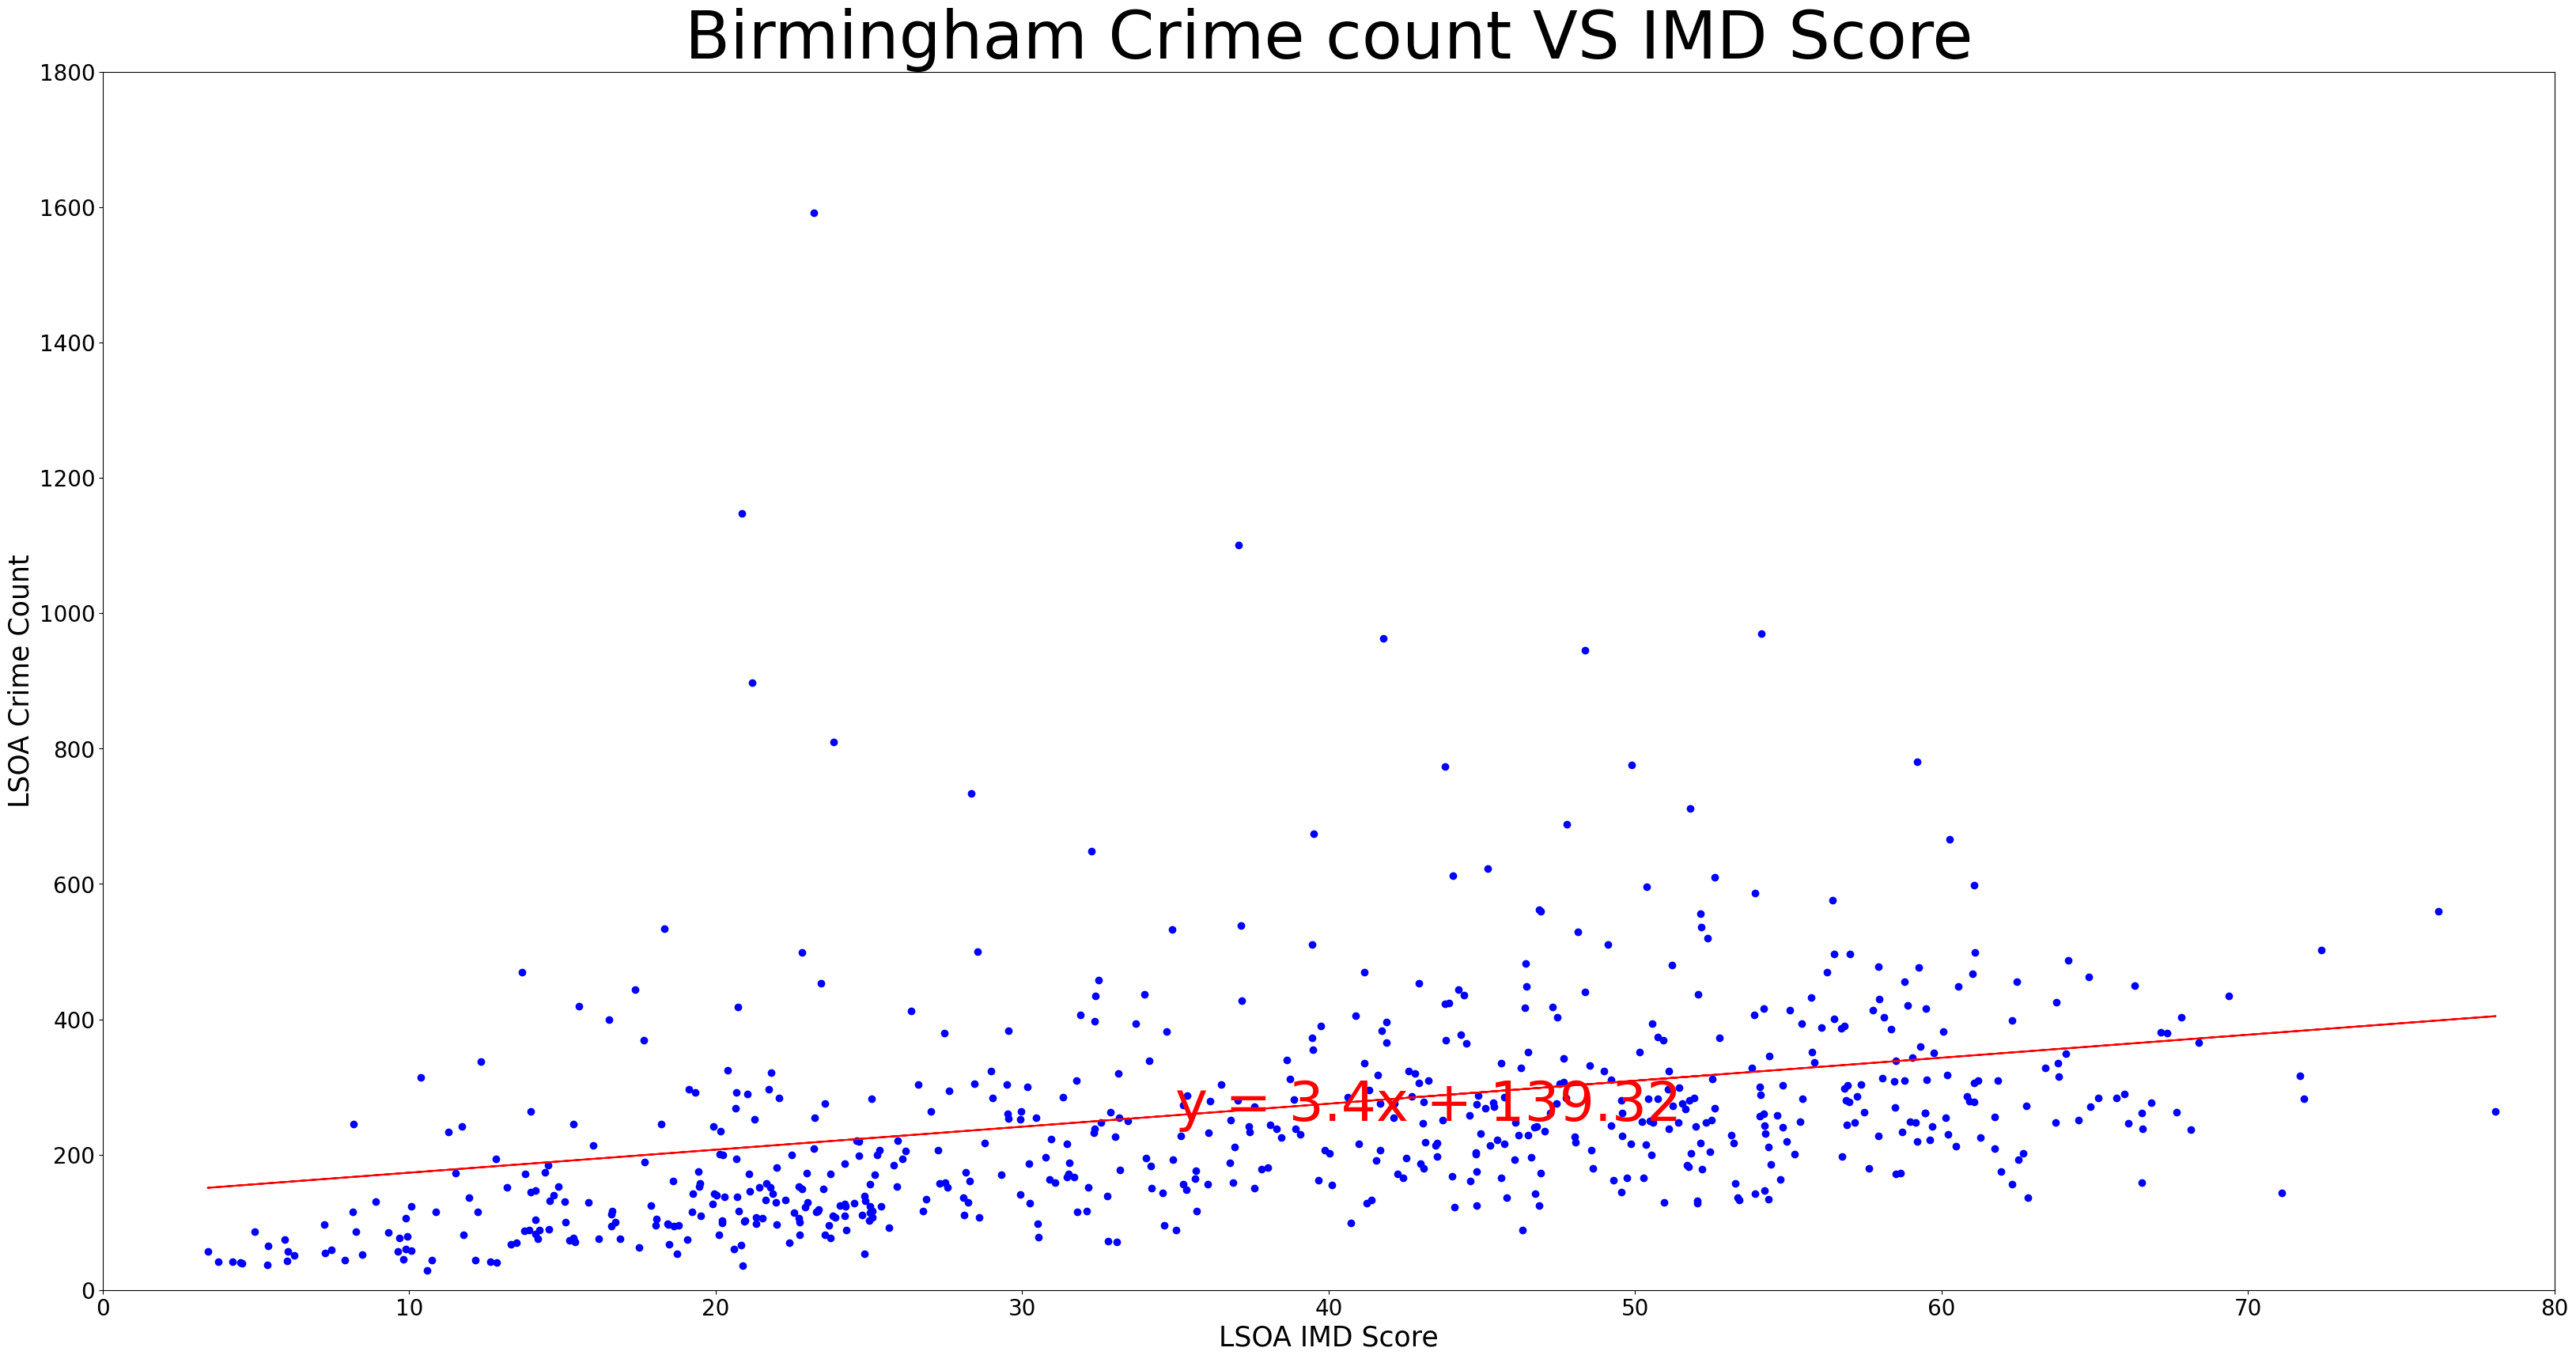

In [33]:

y_axis = LSOA_crime_count_SUMMER["LSOA code"]
x_axis = LSOA_crime_count_SUMMER["Index of Multiple Deprivation (IMD) Score"]

plt.title("Birmingham Crime count VS IMD Score", fontsize=60)
plt.scatter(x_axis, y_axis, marker="o", color="blue")
#plt.plot(x_axis, y_fit)
plt.rcParams["figure.figsize"] = (50,30)
plt.xlim(0,80)
plt.ylim(0, 1800)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("LSOA IMD Score", fontsize=25)
plt.ylabel("LSOA Crime Count", fontsize=25)
plot_linear_regression(x_axis, y_axis, 'LSOA Crime Count',(35,250))
plt.savefig("output/Summer_count.png")
plt.show()


The Pearson Coerrelation Coefficient, r = 0.23819170579290314
The Coefficient of Determination r-saqured = 0.05673528870853293


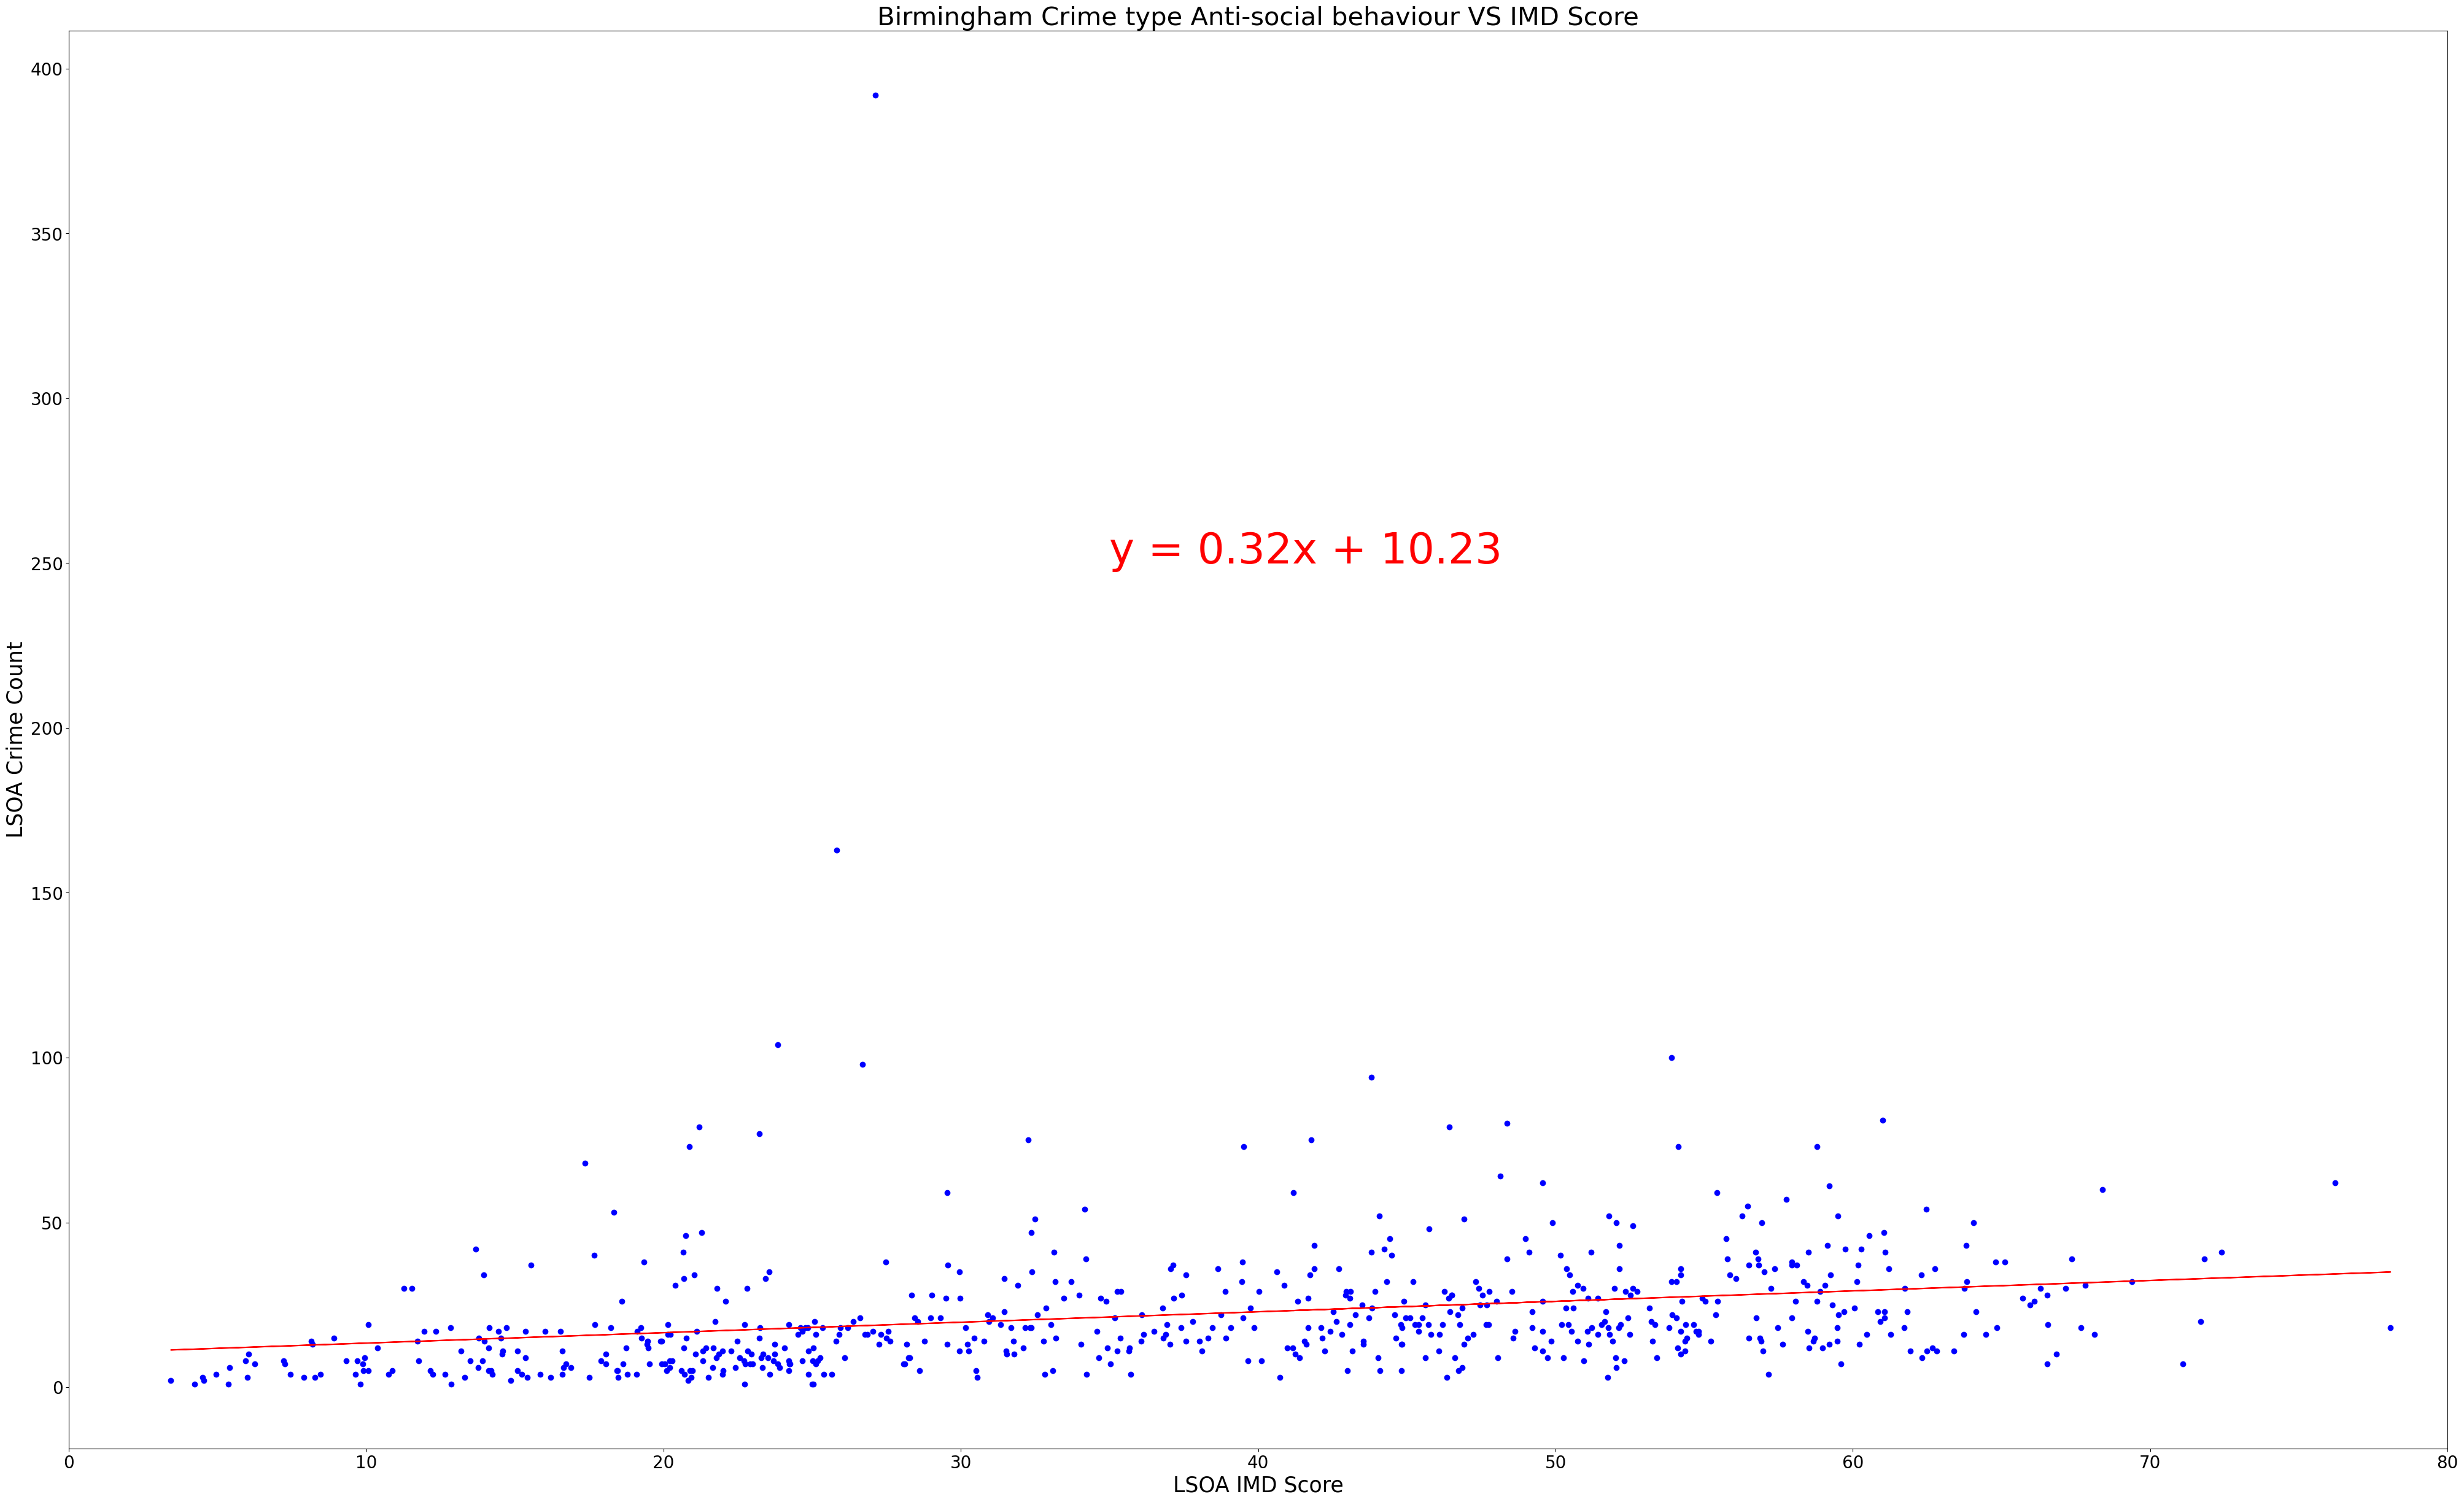

The Pearson Coerrelation Coefficient, r = 0.029048678622703605
The Coefficient of Determination r-saqured = 0.0008438257297251174


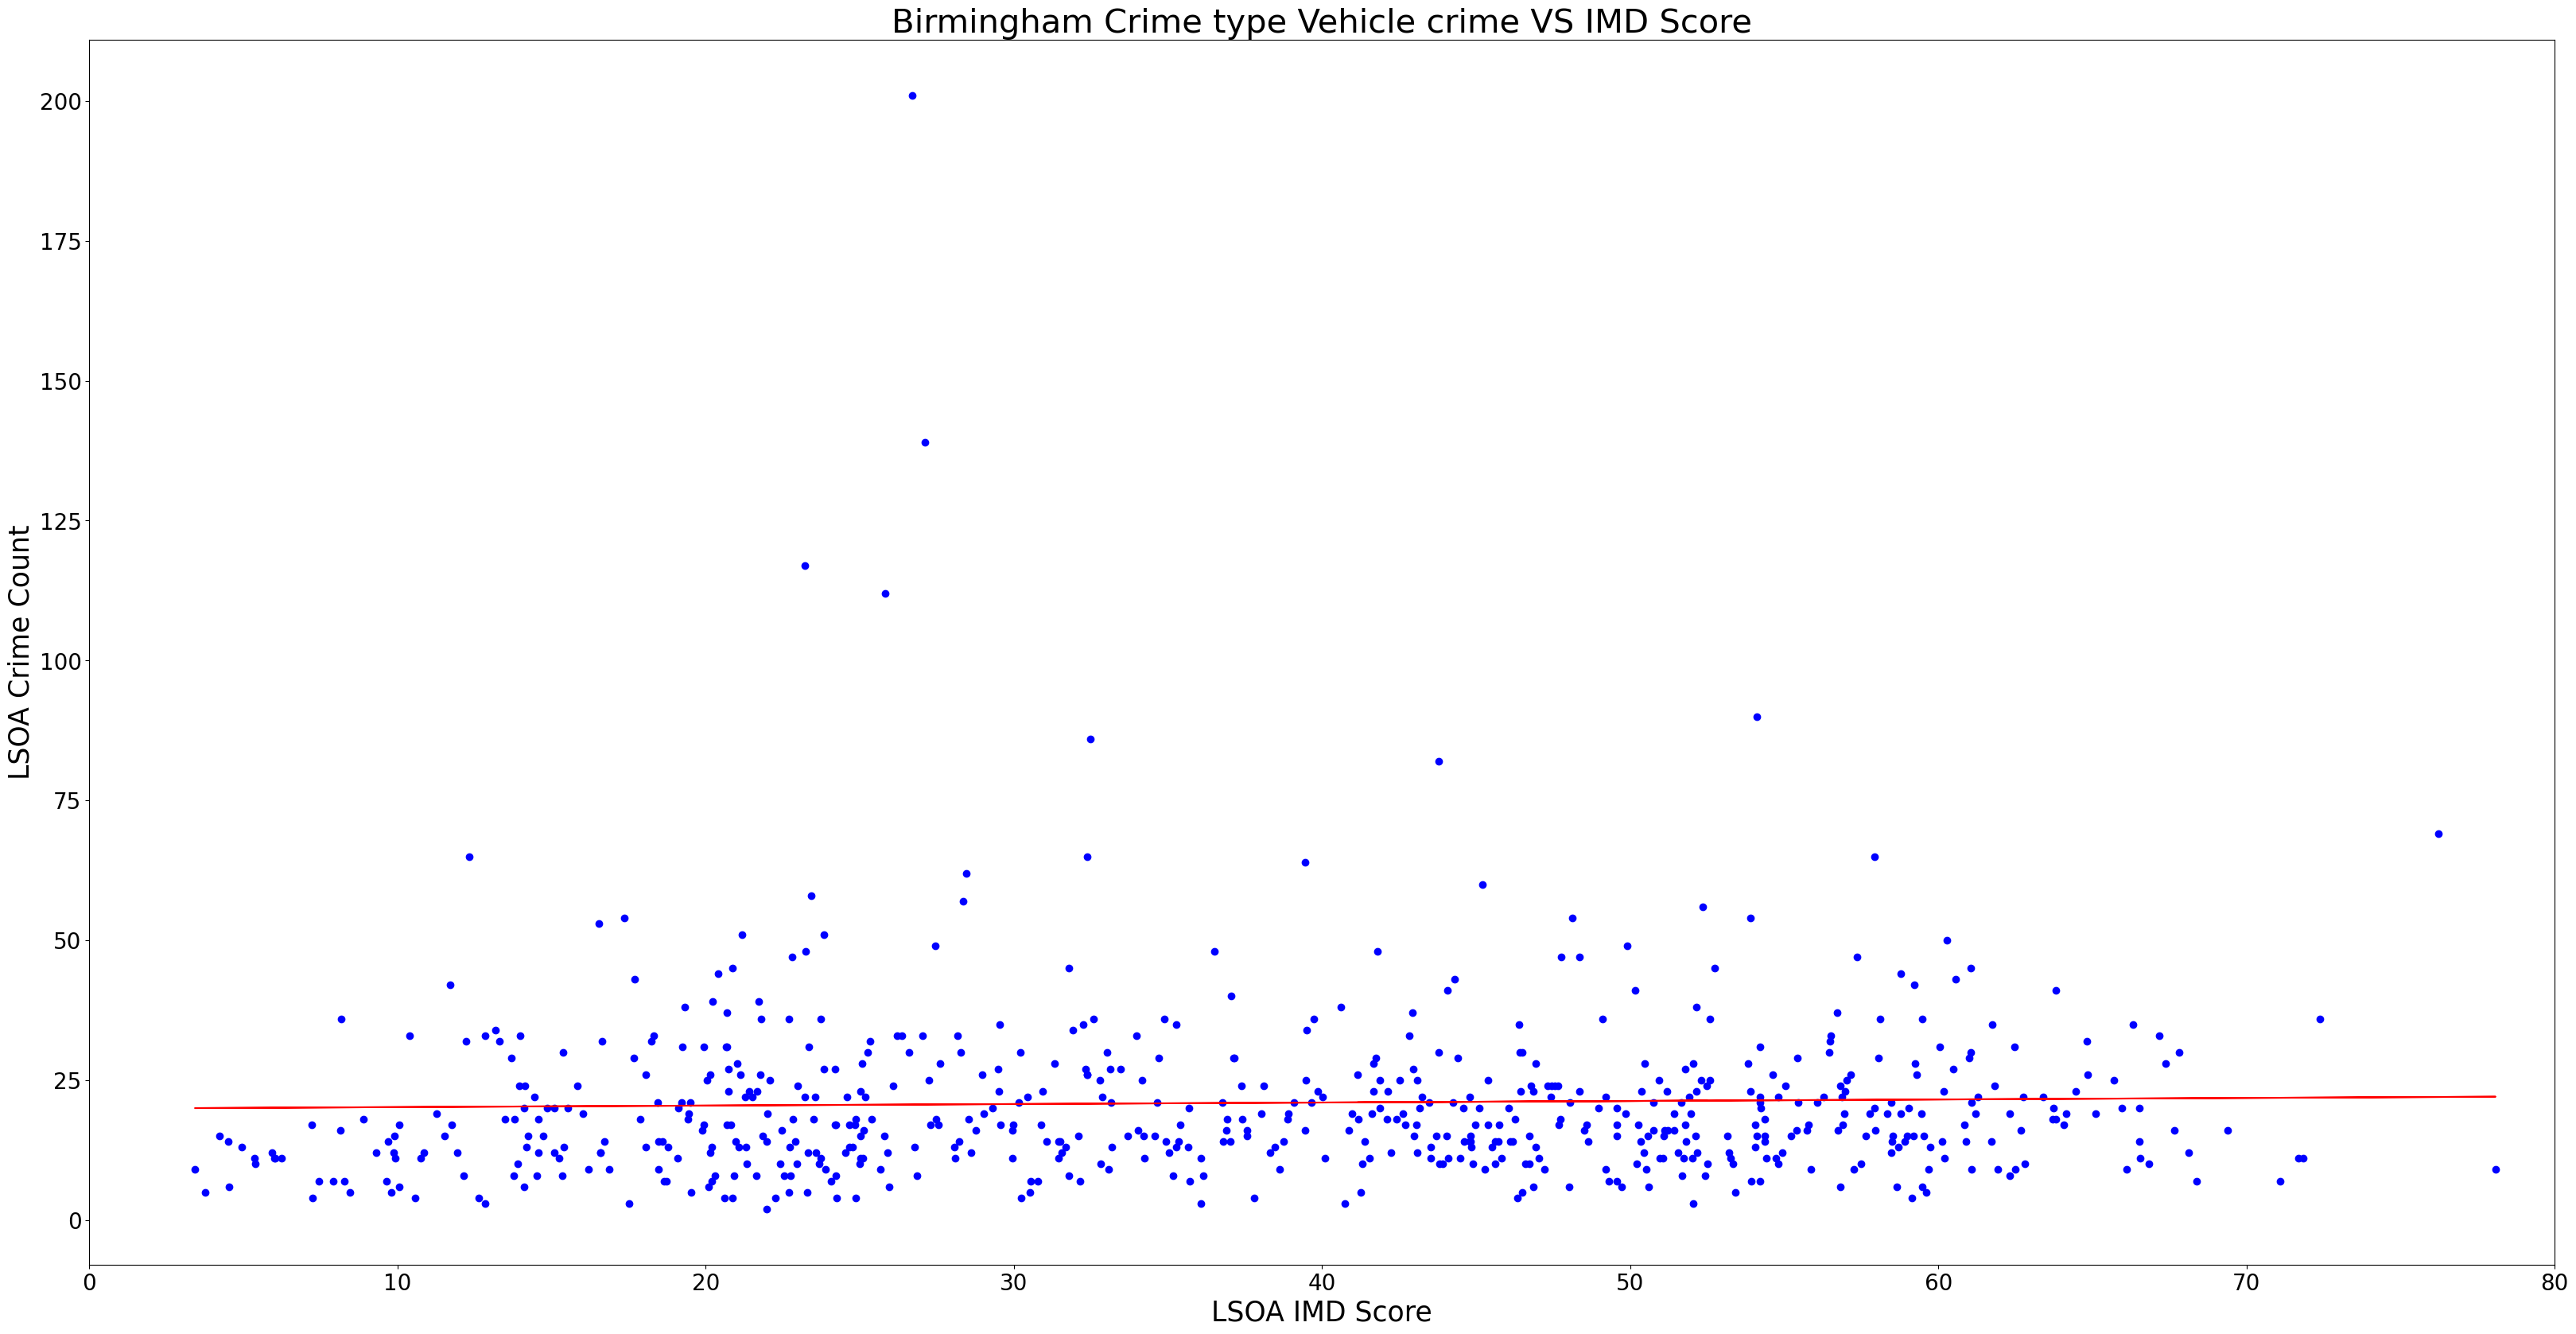

The Pearson Coerrelation Coefficient, r = 0.10484603851037705
The Coefficient of Determination r-saqured = 0.010992691791319467


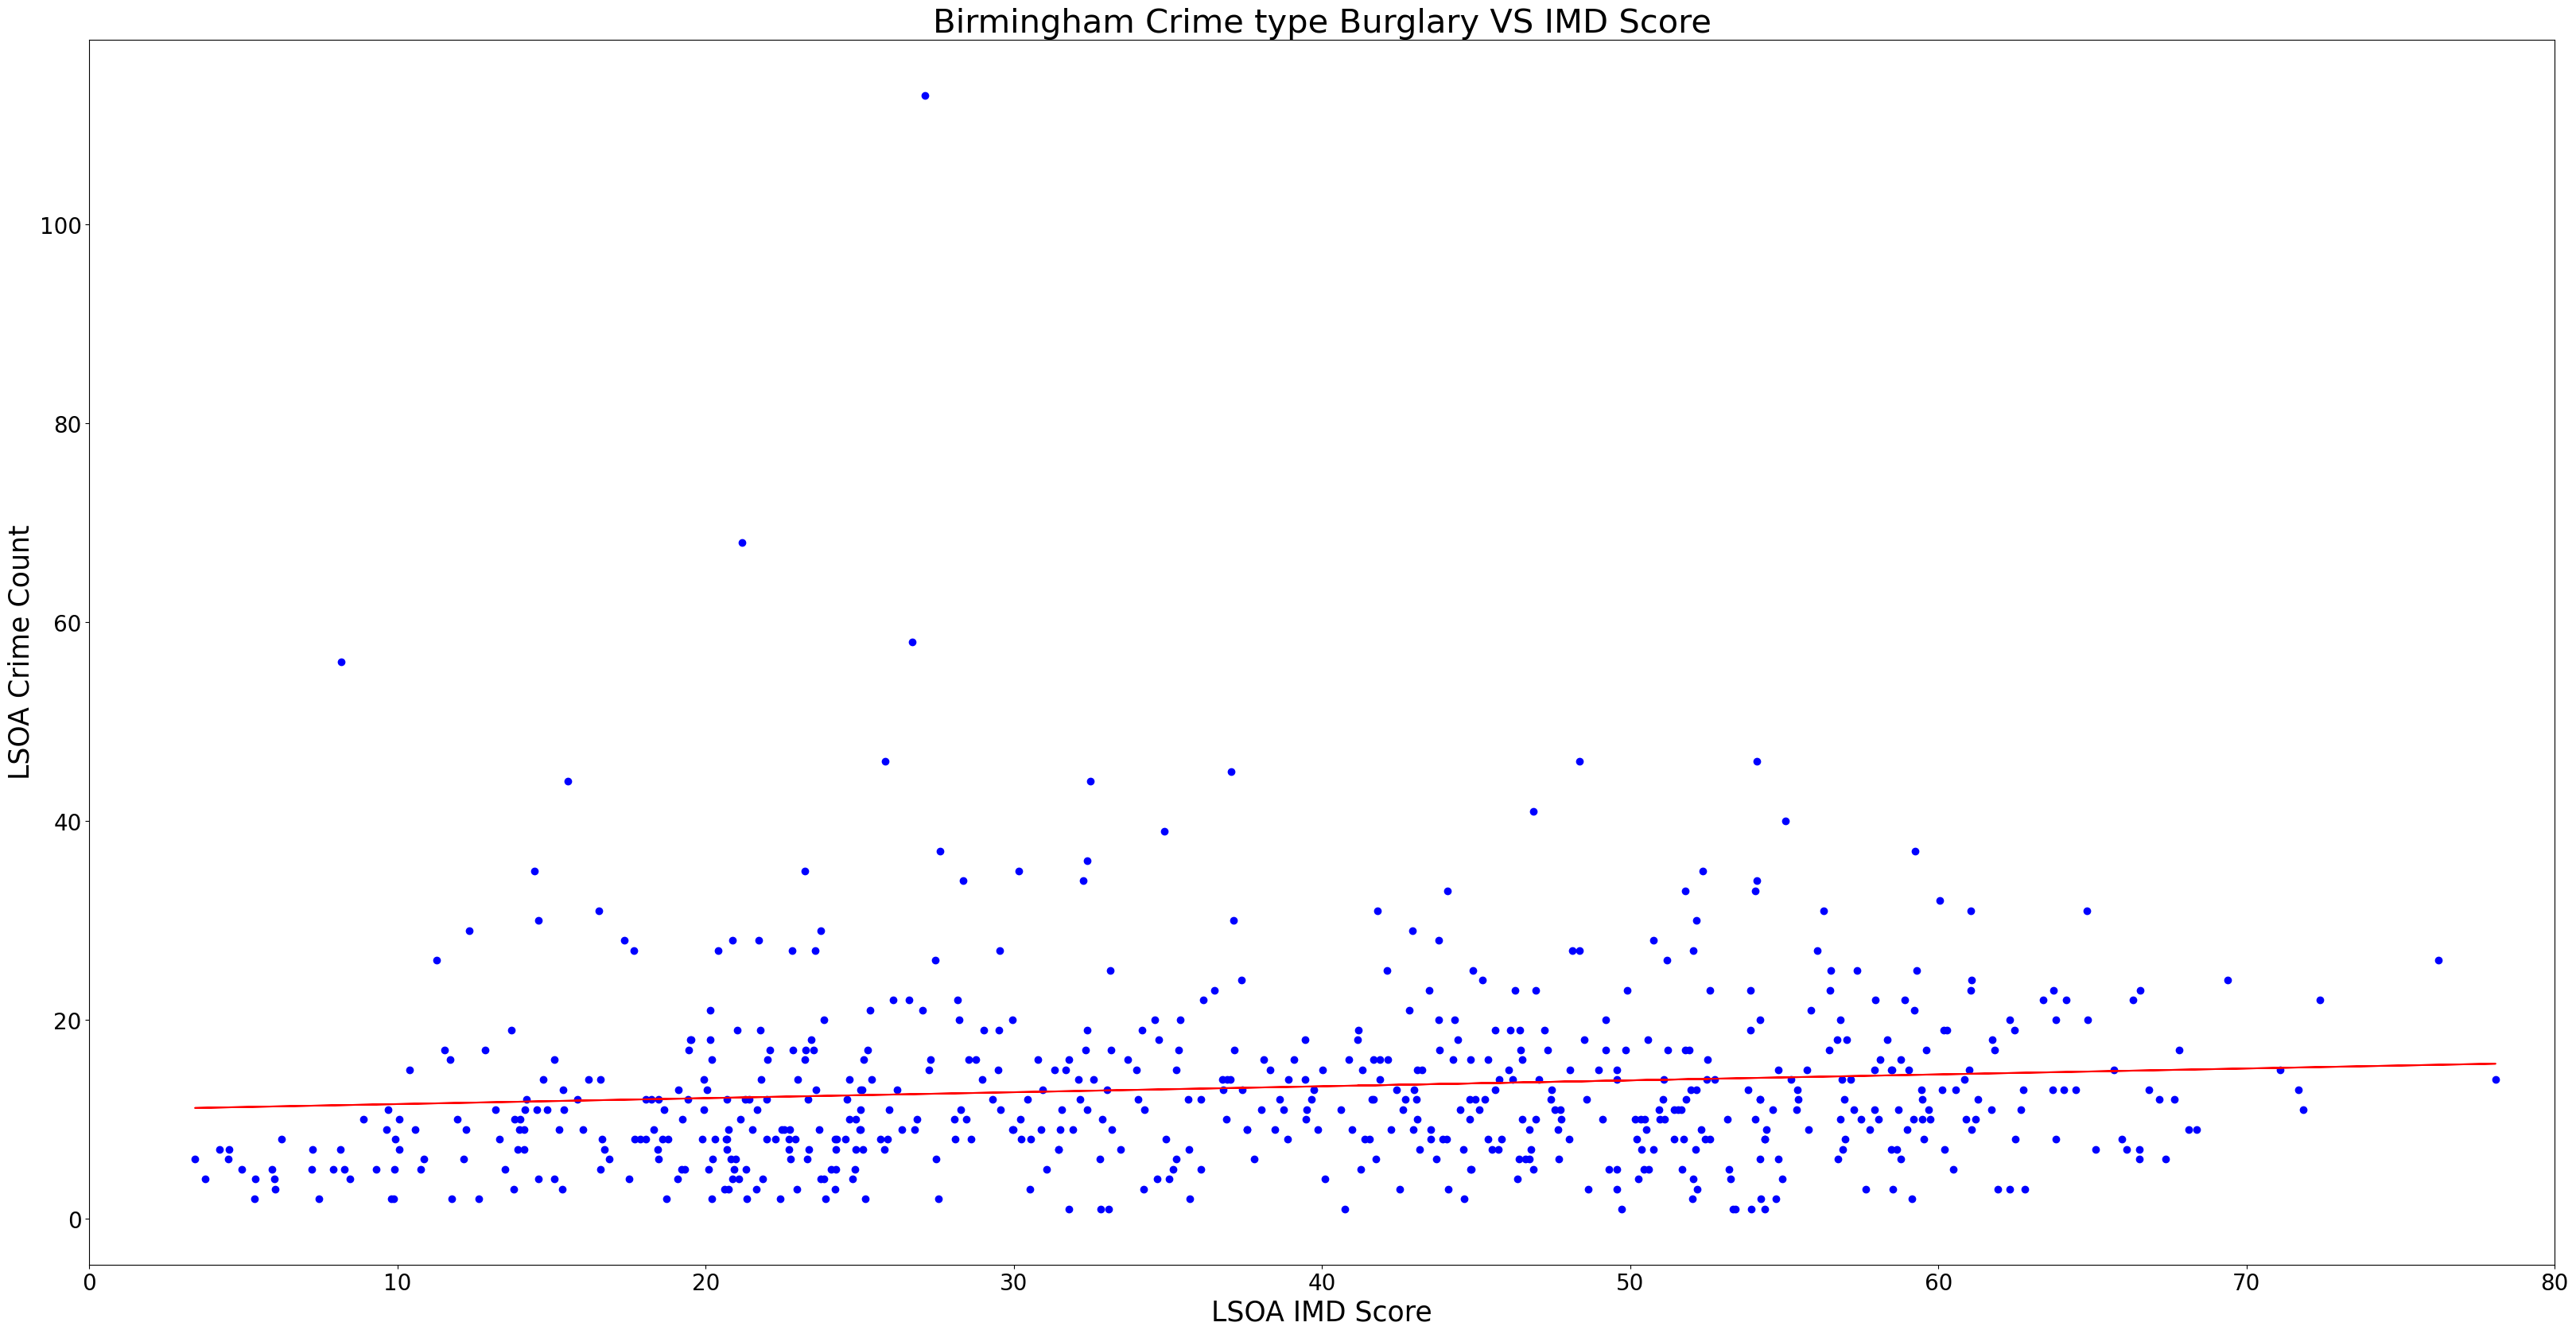

The Pearson Coerrelation Coefficient, r = 0.3985265725414424
The Coefficient of Determination r-saqured = 0.15882342902162958


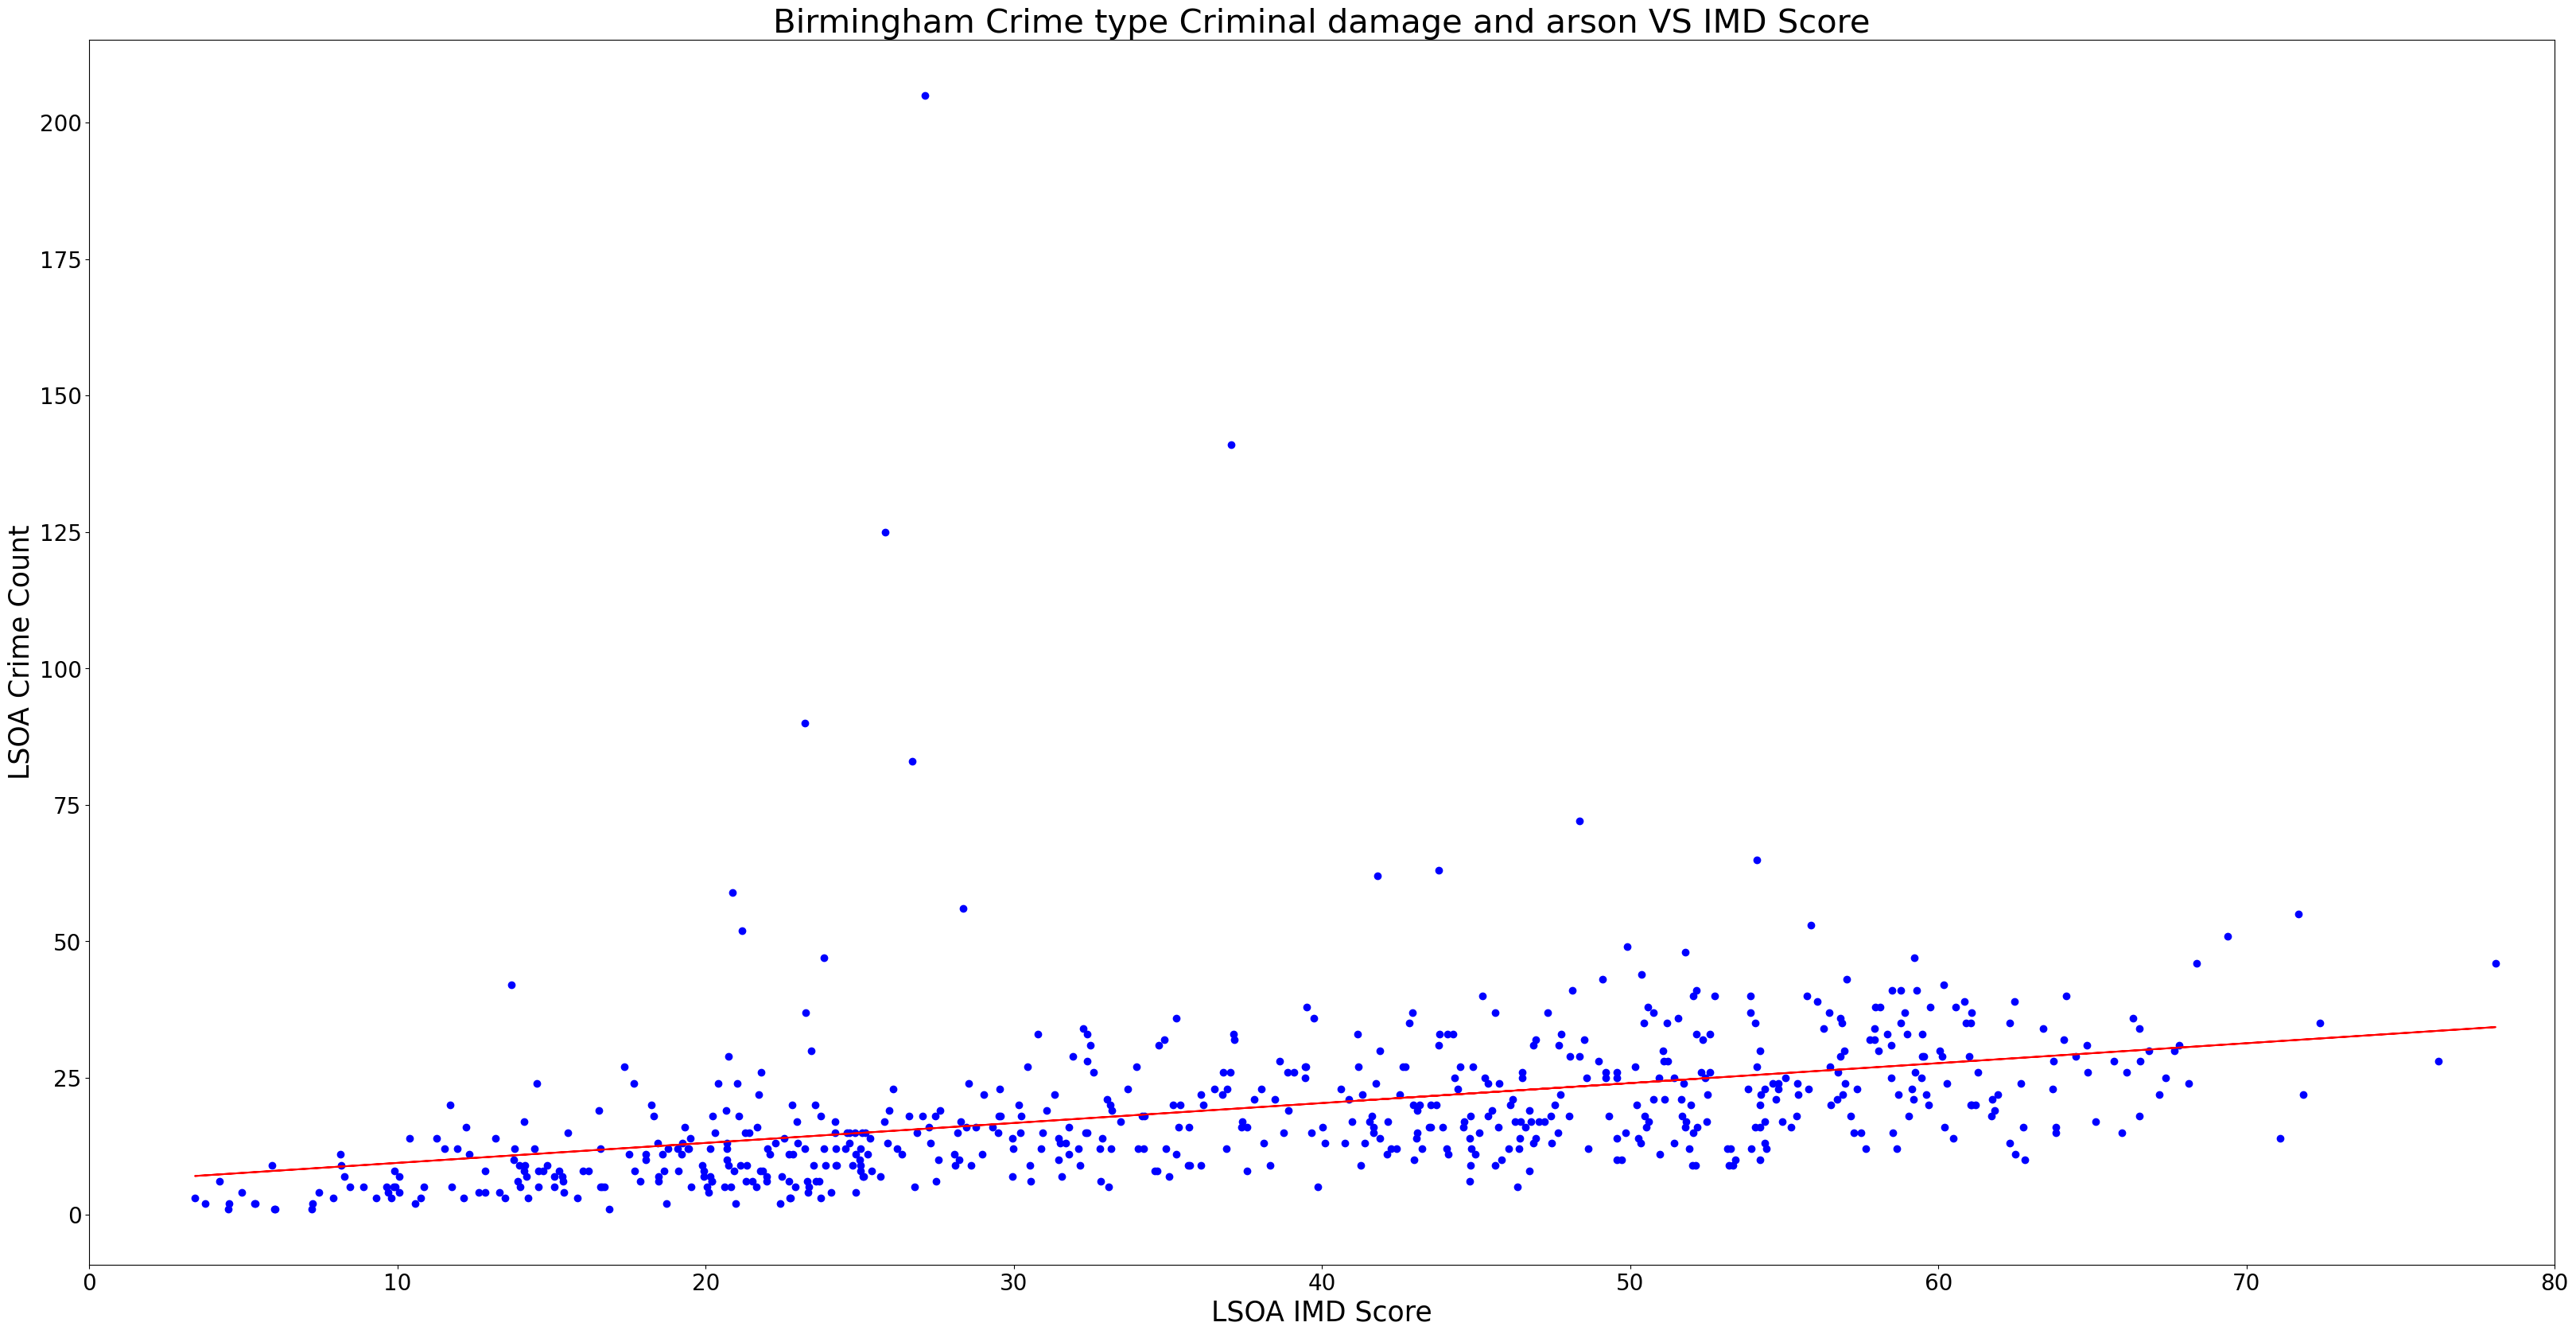

The Pearson Coerrelation Coefficient, r = 0.3410376743794862
The Coefficient of Determination r-saqured = 0.11630669534616844


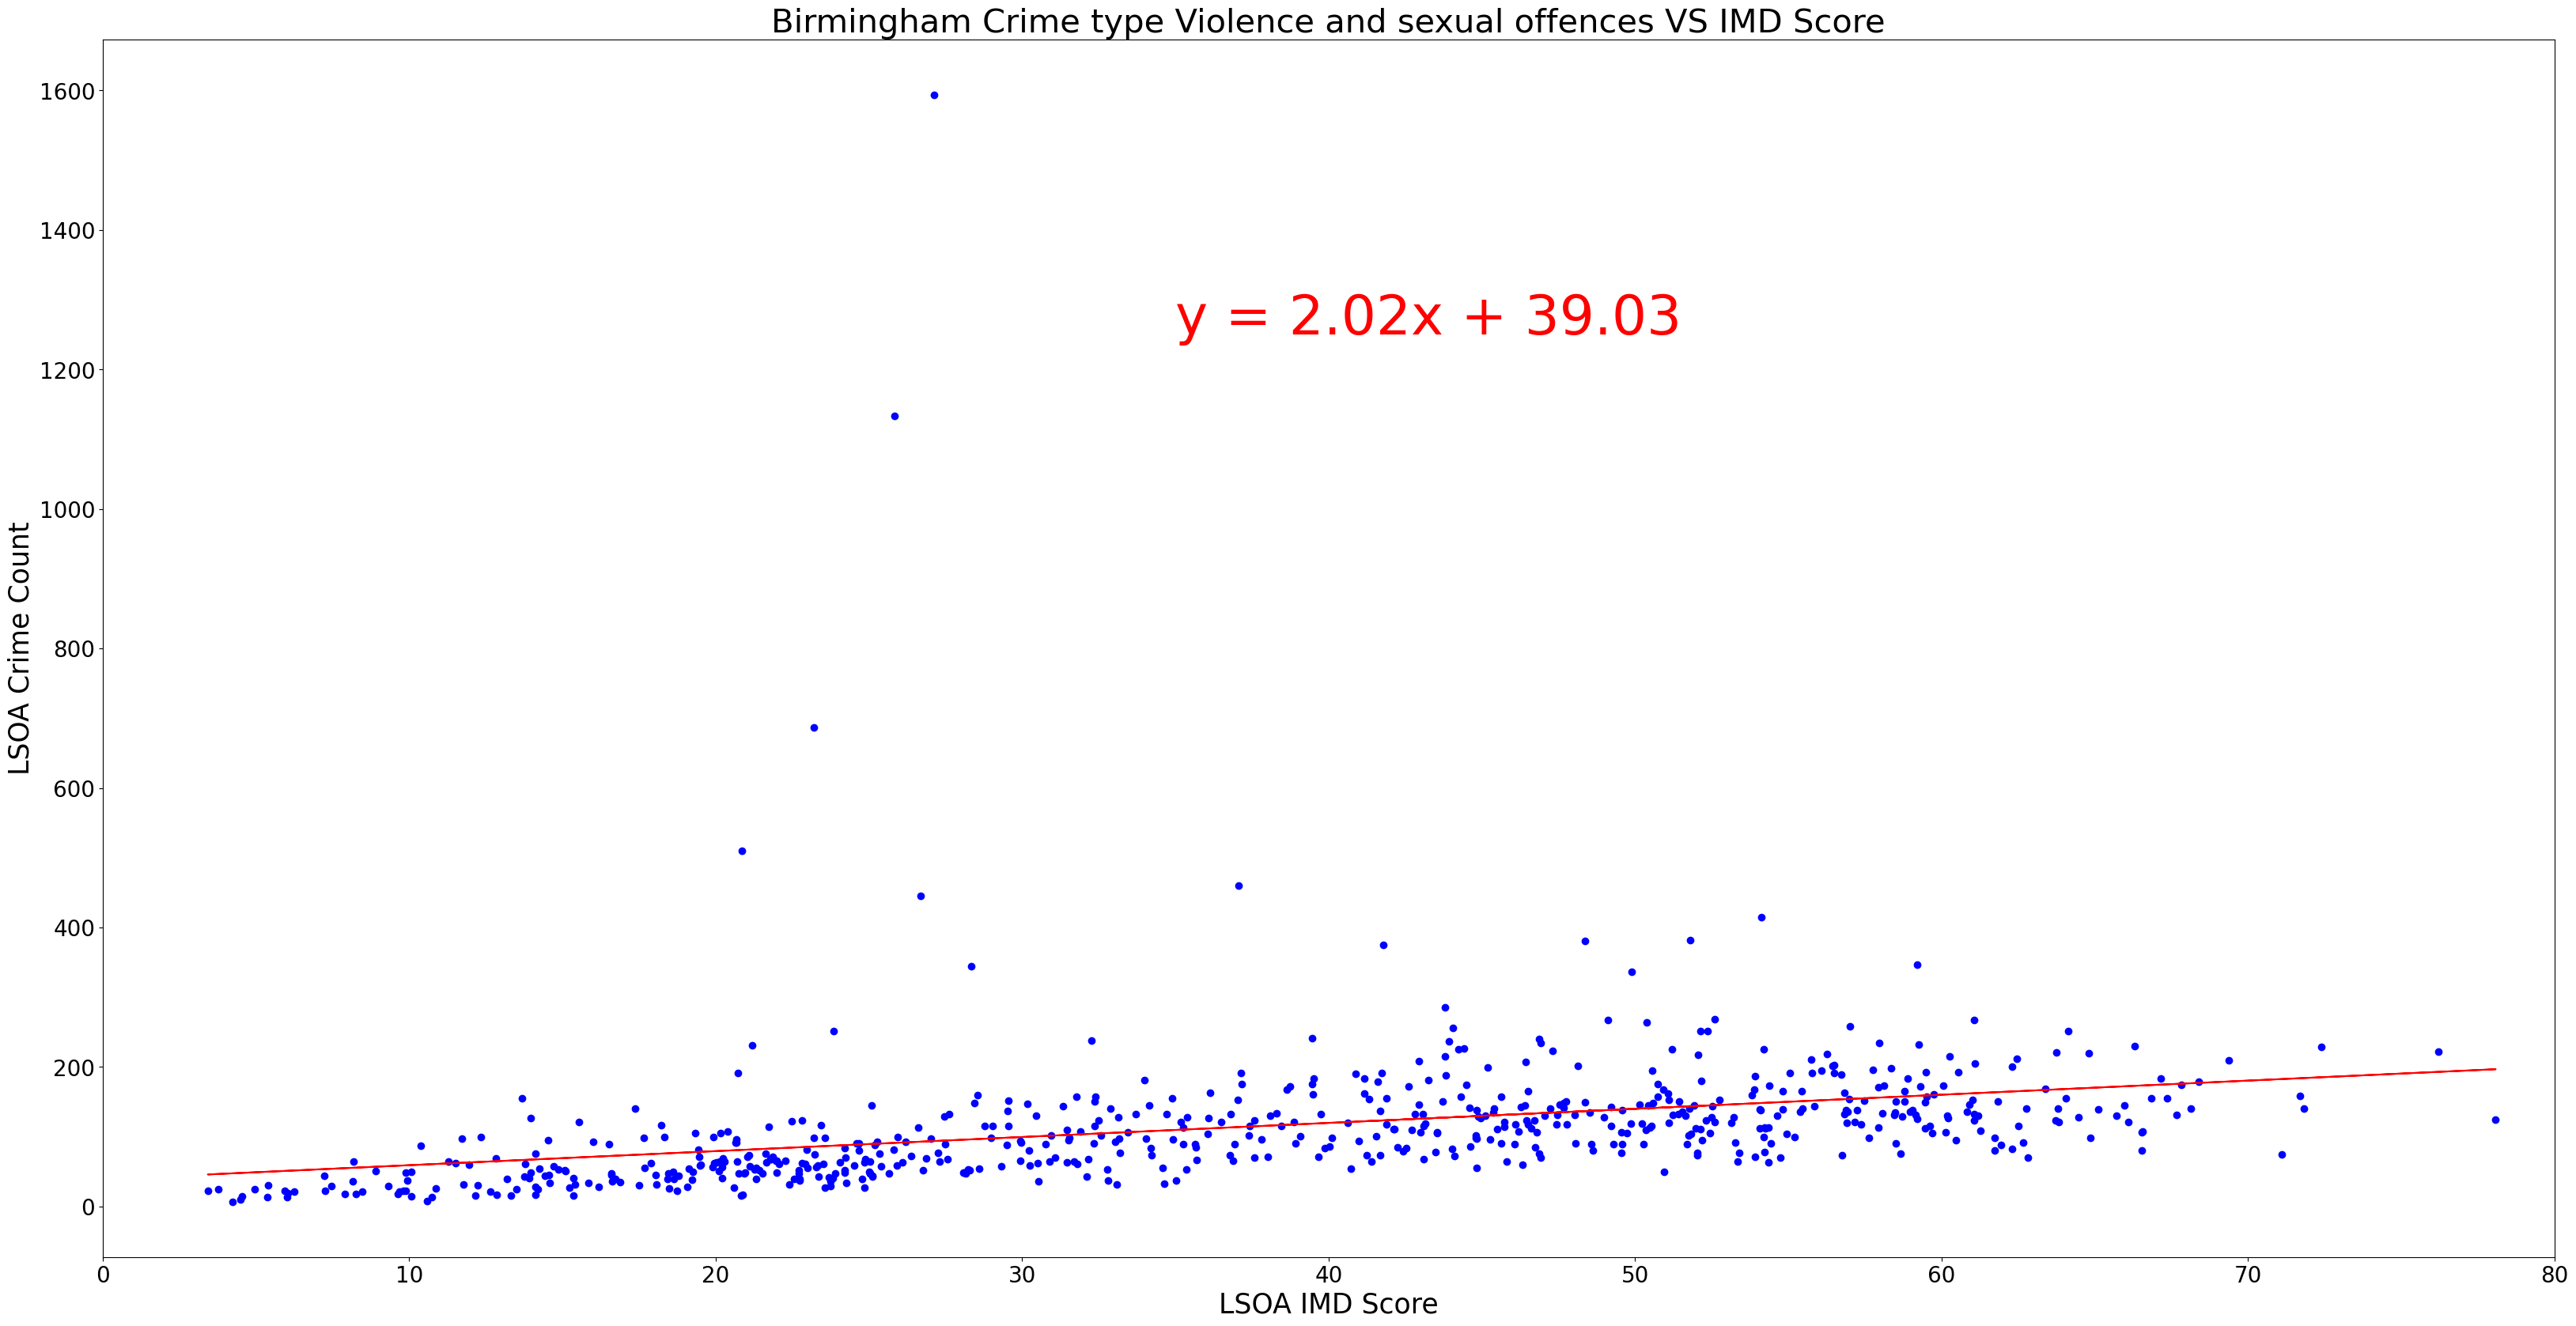

The Pearson Coerrelation Coefficient, r = 0.21521417985420185
The Coefficient of Determination r-saqured = 0.04631714321031674


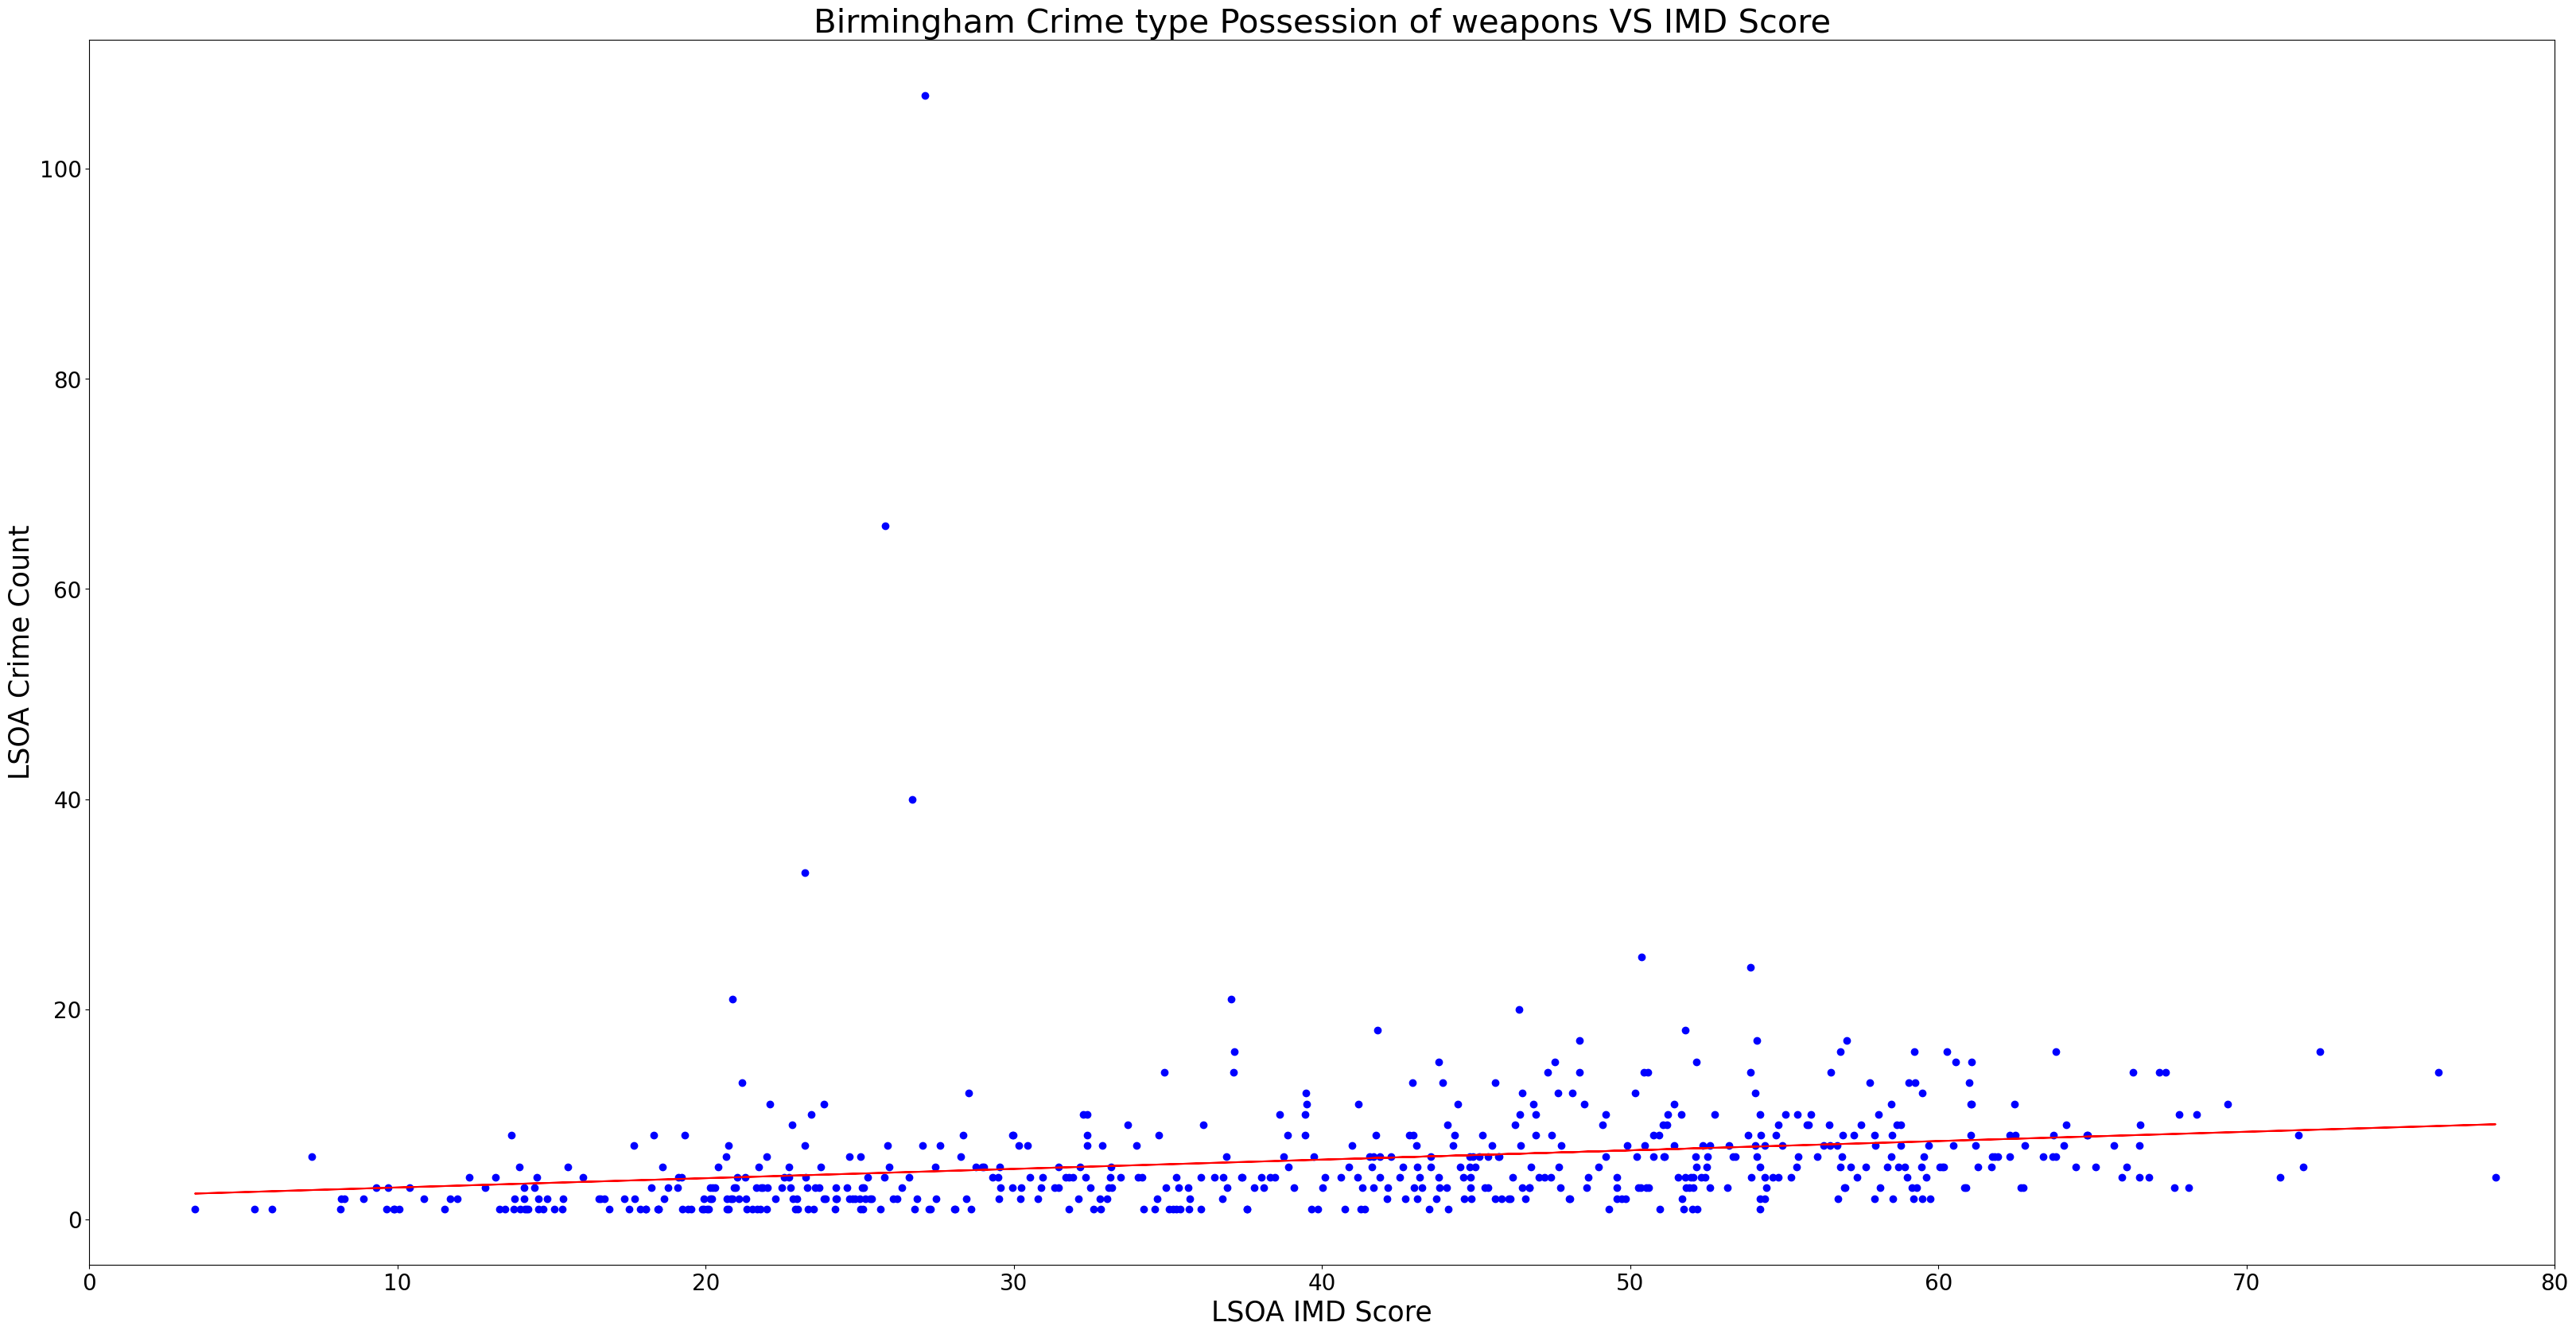

The Pearson Coerrelation Coefficient, r = 0.19791040440609997
The Coefficient of Determination r-saqured = 0.03916852817218604


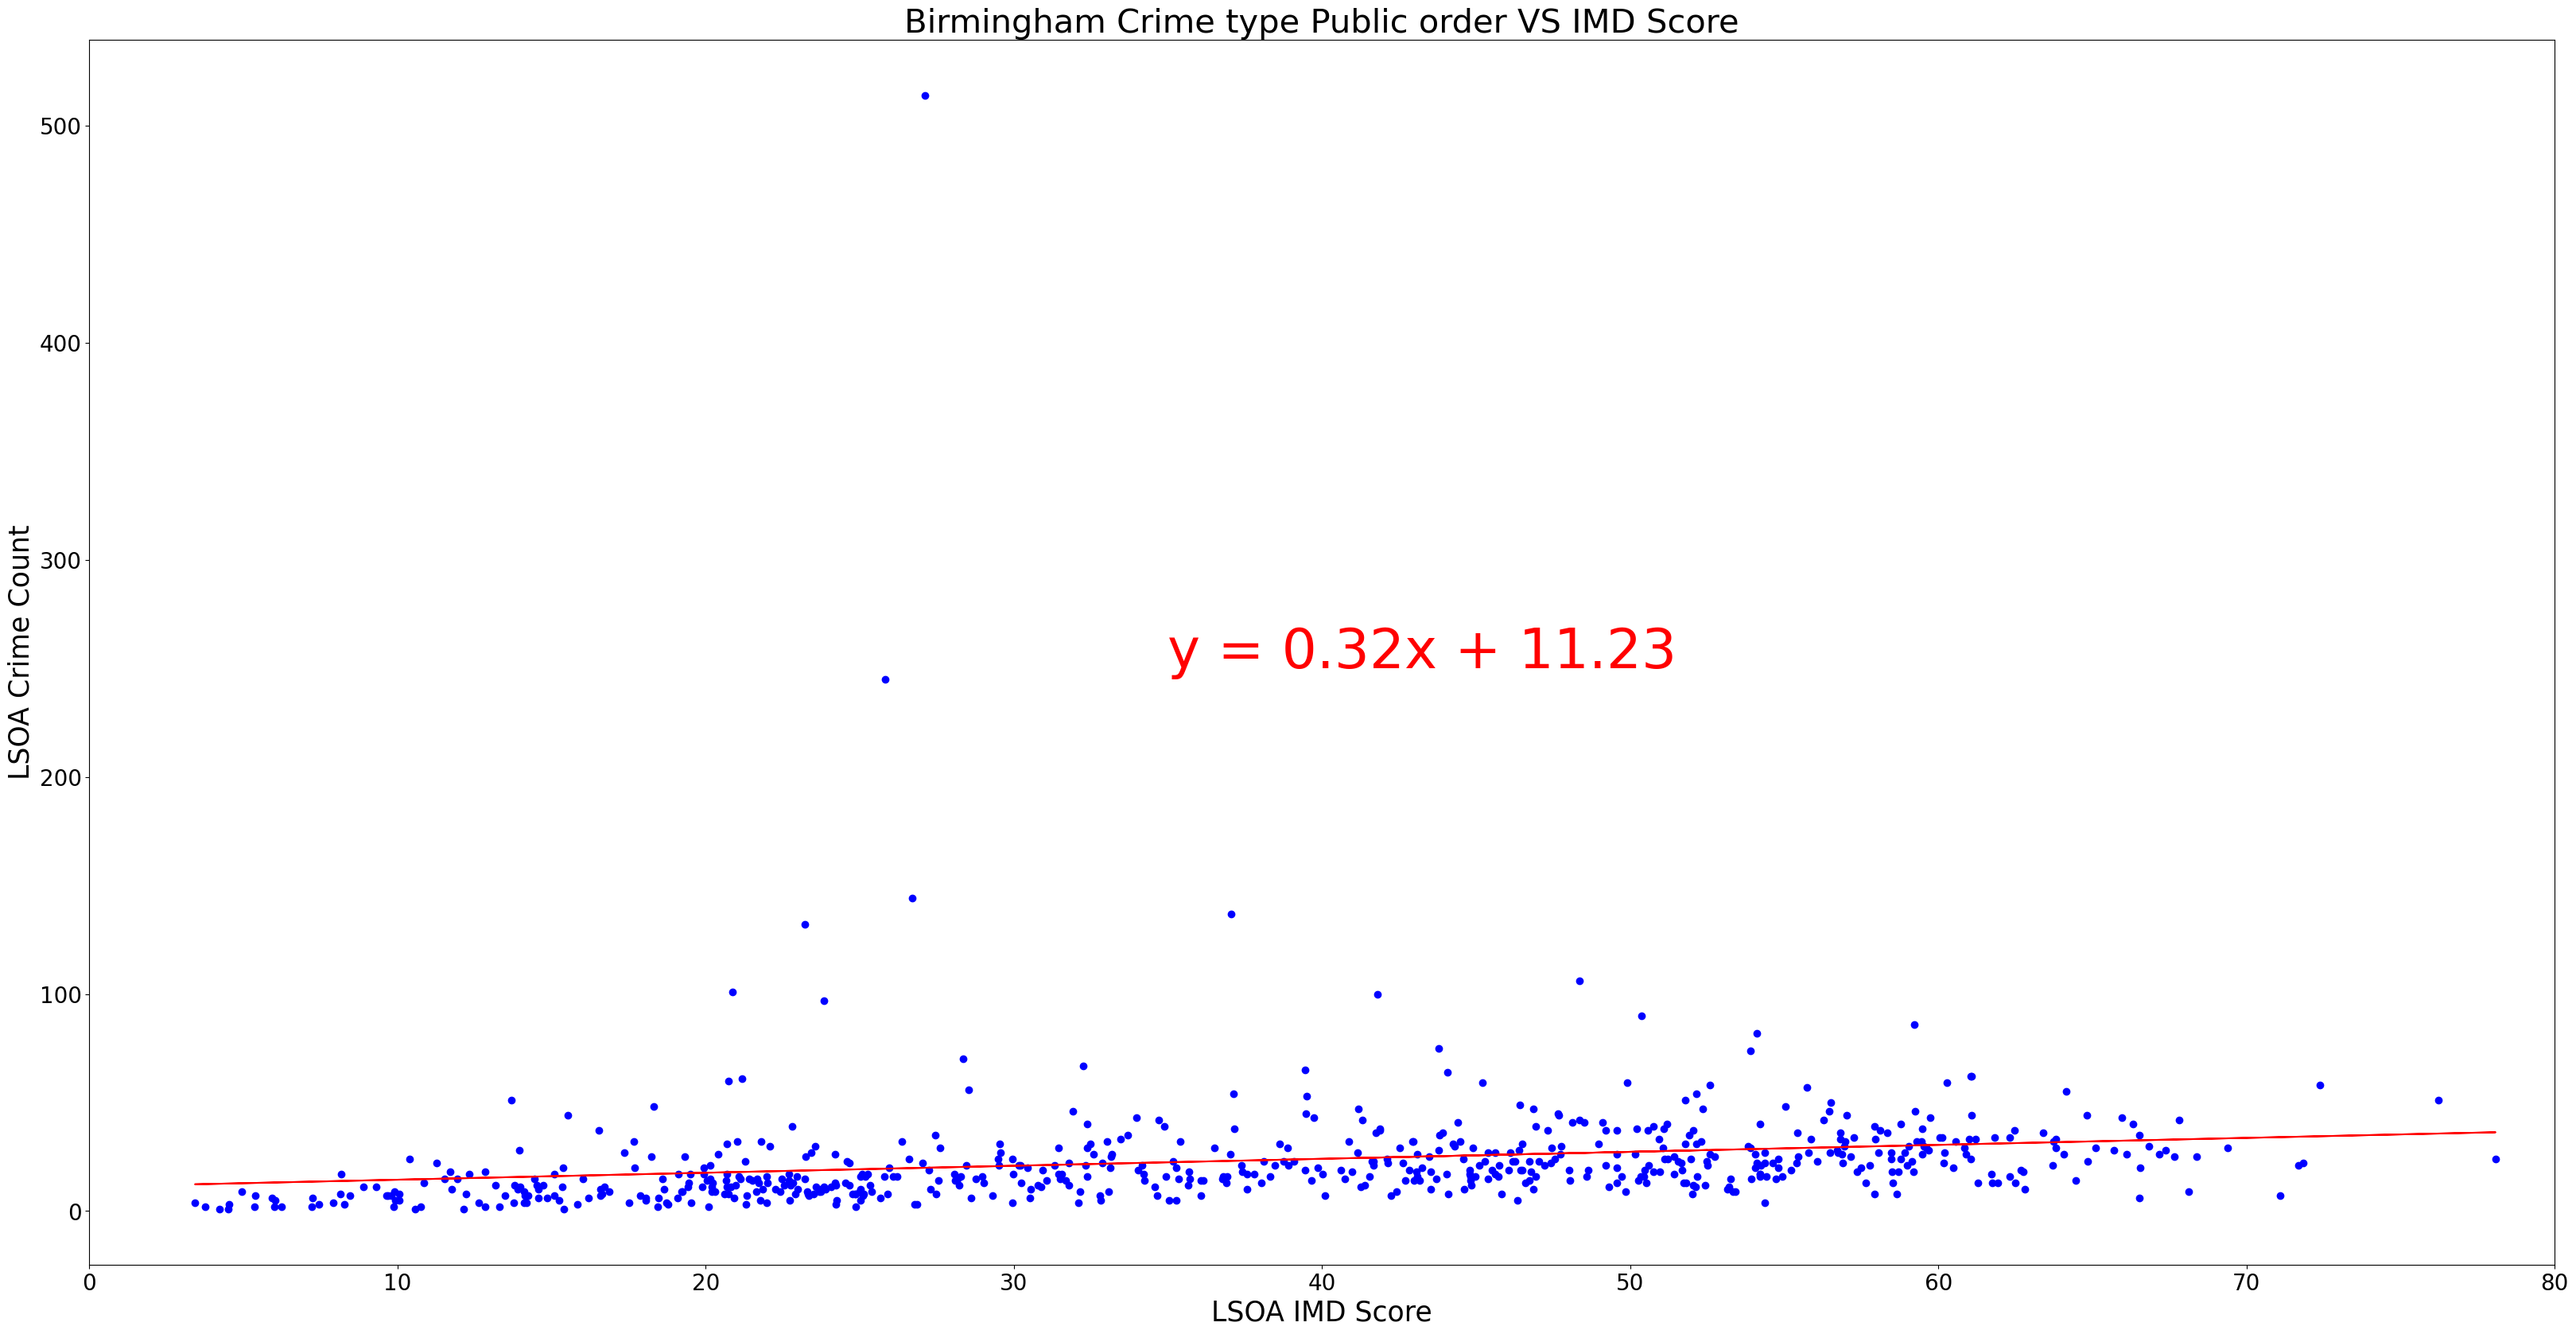

The Pearson Coerrelation Coefficient, r = 0.10839194104560941
The Coefficient of Determination r-saqured = 0.011748812883634866


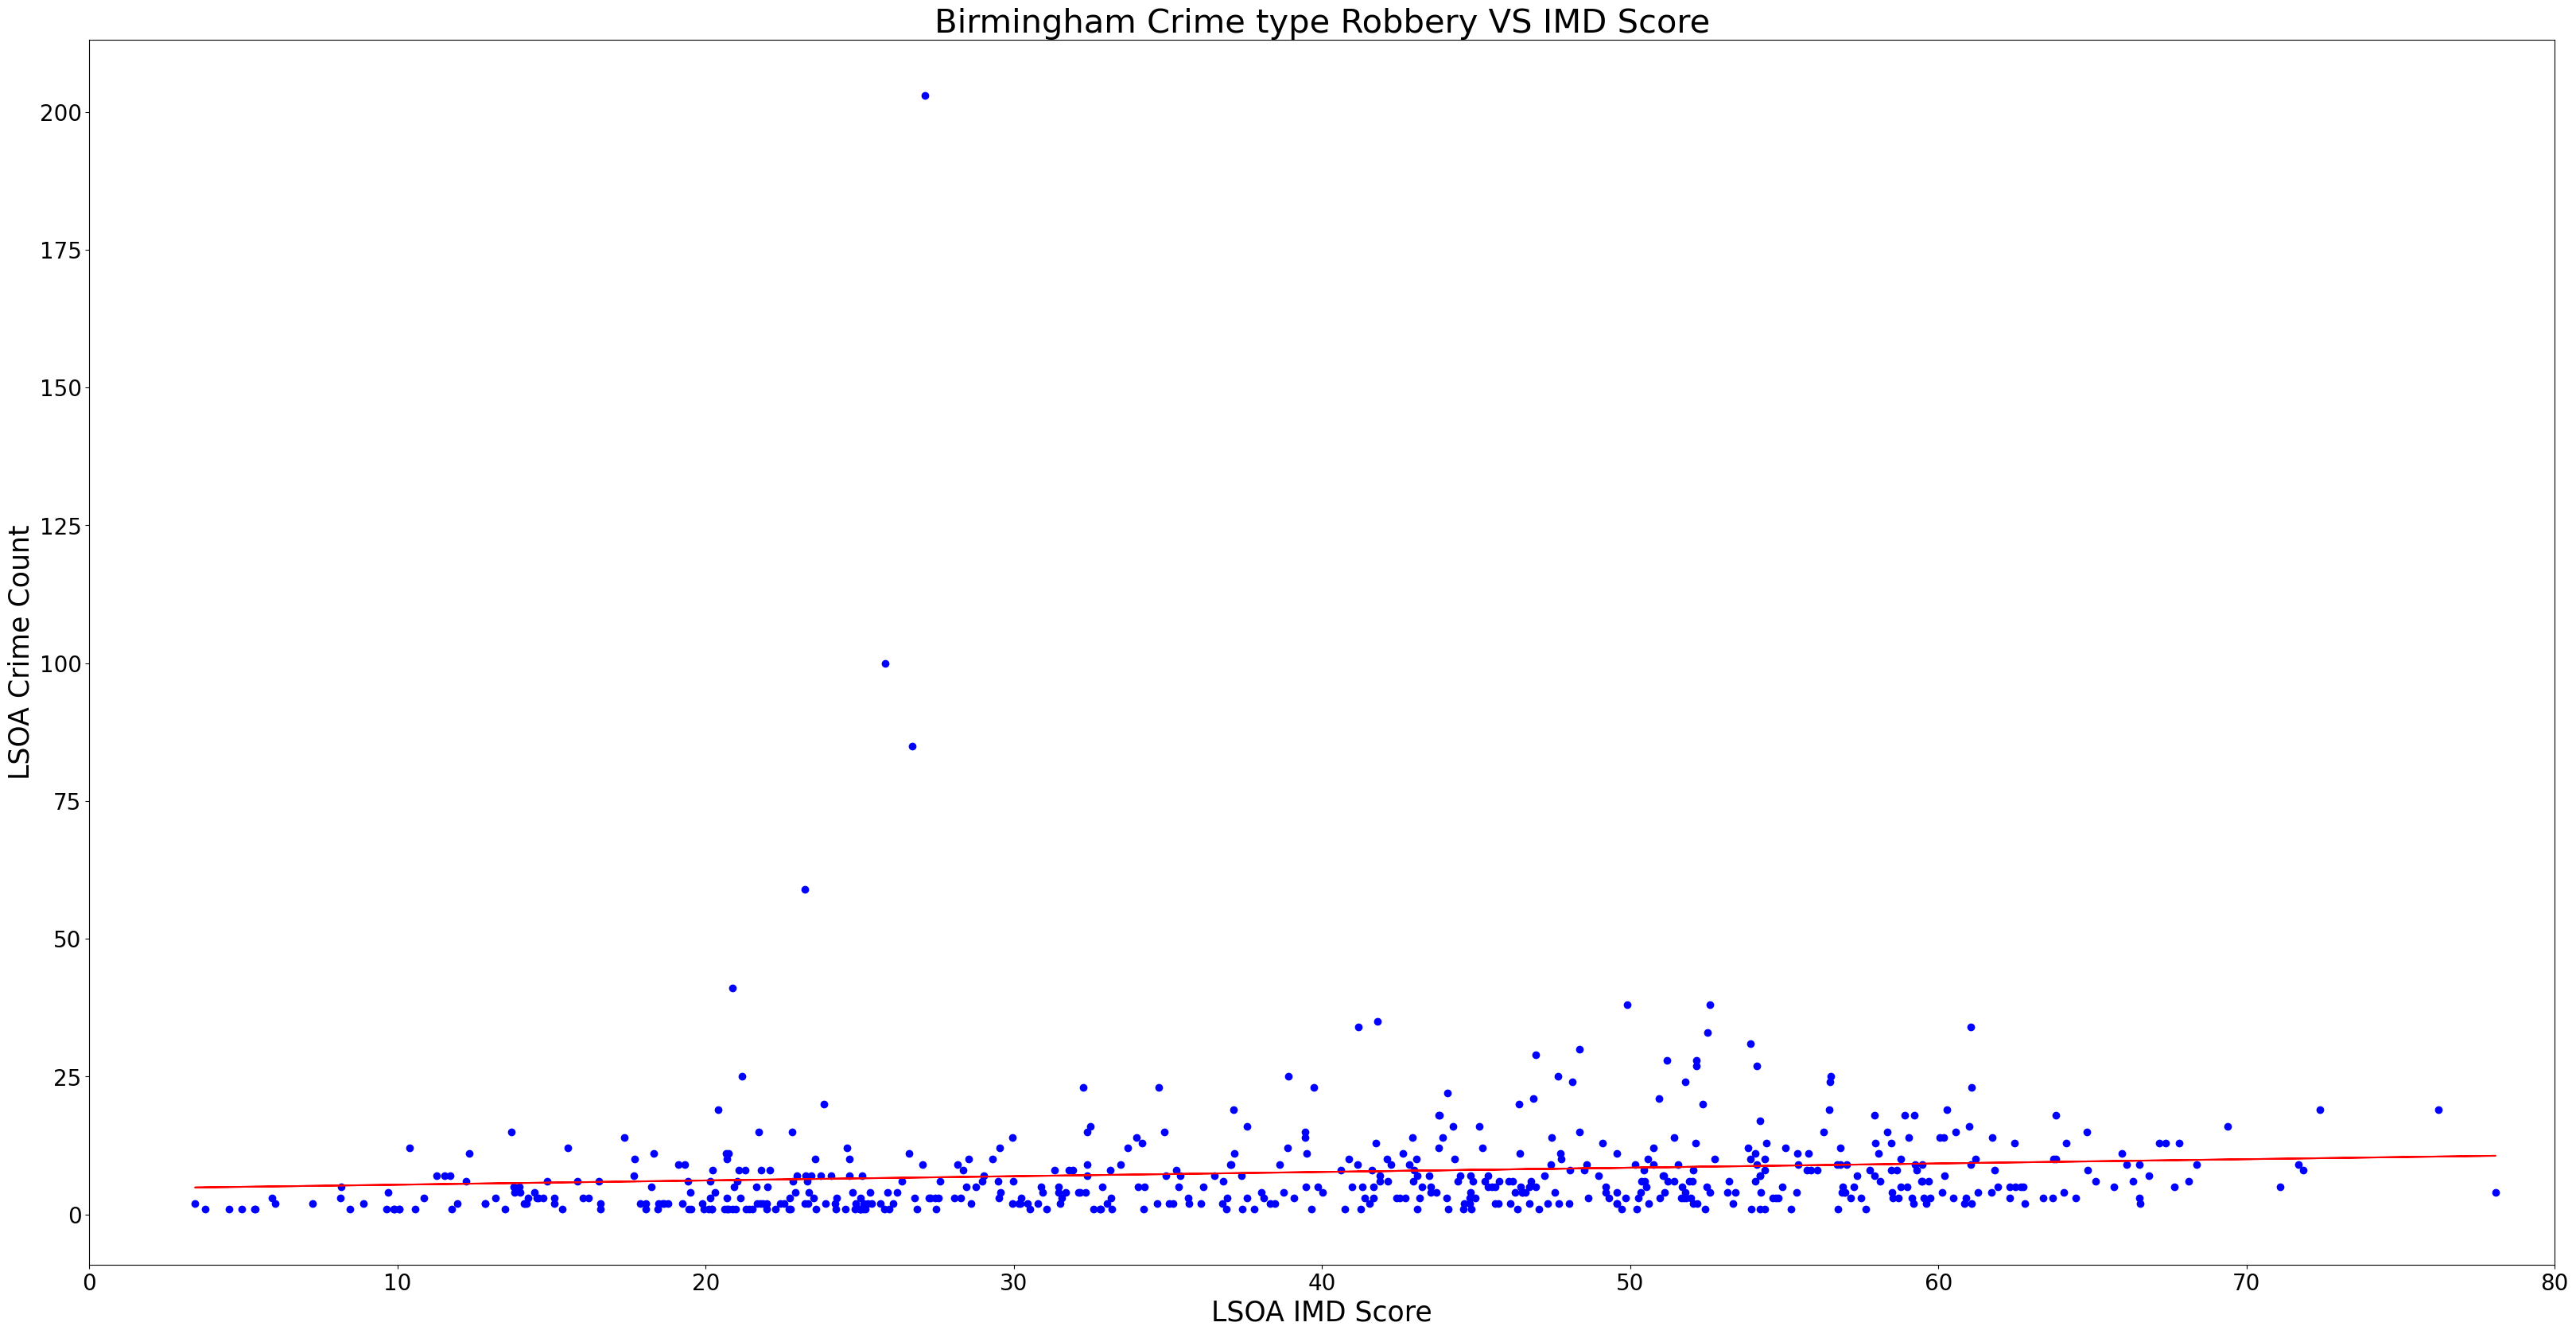

The Pearson Coerrelation Coefficient, r = 0.04136062417982652
The Coefficient of Determination r-saqured = 0.0017107012325448501


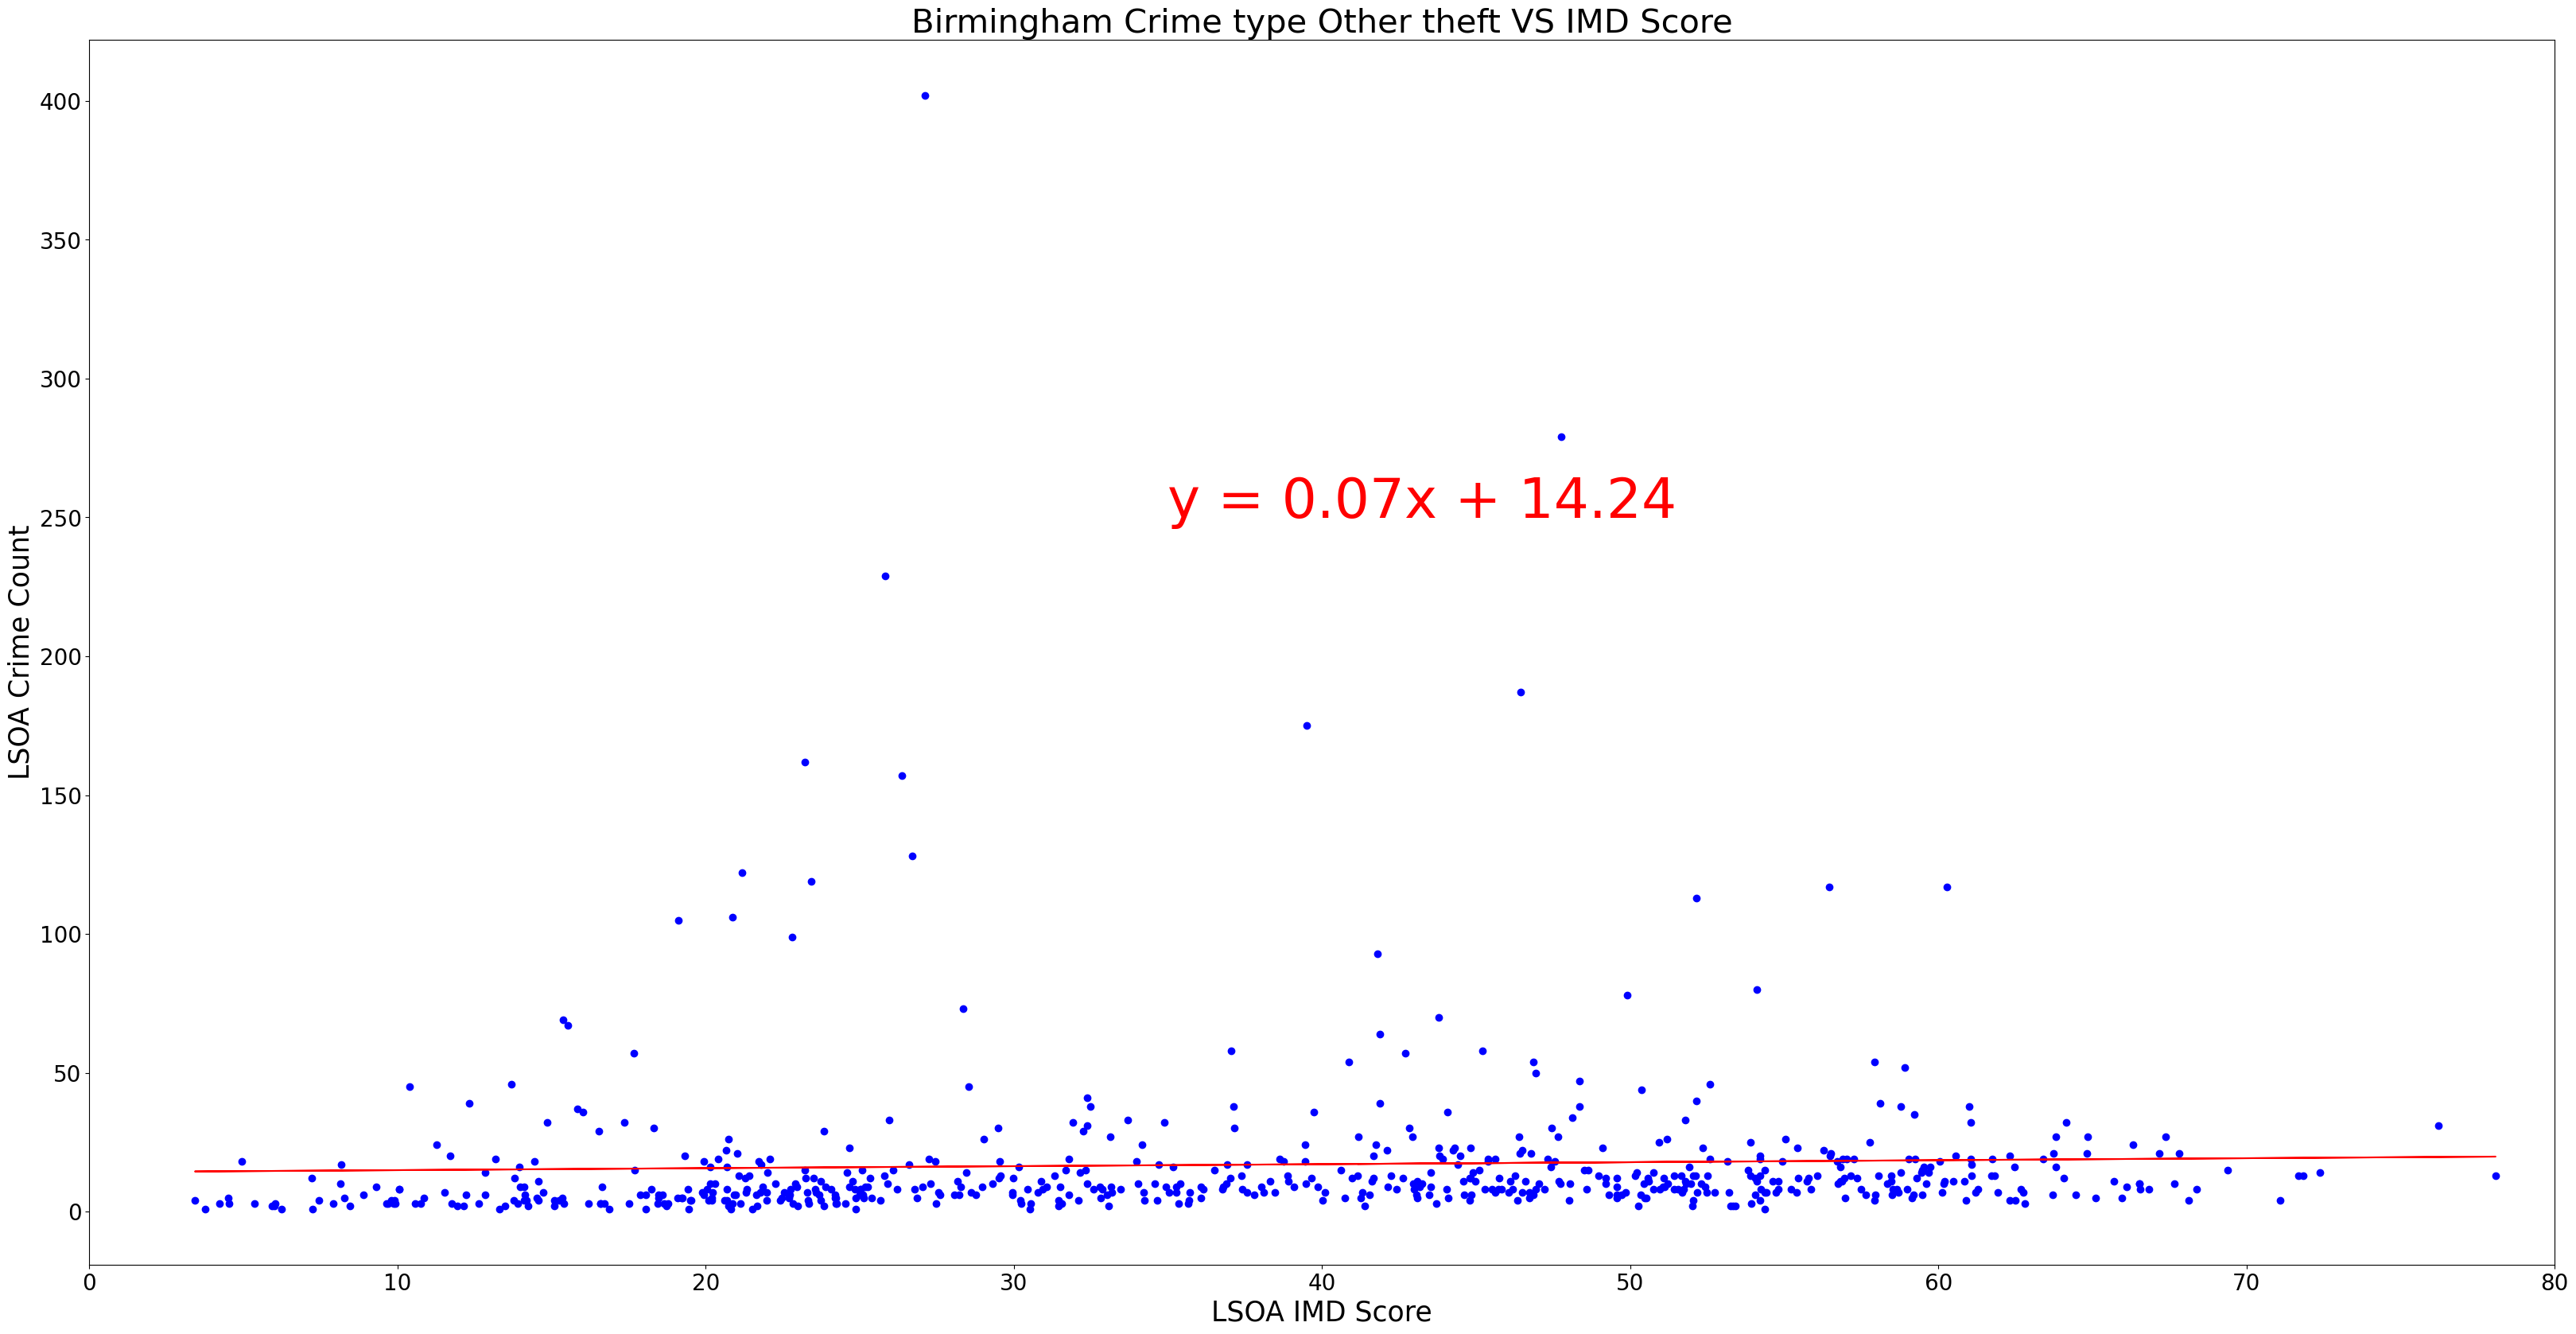

The Pearson Coerrelation Coefficient, r = 0.3037480756297961
The Coefficient of Determination r-saqured = 0.09226289344880434


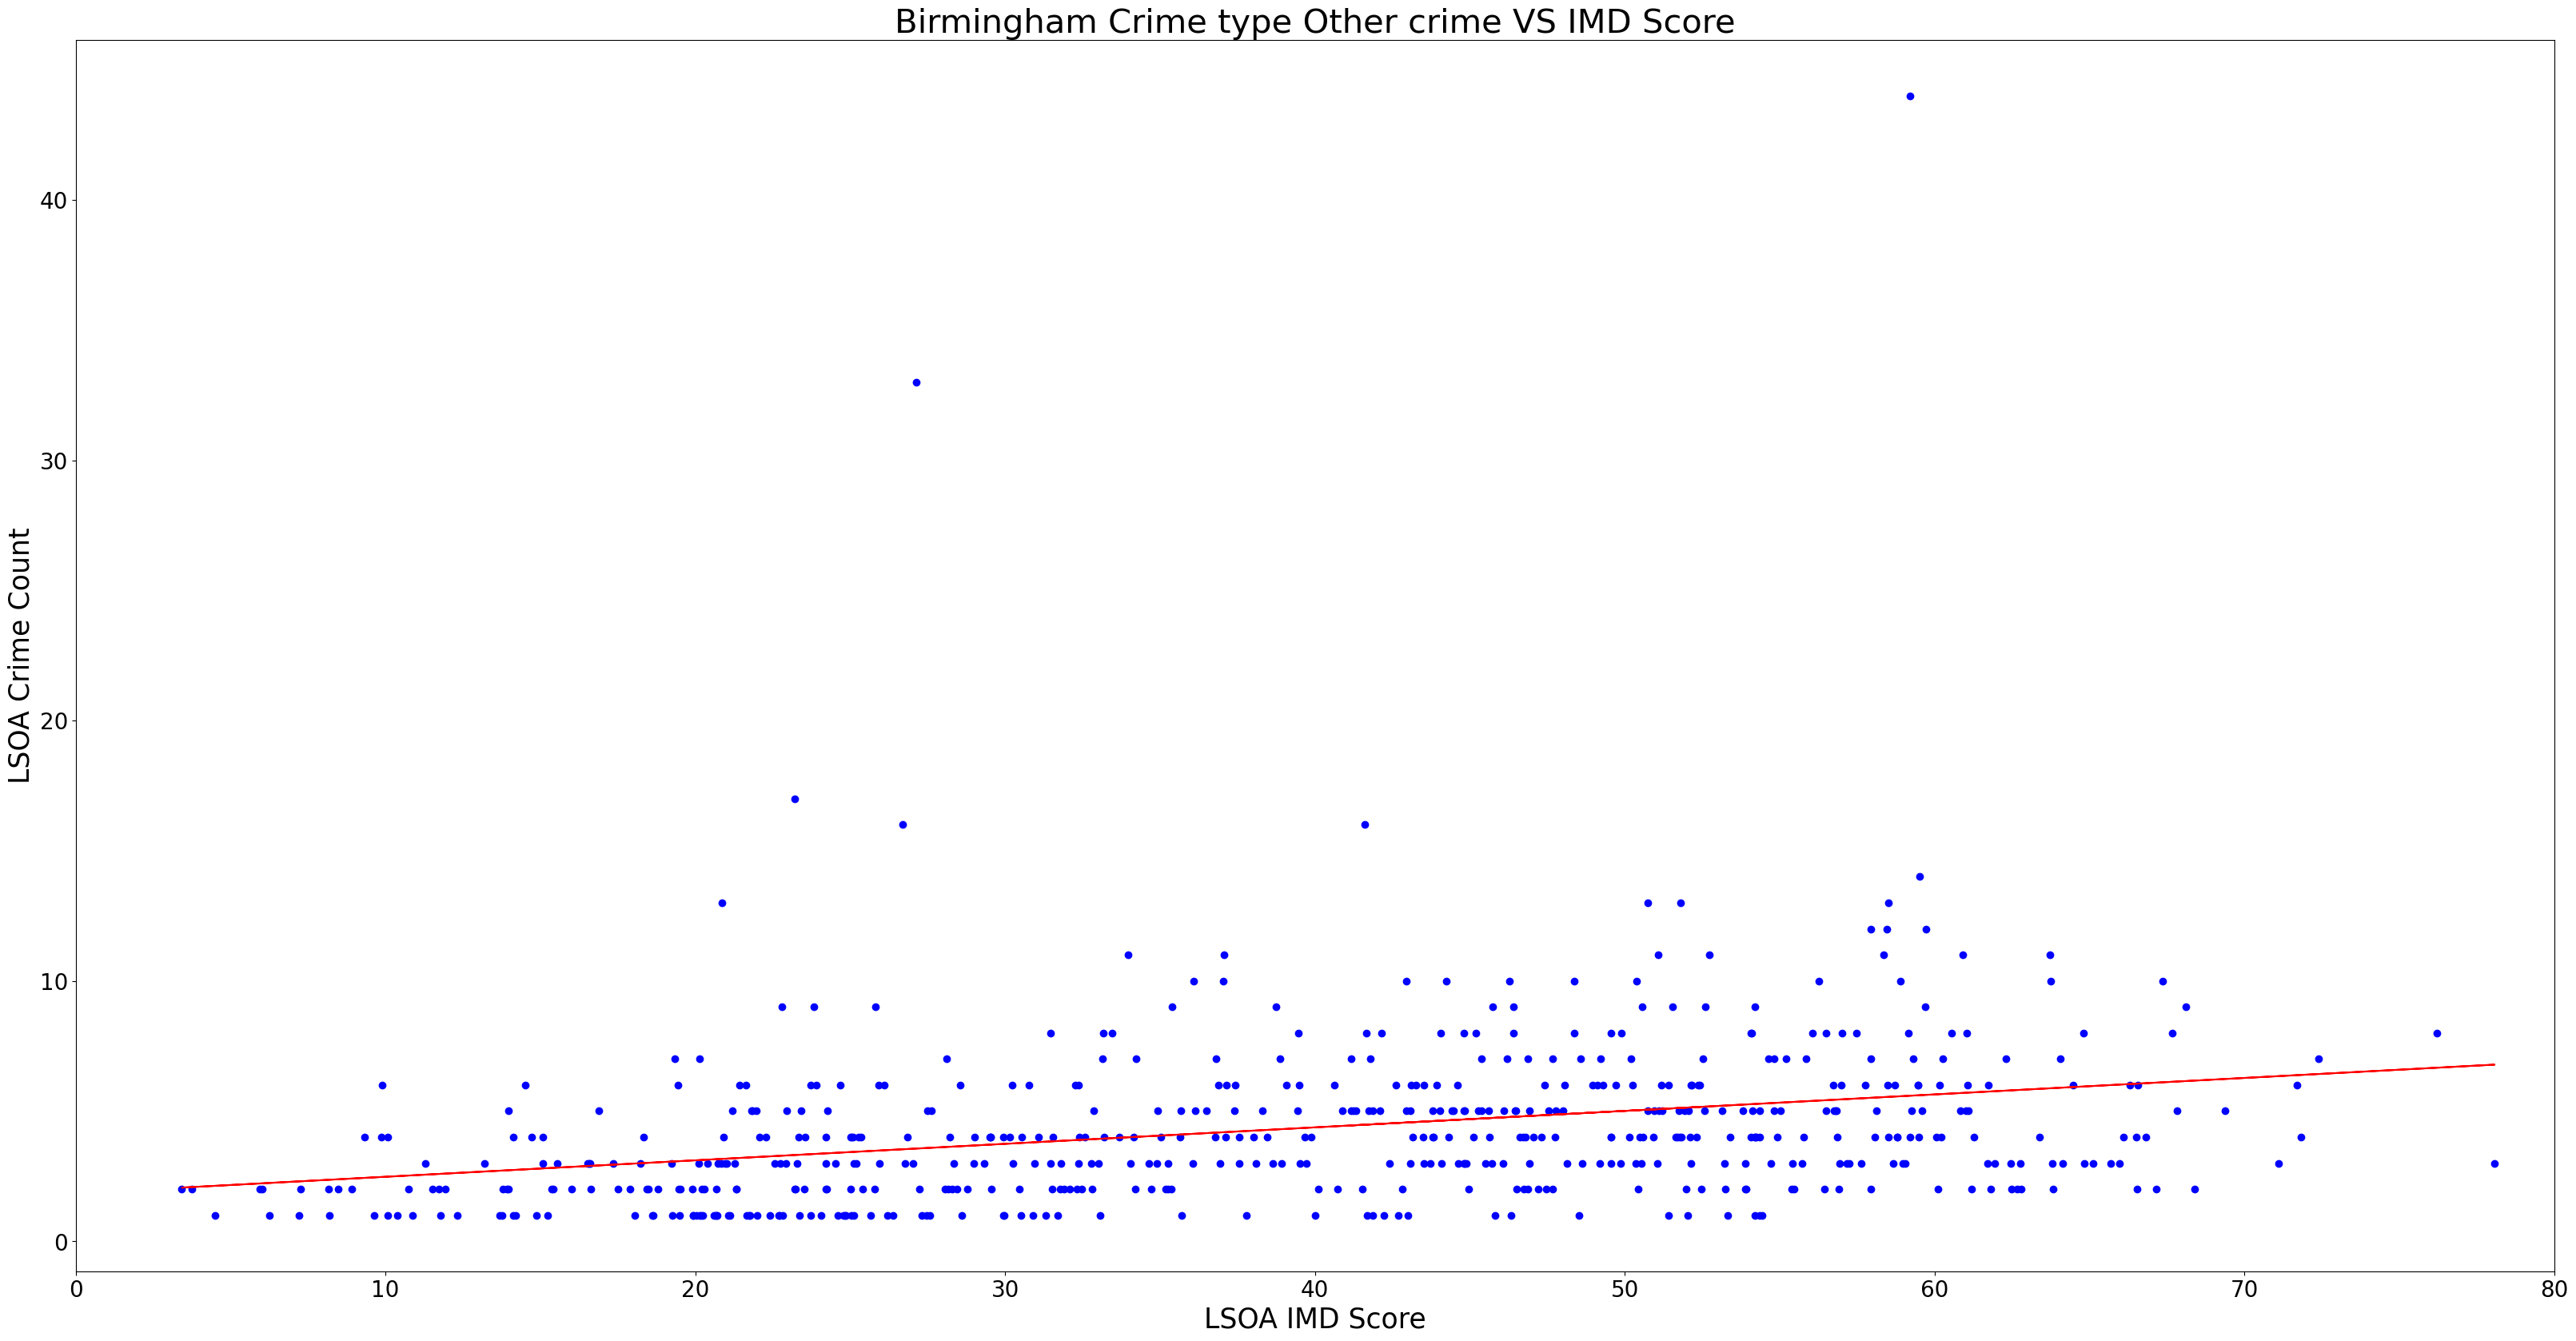

The Pearson Coerrelation Coefficient, r = -0.12569772924729192
The Coefficient of Determination r-saqured = 0.015799919137925507


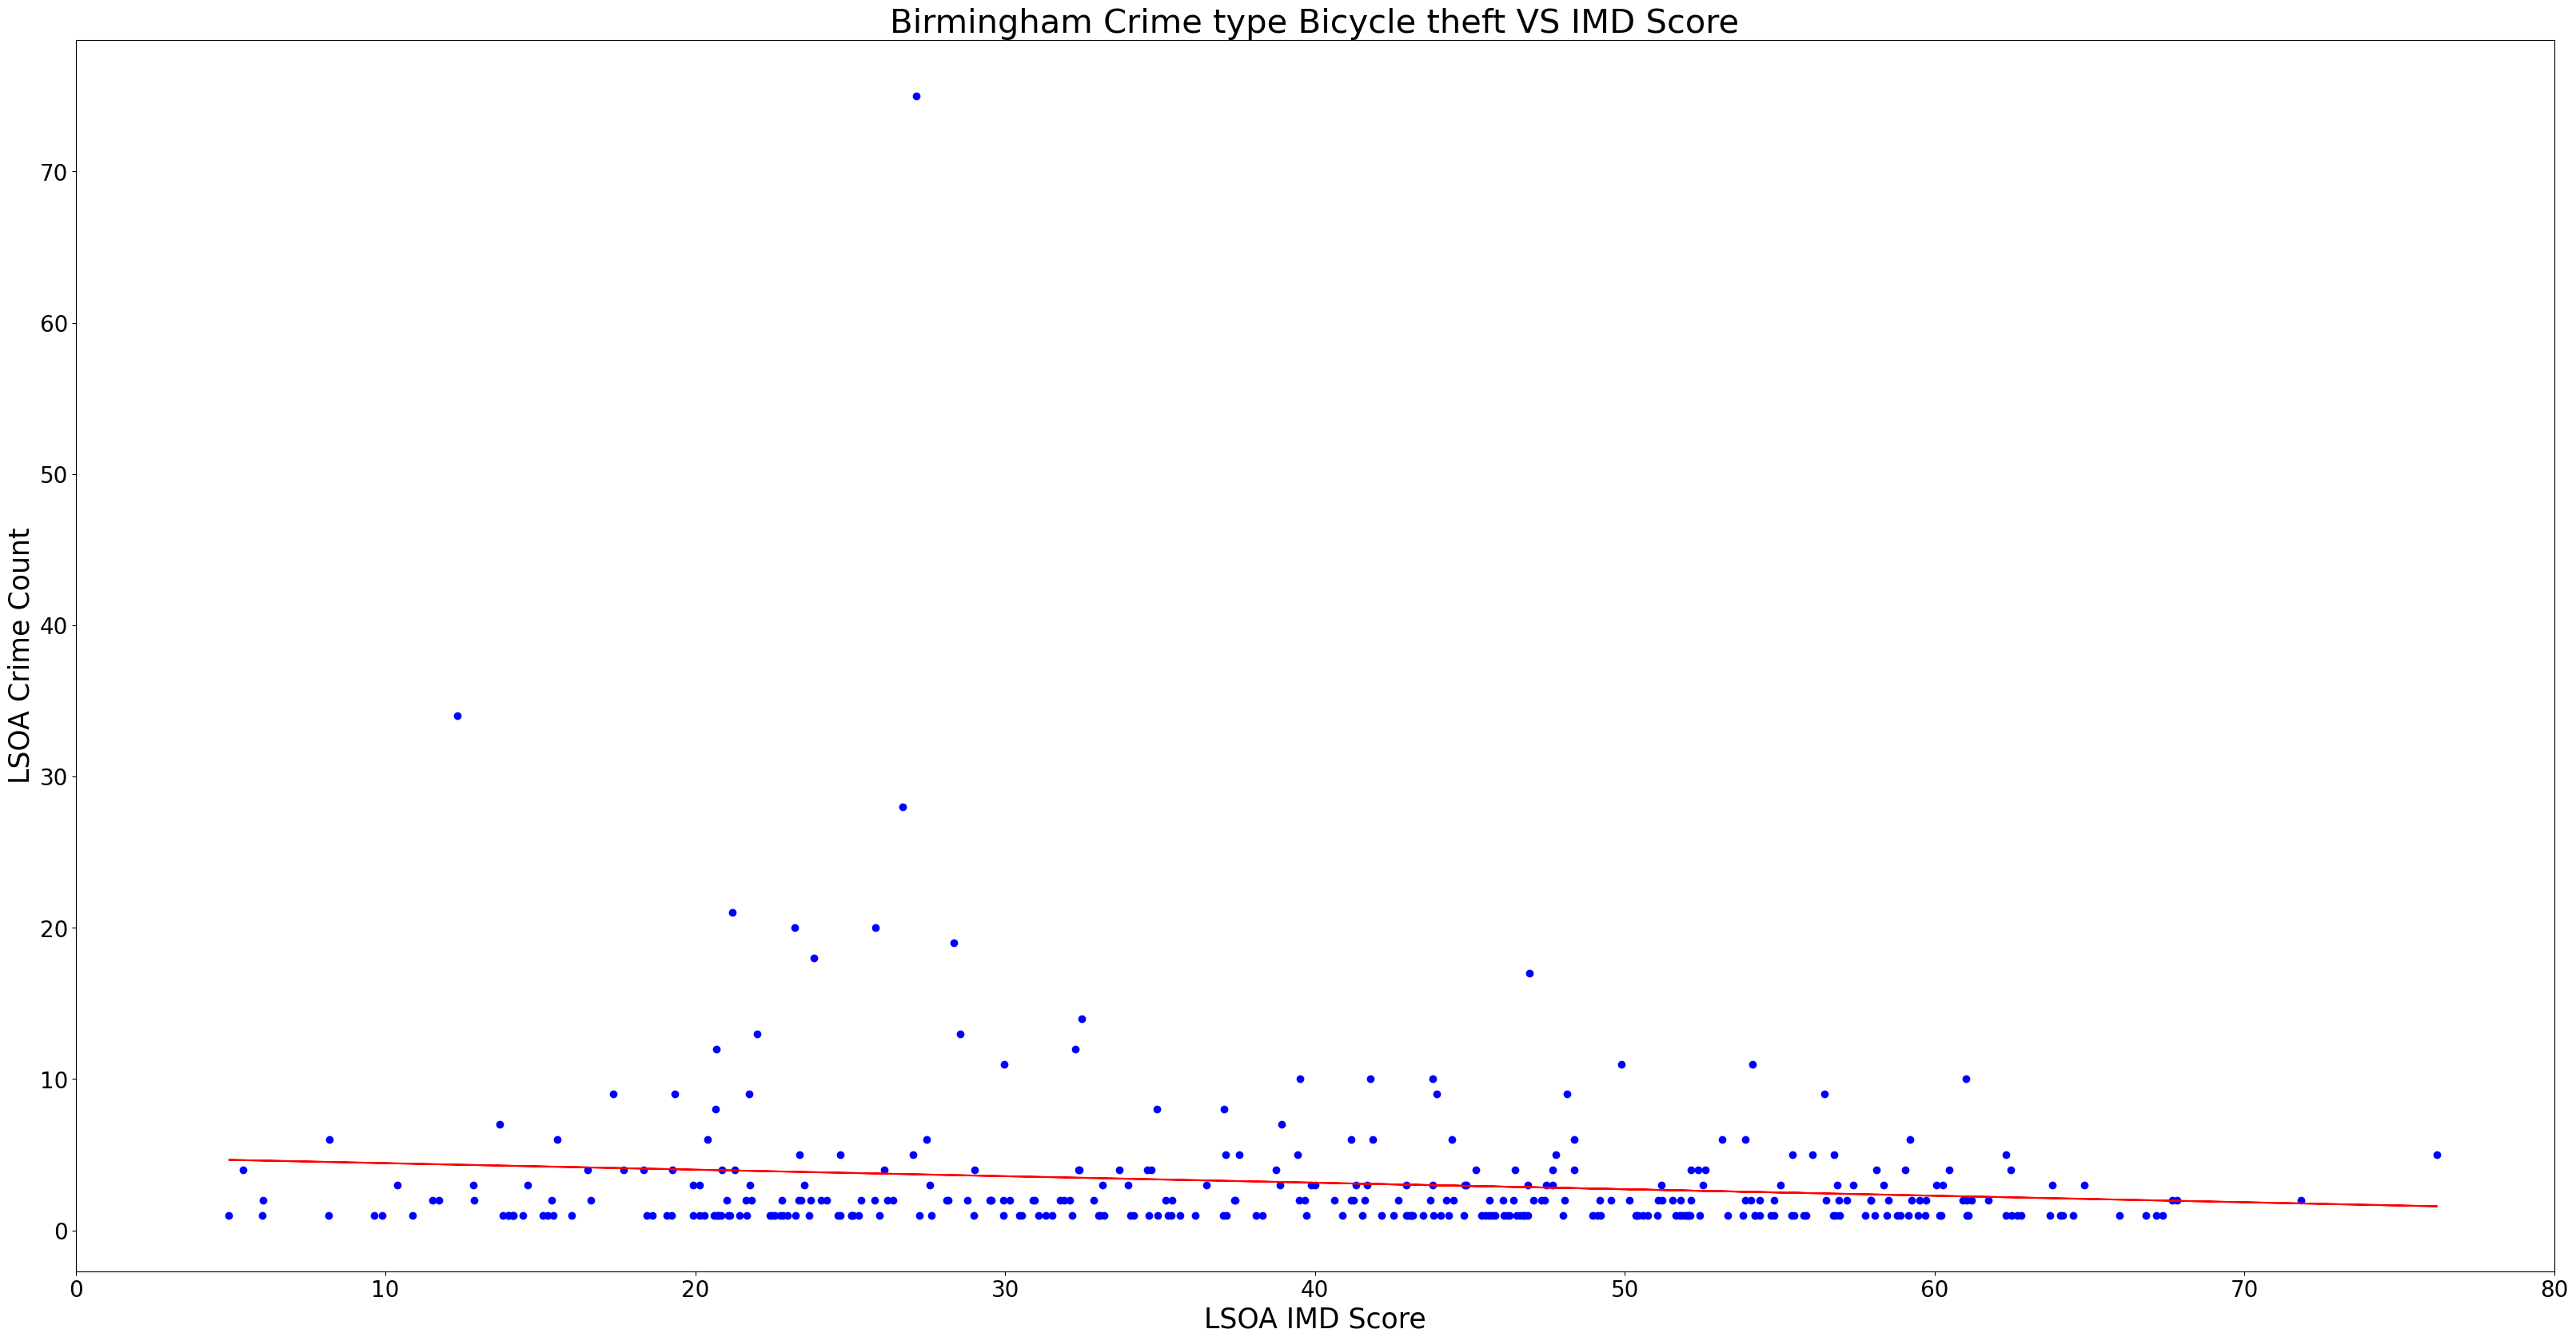

The Pearson Coerrelation Coefficient, r = 0.11244068873328321
The Coefficient of Determination r-saqured = 0.012642908482815081


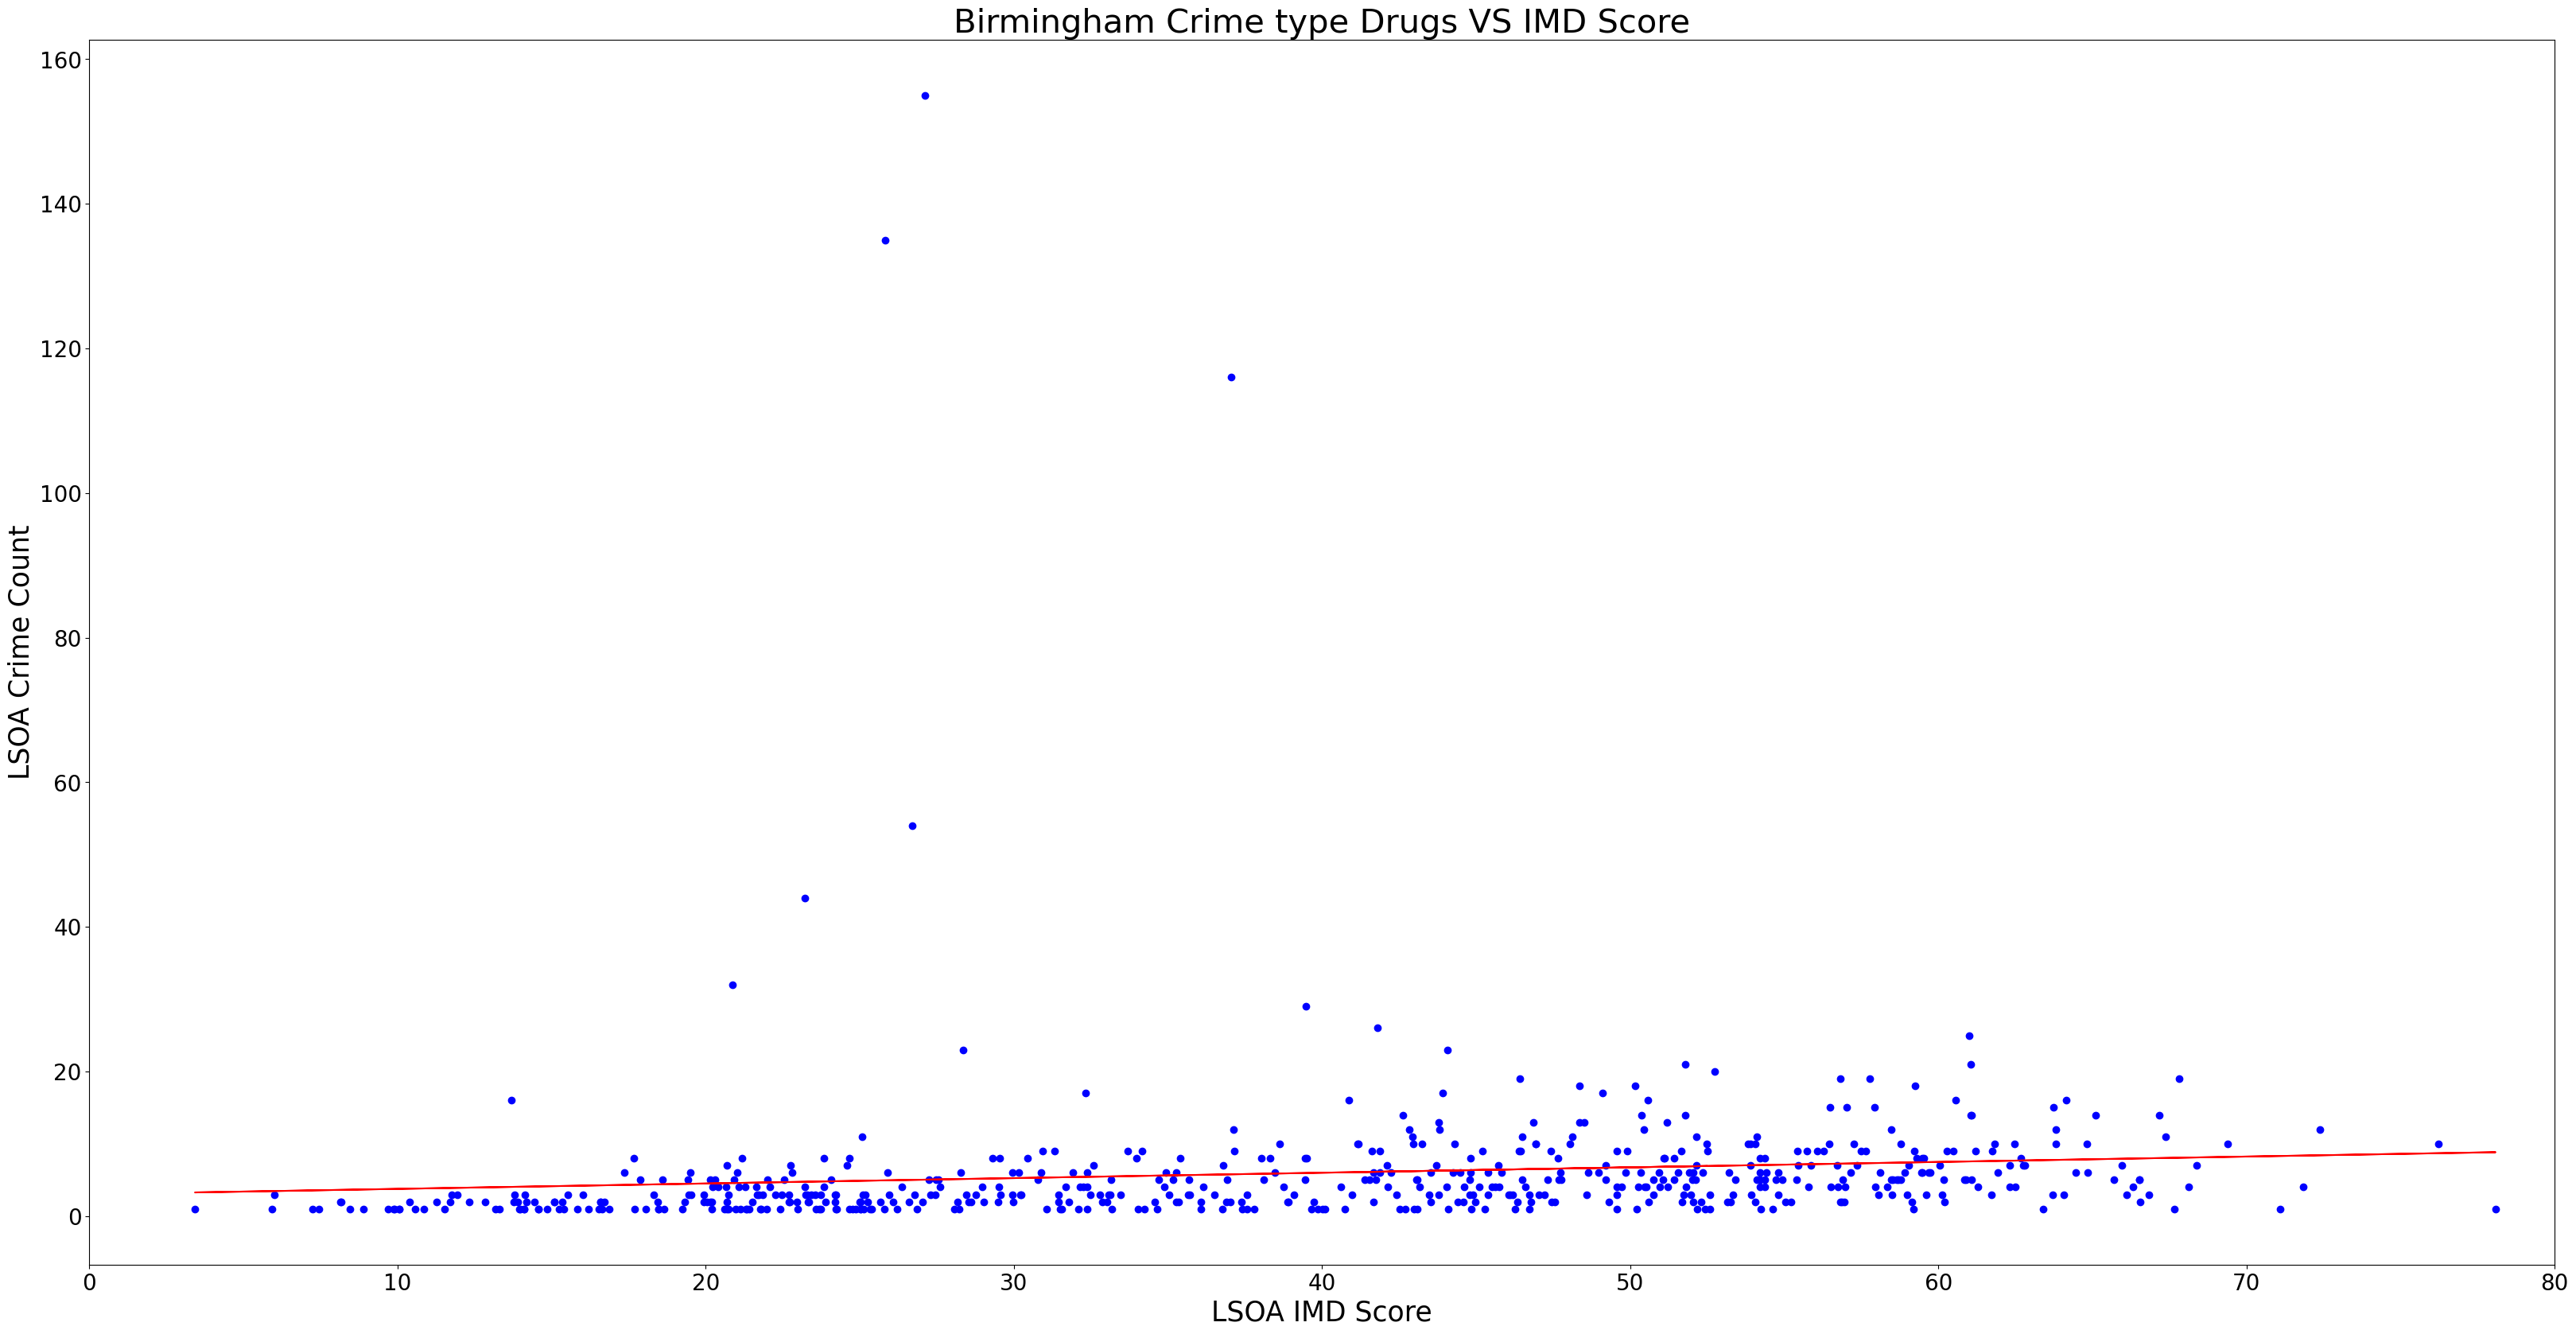

The Pearson Coerrelation Coefficient, r = -0.07326299448410753
The Coefficient of Determination r-saqured = 0.00536746636077837


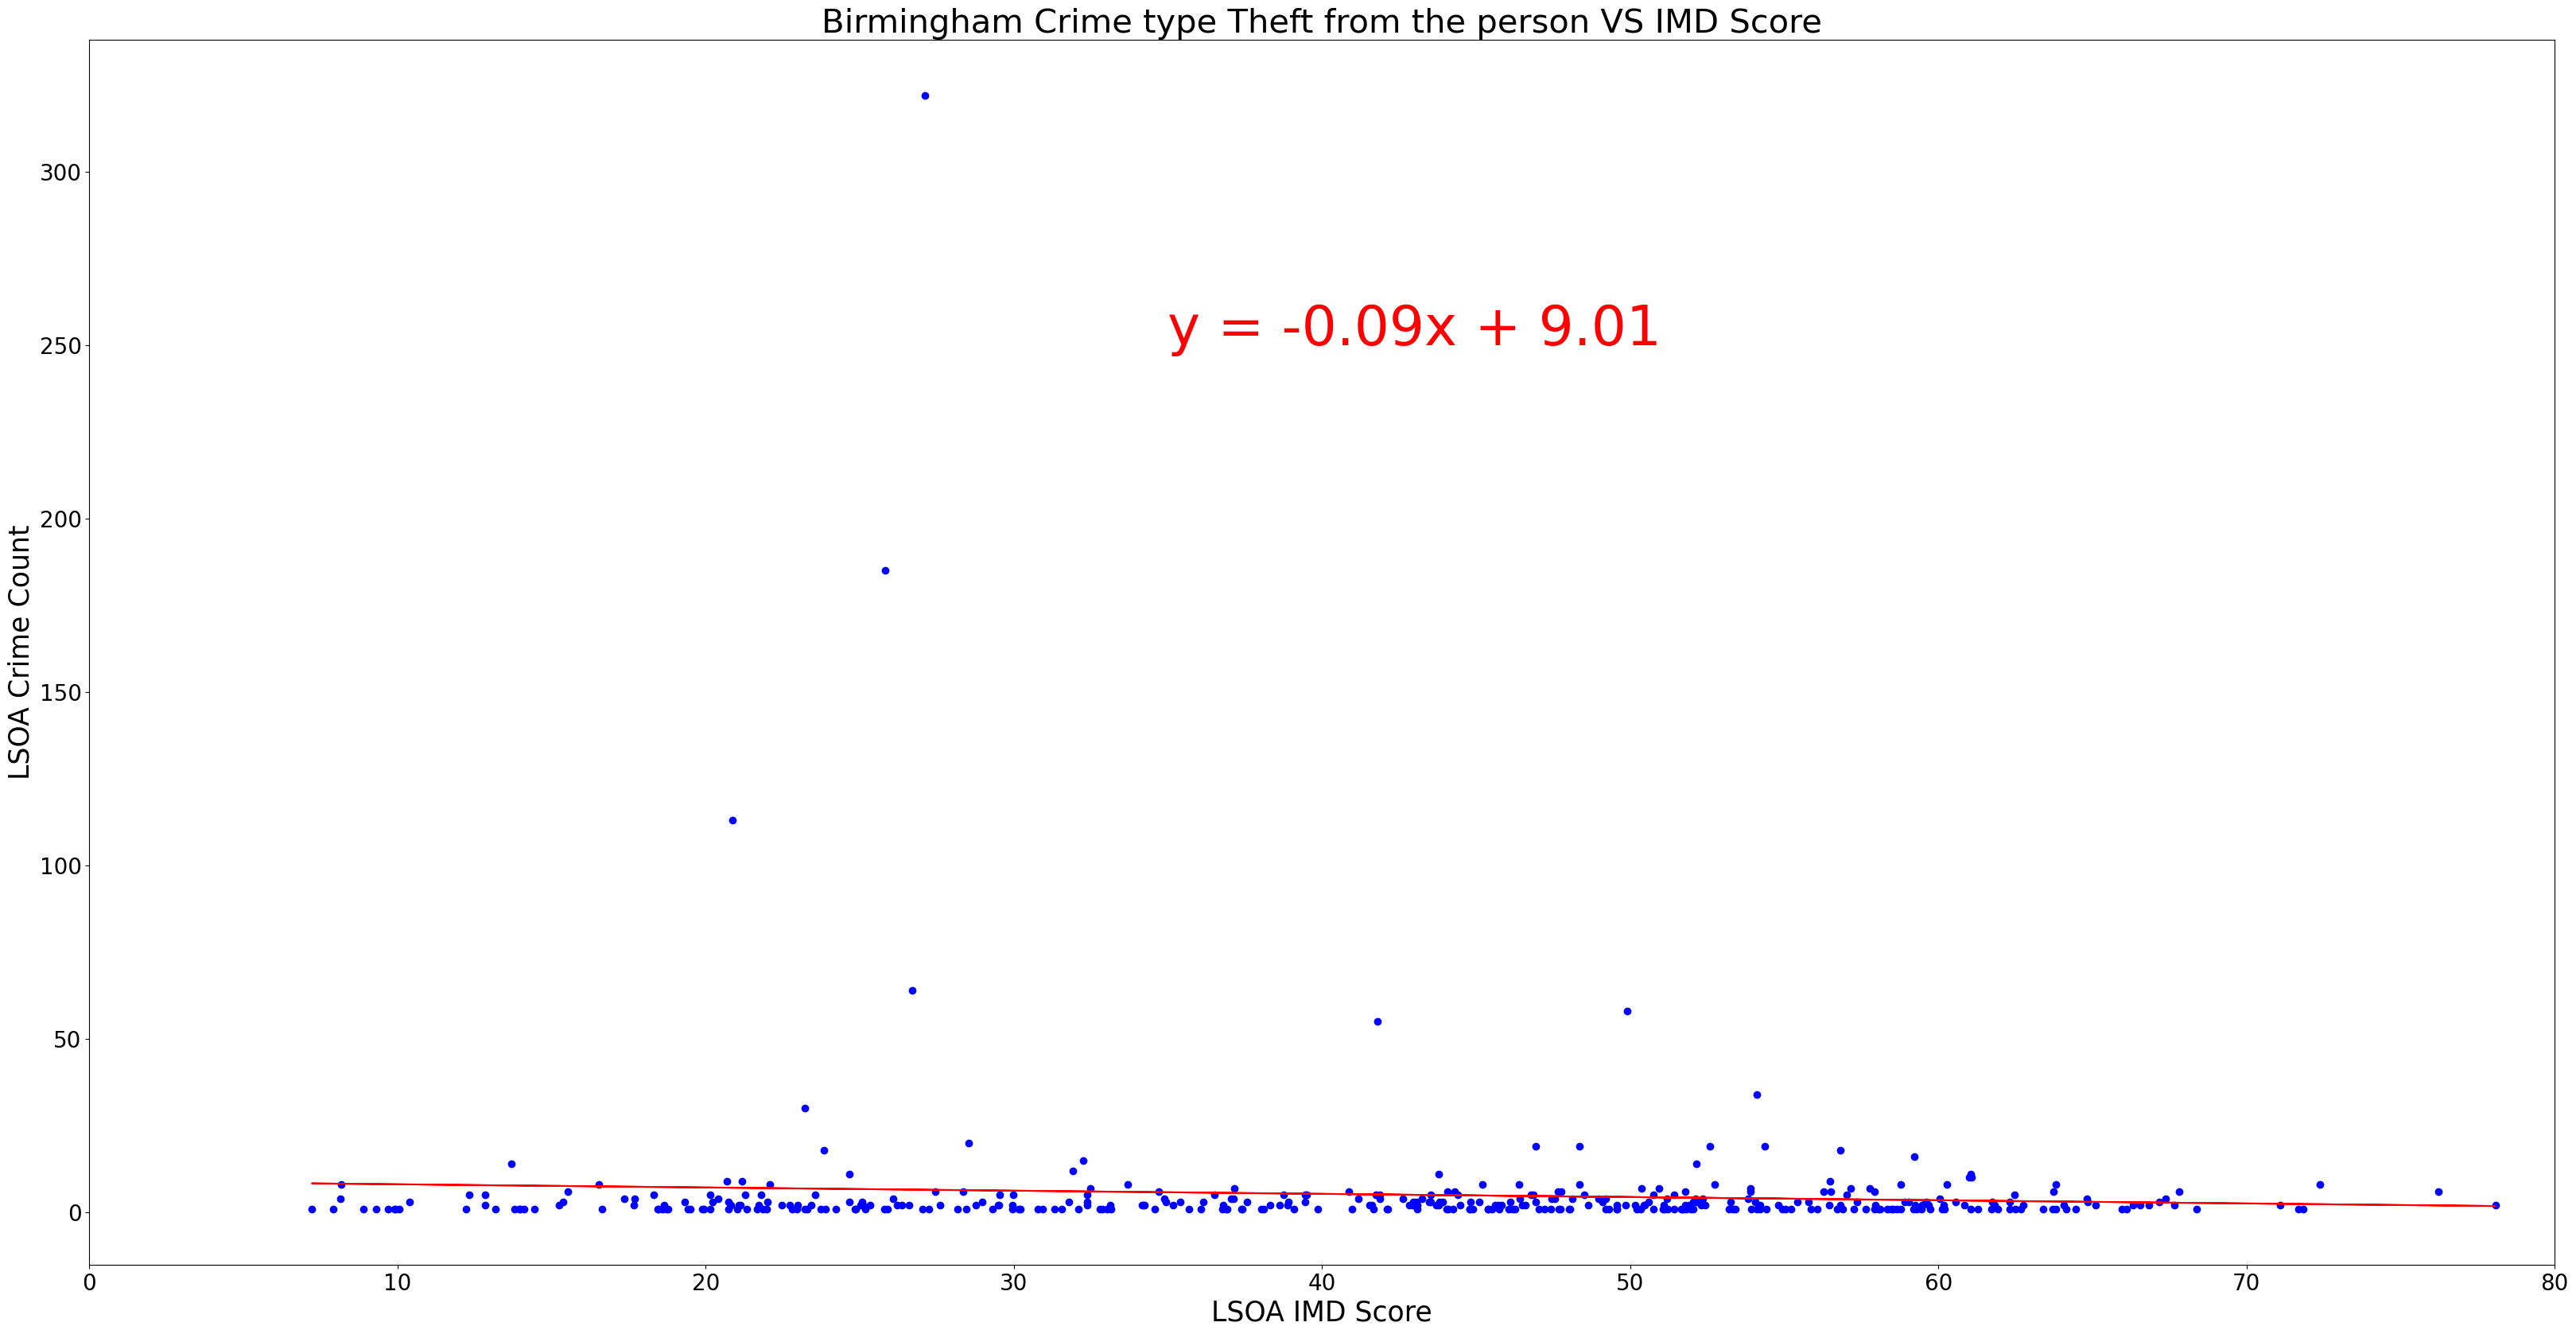

The Pearson Coerrelation Coefficient, r = -0.12016119317063896
The Coefficient of Determination r-saqured = 0.014438712344191612


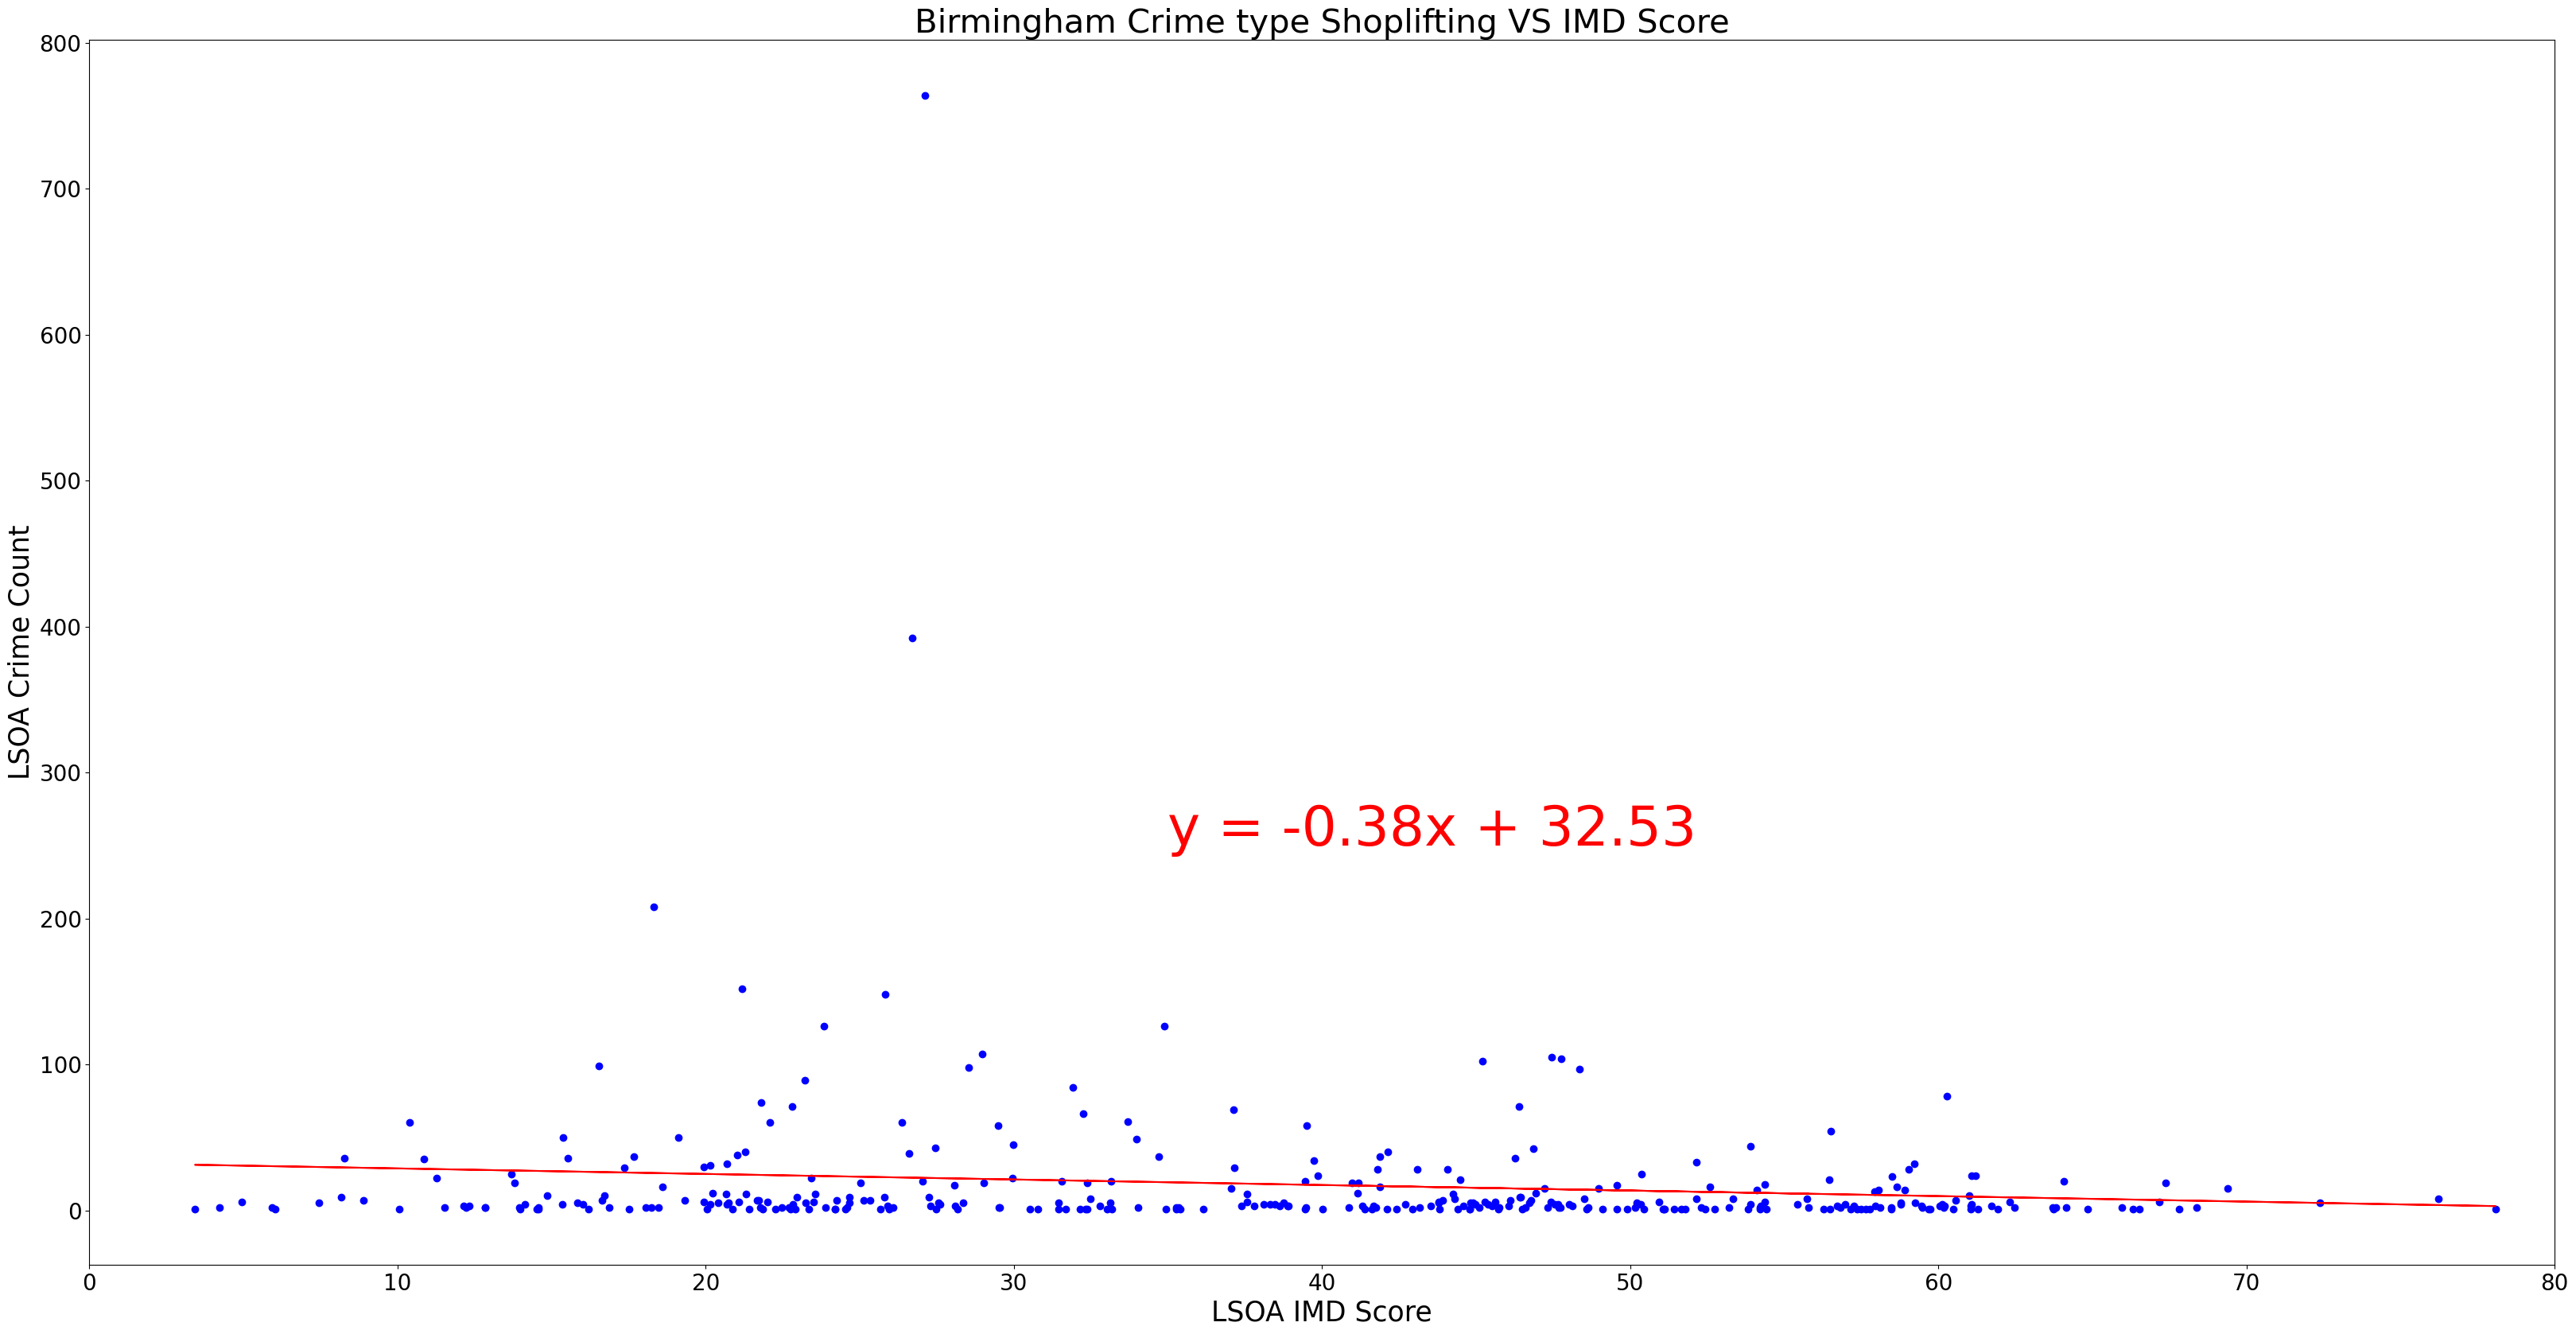

In [34]:

crime_type = ['Anti-social behaviour','Vehicle crime','Burglary','Criminal damage and arson','Violence and sexual offences',\
               'Possession of weapons','Public order','Robbery','Other theft','Other crime','Bicycle theft','Drugs',\
                'Theft from the person','Shoplifting']

for crime in crime_type:
     
     crime_df = Police_IMD_Summer.loc[Police_IMD_Summer["Crime type"]==crime]
     f = {"LSOA name_x": "first","LSOA code": "count", "Index of Multiple Deprivation (IMD) Score":'first'}
     LSOA_crime_type_df = crime_df.groupby(["LSOA code"]).agg(f)
     
     x_axis = LSOA_crime_type_df["Index of Multiple Deprivation (IMD) Score"]
     y_axis = LSOA_crime_type_df["LSOA code"]
     plt.title(f"Birmingham Crime type {crime} VS IMD Score", fontsize=30)
     plt.scatter(x_axis, y_axis, marker="o", color="blue")
     #plt.plot(x_axis, y_fit)
     plt.rcParams["figure.figsize"] = (40,20)
     plt.xlim(0,80)
     # plt.ylim(0, 400)
     plt.xticks(fontsize=20)
     plt.yticks(fontsize=20)
     plt.xlabel("LSOA IMD Score", fontsize=25)
     plt.ylabel("LSOA Crime Count", fontsize=25)
     if crime == 'Violence and sexual offences':
               plot_linear_regression(x_axis, y_axis, 'LSOA Crime Count',(35,1250))
     elif crime == 'Other crime':
               plot_linear_regression(x_axis, y_axis, 'LSOA Crime Count',(35,80))
     else:
               plot_linear_regression(x_axis, y_axis, 'LSOA Crime Count',(35,250))              
     plt.savefig(f"output/correlation_SUMMER_{crime}_vs_IMD.png")
     plt.show()




Index(['Anti-social behaviour', 'Bicycle theft', 'Burglary',
       'Criminal damage and arson', 'Drugs', 'Other crime', 'Other theft',
       'Possession of weapons', 'Public order', 'Robbery', 'Shoplifting',
       'Theft from the person', 'Vehicle crime',
       'Violence and sexual offences'],
      dtype='object', name='Crime type')


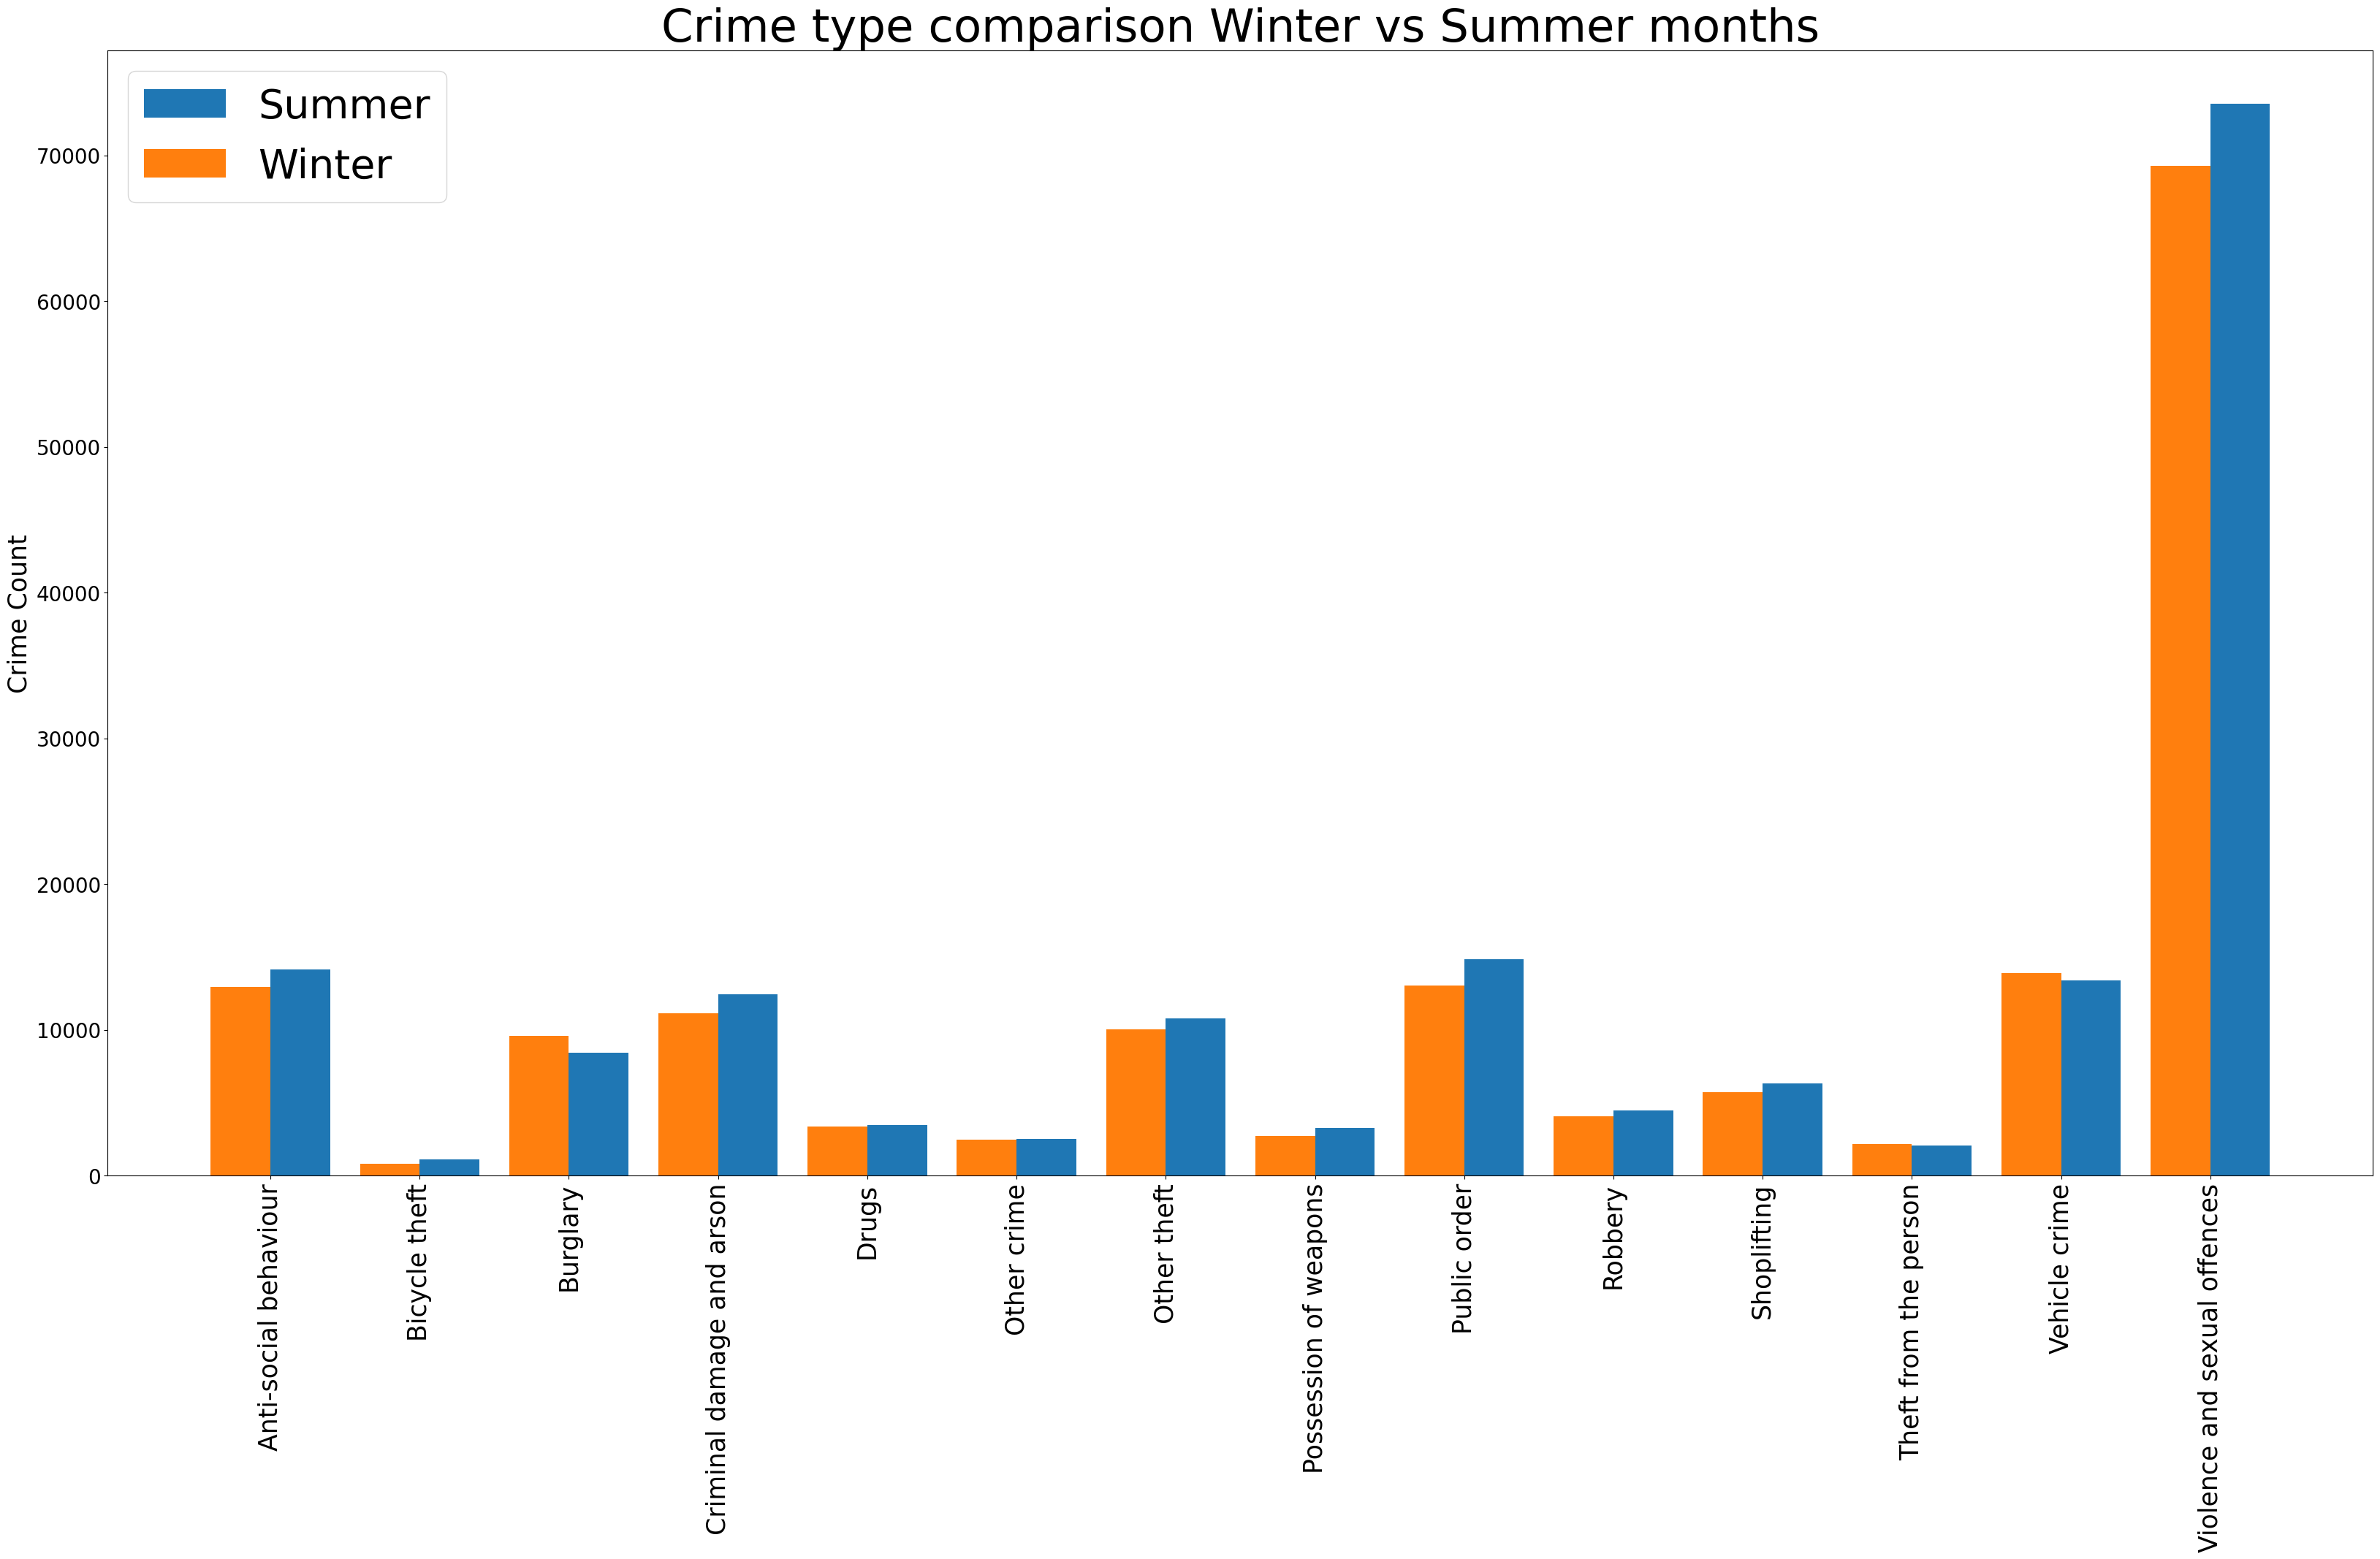

In [35]:
df1 = Police_IMD_Summer.groupby("Crime type")["LSOA code"].agg("count")

df2 = Police_IMD_Winter.groupby("Crime type")["LSOA code"].agg("count")

print(df1.index)


figure1 = plt.bar(df1.index, df1, align='edge', width=0.4, label='Summer')
figure2 = plt.bar(df2.index, df2, align='edge', width=-0.4, label='Winter')
plt.legend(fontsize="40")
plt.xticks(np.arange(len(df1)), rotation=90,fontsize="25")
plt.ylabel("Crime Count",fontsize="25")
plt.yticks(fontsize="20")
plt.title("Crime type comparison Winter vs Summer months",fontsize="45")
plt.savefig(f"output/crime_type_comparison_Winter_Summer.png")

plt.show()



### Research Question 4: 
- Where are the police stations located in Birmingham (geoapify, places, API). 
- How far is the nearest police station from the highest crime count location?

In [45]:
#GEOAPIFYYYYY

# List all Police Stations in Birmiingham via Geoapify places


# Set the geographical coordinates for Sydney, Australia
# latitude = -33.8698439
# longitude = 151.2082848

# Set the parameters for the type of place
# categories = "service.police"
# city = "Birmingham, West Midlands Combined Authority, England, United Kingdom"
# conditions = "vegetarian"
# radius = 8000

# Set the parameters for the type of search
# filters = f"circle:{longitude},{latitude},{radius}"
# bias = f"proximity:{longitude},{latitude}"
# limit = 20
# params = {
#     # "text": target_city,
#     "text":city,
#     "apiKey":geoapify_key,
#     "categories":categories
# }

# # "apiKey":geoapify_key


# url = "https://api.geoapify.com/v2/places"

# response = requests.get(url, params=params).json()
# response

url = "https://api.geoapify.com/v2/places?categories=service.police&filter=place:5120a11227befefdbf599d89f4d38a3e4a40f00101f9014a7a020000000000c0020692030a4269726d696e6768616d&limit=50&apiKey=" + geoapify_key
response = requests.get(url).json()
pprint(response)




{'features': [{'geometry': {'coordinates': [-1.9321427999999996,
                                            52.451144099089746],
                            'type': 'Point'},
               'properties': {'address_line1': 'West Midlands police room',
                              'address_line2': 'Ring Road North, Birmingham, '
                                               'B15 2TT, United Kingdom',
                              'categories': ['service', 'service.police'],
                              'city': 'Birmingham',
                              'country': 'United Kingdom',
                              'country_code': 'gb',
                              'county': 'West Midlands Combined Authority',
                              'datasource': {'attribution': '© OpenStreetMap '
                                                            'contributors',
                                             'license': 'Open Database Licence',
                                             

In [80]:
# name = response["type"]
# # response.keys()
# pprint(name)

No_of_stations = len(response["features"])

print(f'No of police stations found in Birmingham = {No_of_stations}')

Bham_stations_list = []
lat_list = []
lon_list = []

for x in range(No_of_stations):

    lat = response["features"][x]["properties"]["lat"]
    lon = response["features"][x]["properties"]["lon"]

    lat_list.append(lat)
    lon_list.append(lon)


    try:
        # station_name = response["features"][x]["properties"]["datasource"]["raw"]["name"]
        station_name = response["features"][x]["properties"]["name"]



    except KeyError:

        station_name = response["features"][x]["properties"]["street"] + " Police Station"
        # street: "Ladywood Middleway"
        print("Did not find station name - use street name instead")
        # station_name = "Station name not found"


    Bham_stations_list.append(station_name)
    print(station_name)

print(Bham_stations_list)



print(lat_list)
print(lon_list)

No of police stations found in Birmingham = 30
West Midlands police room
Britsh Transport Police
Stechford Police Station
Birmingham Central Police Station
Bournville Lane Police Station
Ridgepoint House
Balsall Heath Police Station
Acocks Green Police Station
Sheldon Police Station
Moseley Police Station
Sparkhill Police Station
Digbeth Police Station
Edgbaston Police Station
Nechells Police Station
Newtown Police Station
Kings Norton Police Station
Kingstanding Police Station
Summerfield Police Station
Harborne Police Station
Shard End Police Station
Erdington Police Station
Sutton Coldfield Police Station
Castle Vale Police Station
Kings Heath Police Station
Handsworth Police Station
Summerfield Police Station
West Midlands Police Custody Suite
Handsworth West Police Station
Did not find station name - use street name instead
Ladywood Middleway Police Station
Did not find station name - use street name instead
Stratford Road Police Station
['West Midlands police room', 'Britsh Trans

In [84]:
Police_stations_df = pd.DataFrame(list(zip(Bham_stations_list,lat_list,lon_list)),columns=["Station Name","Lat","Lon"])

Police_stations_df

Station Name        Lat       Lon
0            West Midlands police room  52.451144 -1.932143
1              Britsh Transport Police  52.477315 -1.899512
2             Stechford Police Station  52.478384 -1.807279
3    Birmingham Central Police Station  52.484067 -1.897890
4       Bournville Lane Police Station  52.429308 -1.950100
5                     Ridgepoint House  52.499369 -1.827409
6         Balsall Heath Police Station  52.456982 -1.888283
7          Acocks Green Police Station  52.450518 -1.819255
8               Sheldon Police Station  52.470622 -1.784562
9               Moseley Police Station  52.448461 -1.886847
10            Sparkhill Police Station  52.450603 -1.864688
11              Digbeth Police Station  52.476397 -1.890331
12            Edgbaston Police Station  52.466324 -1.898922
13             Nechells Police Station  52.494621 -1.870305
14              Newtown Police Station  52.493750 -1.899265
15         Kings Norton Police Station  52.407261 -1.926580
16         Kingstanding Police Station  52.554241 -1.884463
17          Summerfield Police Station  52.486228 -1.937686
18             Harborne Police Station  52.462066 -1.948725
19            Shard End Police Station  52.494045 -1.771622
20            Erdington Police Station  52.526125 -1.838830
21     Sutton Coldfield Police Station  52.567948 -1.823600
22          Castle Vale Police Station  52.521541 -1.783714
23          Kings Heath Police Station  52.438085 -1.893164
24           Handsworth Police Station  52.503565 -1.928233
25          Summerfield Police Station  52.486175 -1.936641
26  West Midlands Police Custody Suite  52.521131 -1.892003
27      Handsworth West Police Station  52.505855 -1.947257
28   Ladywood Middleway Police Station  52.476044 -1.924832
29       Stratford Road Police Station  52.462528 -1.875507

In [89]:
map_plot = Police_stations_df.hvplot.points(
    "Lon",
    "Lat",
    geo=True,
    tiles = "OSM",
    frame_width = 800,
    frame_height = 800,
    color = "Station Name",
    size = 150

    # scale = 0.3,
    # hover_cols = ["Crime count","Index of Multiple Deprivation (IMD) Score"]
)

map_plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lon,Lat]   (Station Name)